In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split

### Steps of how you approached this project
- Ran a ton of pairplots against win % (as the KPI) to see what correlates w/ it
- After determining no's, maybe's, and yes' created a new dataframe called df. Going to be using that for analysis from this point forward.
- May need to test against another KPI as well

In [3]:
cfb = pd.read_csv('C:/Users/Jing/Desktop/CFB.csv')

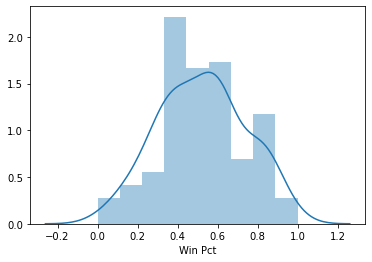

In [5]:
sns.distplot(cfb['Win Pct'])

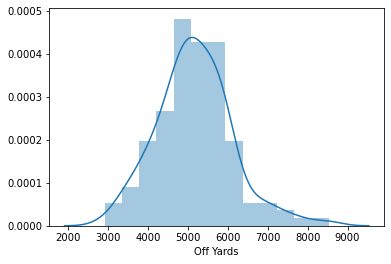

In [6]:
sns.distplot(cfb['Off Yards'])

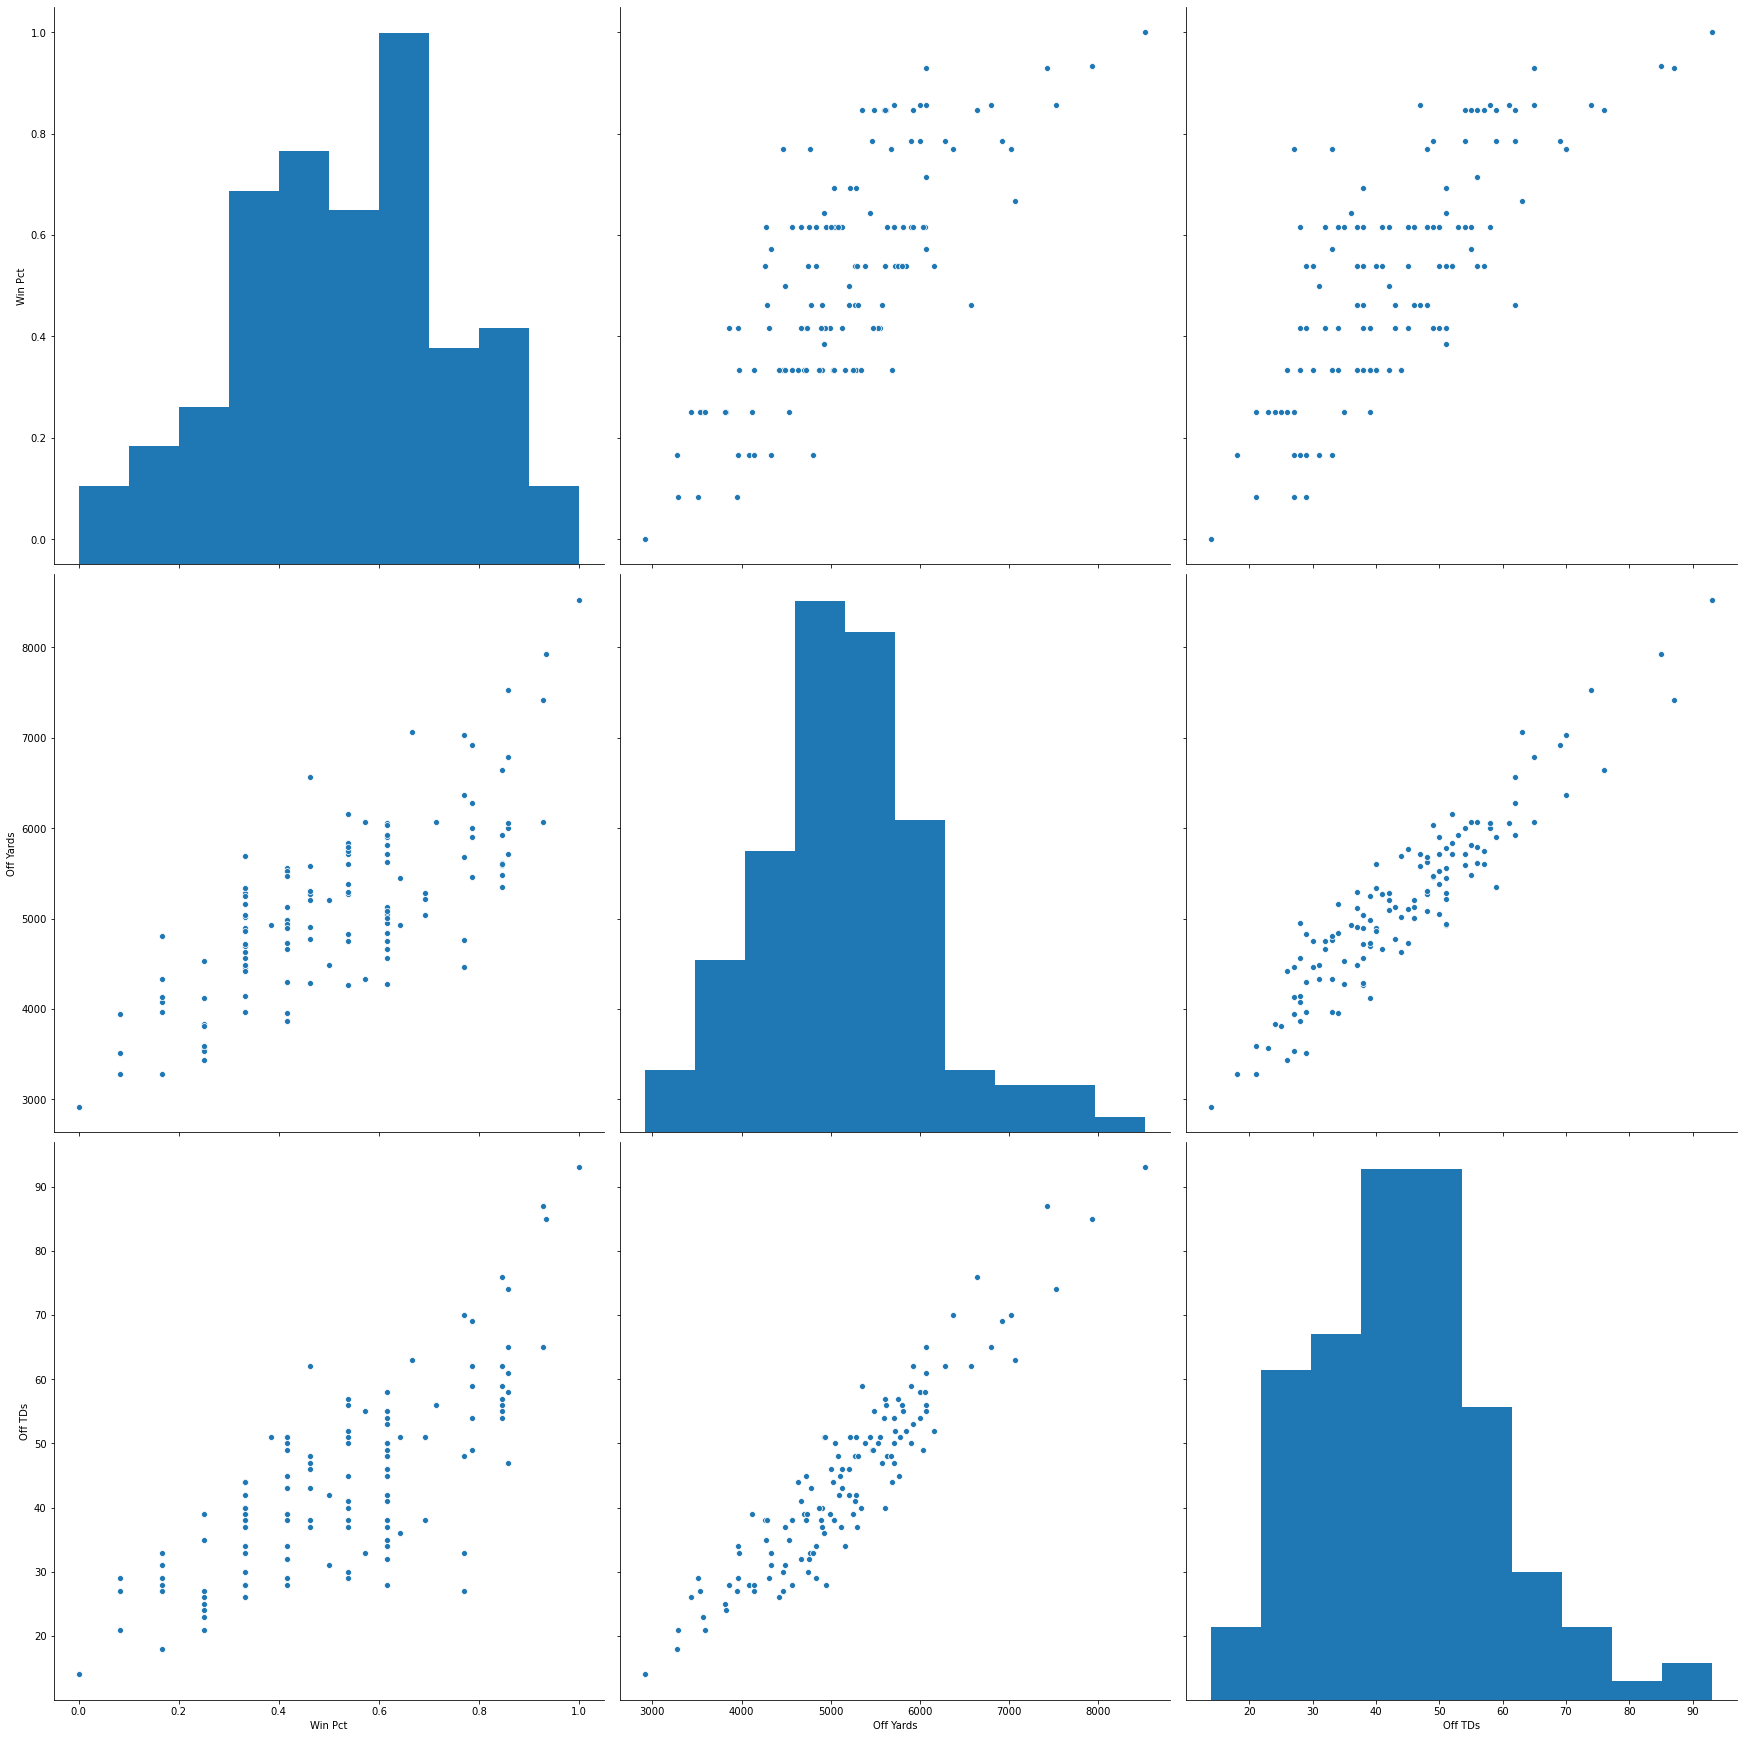

In [4]:
sns.pairplot(cfb[['Win Pct','Off Yards','Off TDs']], height = 8)

In [3]:
pd.set_option('display.max_columns', 999)

In [4]:
cfb.head(1)

Team     Conference  Win  Loss  Games   Win Pct  Off Rank  Off Plays  \
0  Air Force   Mountain West   11     2     13  0.846154        51        881   

   Off Yards  Off Yards/Play  Off TDs  Off Yards per Game  Def Rank  \
0       5483            6.22       55               421.8        17   

   Def Plays  Yards Allowed  Yards/Play Allowed  Off TDs Allowed  \
0        752           4155                5.53               32   

   Total TDs Allowed  Yards Per Game Allowed  First Down Rank  \
0                 34                   319.6               45   

   First Down Runs  First Down Passes  First Down Penalties  First Downs  \
0              227                 52                     7          286   

   First Down Def Rank  Opp First Down Runs  Opp First Down Passes  \
0                    9                   77                    131   

   Opp First Down Penalties  Opp First Downs  4th Down Rank  4th Attempts  \
0                         8              216              5            16   

   4th Conversions  4th Percent  4rd Down Def Rank  Opp 4th Conversion  \
0               21        0.762                 44                  13   

   Opp 4th Attempt  Opponent 4th Percent  Kickoff Return Def Rank  \
0               28                 0.464                       82   

   Opp Kickoff Returns  Kickoff Touchbacks  Opponent Kickoff Return Yards  \
0                   36                  26                            772   

   Opp Kickoff Return Touchdowns Allowed  \
0                                      0   

   Avg Yards per Kickoff Return Allowed  Kickoff Return Rank  \
0                                 21.44                  129   

   Kickoffs Returned  Kickoff Return Yards  Kickoff Return Touchdowns  \
0                  7                    93                          0   

   Avg Yard per Kickoff Return  Passing Off Rank  Pass Attempts  \
0                        13.29               125            126   

   Pass Completions  Interceptions Thrown.x  Pass Yards  Pass Yards/Attempt  \
0                68                       6        1602               12.71   

   Yards/Completion  Pass Touchdowns  Pass Yards Per Game  Pass Def Rank  \
0             23.56               14                123.2             51   

   Opp Completions Allowed  Opp Pass Attempts  Opp Pass Yds Allowed  \
0                      238                377                  2848   

   Opp Pass TDs Allowed  Yards/Attempt Allowed  Yards/Completion Allowed  \
0                    21                   7.55                     11.97   

   Pass Yards Per Game Allowed  Penalty Rank  Penalties  Penalty Yards  \
0                        219.1             2         42            368   

   Penalty Yards Per Game  Punt Return Rank  Punt Returns  \
0                   28.31               129             5   

   Net Punt Return Yards  Punt Return Touchdowns  Avg Yards Per Punt Return  \
0                      6                       0                        1.2   

   Punt Return Def Rank  Opp Punt Returns  Opp Net Punt Return Yards  \
0                    27                 7                         38   

   Opp Punt Return Touchdowns Allowed  Avg Yards Allowed per Punt Return  \
0                                   0                               5.43   

   Redzone Def Rank  Opp Redzone Attempts  Opp Redzone Rush TD Allowed  \
0                 9                    43                           10   

   Opp Redzone Pass Touchdowns Allowed  Opp Redzone Field Goals Made  \
0                                   13                             8   

   Opp Redzone Scores  Redzone Points Allowed  Redzone Off Rank  \
0                  31                   0.721                33   

   Redzone Attempts  Redzone Rush TD  Redzone Pass TD  \
0                54               39                0   

   Redzone Field Goals Made  Redzone Scores  Redzone Points  Rushing Def Rank  \
0                         9              48           0.889                 7   


In [5]:
cfb.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 149 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   Team                                   object 
 1   Conference                             object 
 2   Win                                    int64  
 3   Loss                                   int64  
 4   Games                                  int64  
 5   Win Pct                                float64
 6   Off Rank                               int64  
 7   Off Plays                              int64  
 8   Off Yards                              int64  
 9   Off Yards/Play                         float64
 10  Off TDs                                int64  
 11  Off Yards per Game                     float64
 12  Def Rank                               int64  
 13  Def Plays                              int64  
 14  Yards Allowed                          int64  
 15  Yards

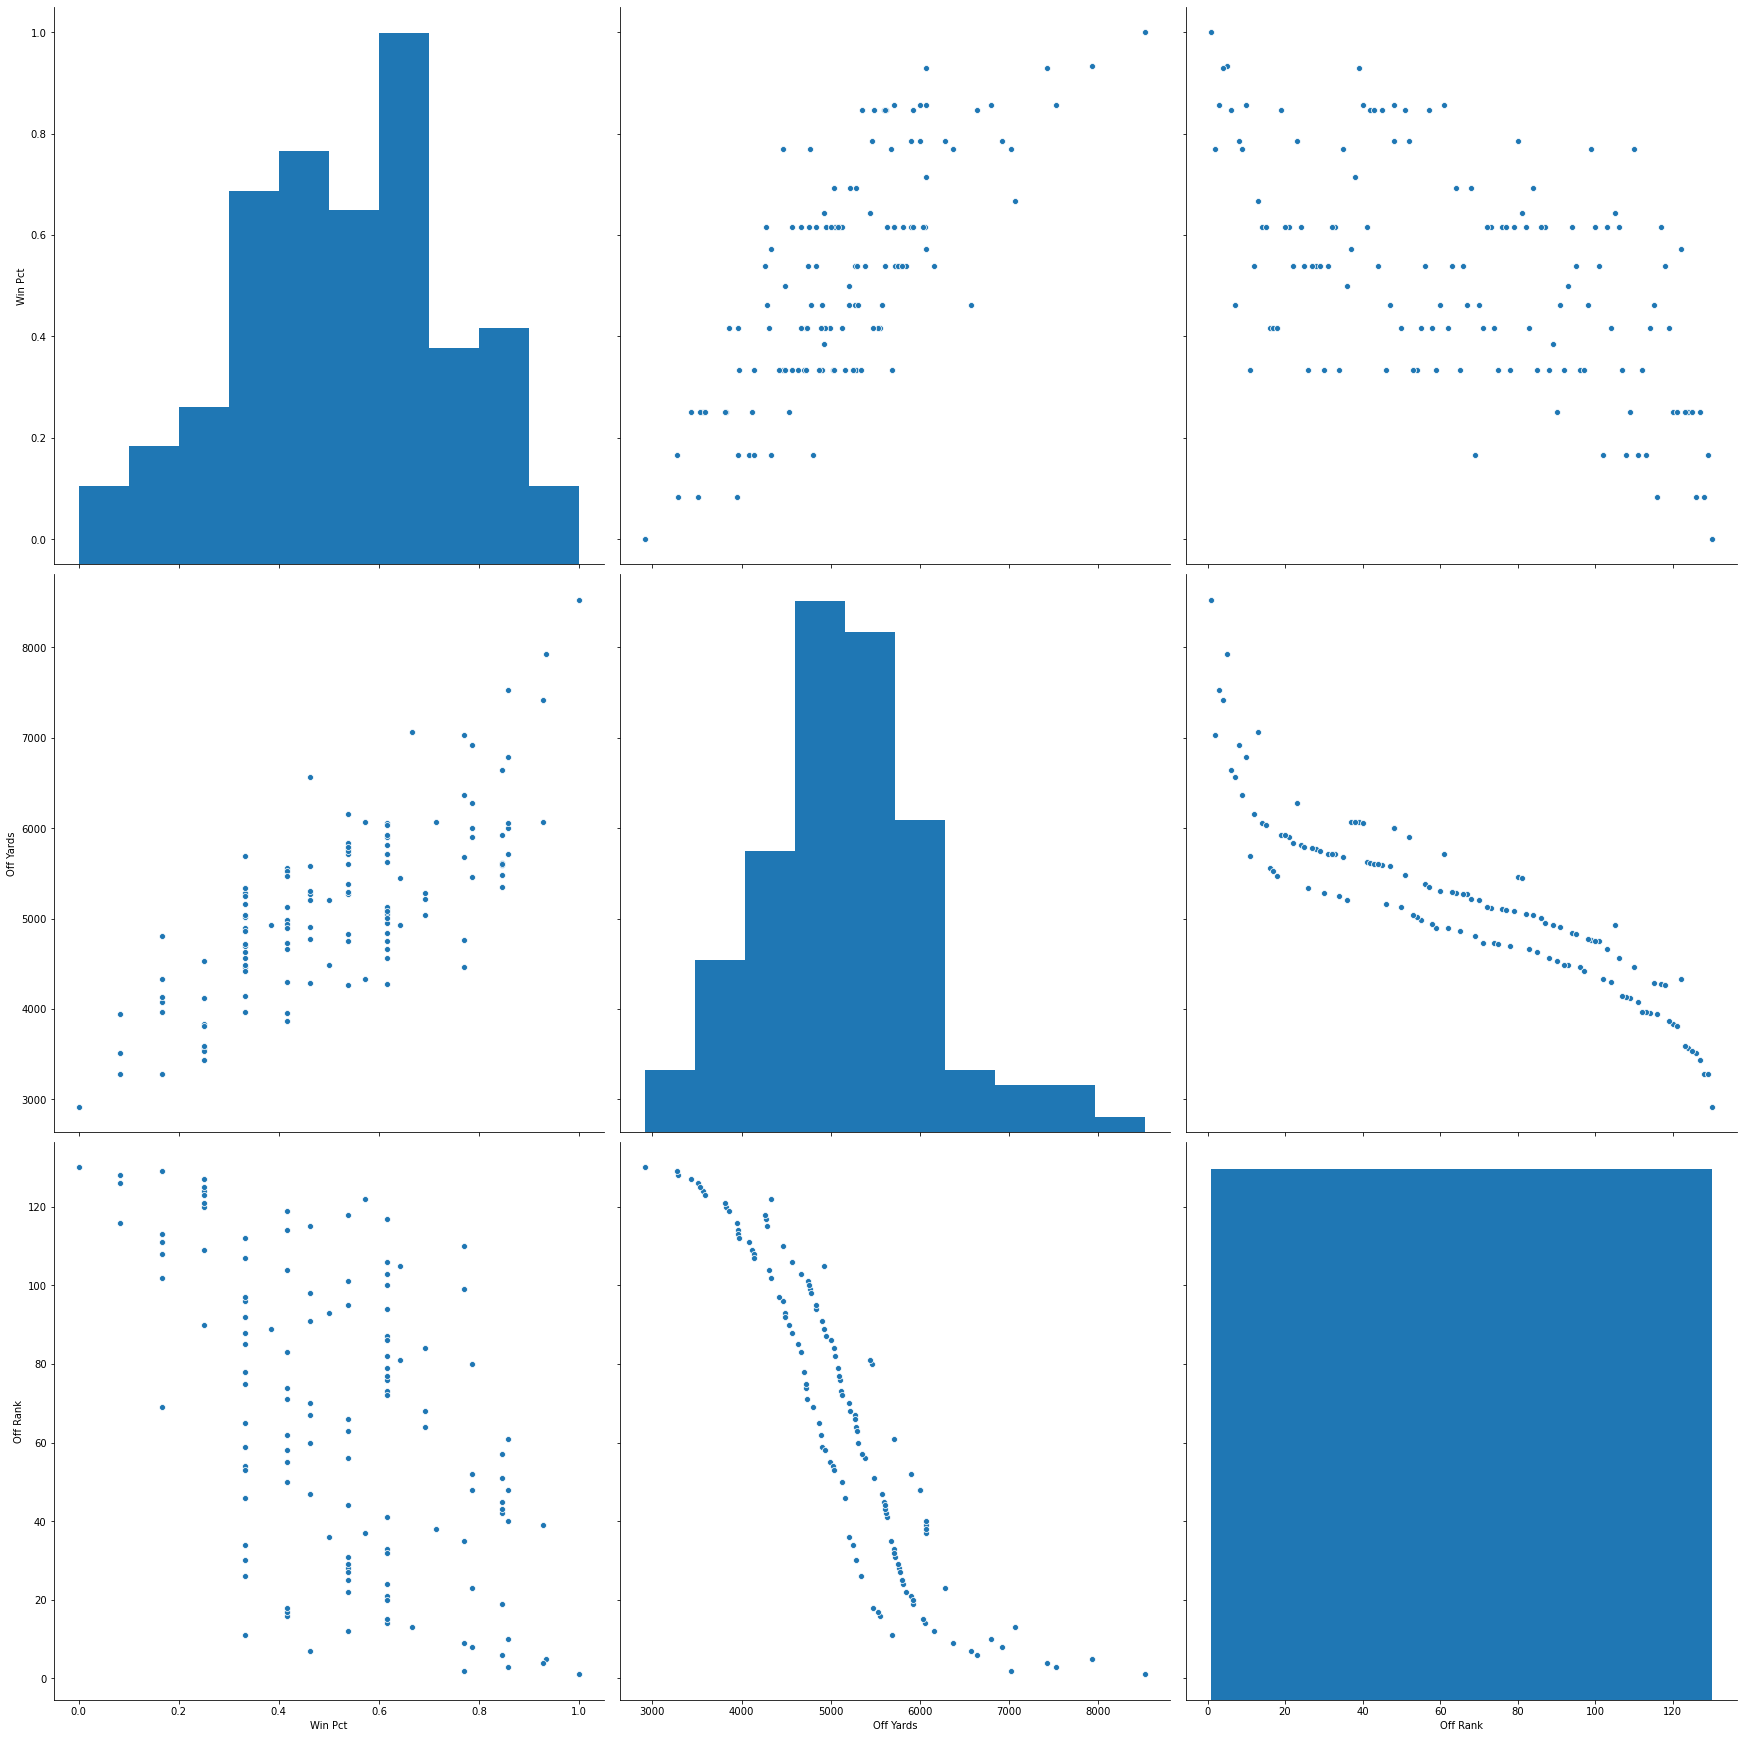

In [6]:
sns.pairplot(cfb[['Win Pct','Off Yards','Off Rank']], height = 8)

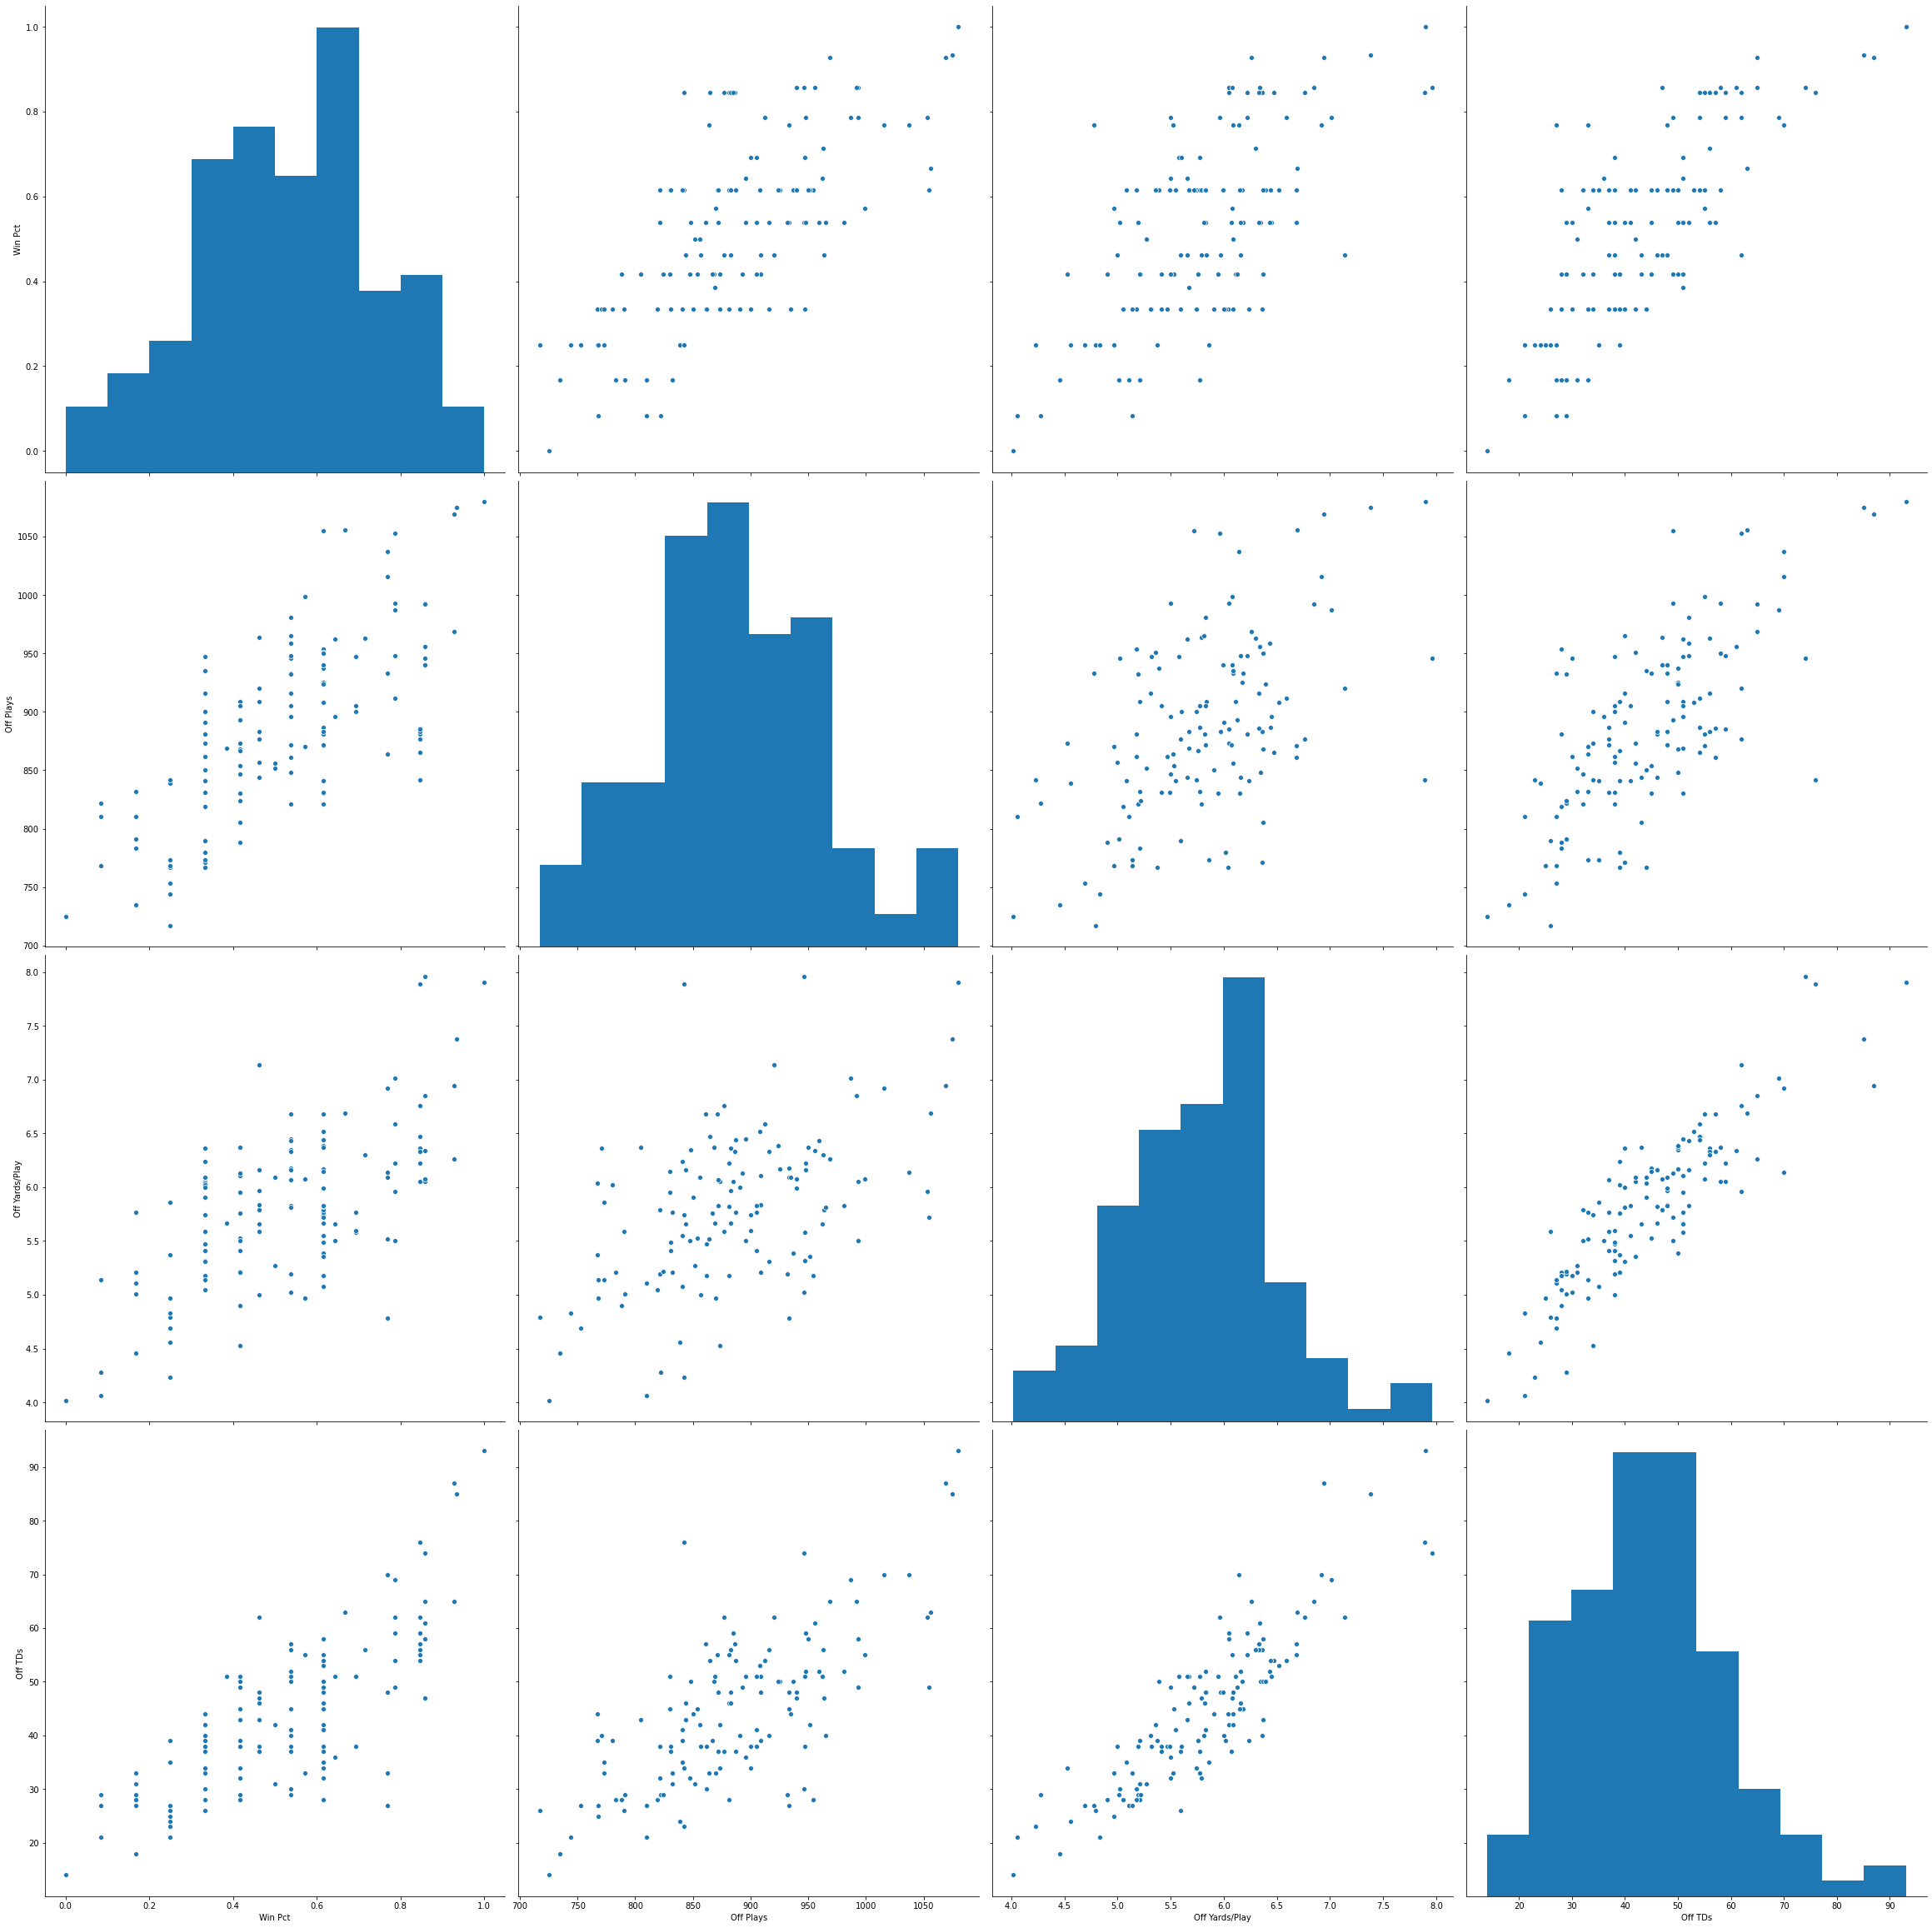

In [7]:
sns.pairplot(cfb[['Win Pct','Off Plays','Off Yards/Play','Off TDs']], height = 8)

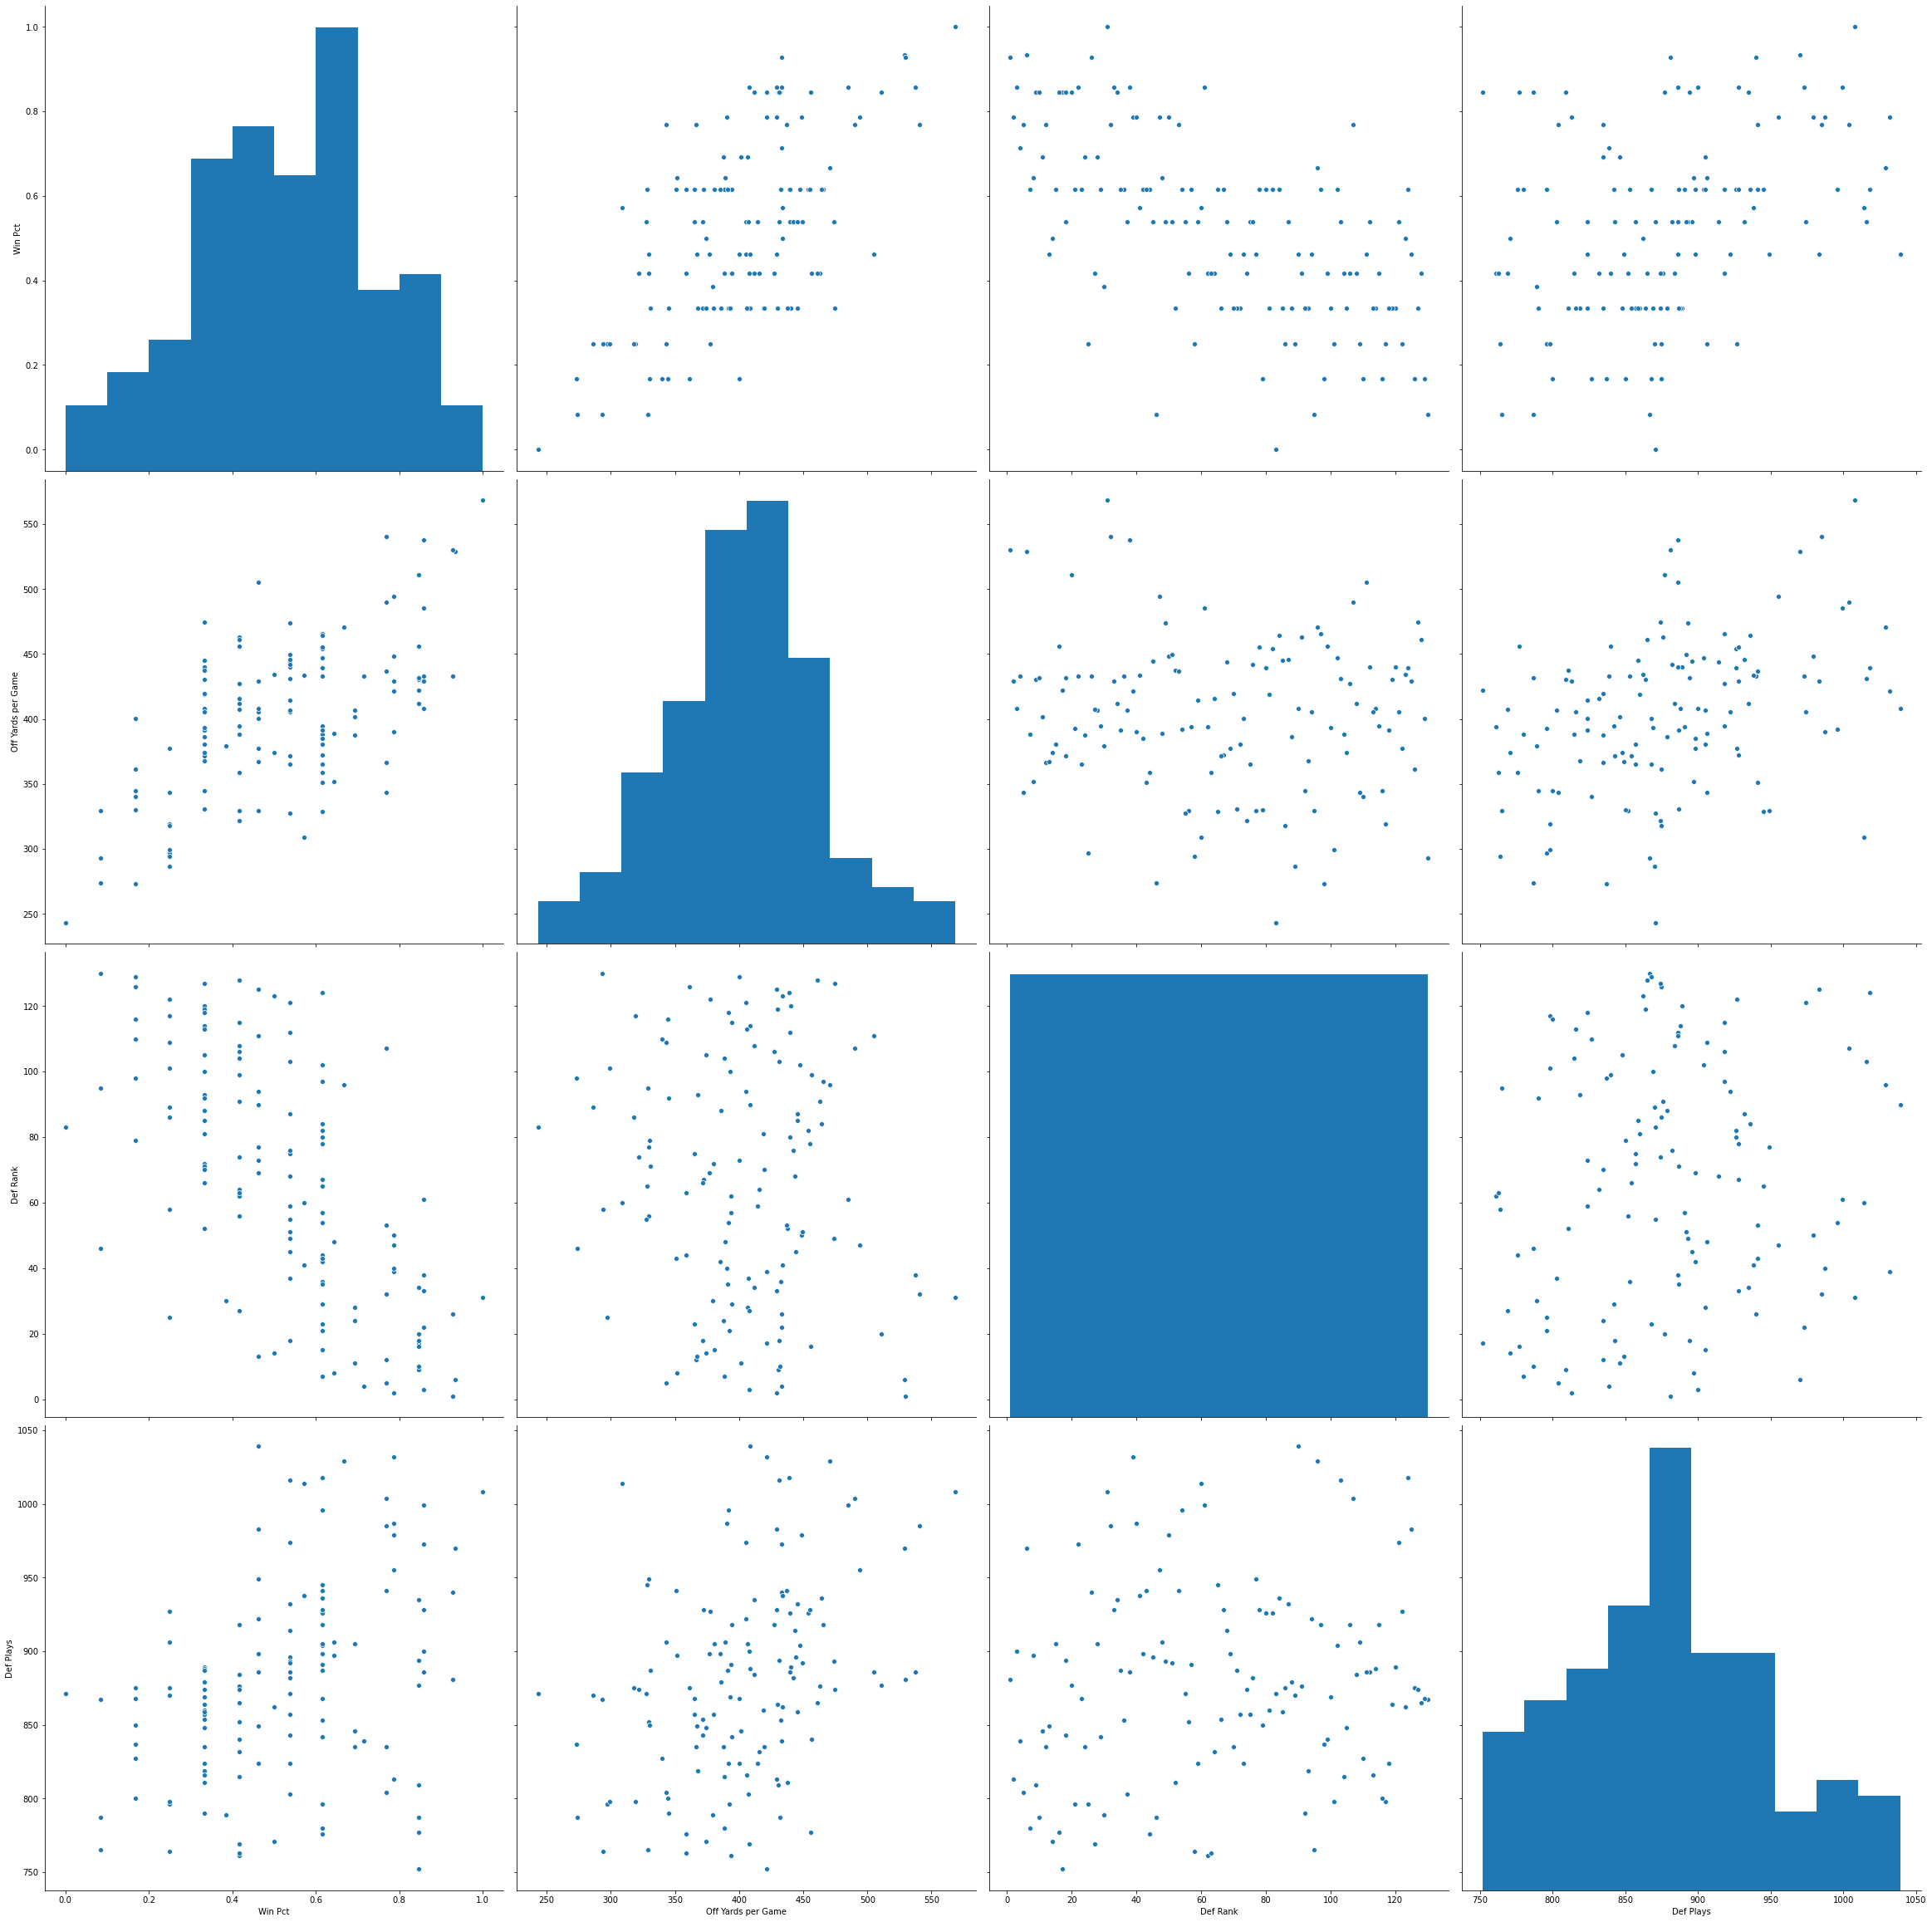

In [8]:
sns.pairplot(cfb[['Win Pct','Off Yards per Game','Def Rank','Def Plays']], height = 8)

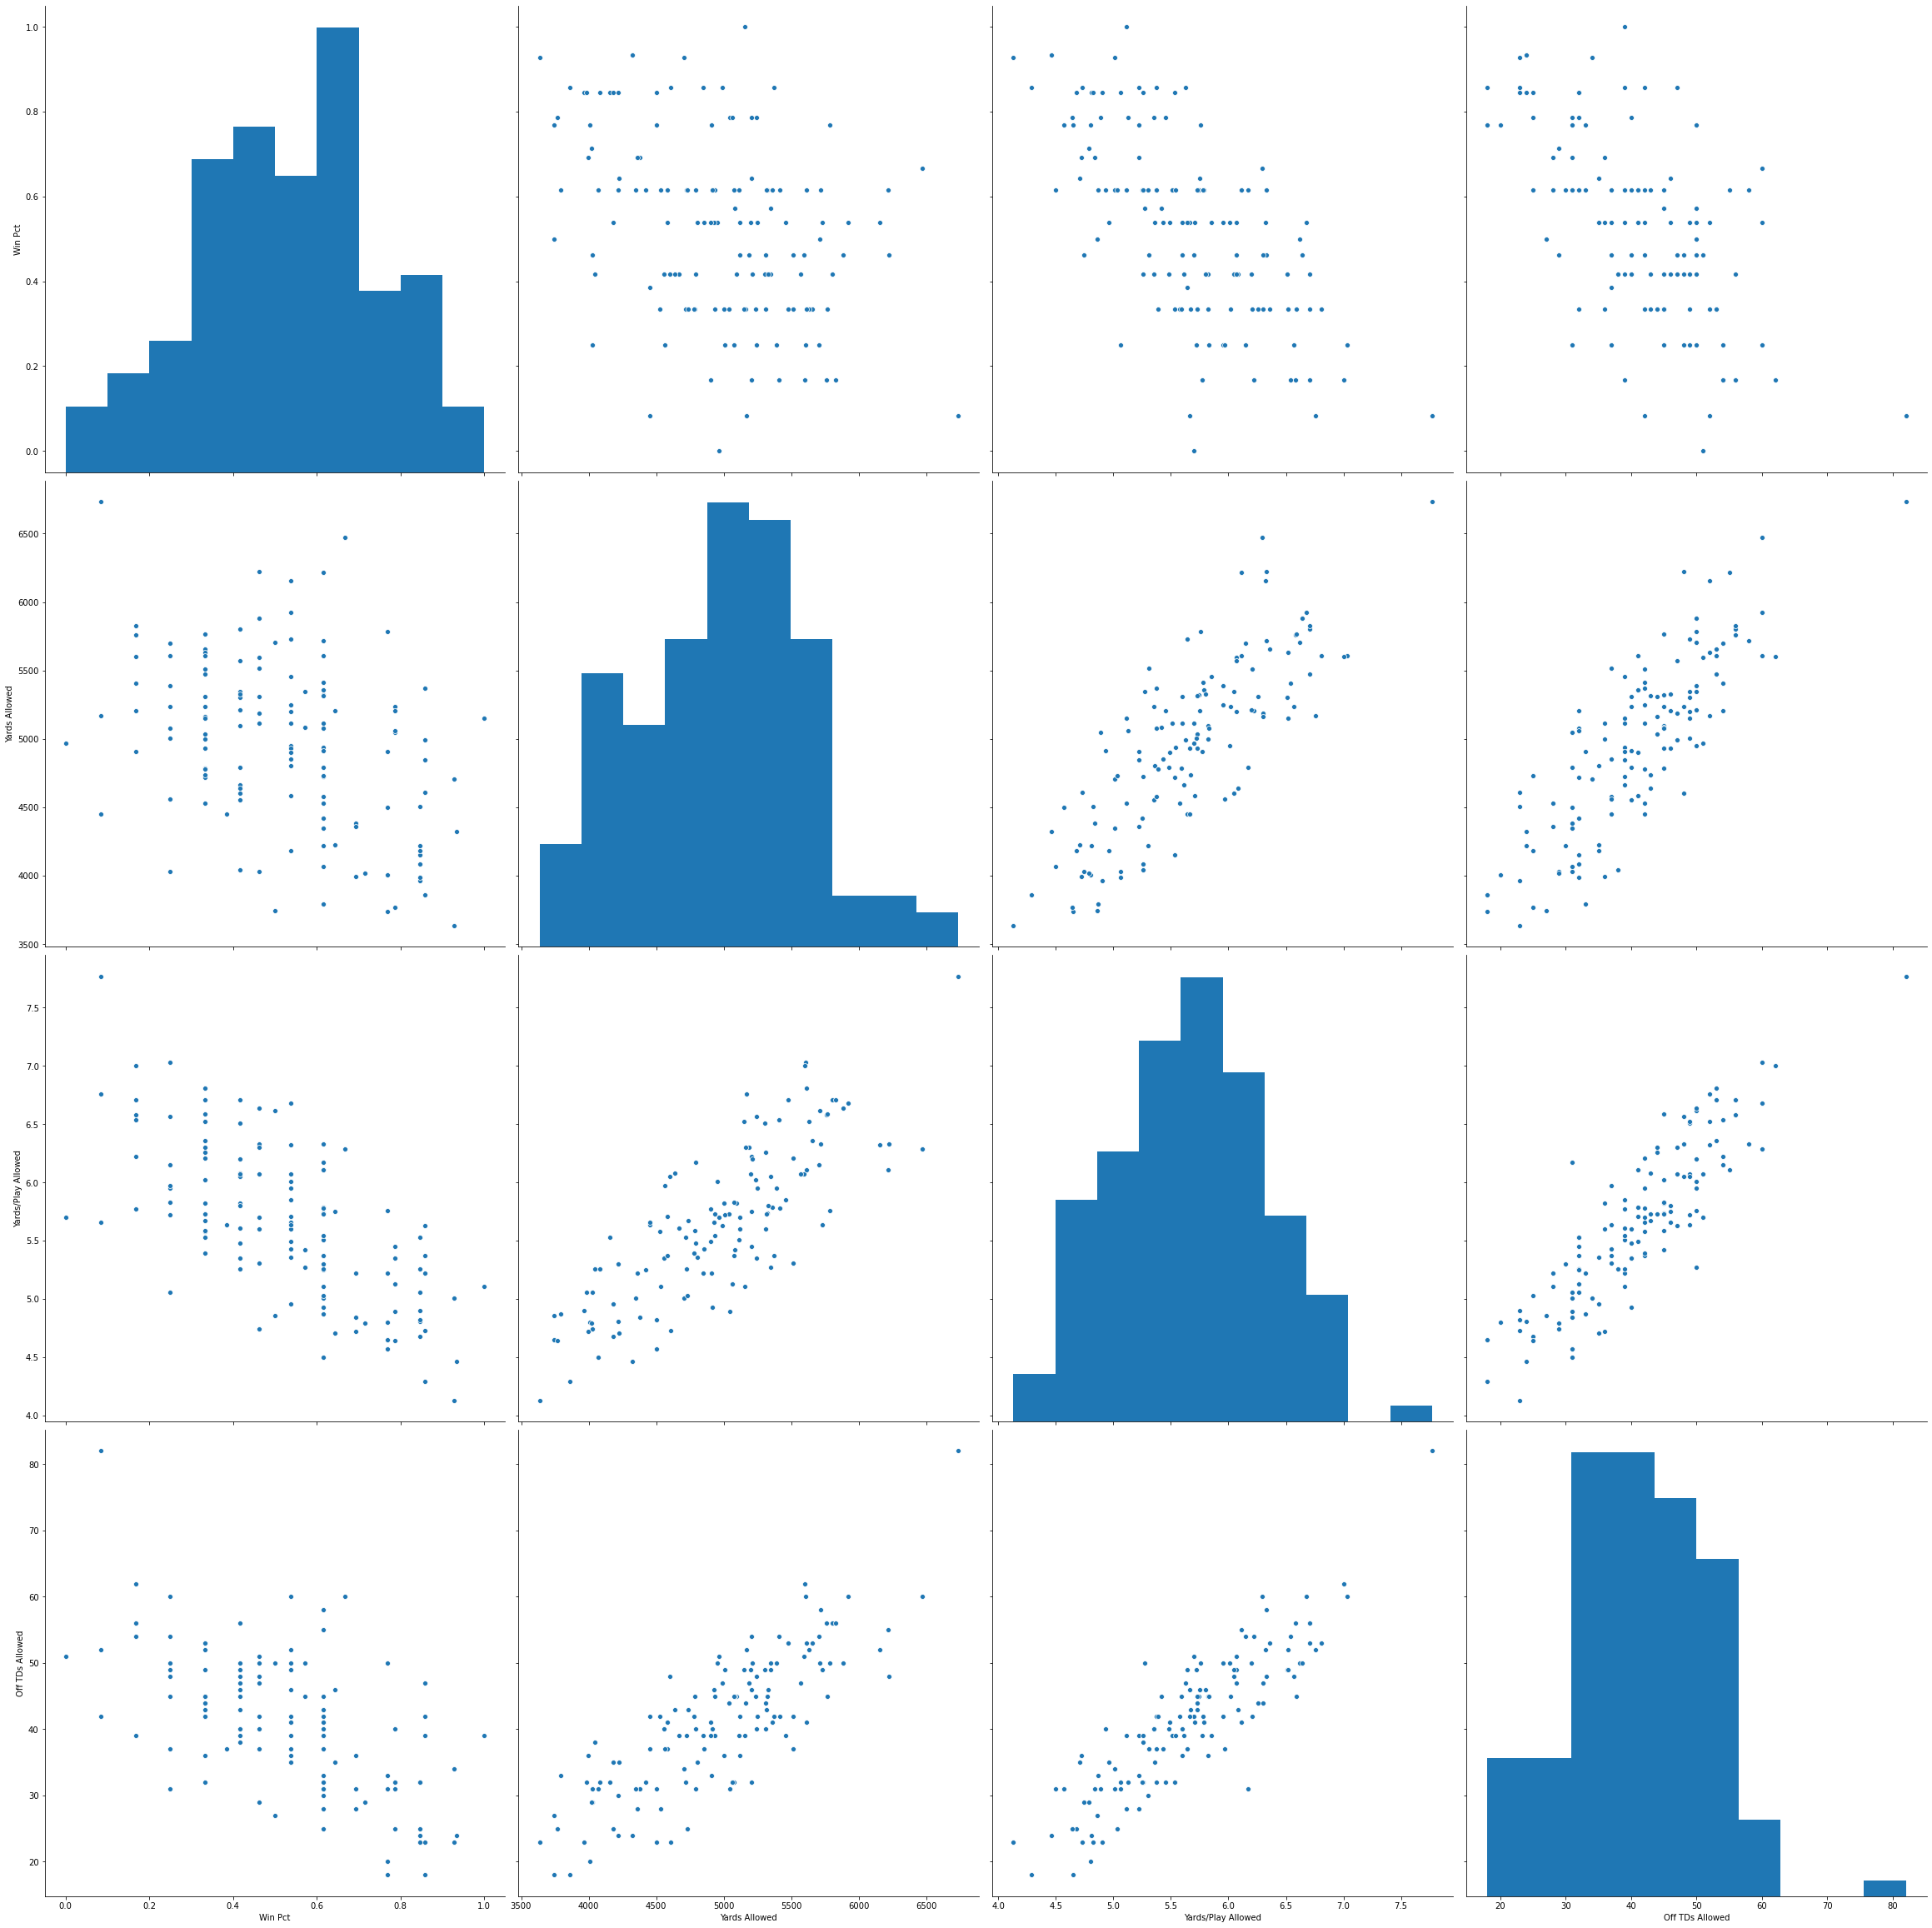

In [9]:
sns.pairplot(cfb[['Win Pct','Yards Allowed','Yards/Play Allowed','Off TDs Allowed']], height = 8)

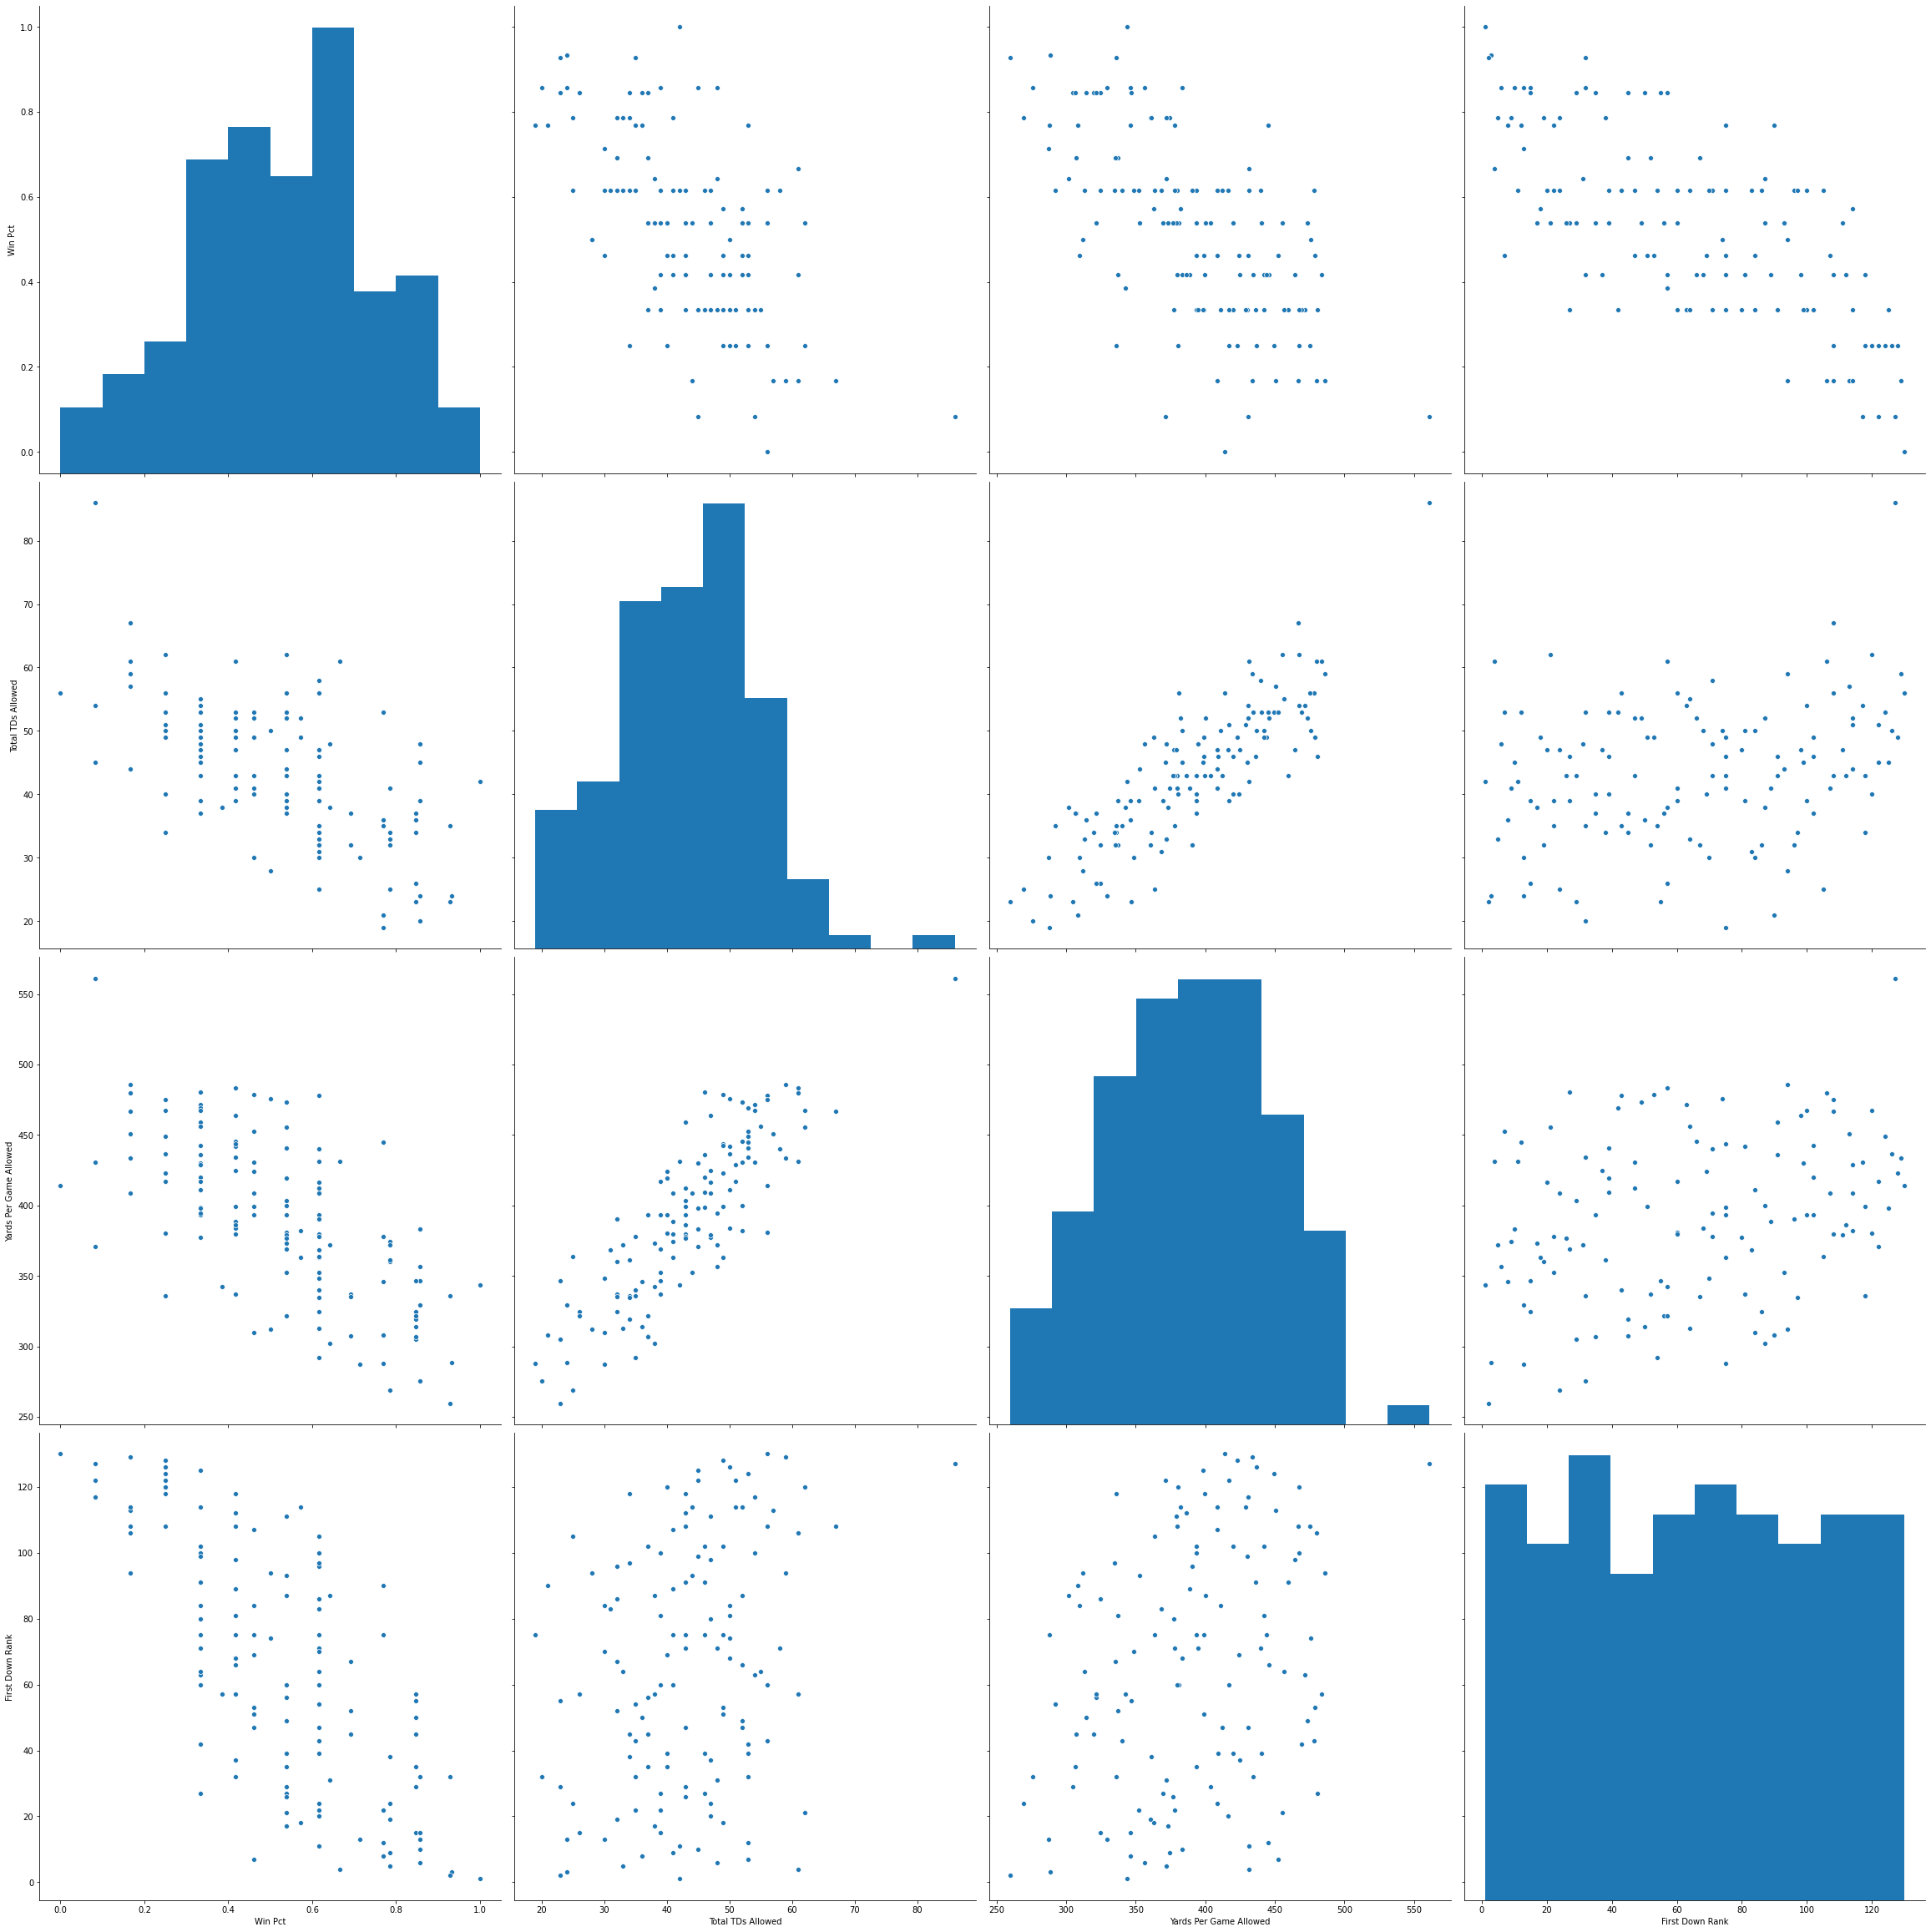

In [10]:
sns.pairplot(cfb[['Win Pct','Total TDs Allowed','Yards Per Game Allowed','First Down Rank']], height = 8)

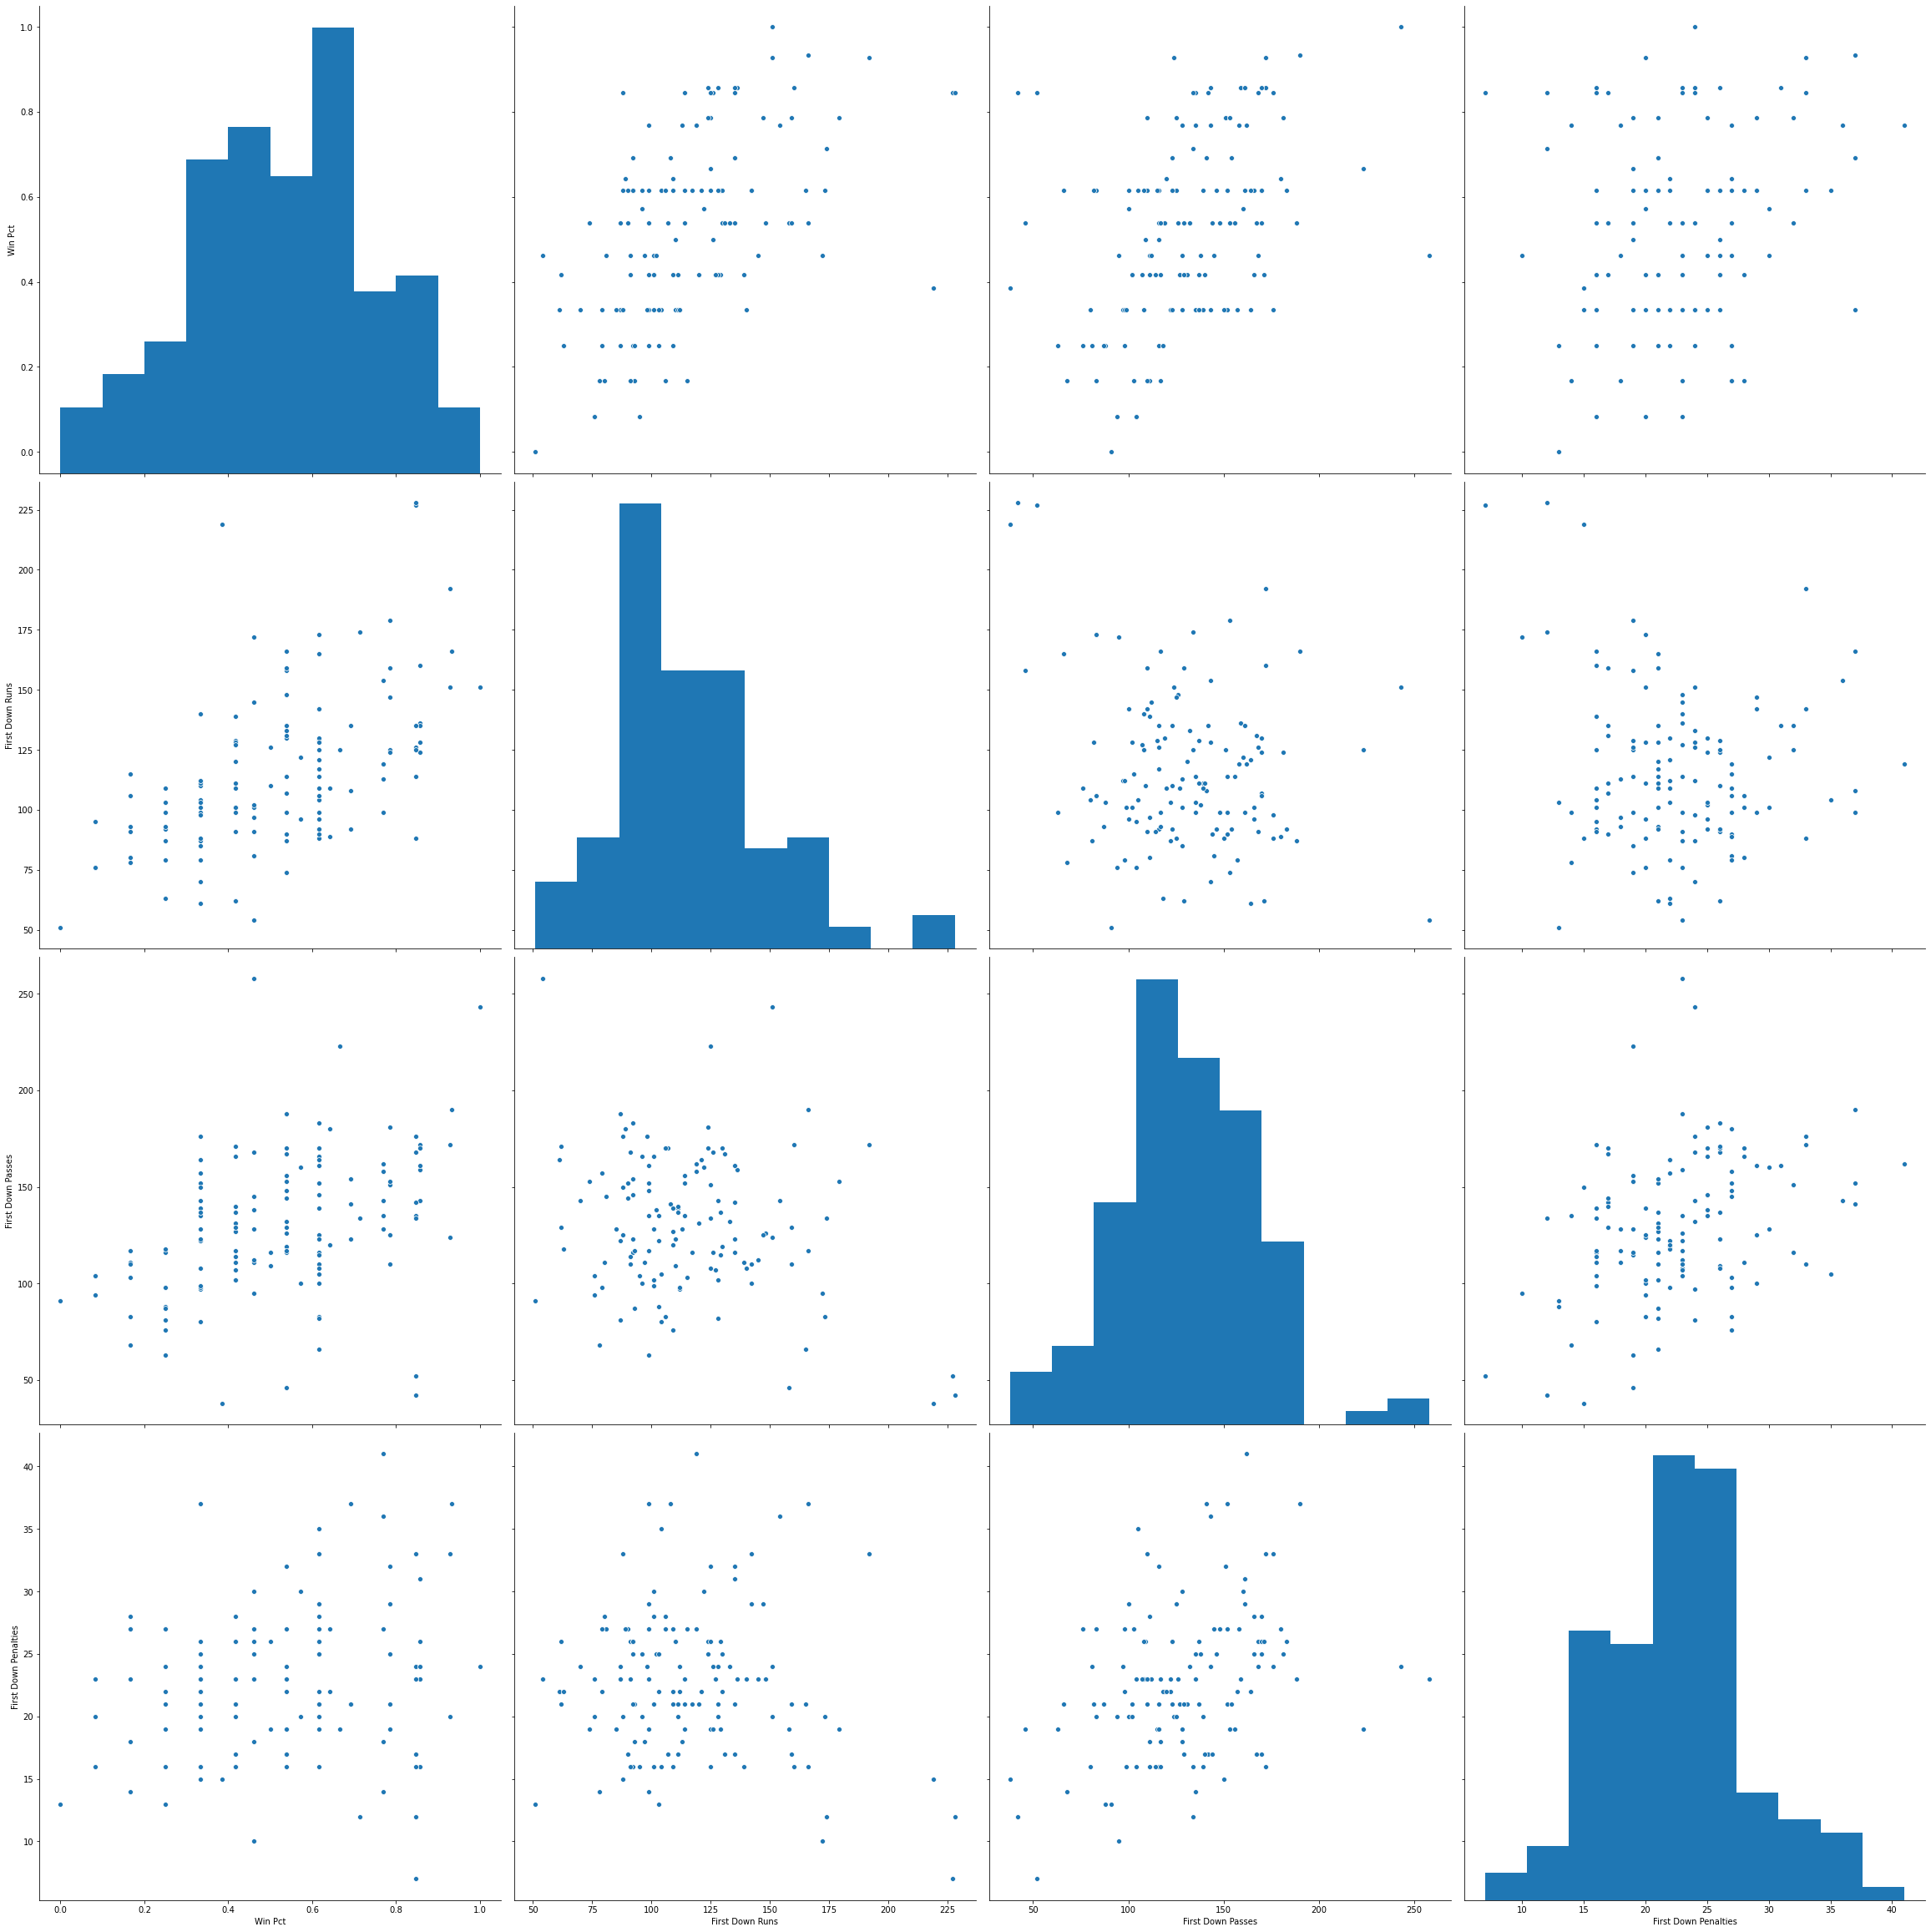

In [11]:
sns.pairplot(cfb[['Win Pct','First Down Runs','First Down Passes','First Down Penalties']], height = 8)

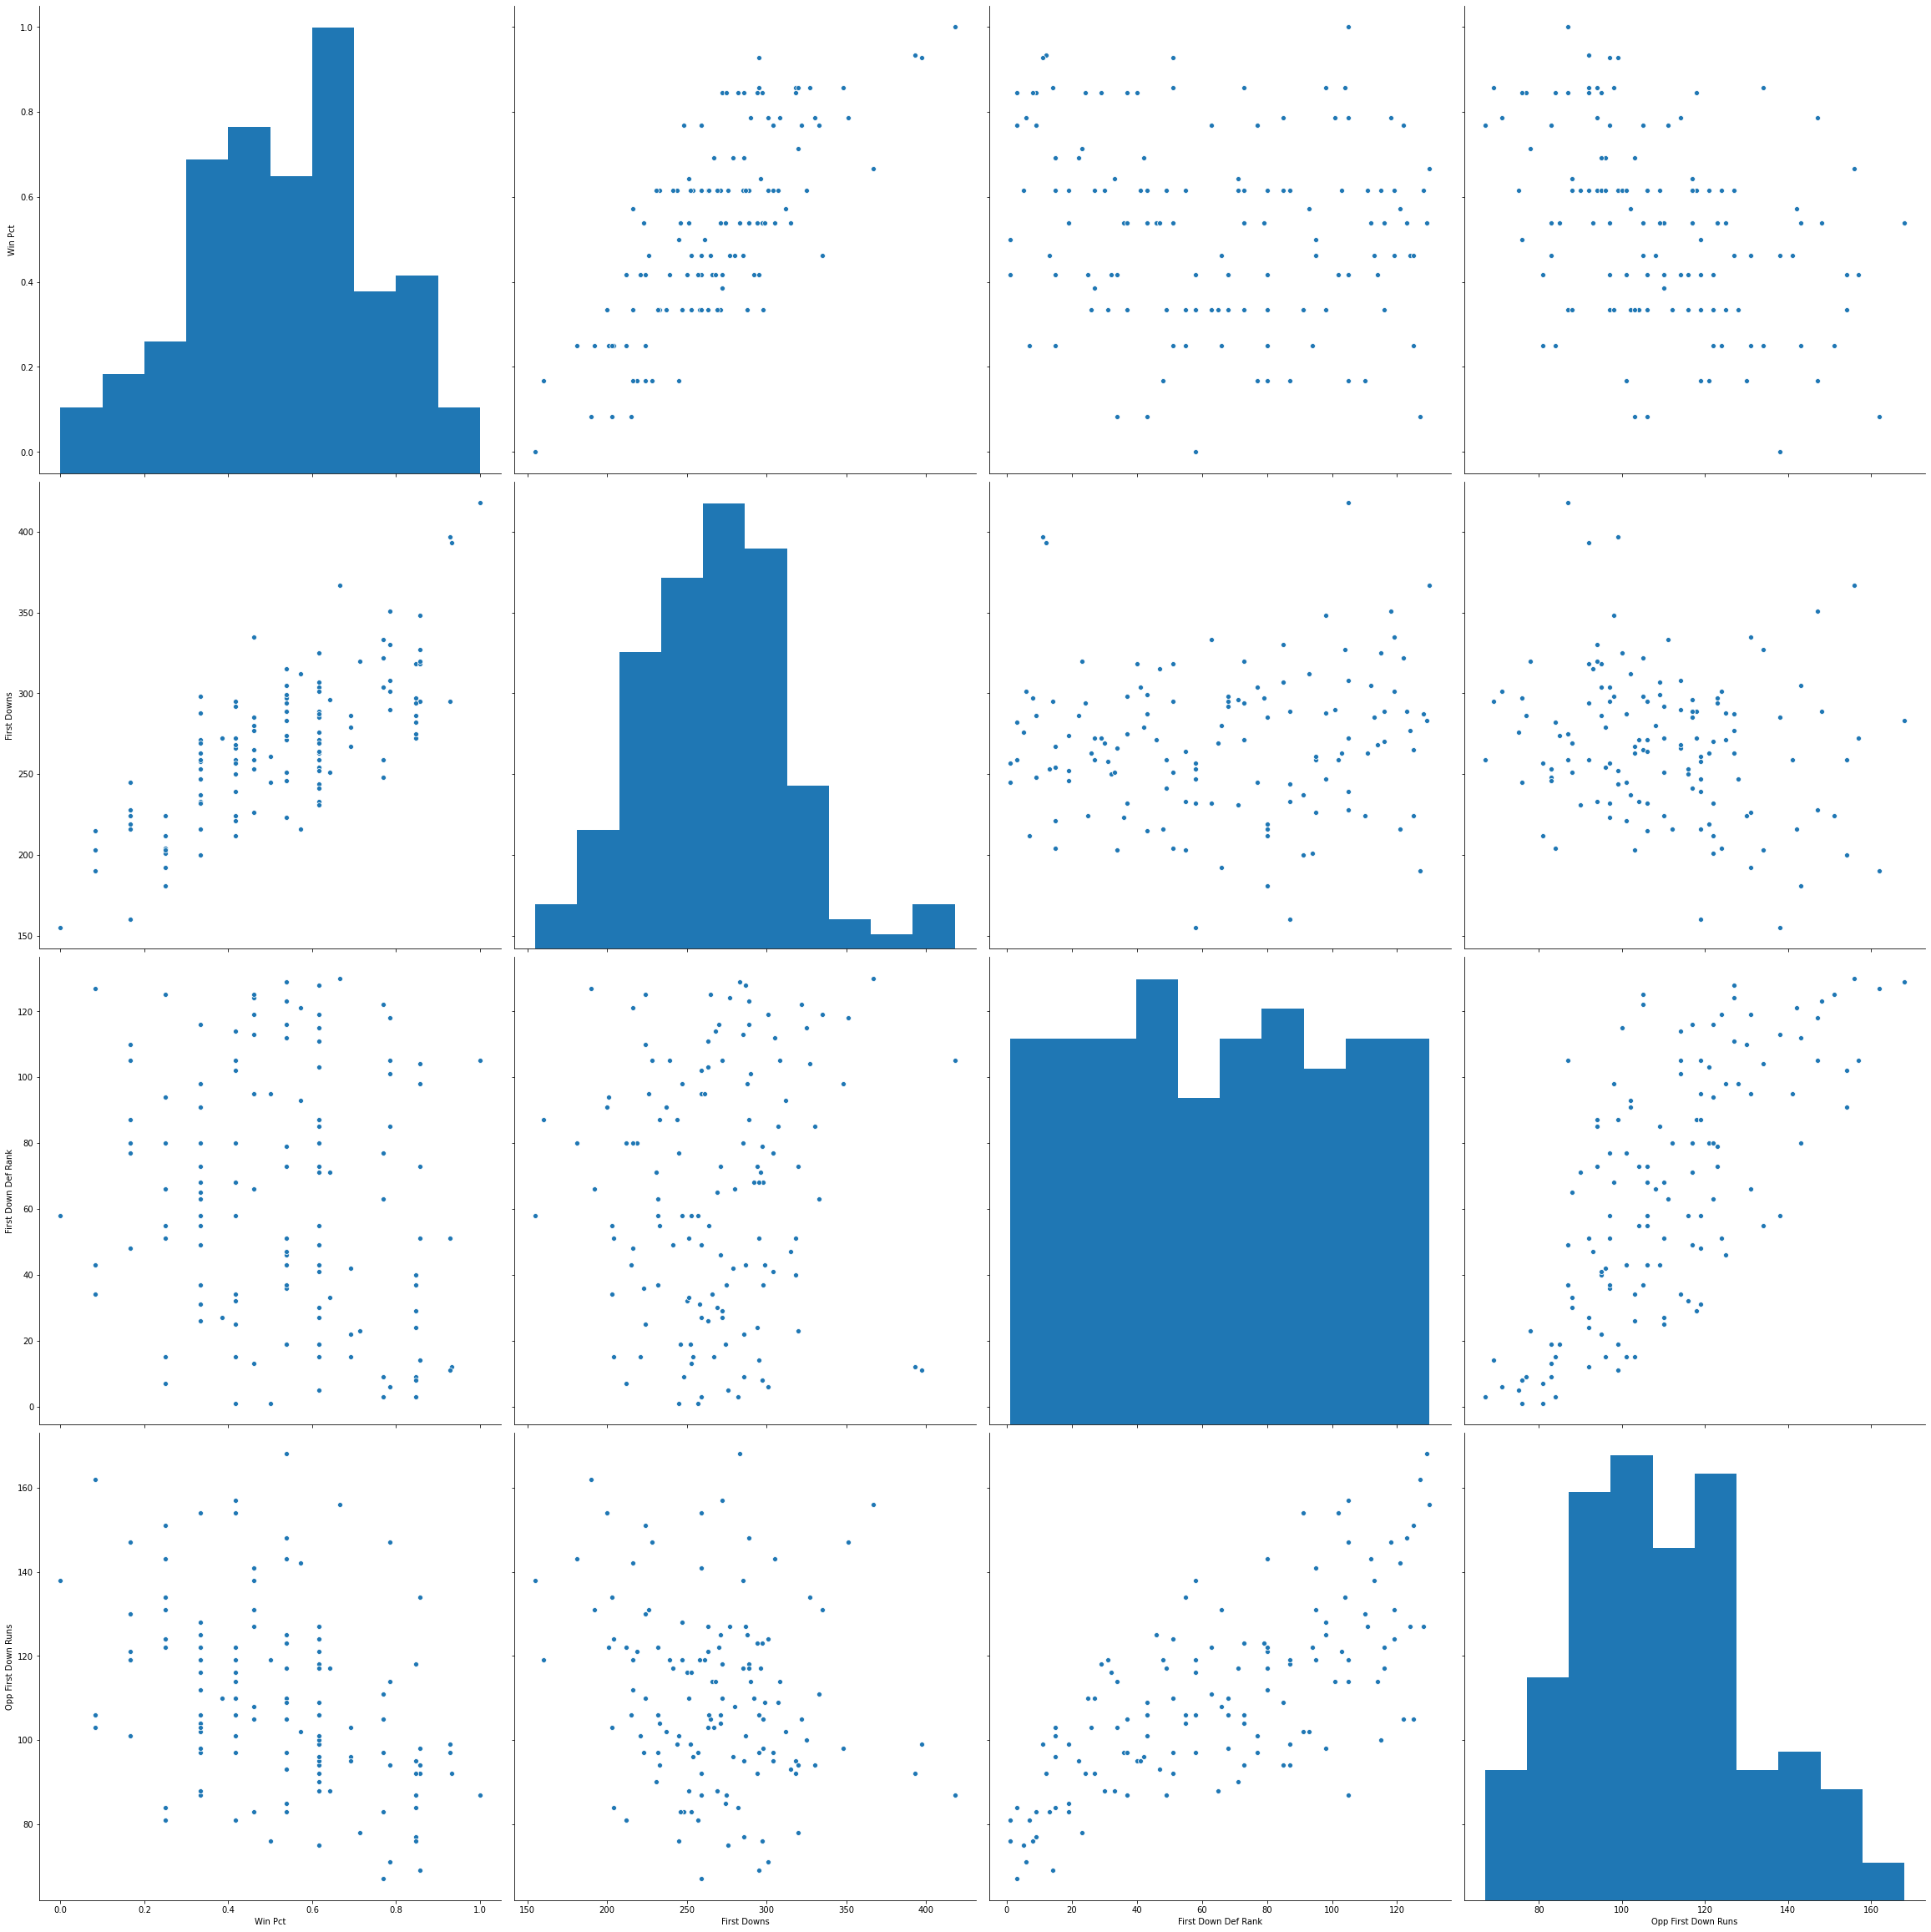

In [12]:
sns.pairplot(cfb[['Win Pct','First Downs','First Down Def Rank','Opp First Down Runs']], height = 8)

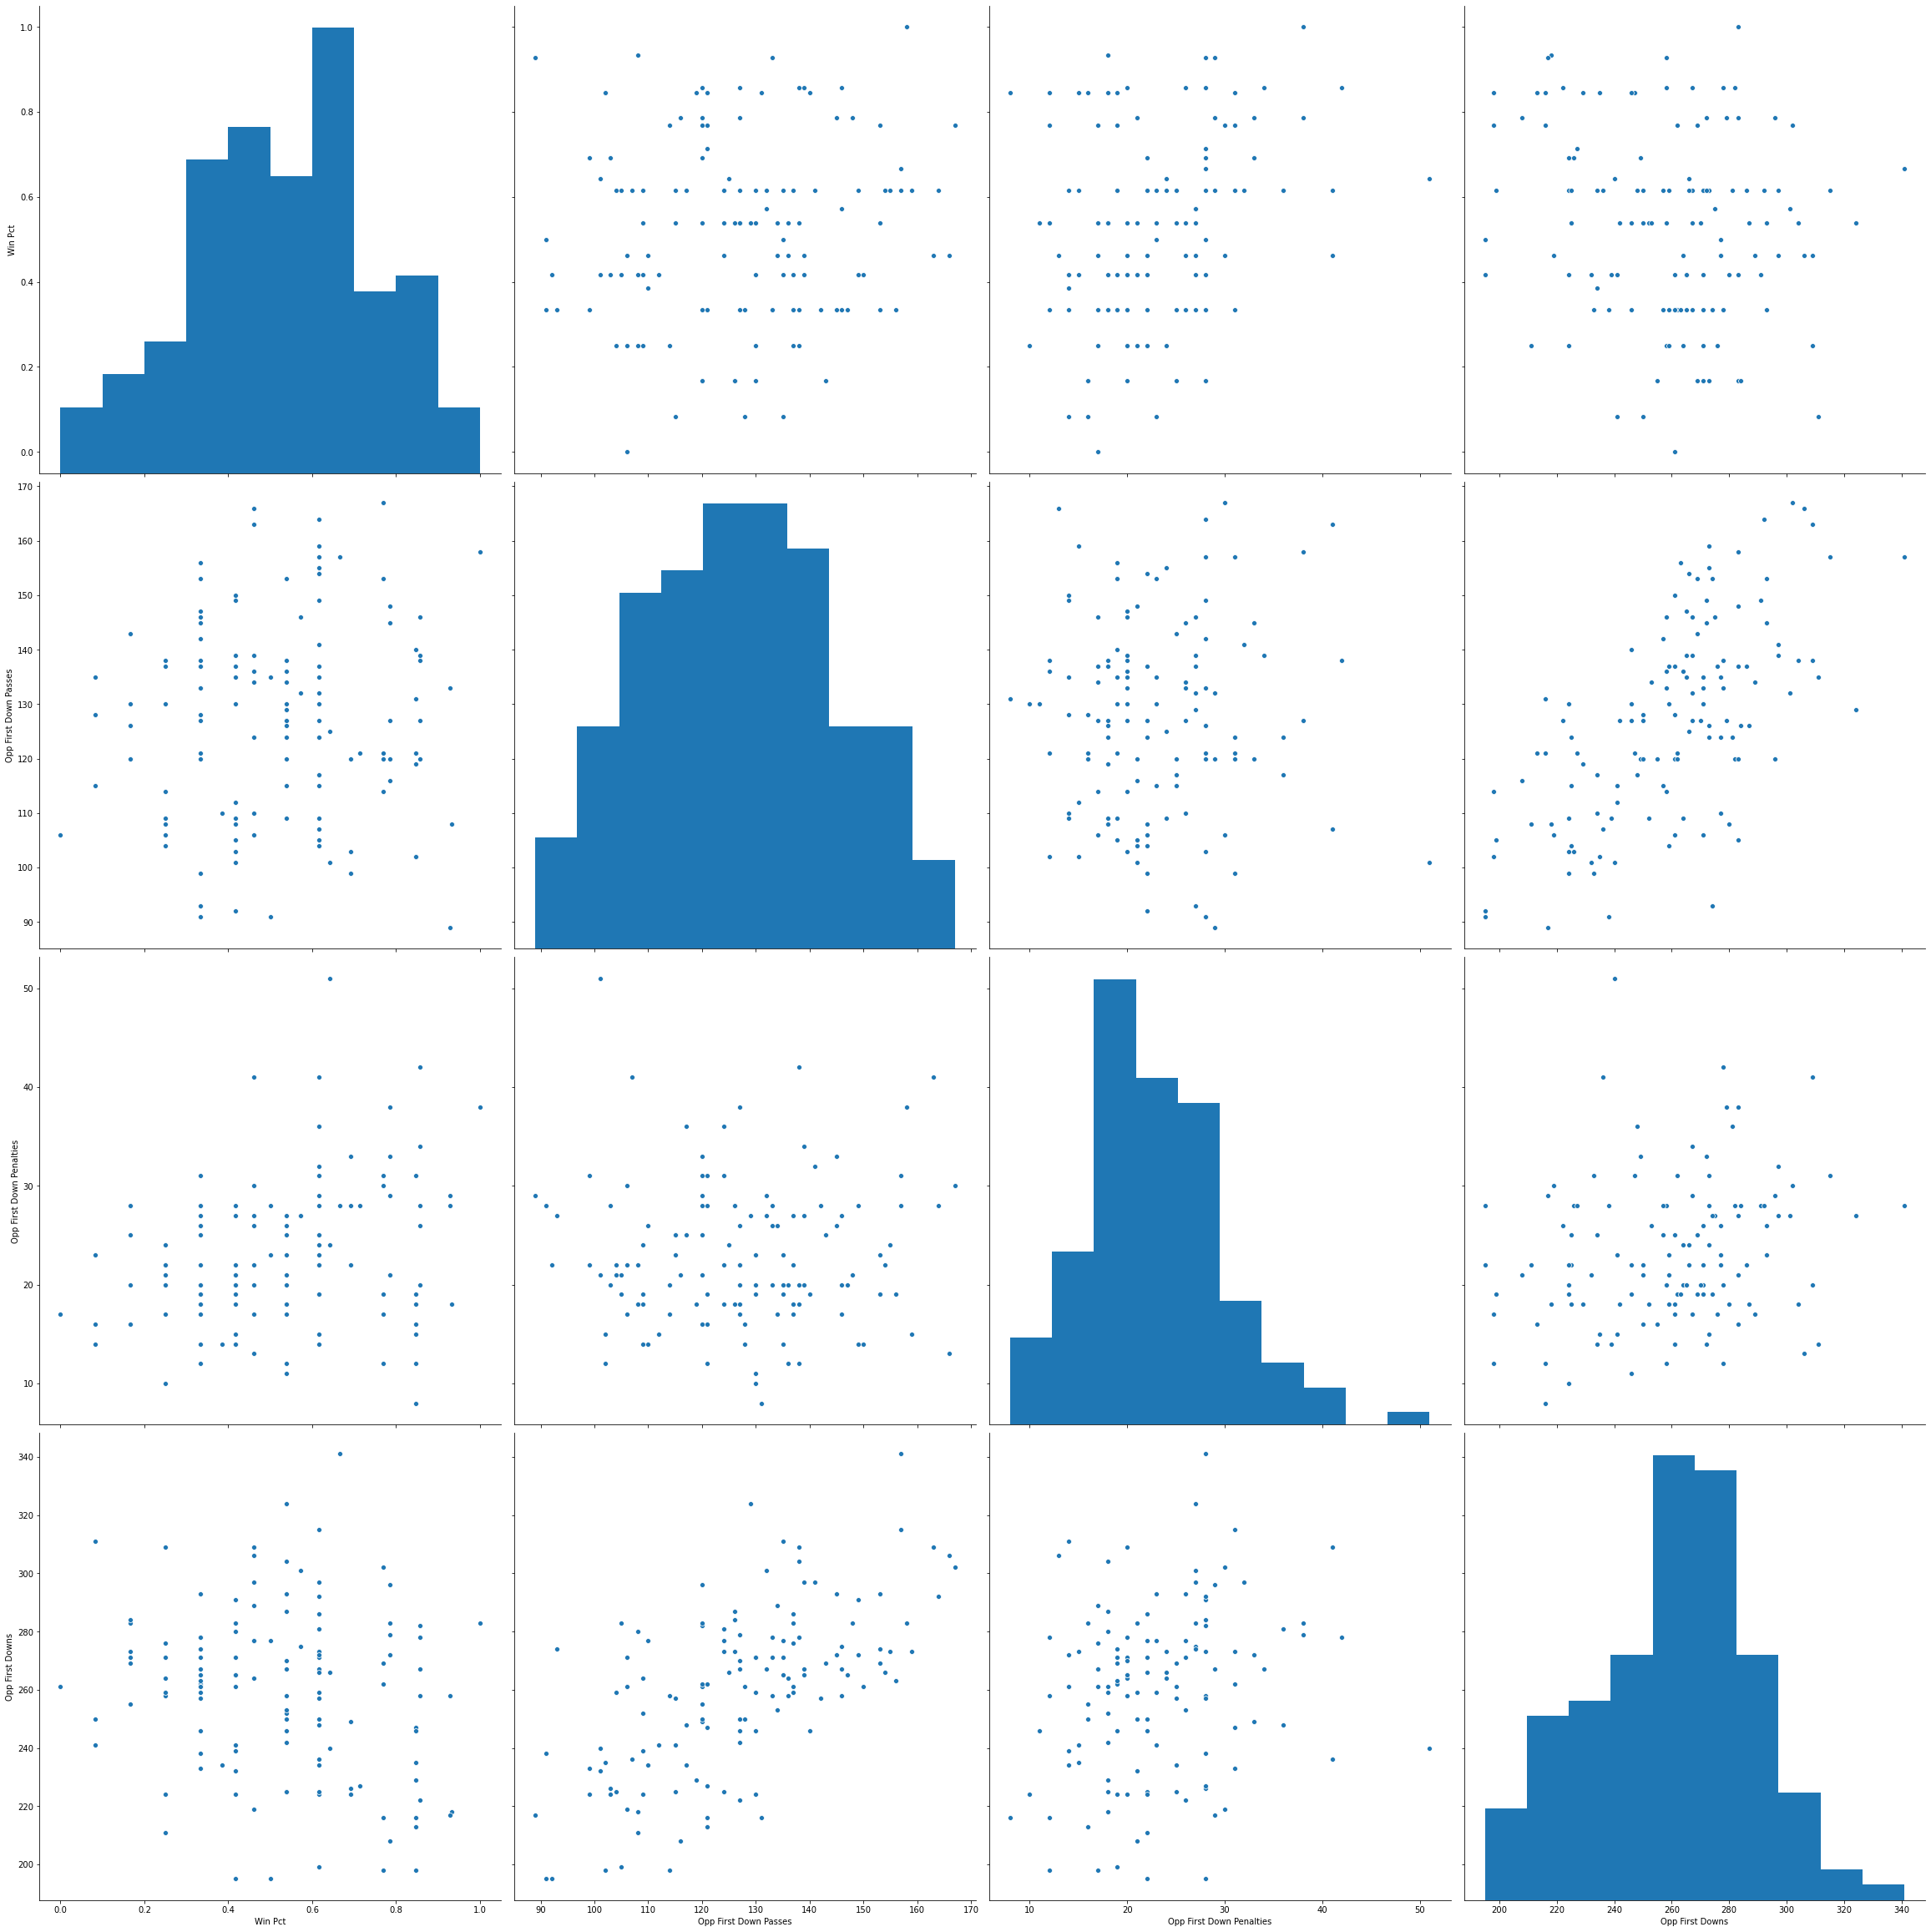

In [13]:
sns.pairplot(cfb[['Win Pct','Opp First Down Passes','Opp First Down Penalties','Opp First Downs']], height = 8)

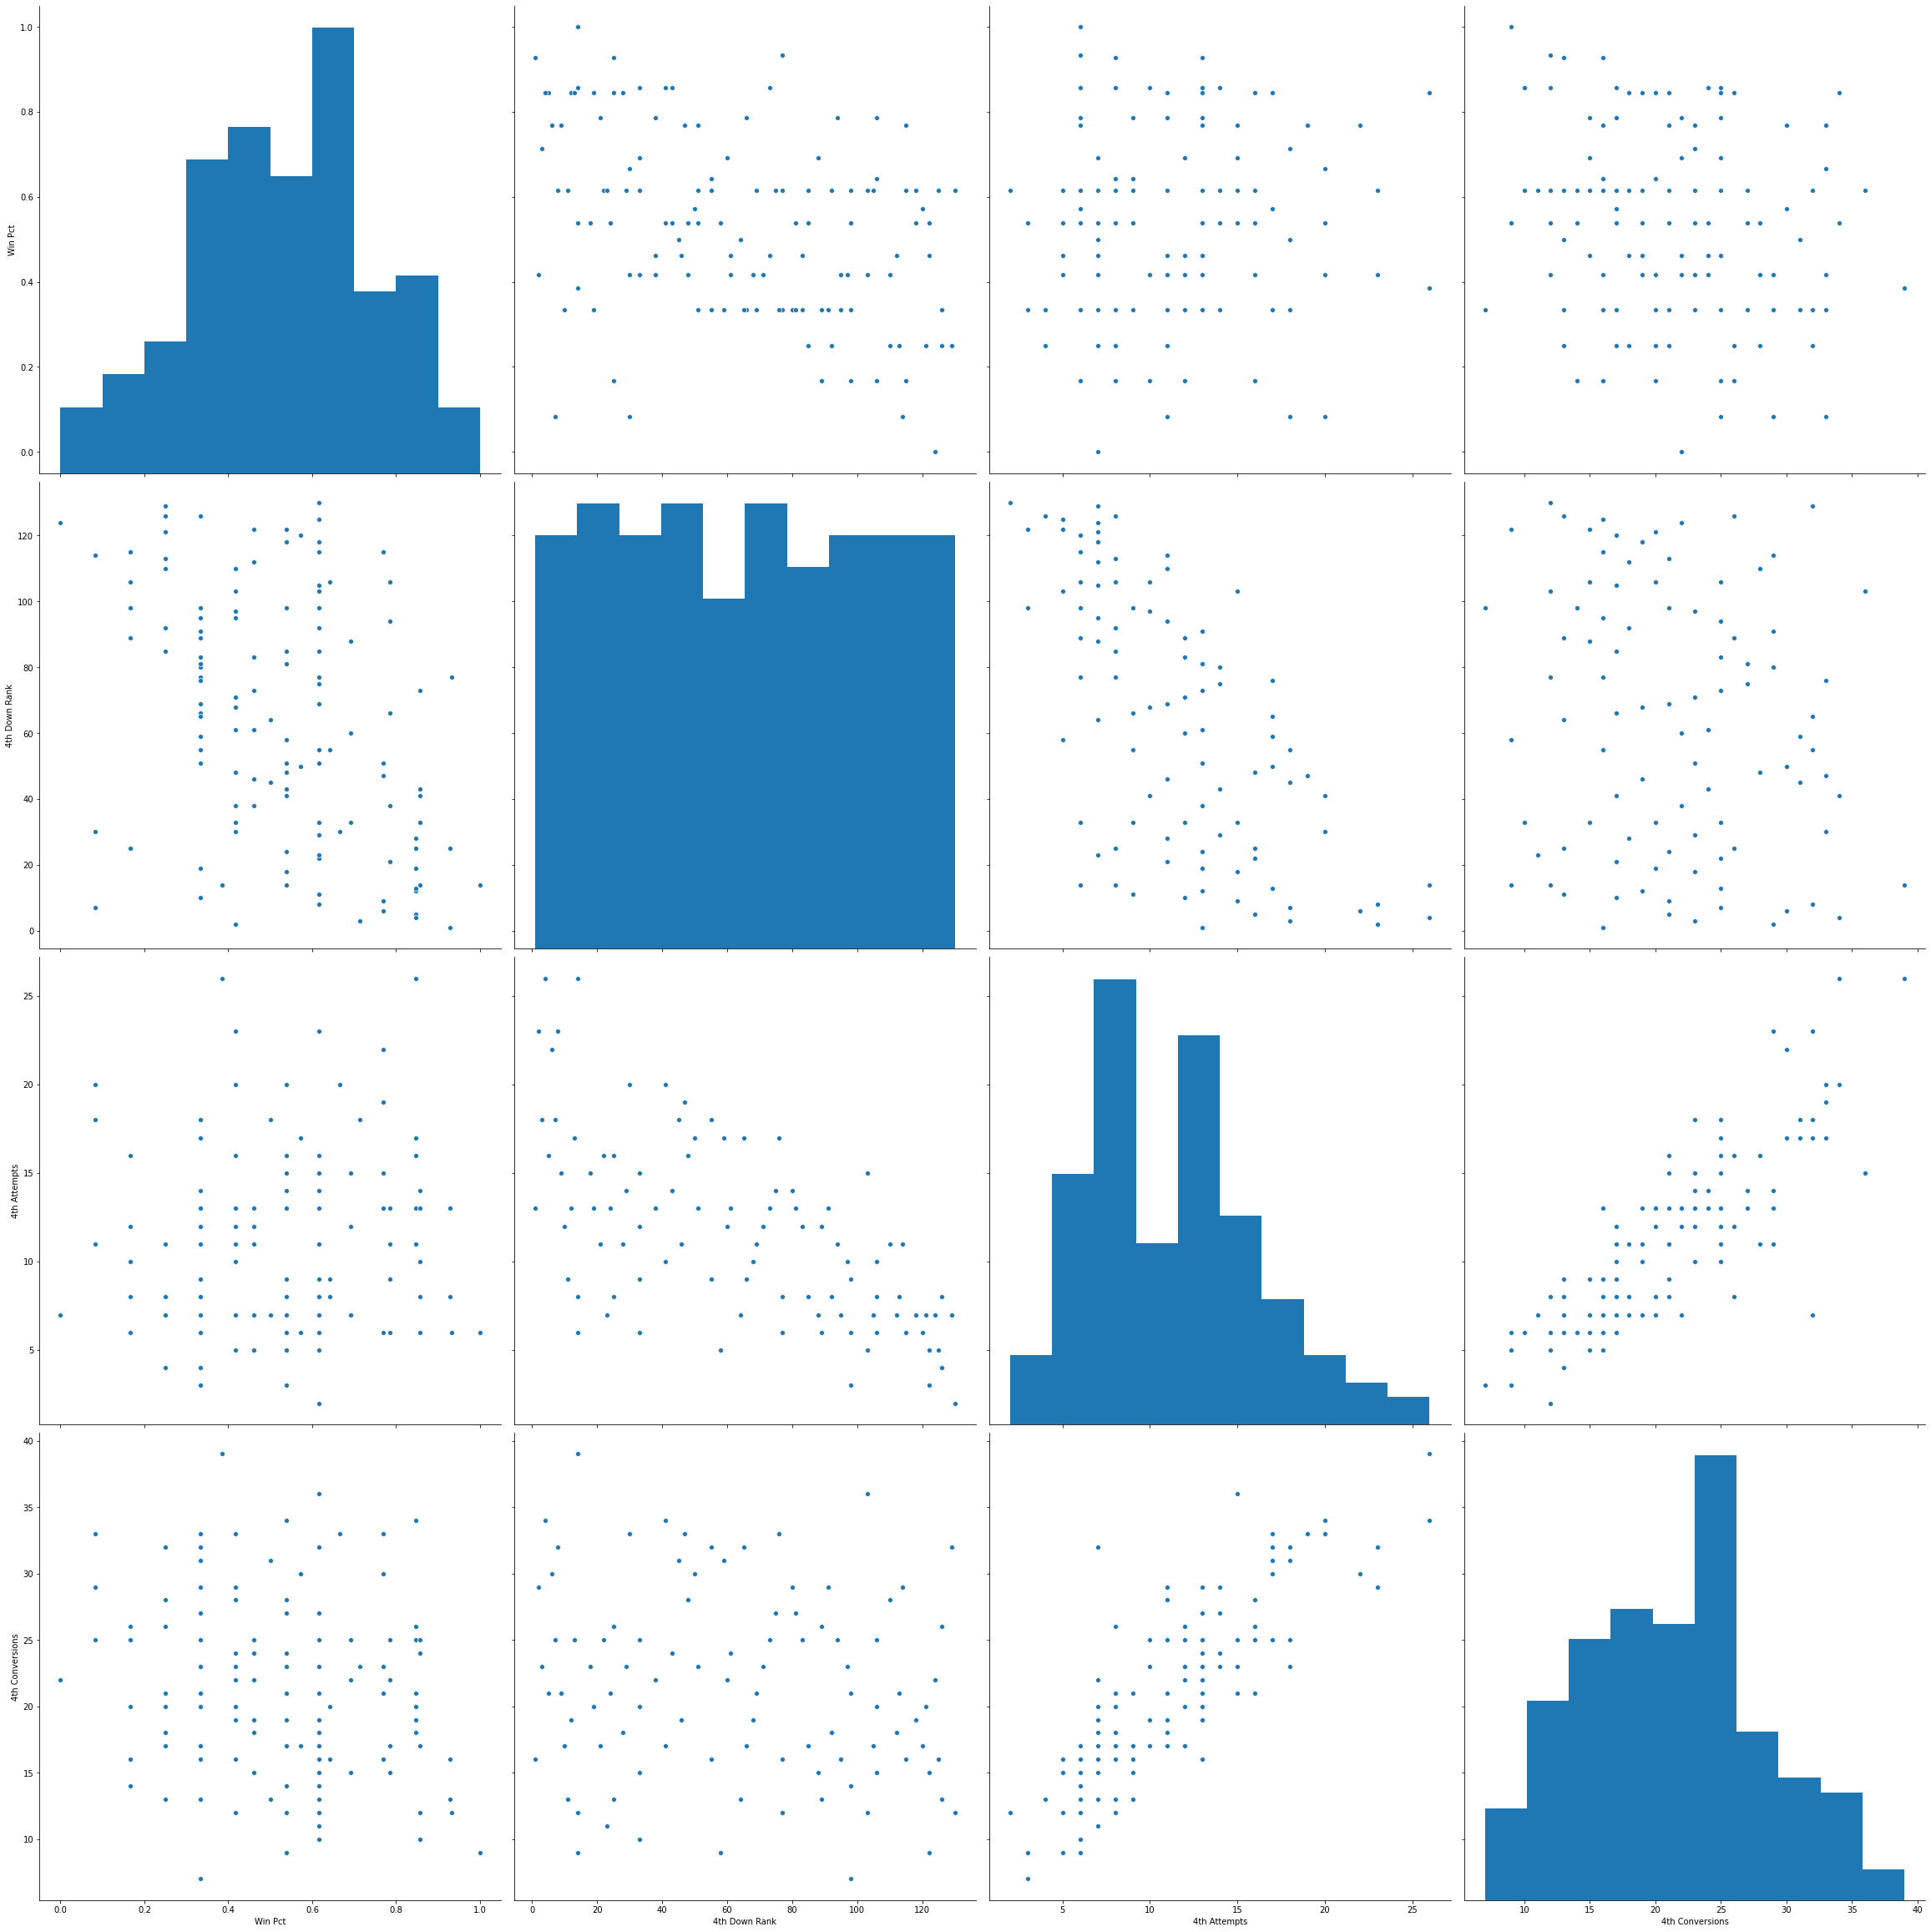

In [14]:
sns.pairplot(cfb[['Win Pct','4th Down Rank','4th Attempts','4th Conversions']], height = 8)

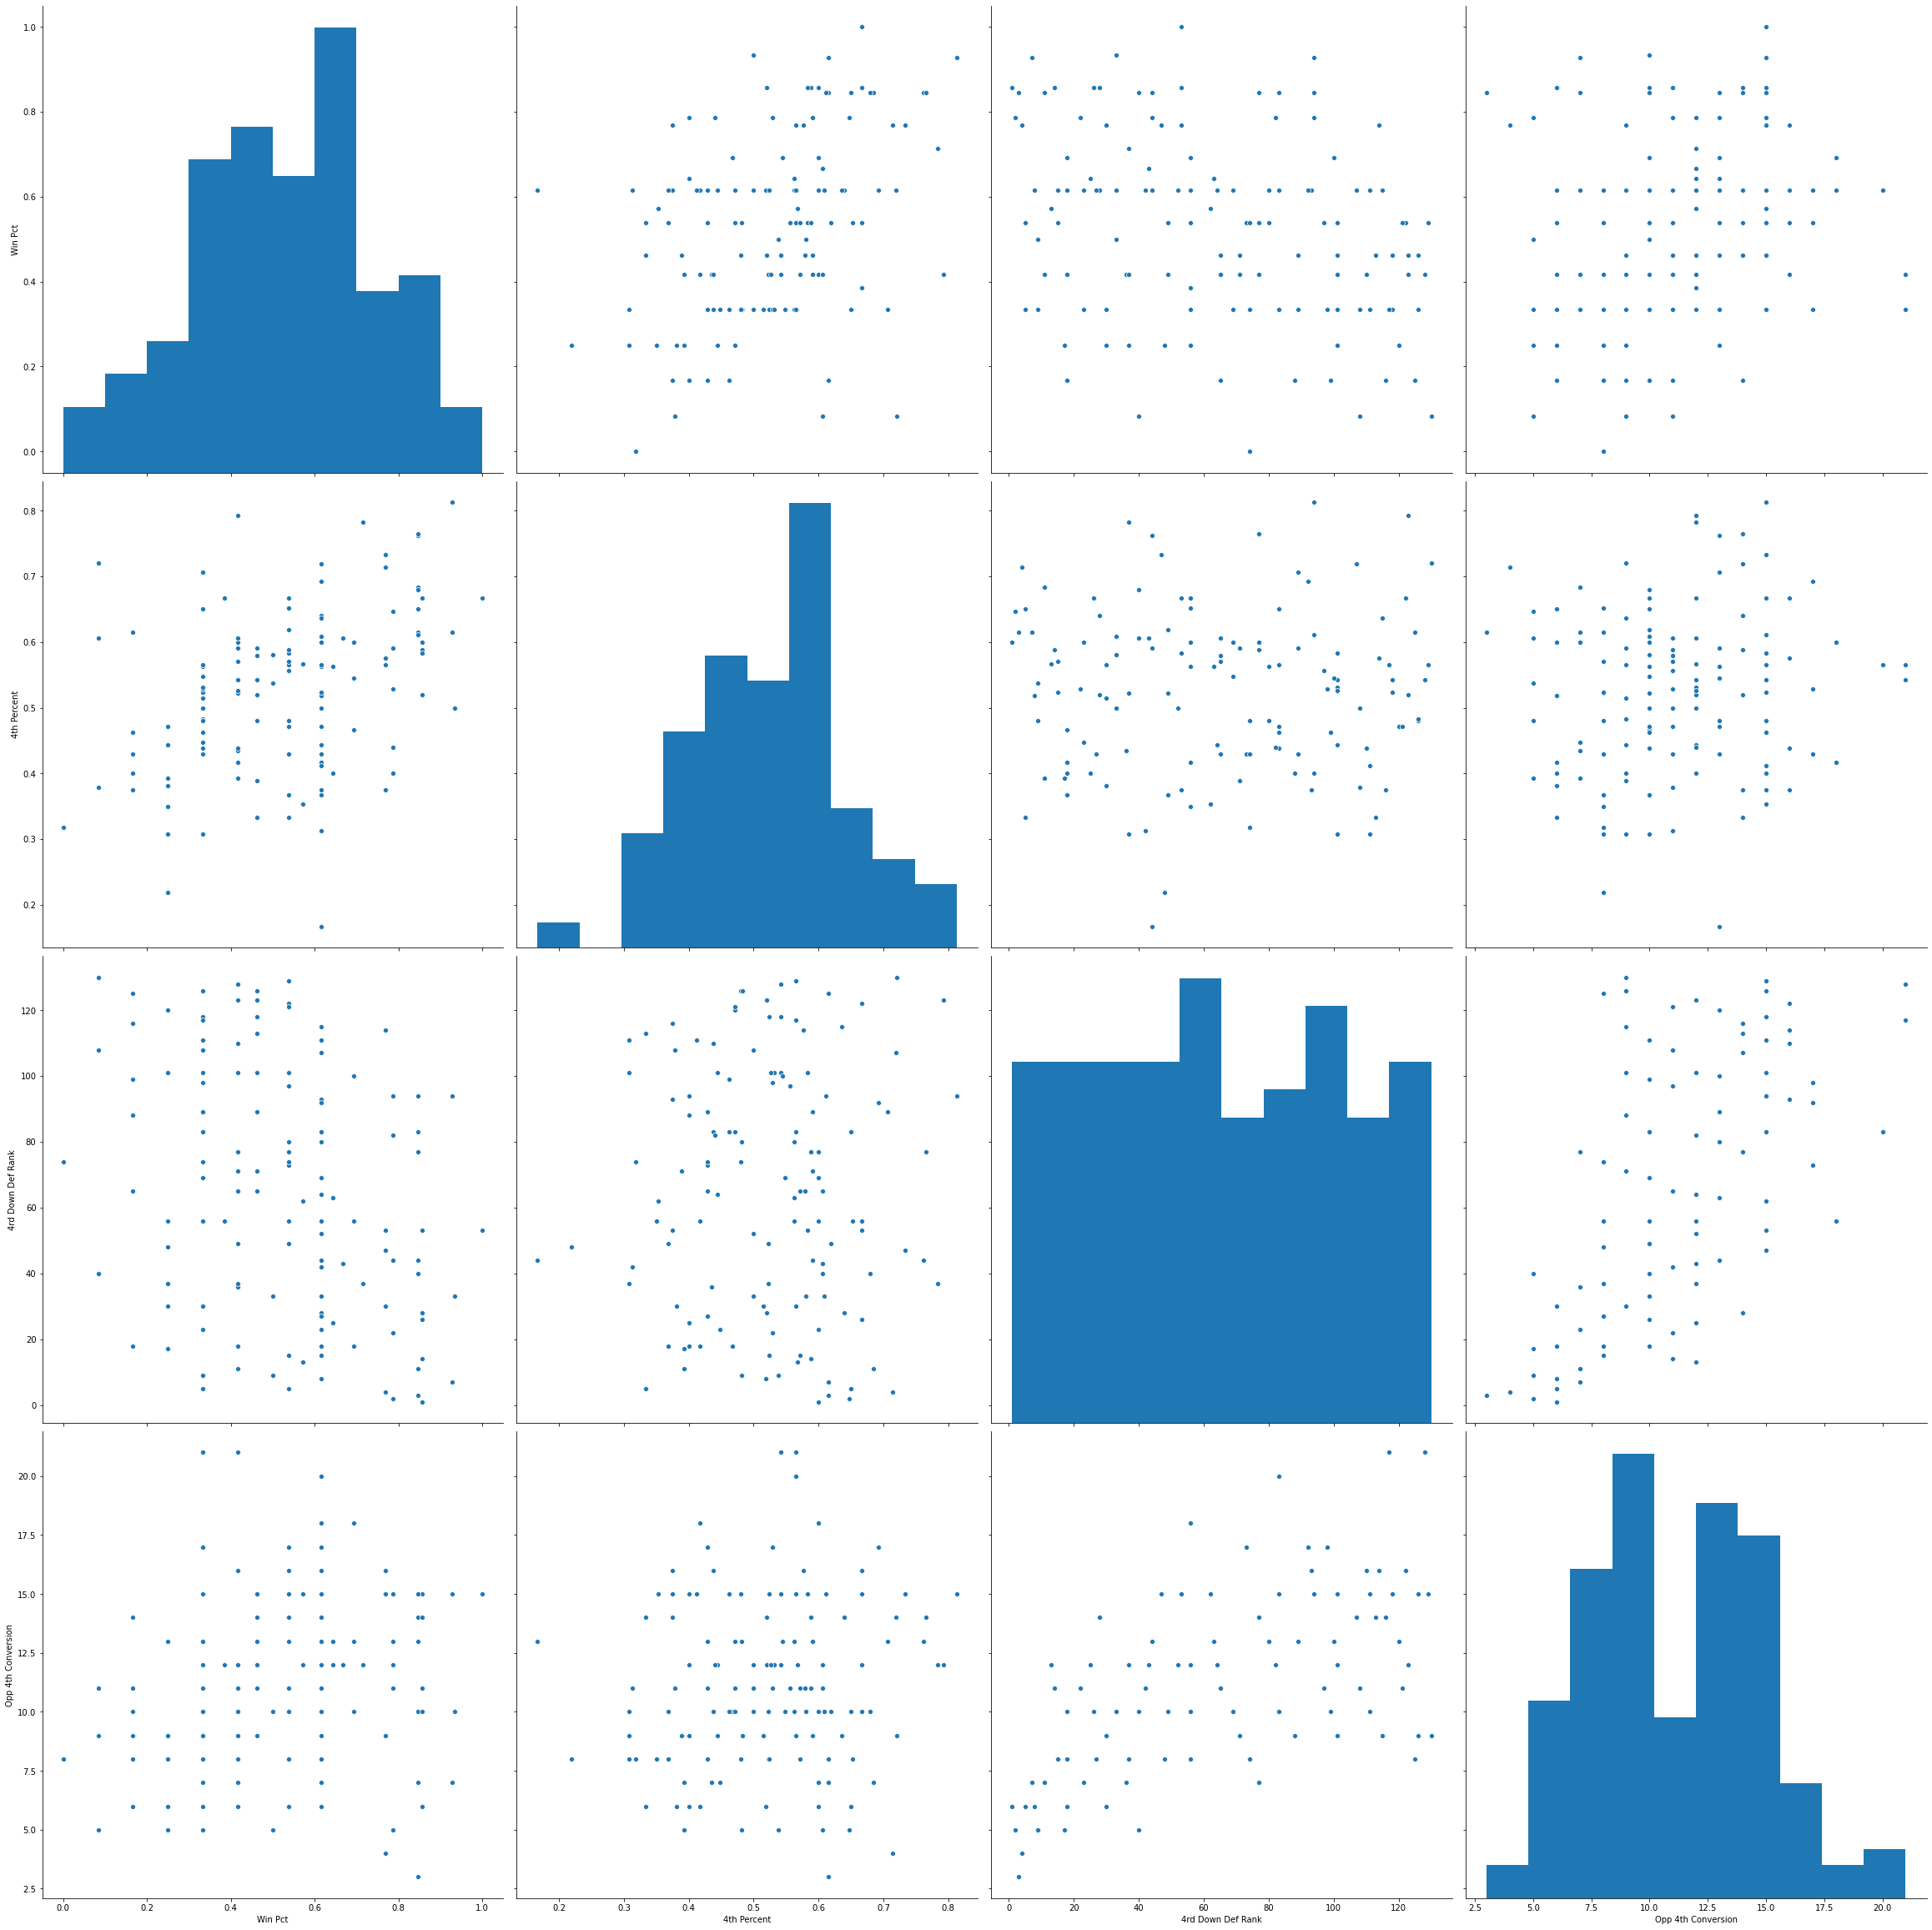

In [15]:
sns.pairplot(cfb[['Win Pct','4th Percent','4rd Down Def Rank','Opp 4th Conversion']], height = 8)

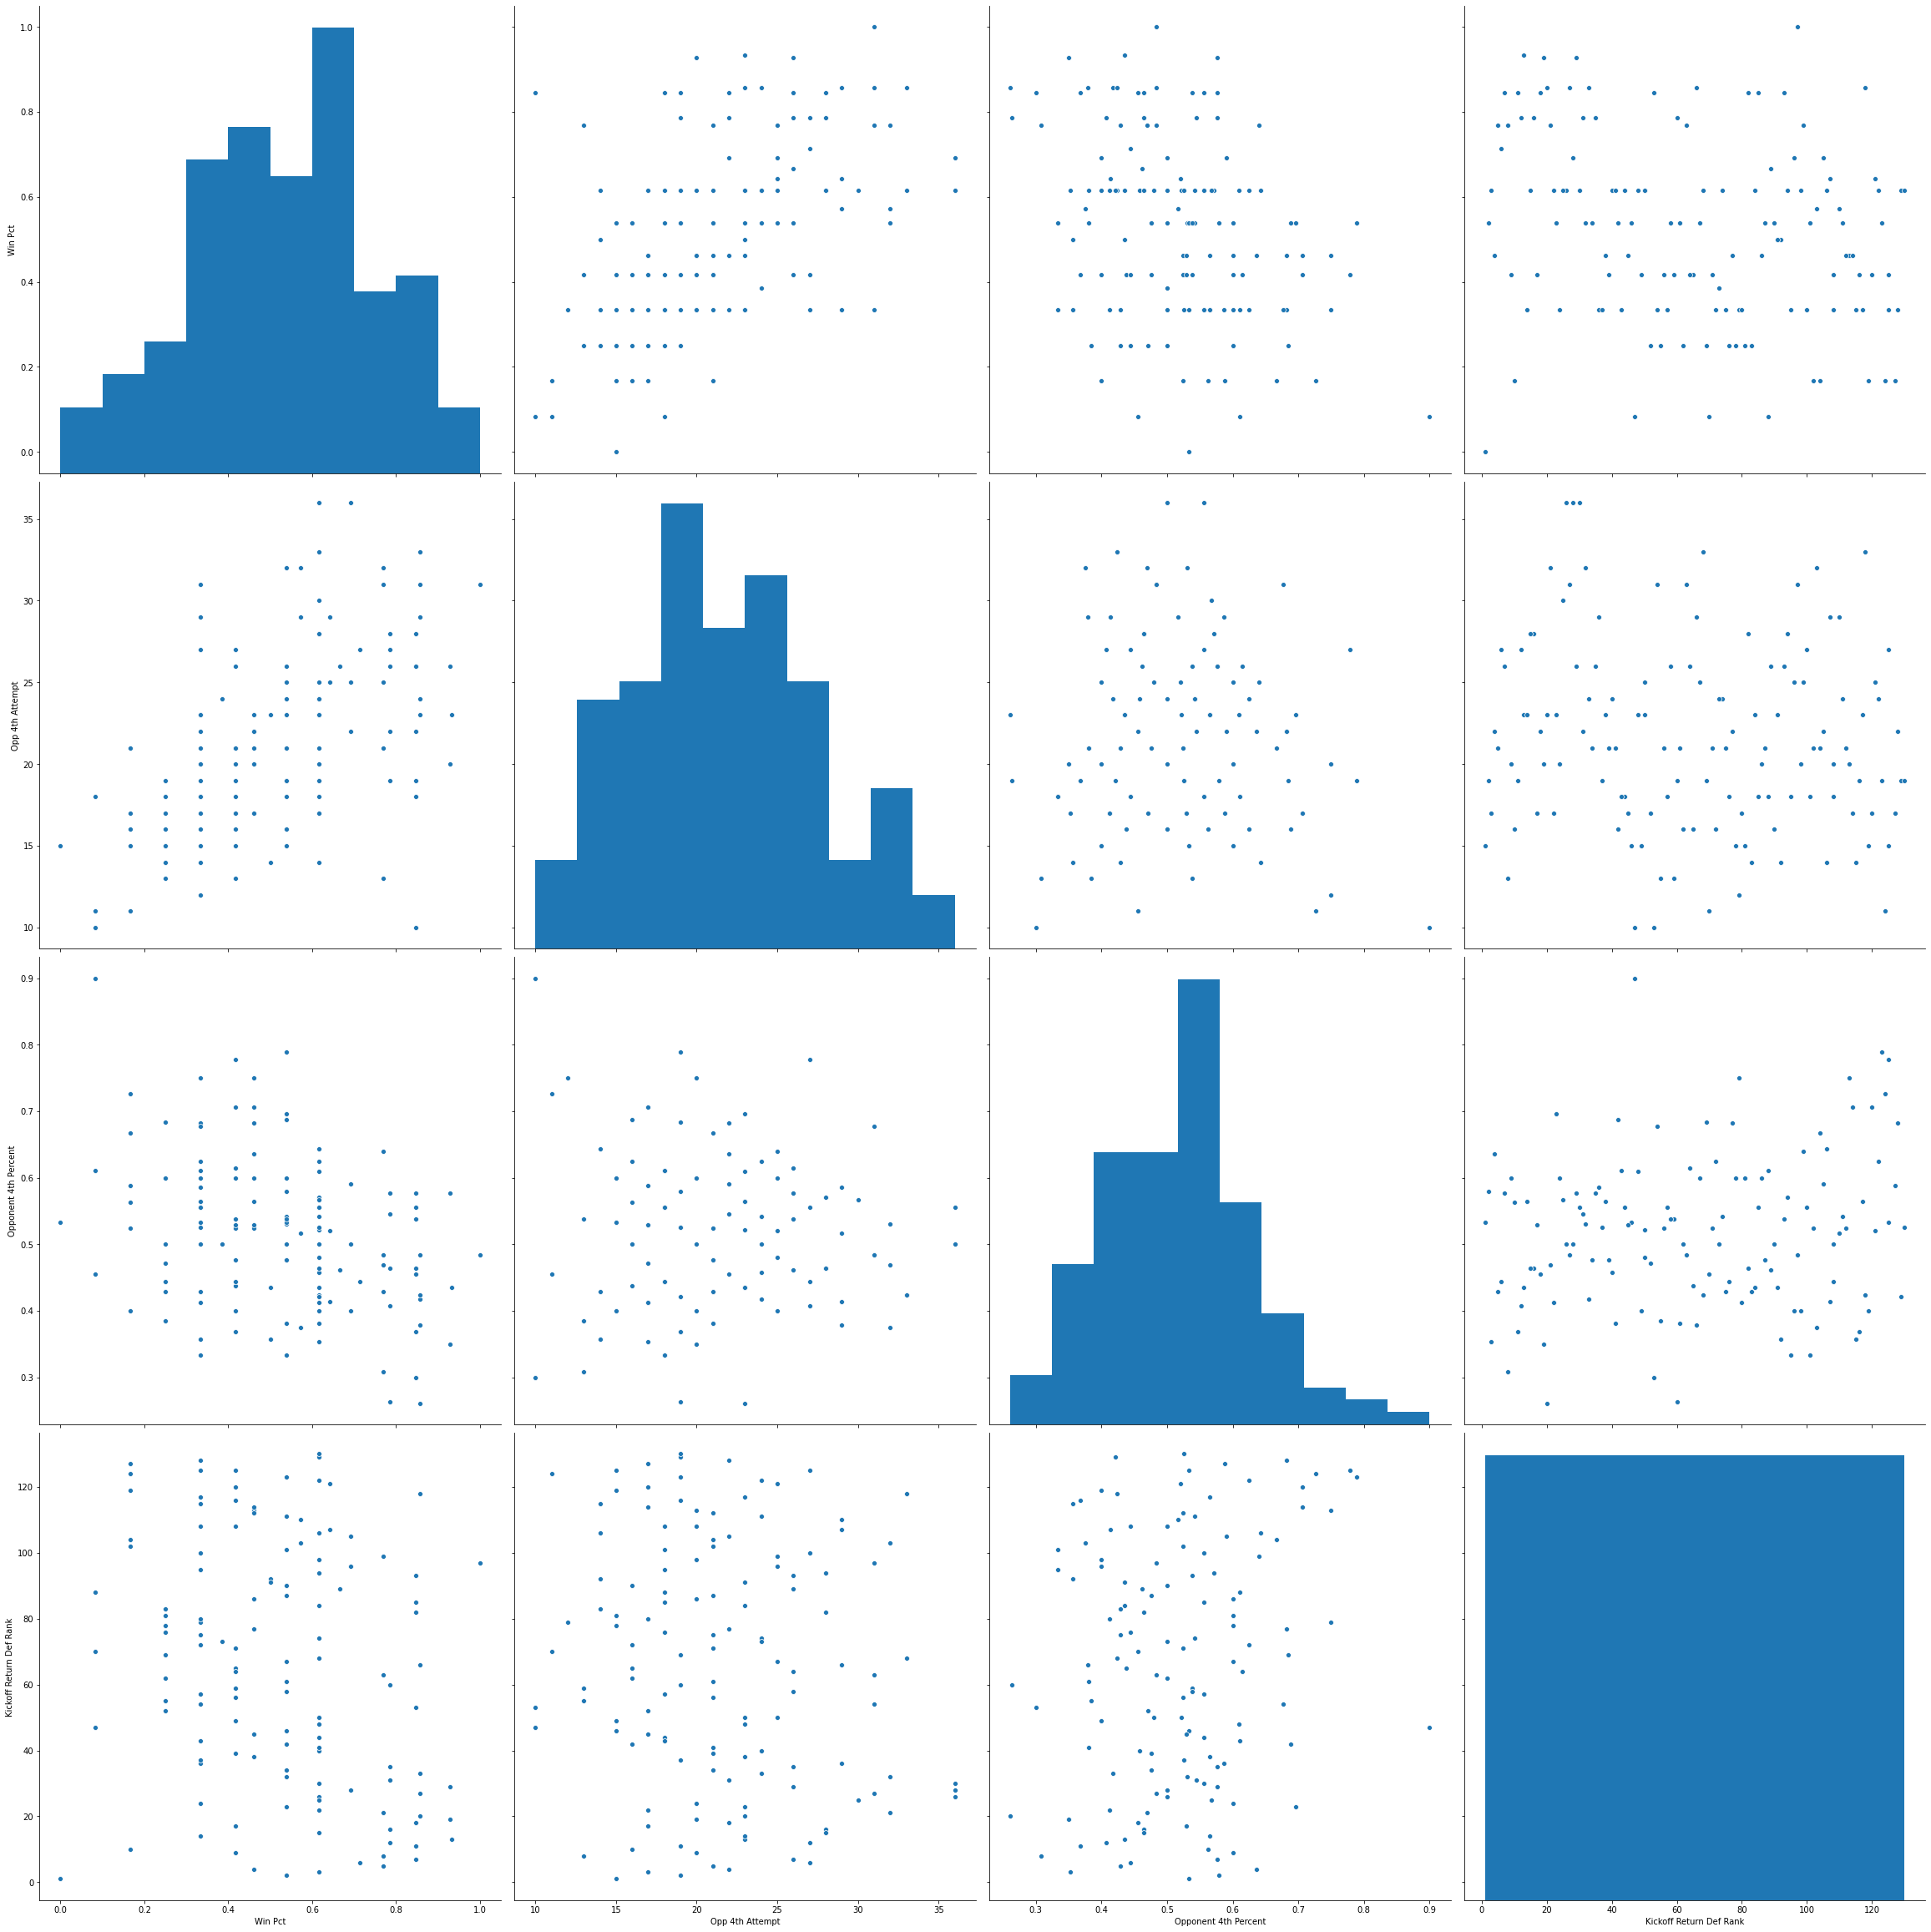

In [16]:
sns.pairplot(cfb[['Win Pct','Opp 4th Attempt','Opponent 4th Percent','Kickoff Return Def Rank']], height = 8)

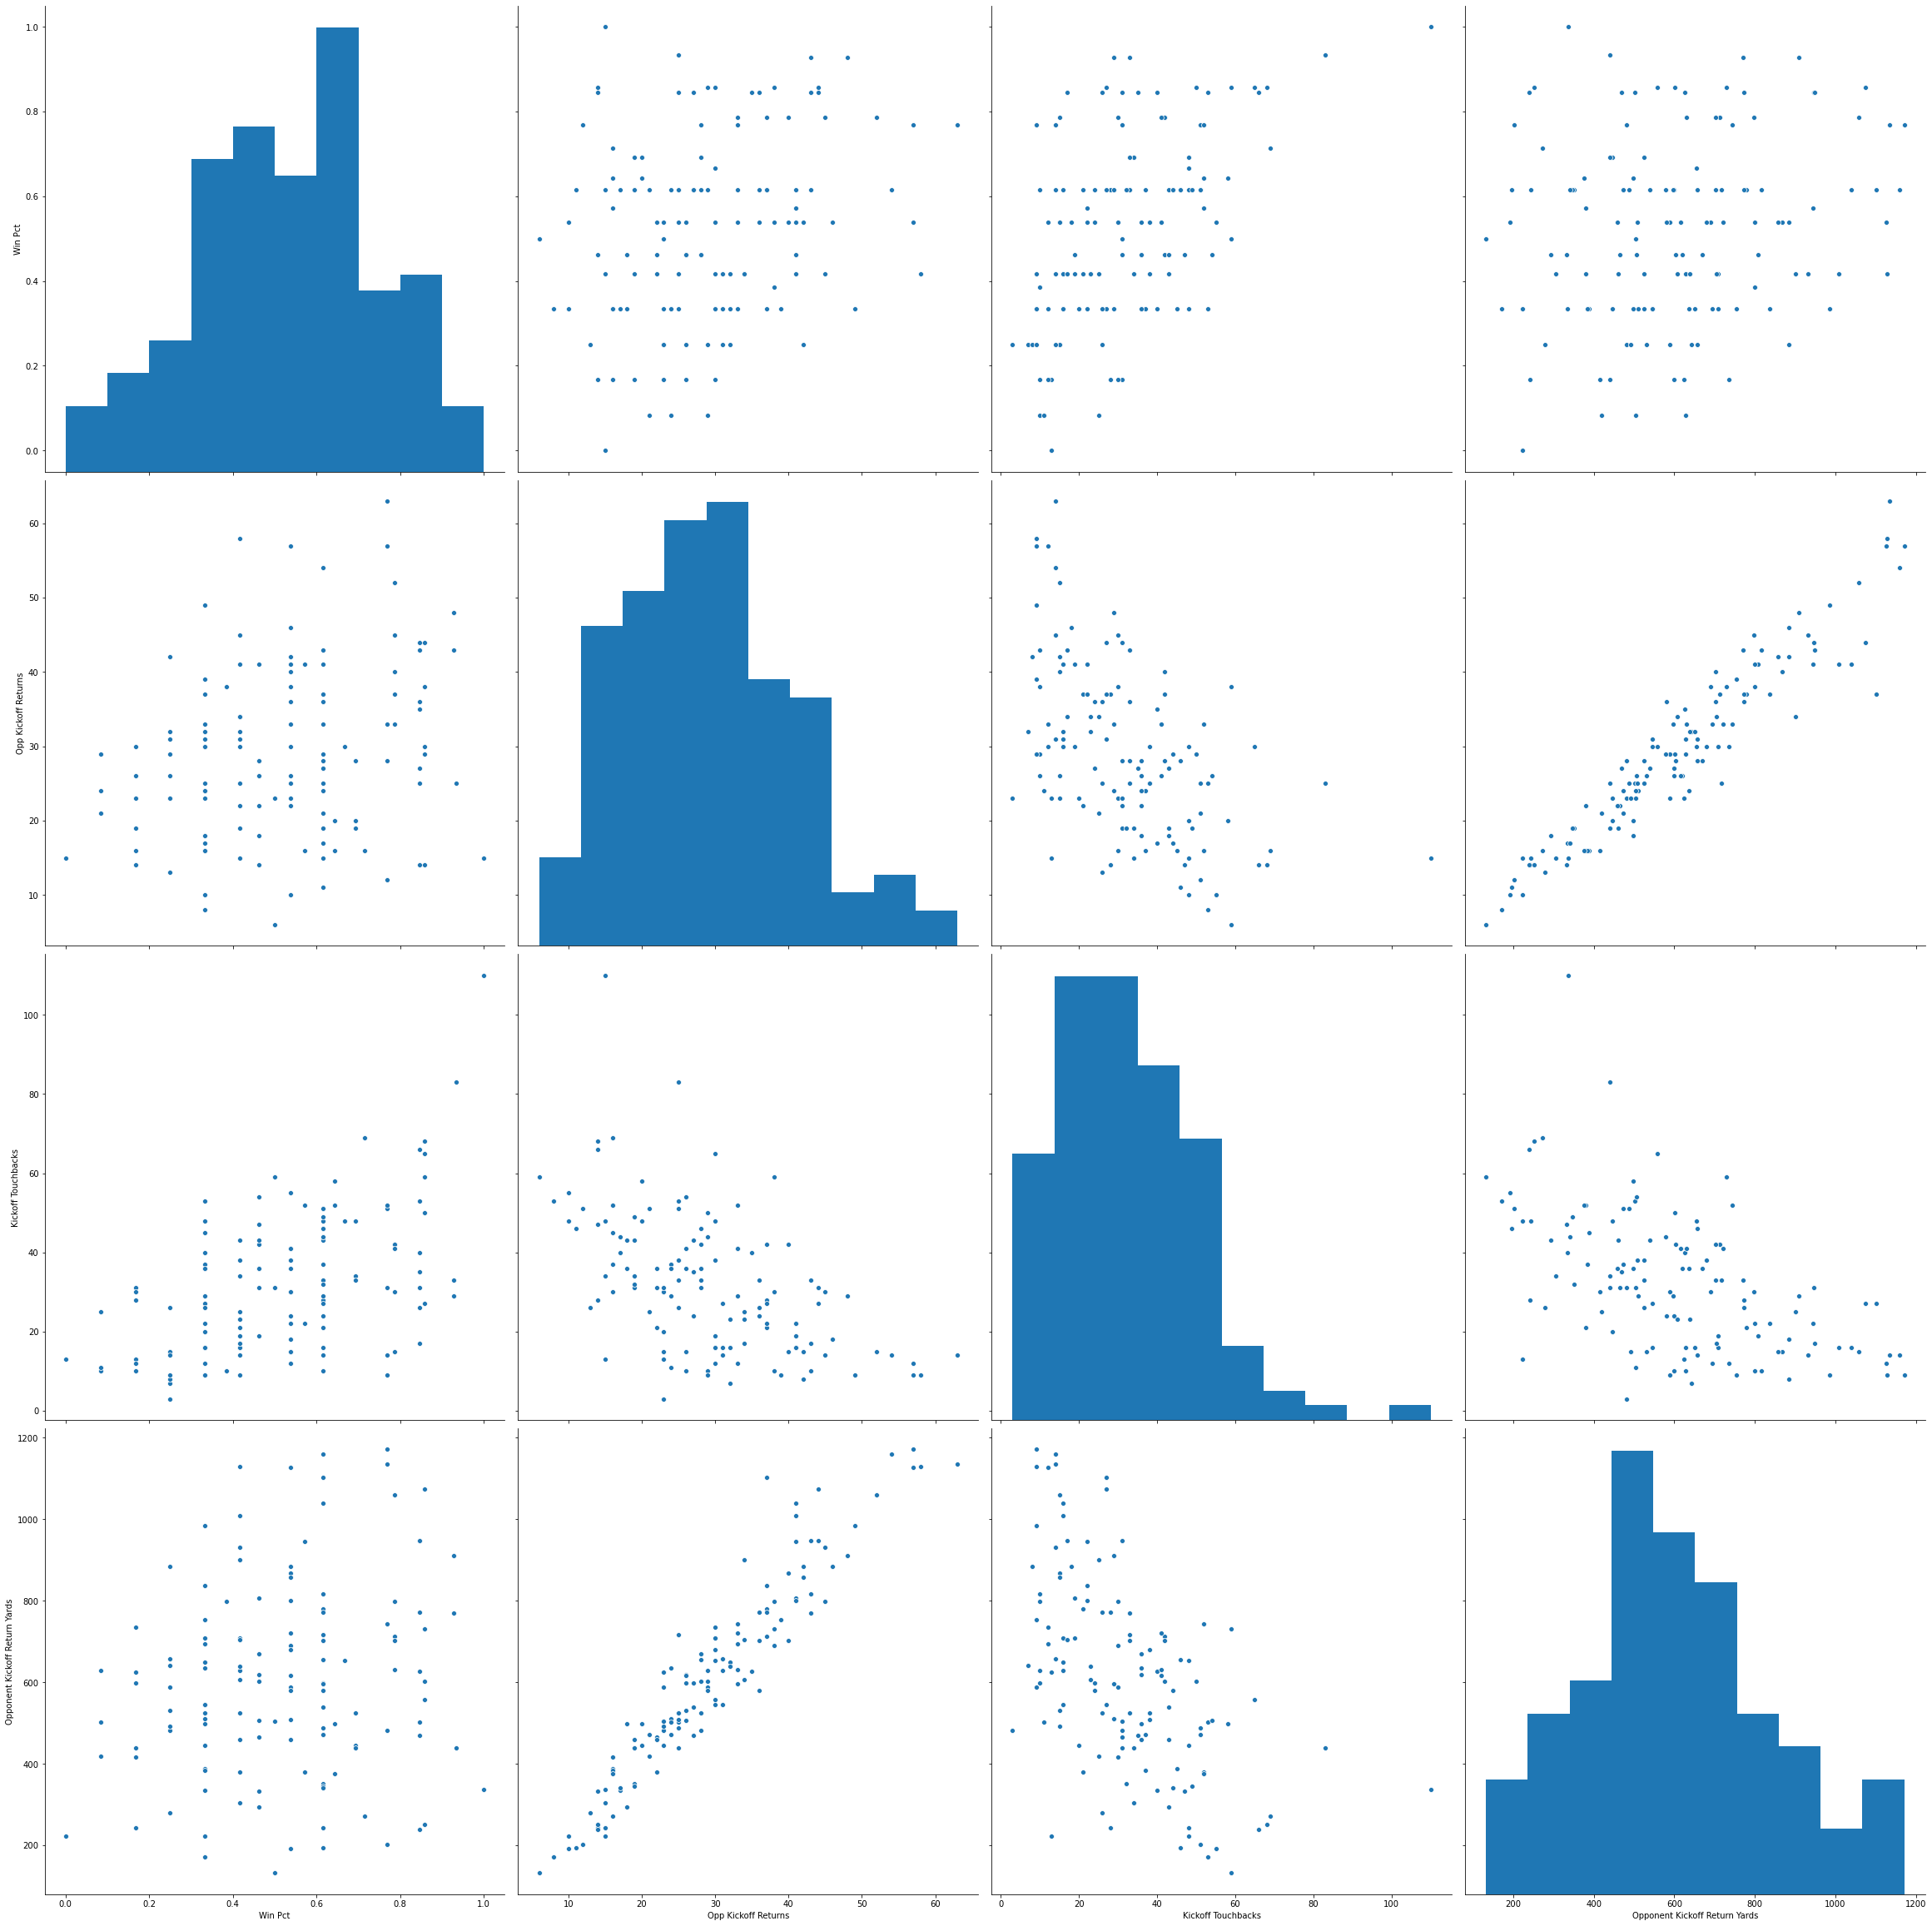

In [17]:
sns.pairplot(cfb[['Win Pct','Opp Kickoff Returns','Kickoff Touchbacks','Opponent Kickoff Return Yards']], height = 8)

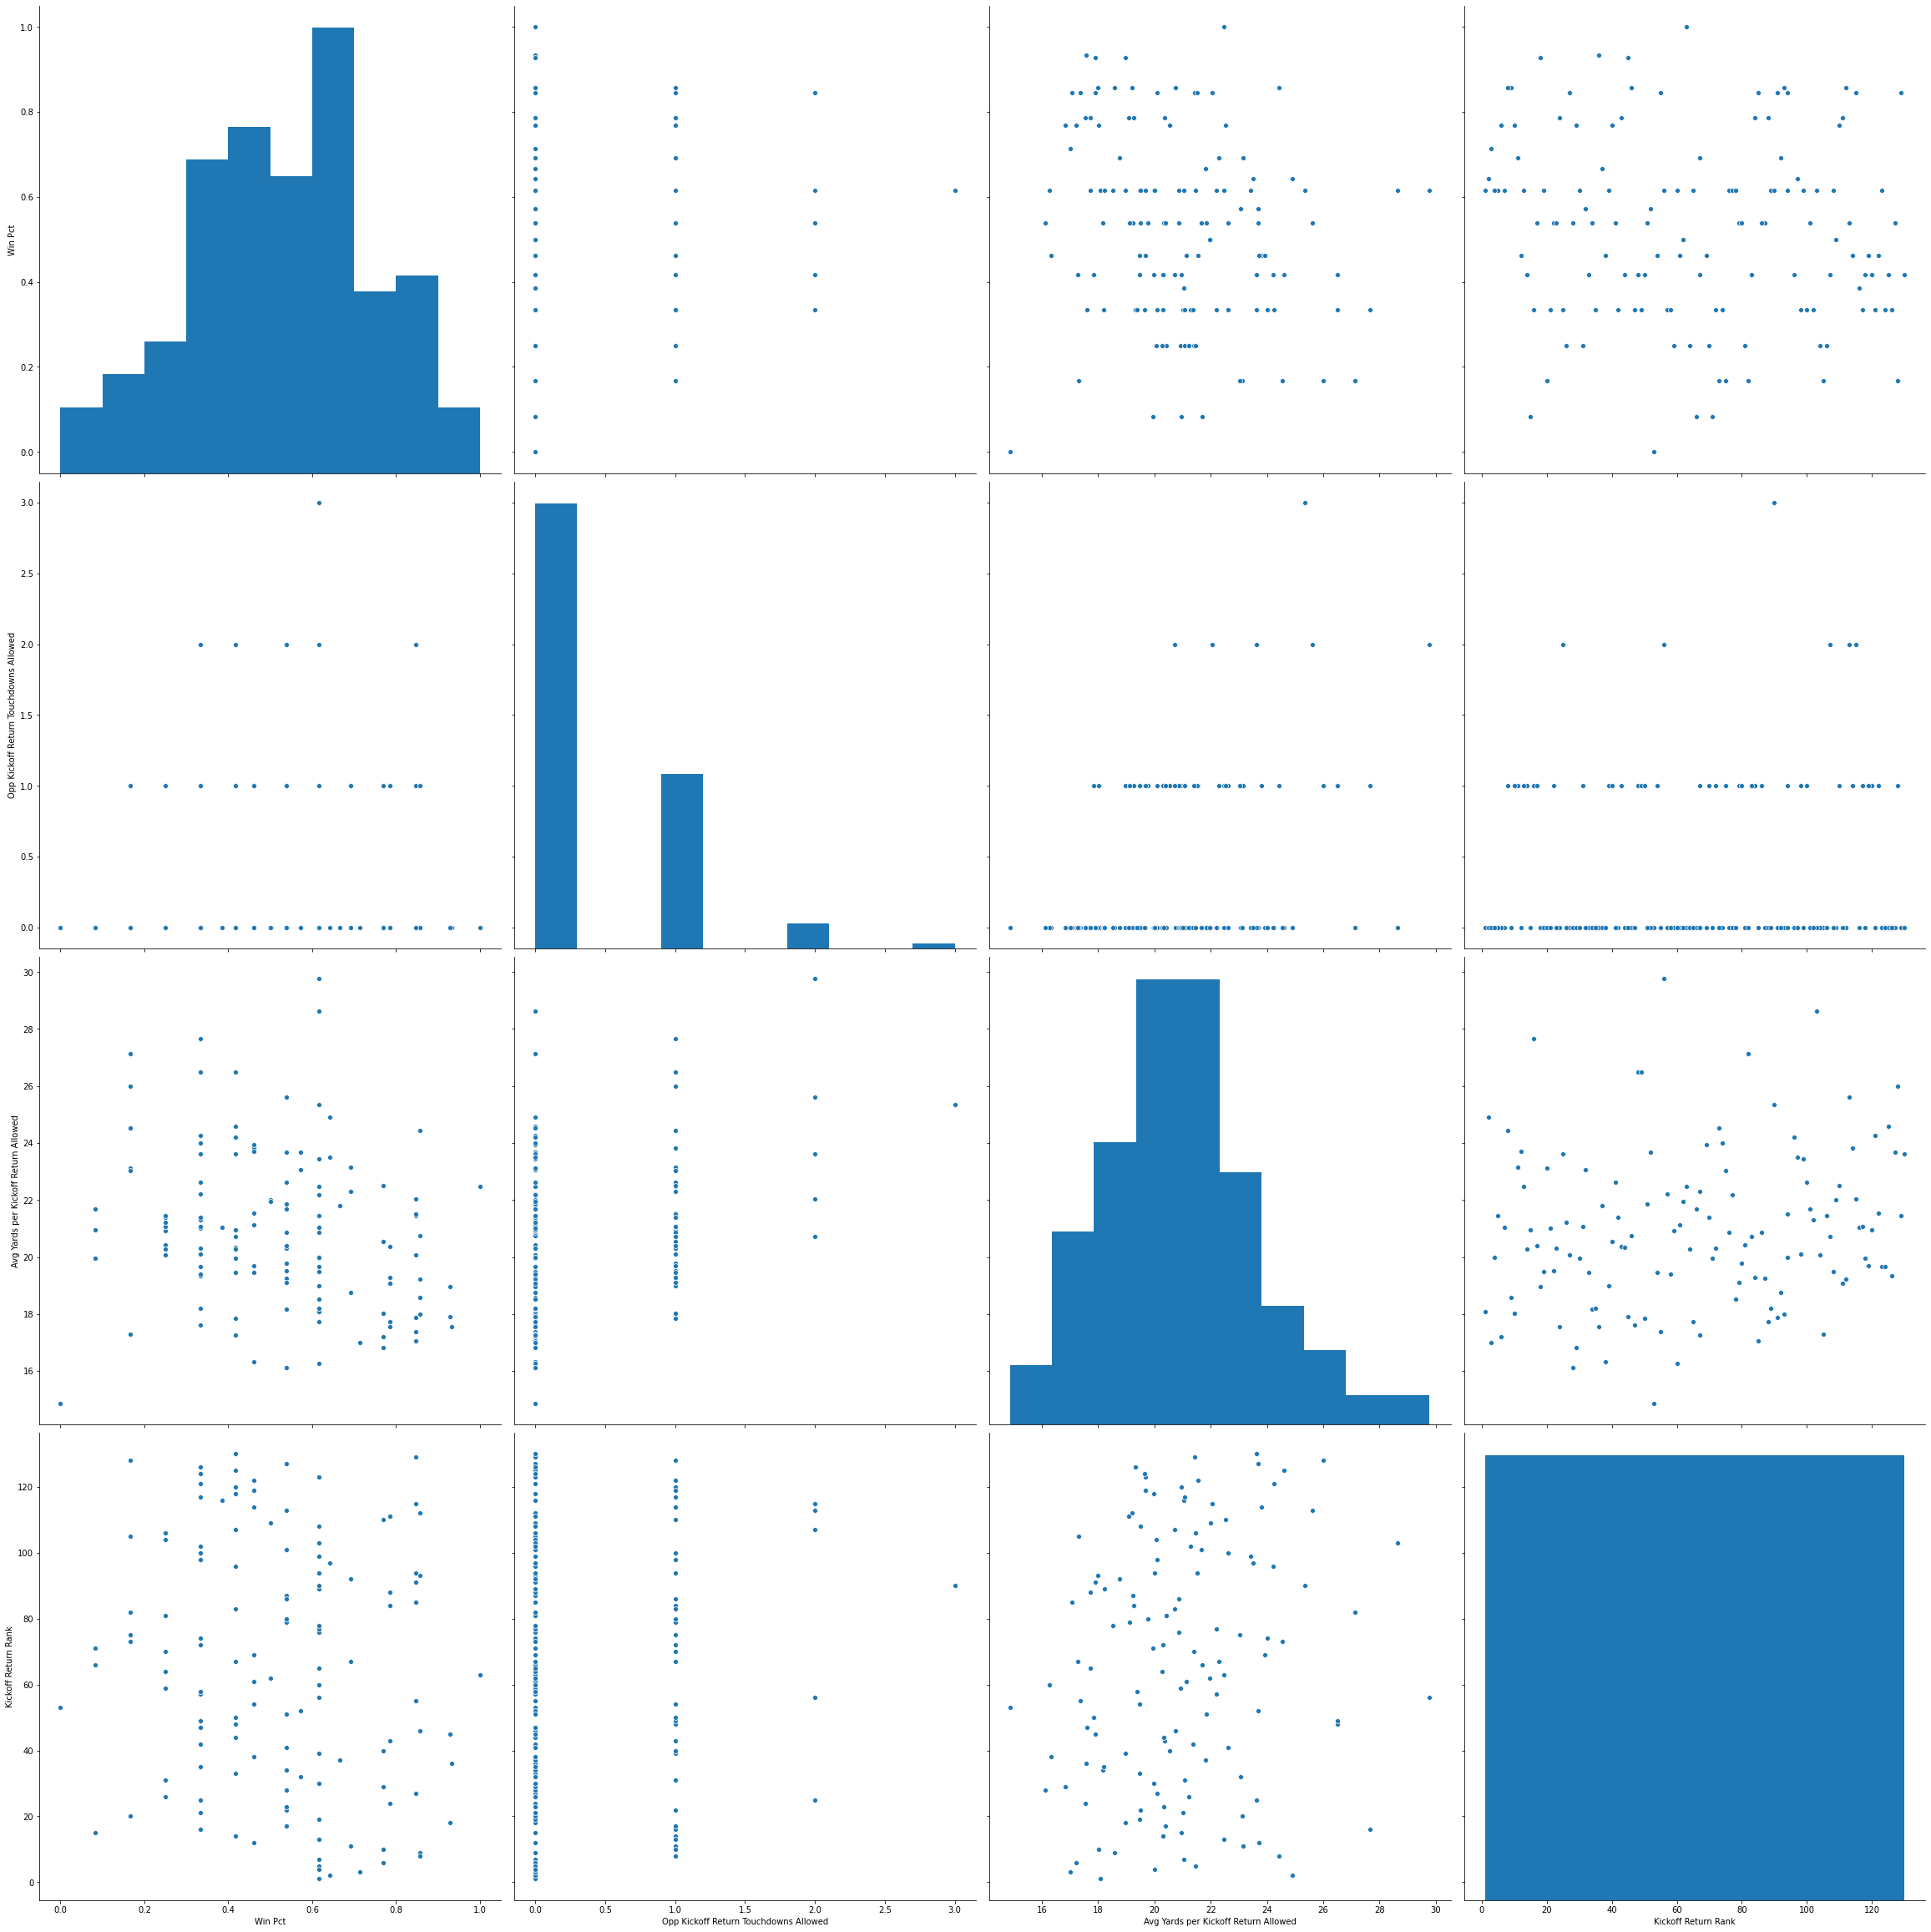

In [18]:
sns.pairplot(cfb[['Win Pct','Opp Kickoff Return Touchdowns Allowed','Avg Yards per Kickoff Return Allowed','Kickoff Return Rank']], height = 8)

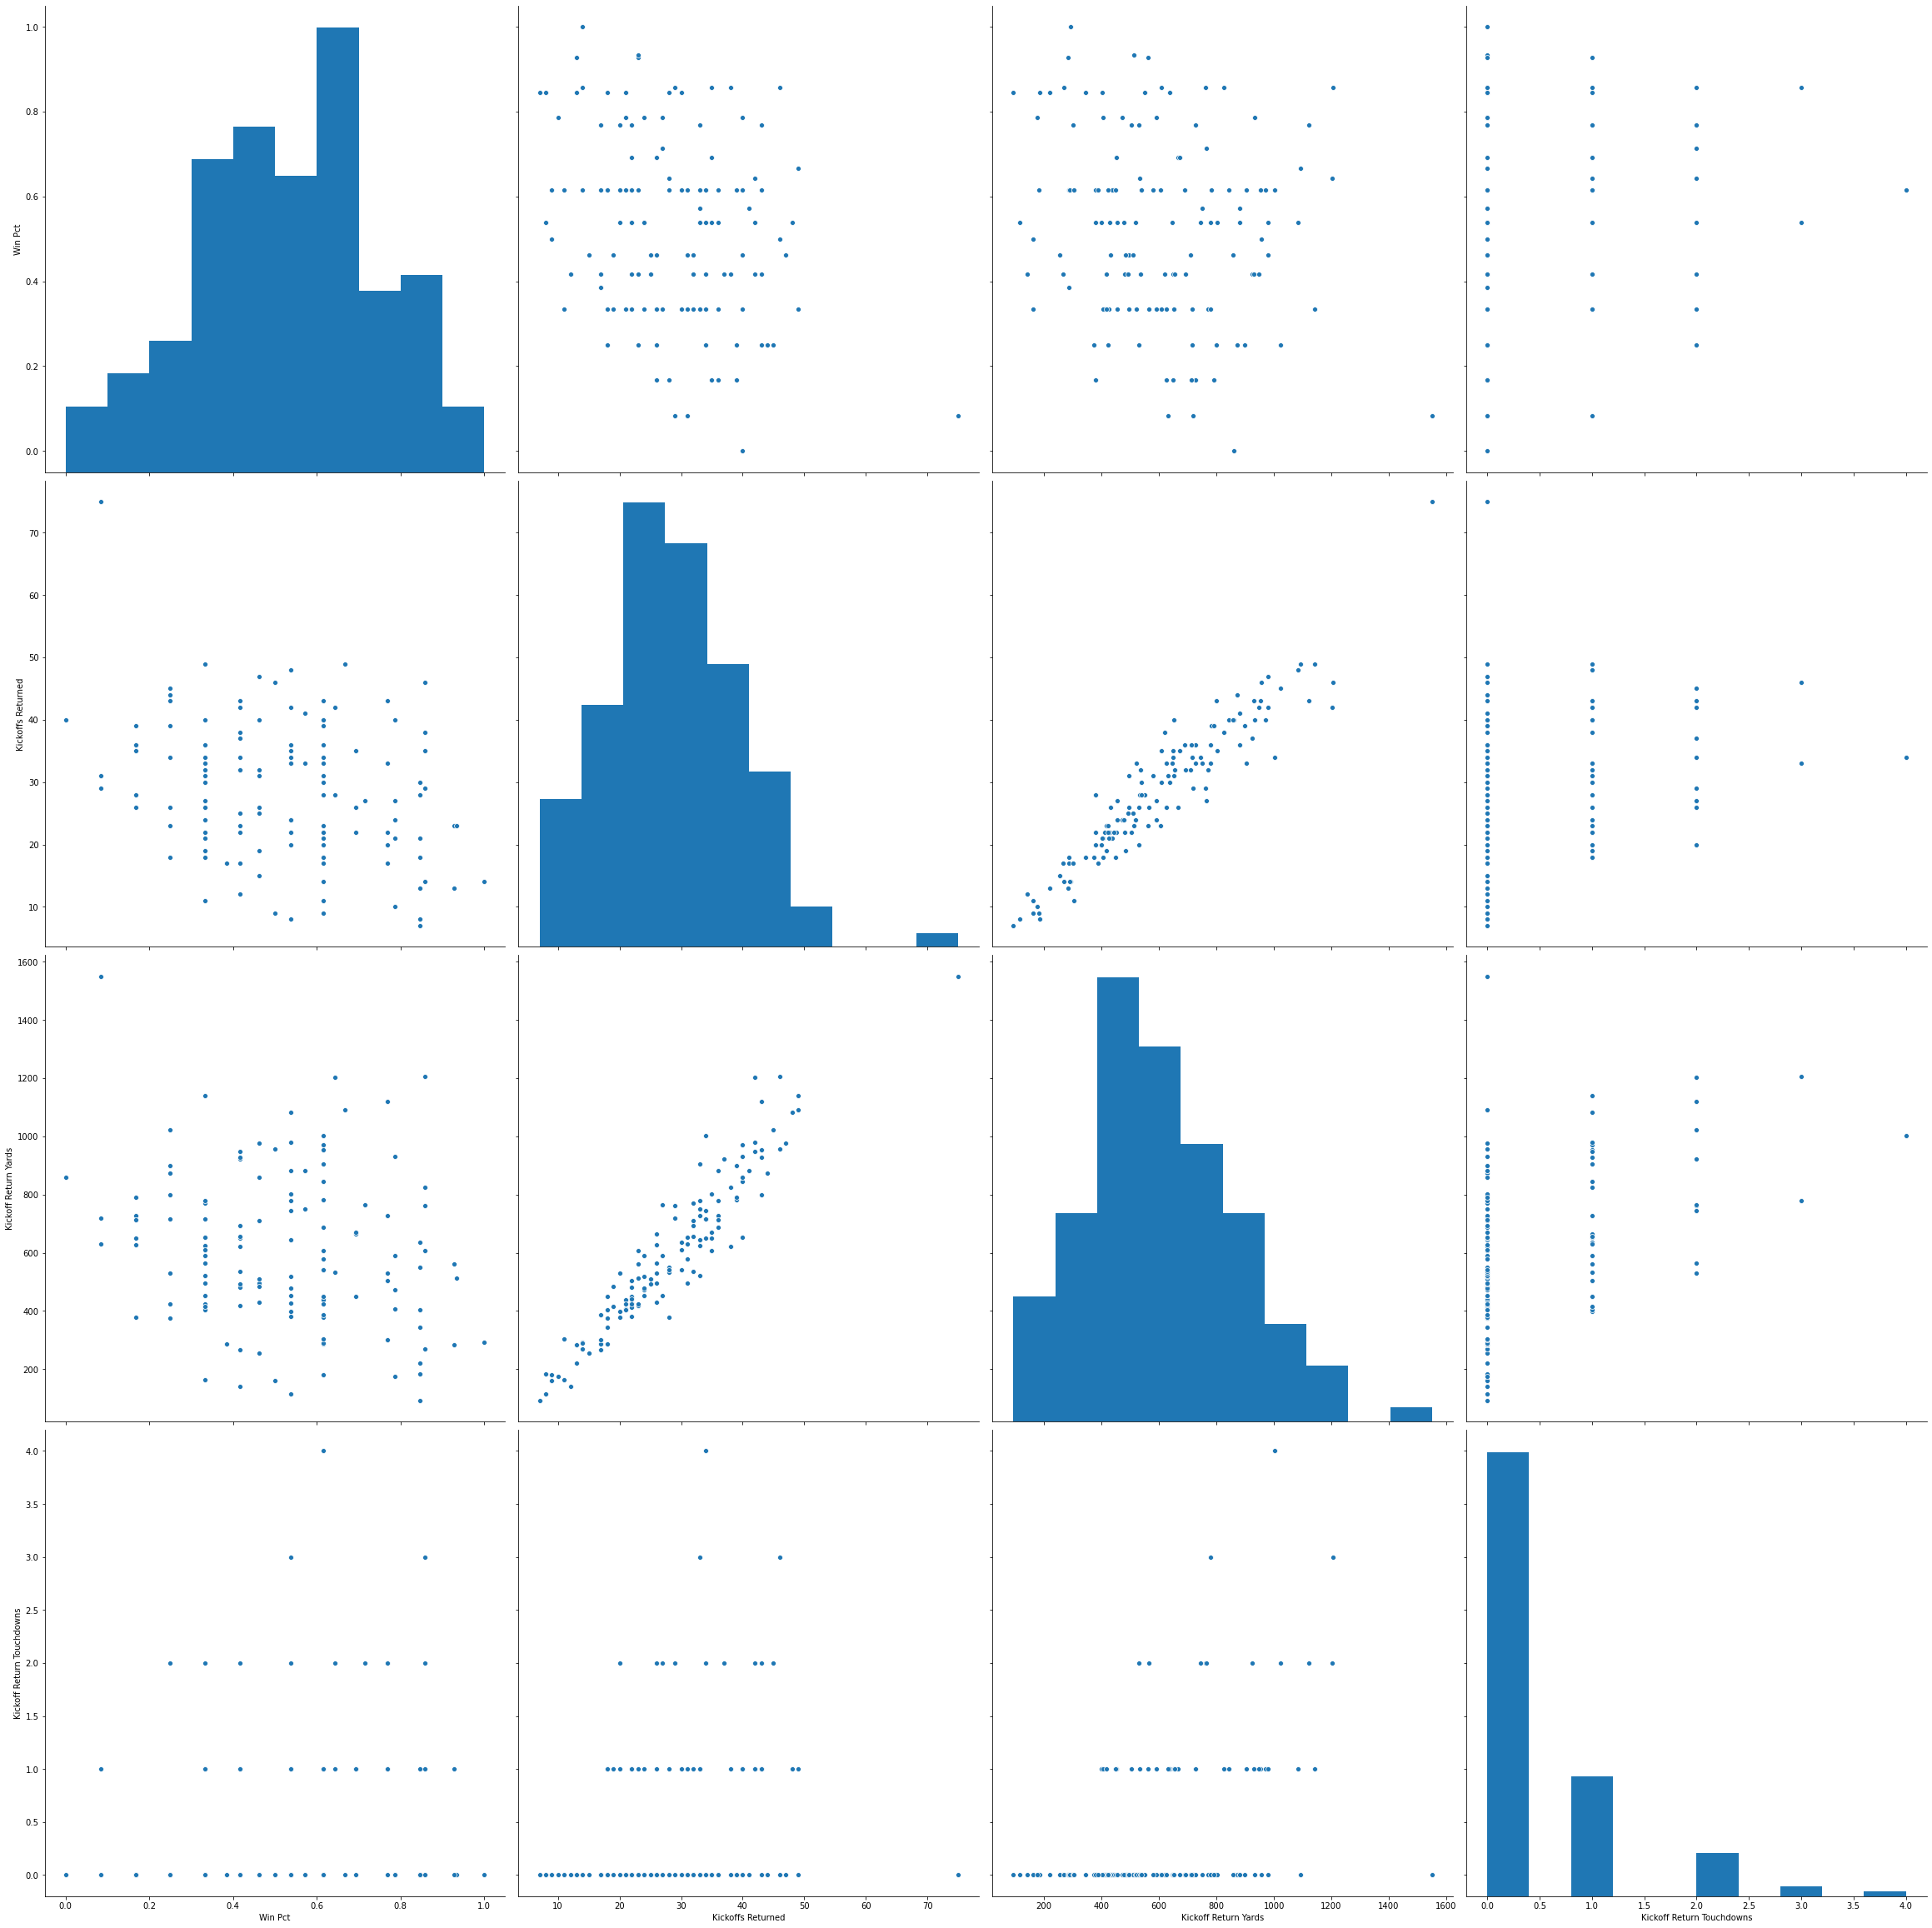

In [19]:
sns.pairplot(cfb[['Win Pct','Kickoffs Returned','Kickoff Return Yards','Kickoff Return Touchdowns']], height = 8)

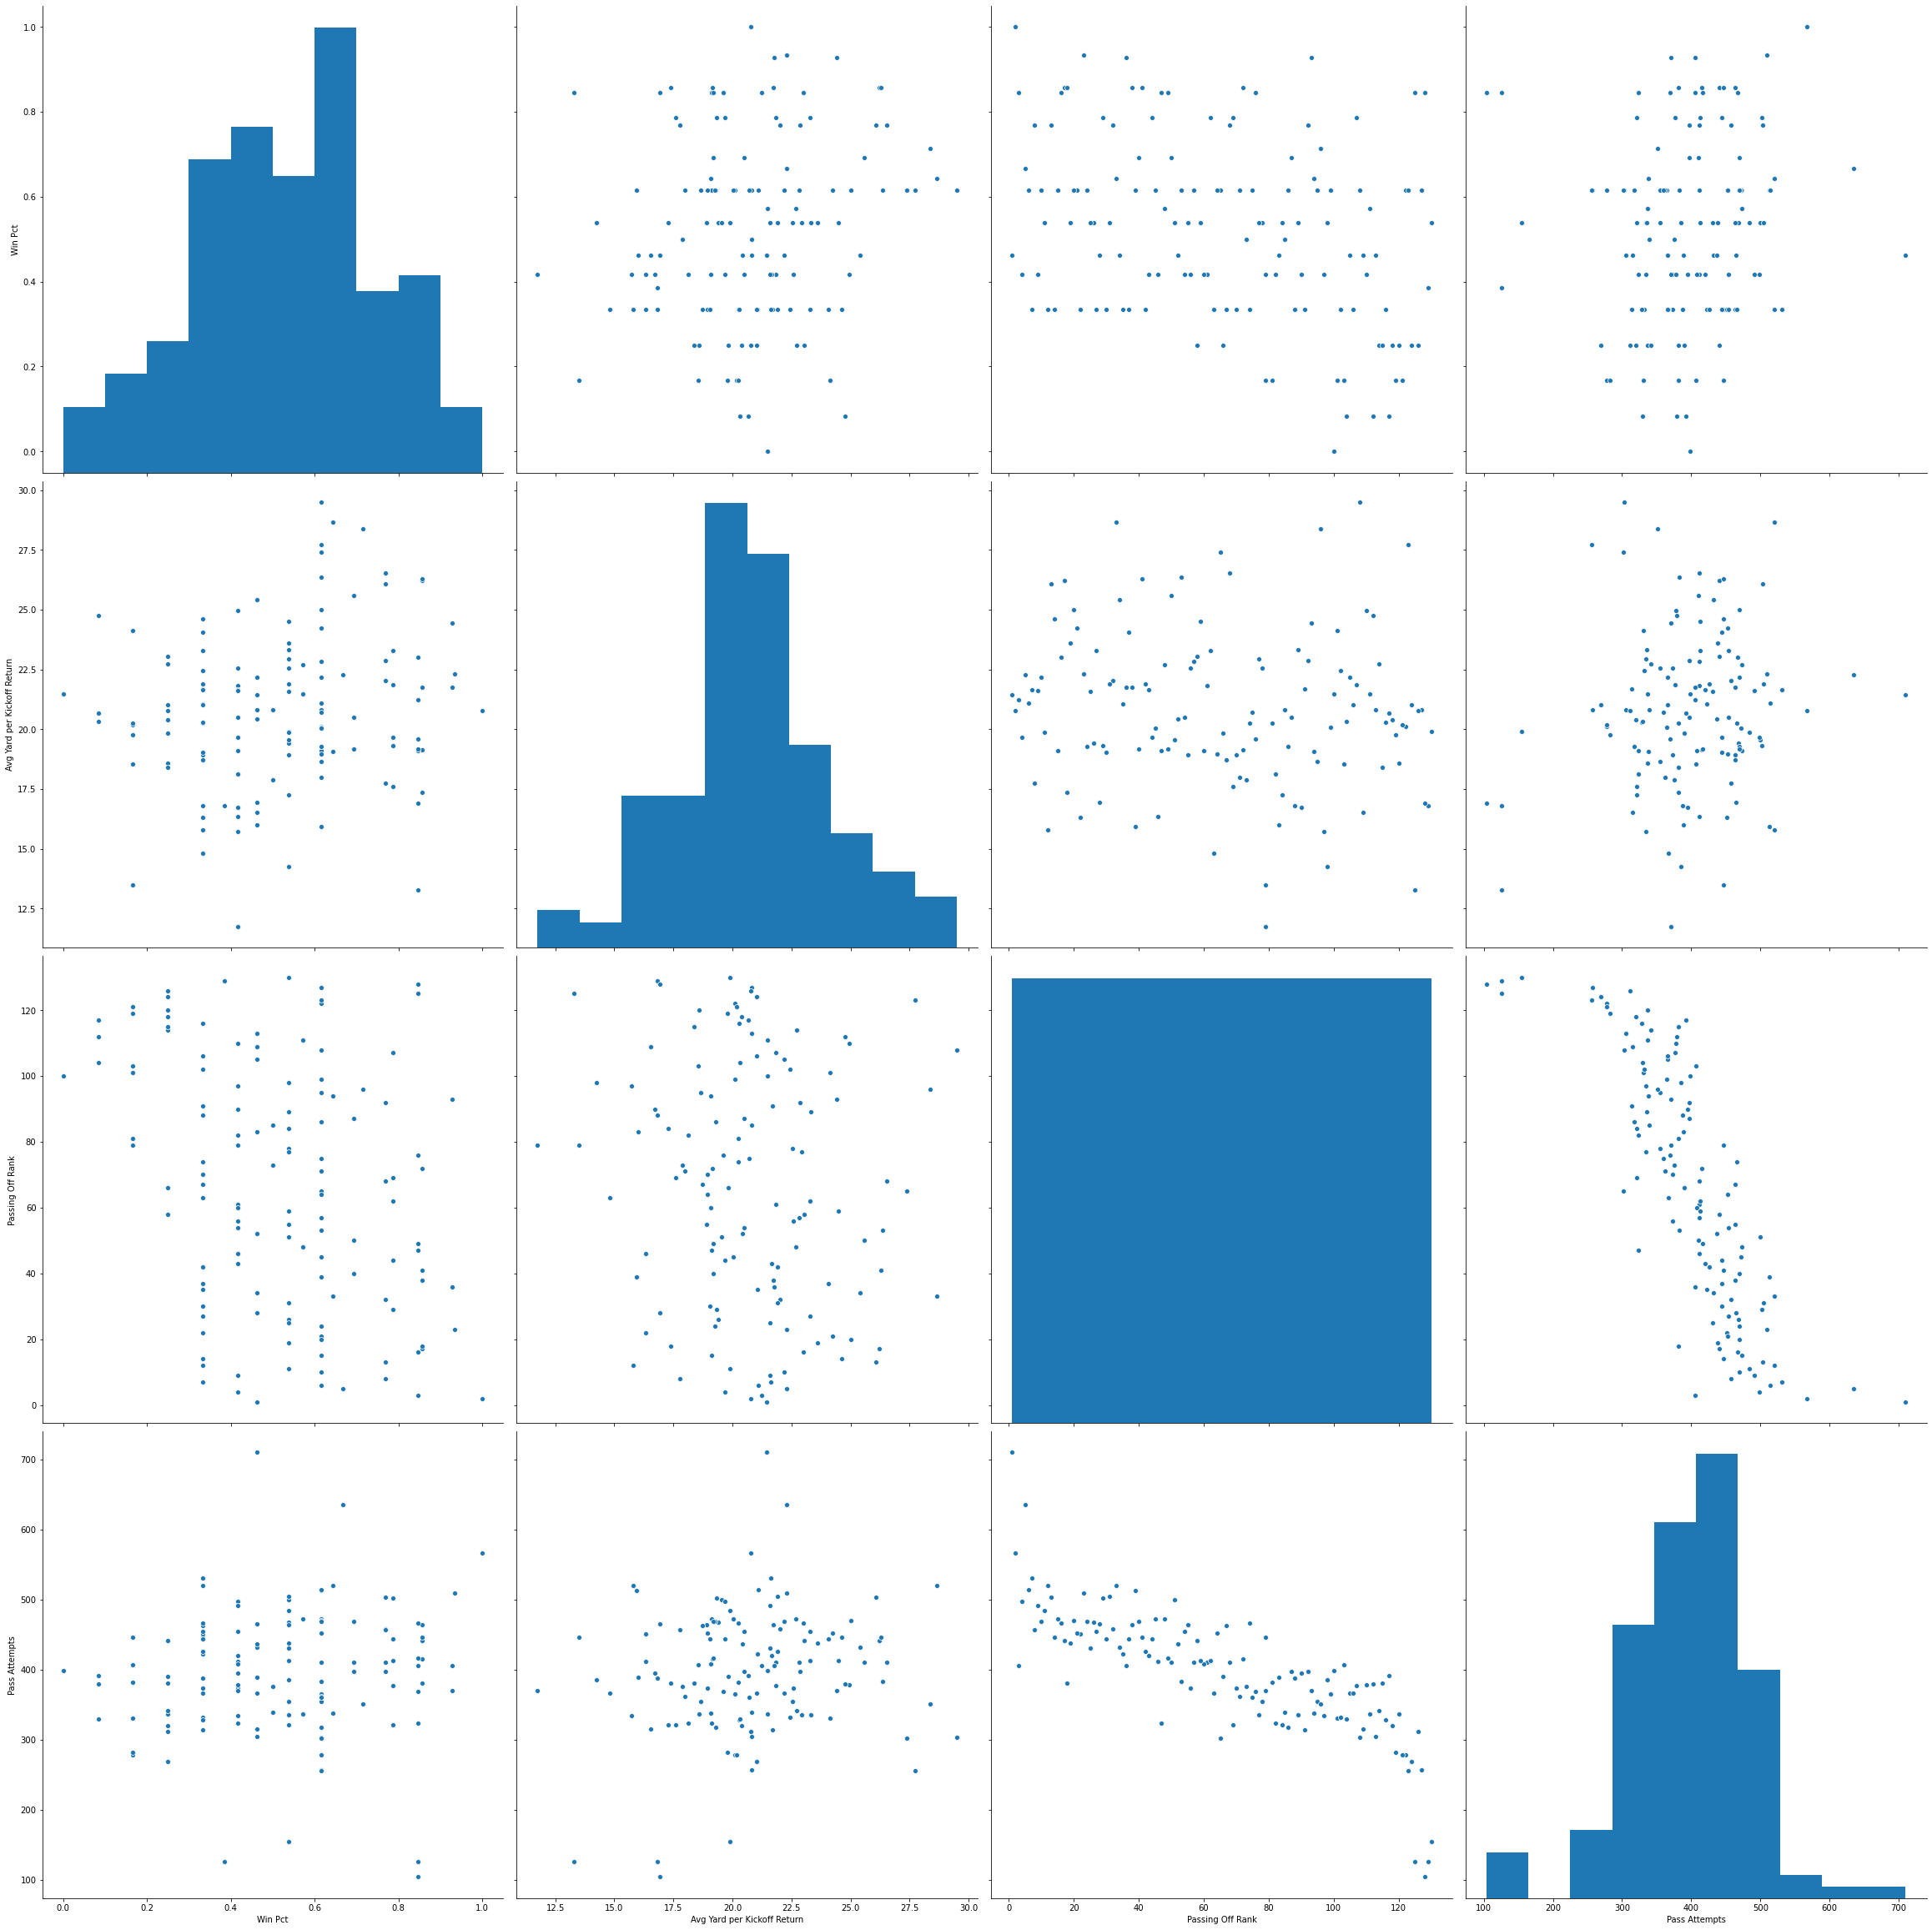

In [20]:
sns.pairplot(cfb[['Win Pct','Avg Yard per Kickoff Return','Passing Off Rank','Pass Attempts']], height = 8)

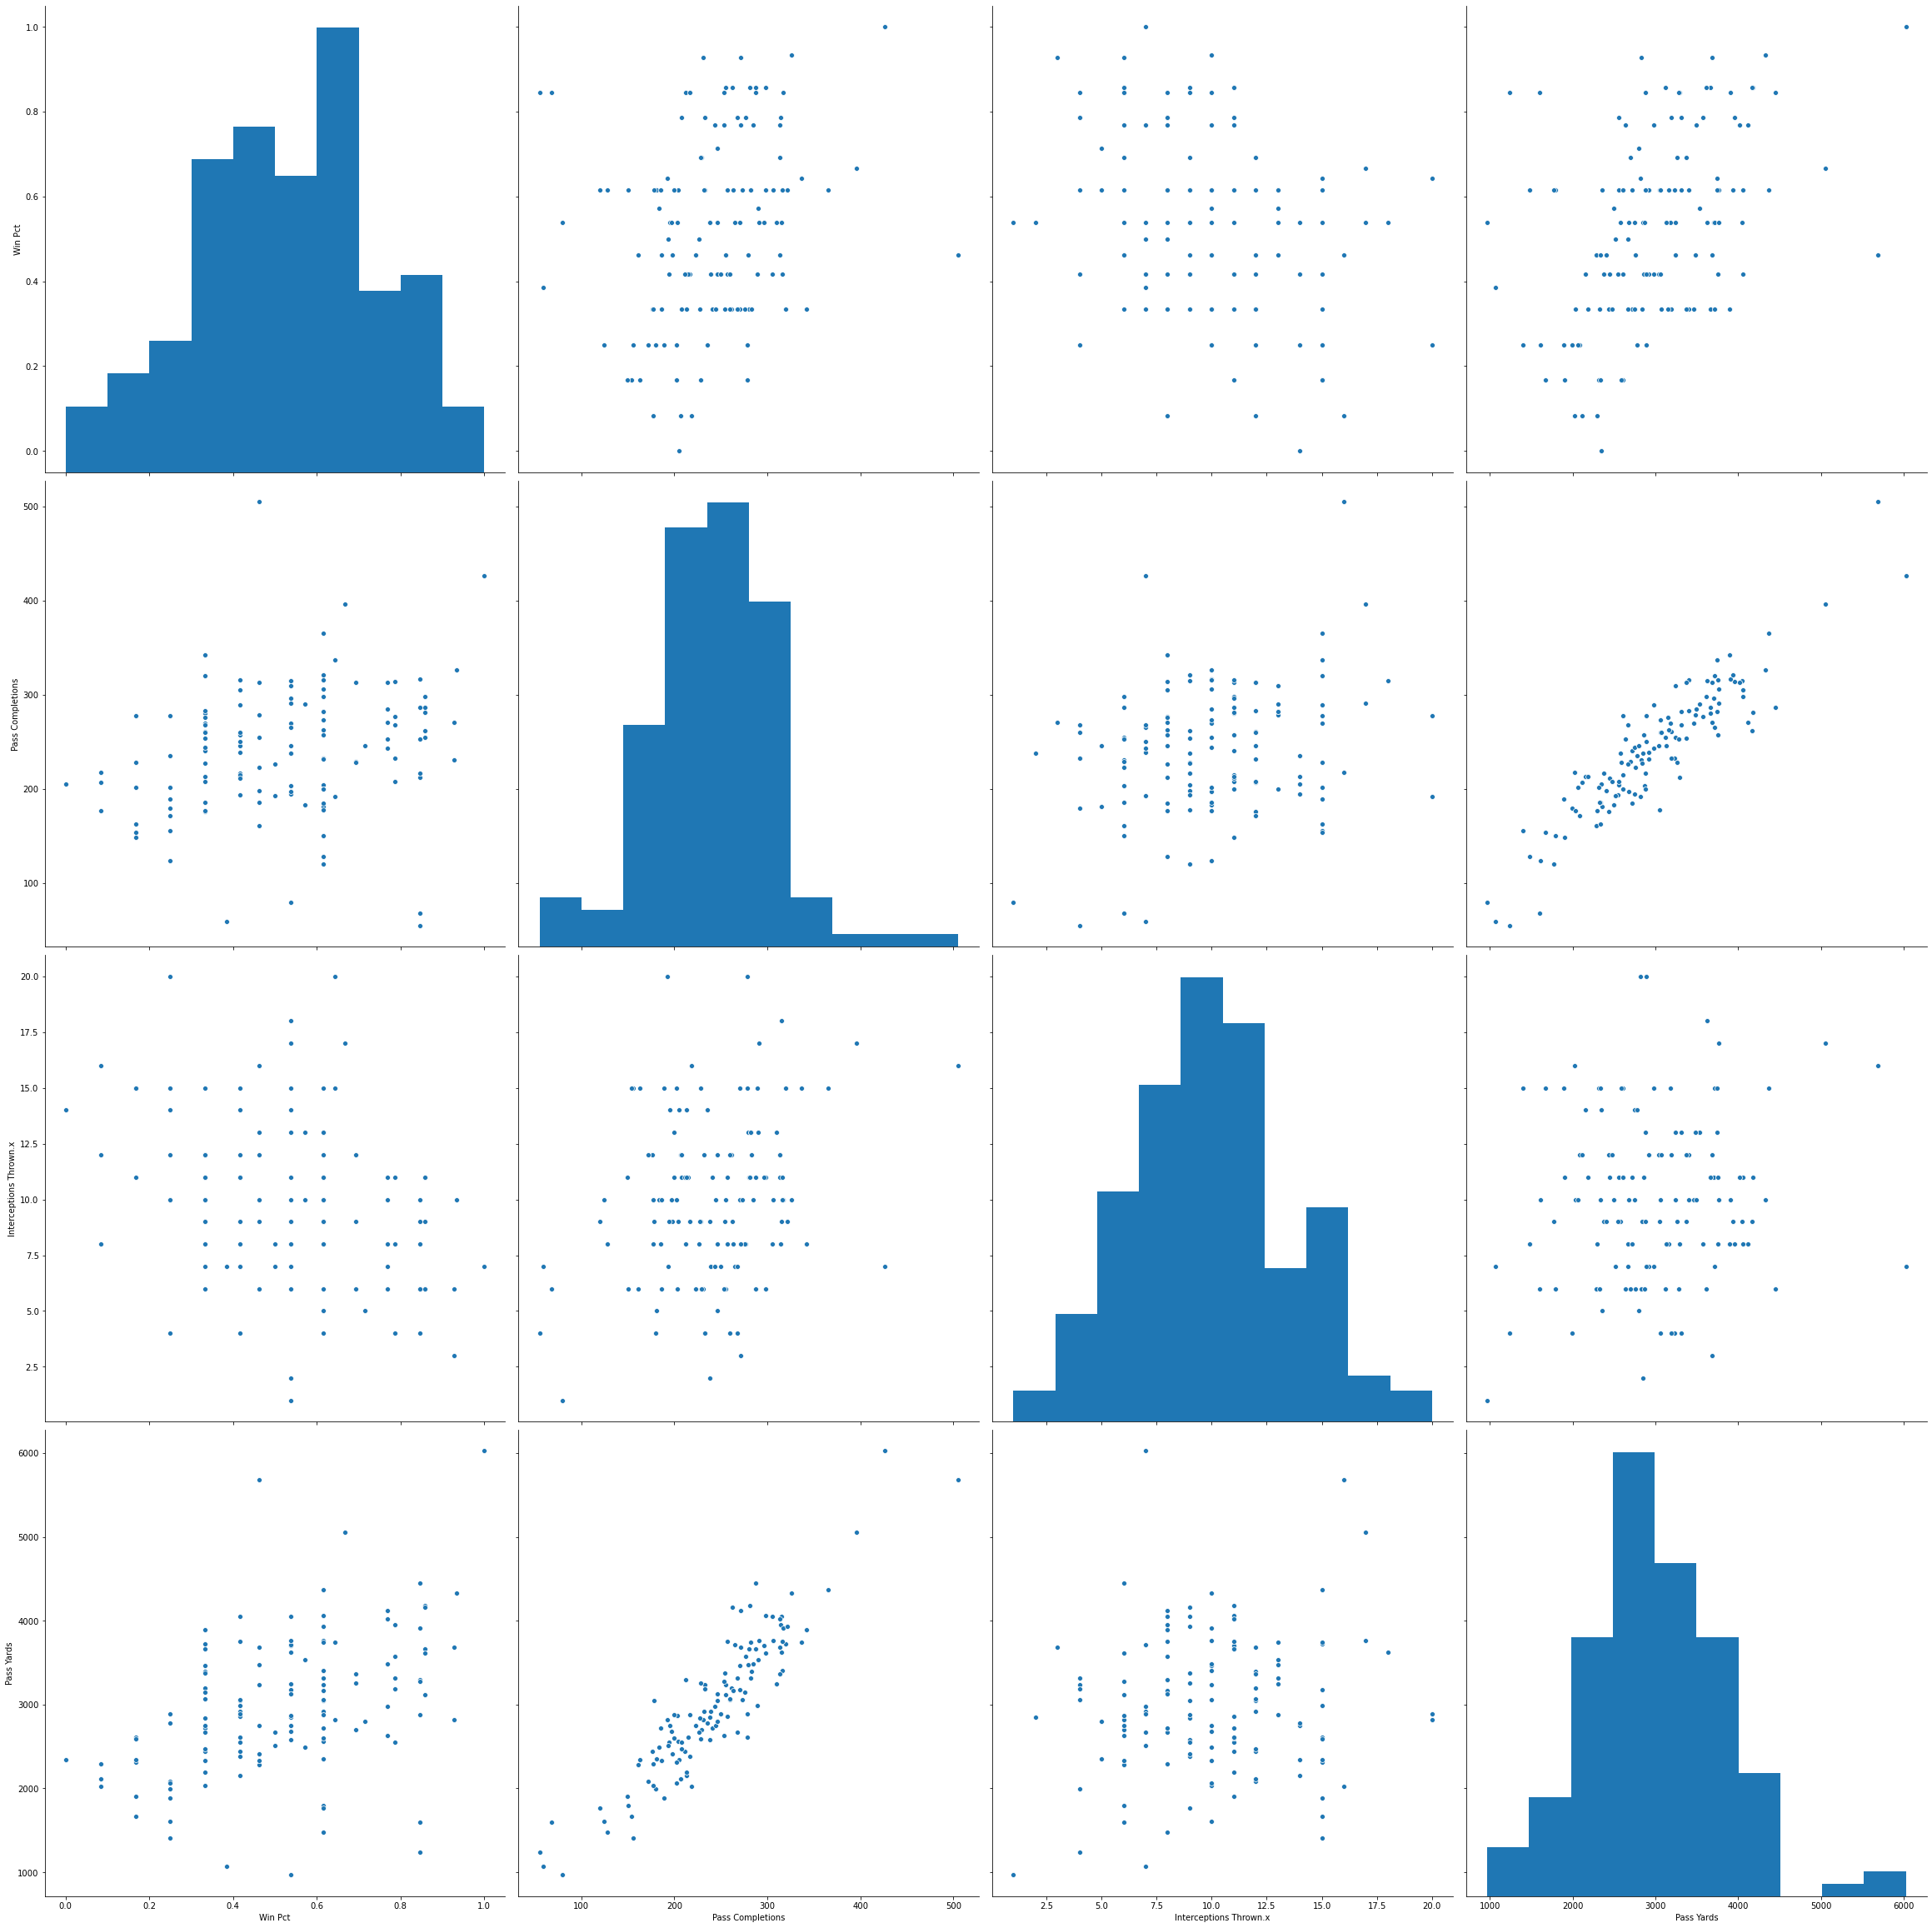

In [21]:
sns.pairplot(cfb[['Win Pct','Pass Completions','Interceptions Thrown.x','Pass Yards']], height = 8)

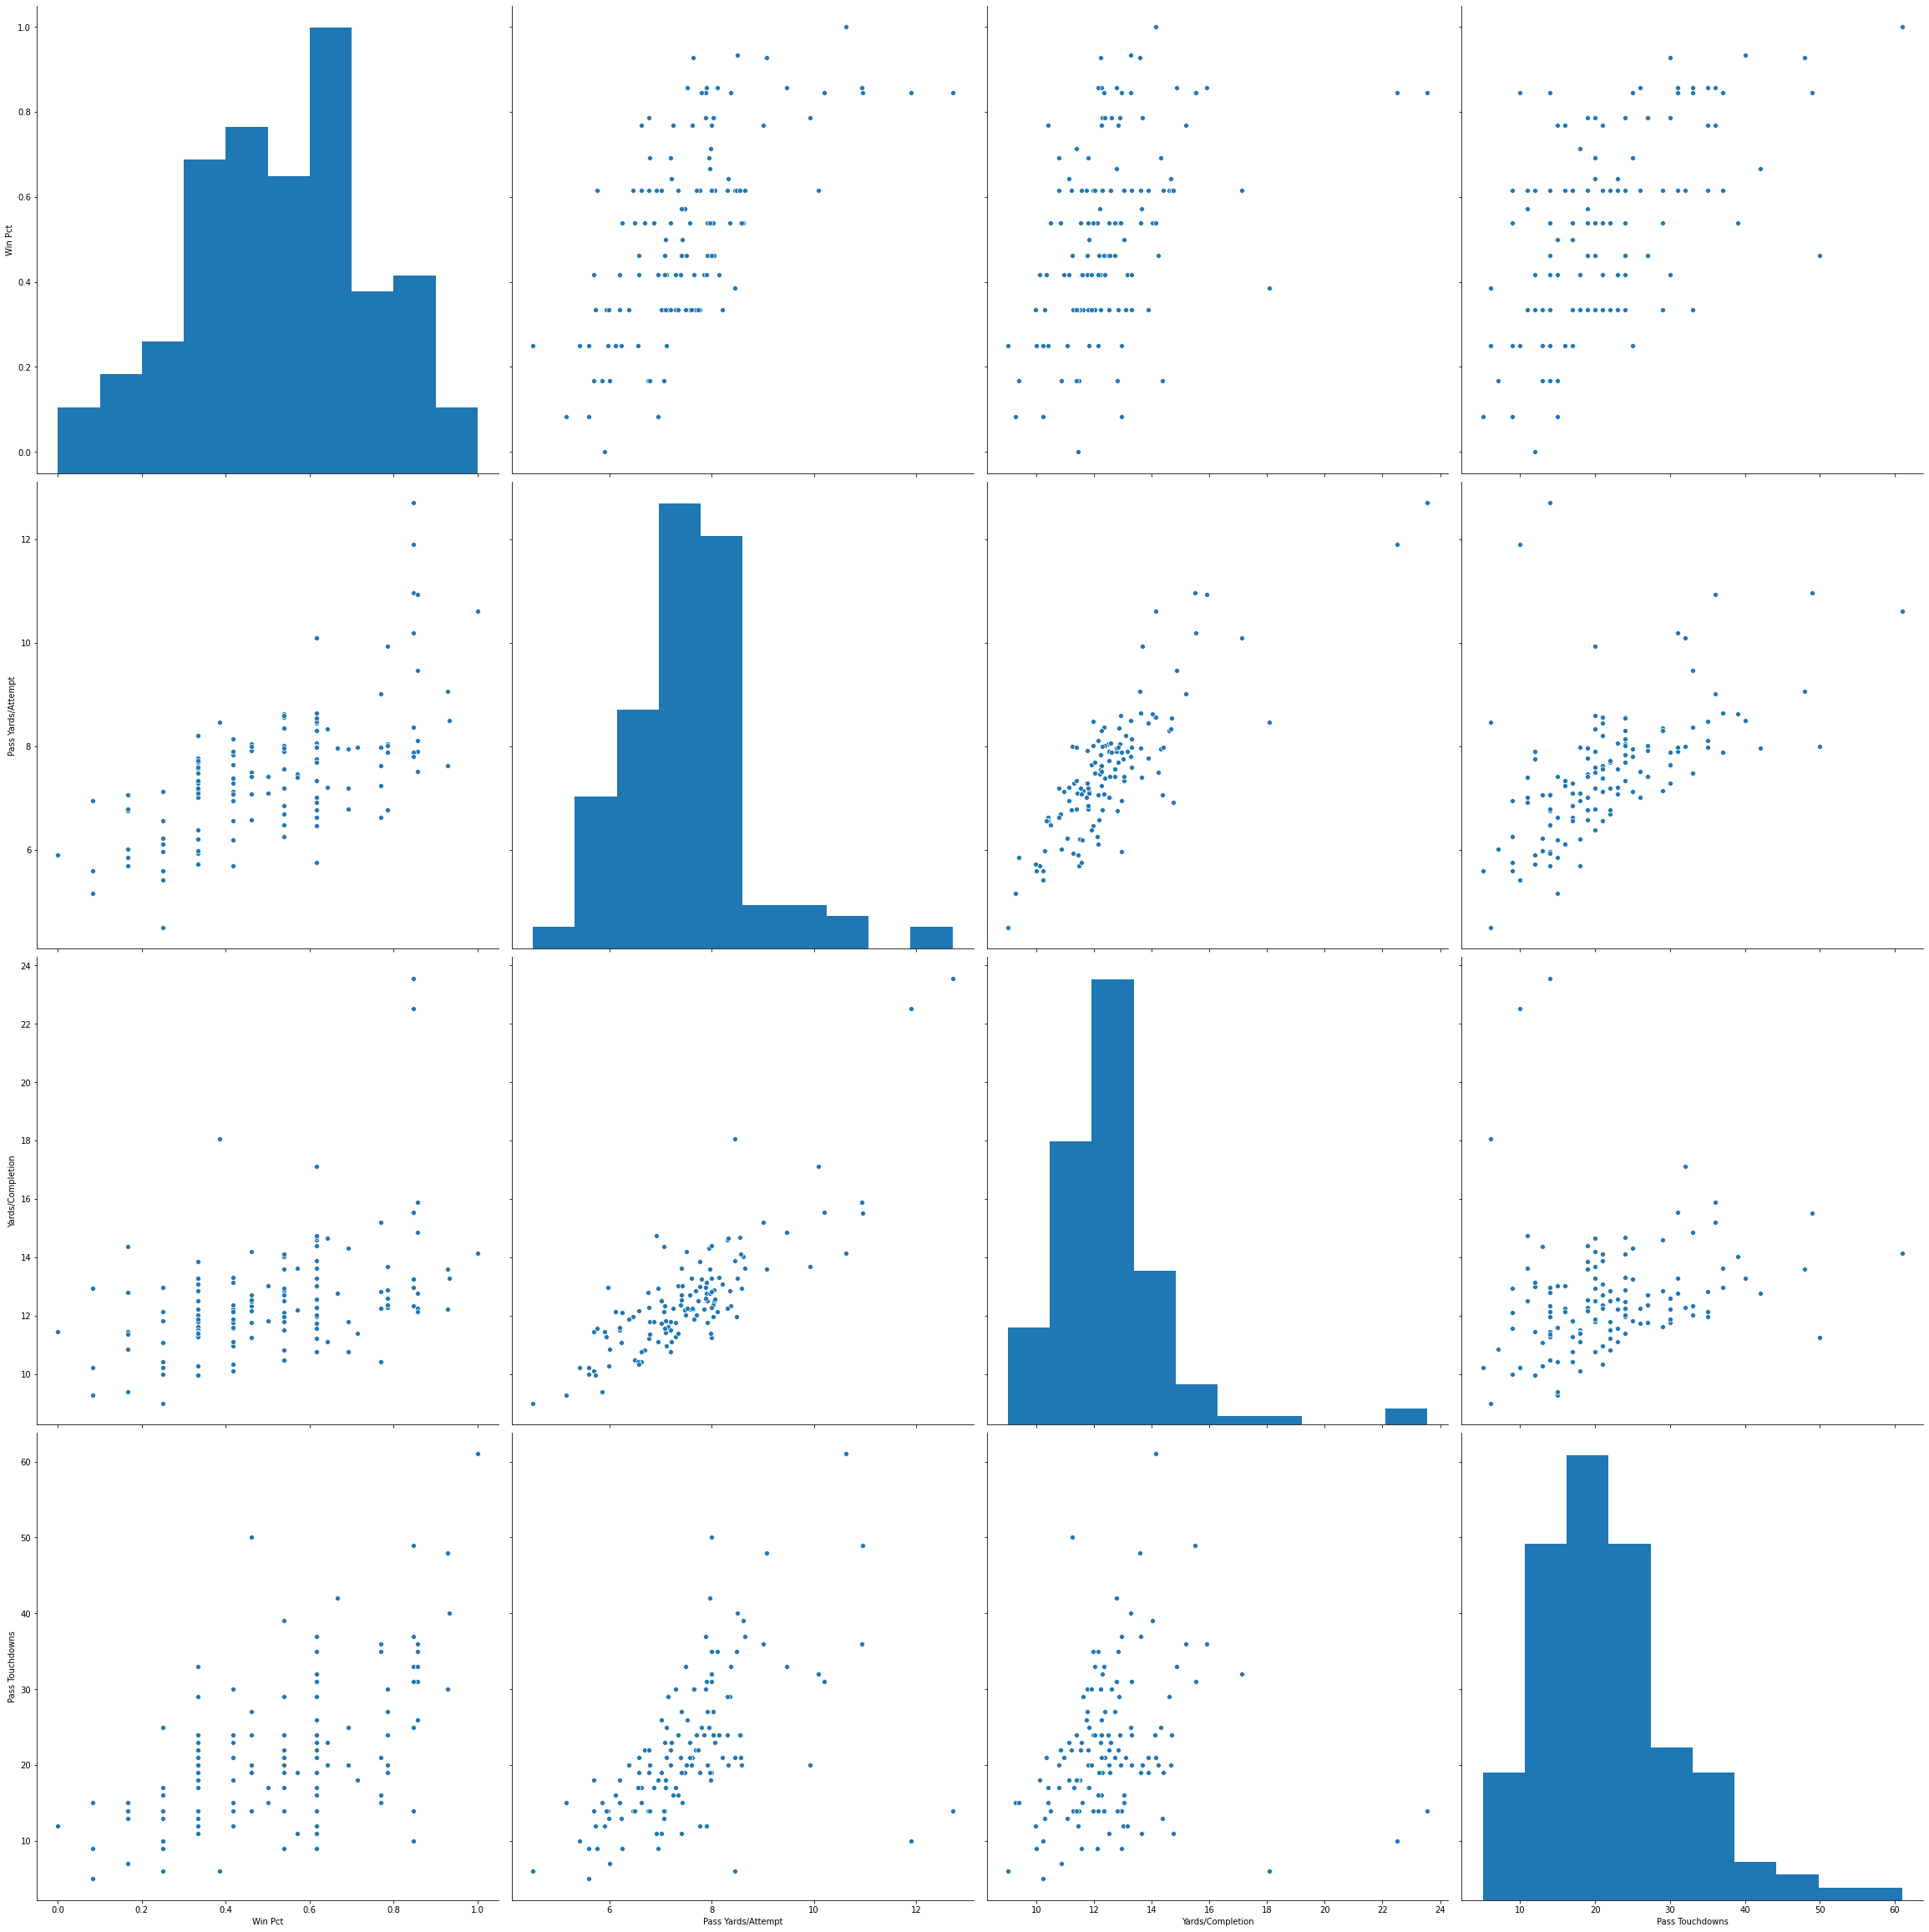

In [22]:
sns.pairplot(cfb[['Win Pct','Pass Yards/Attempt','Yards/Completion','Pass Touchdowns']], height = 8)

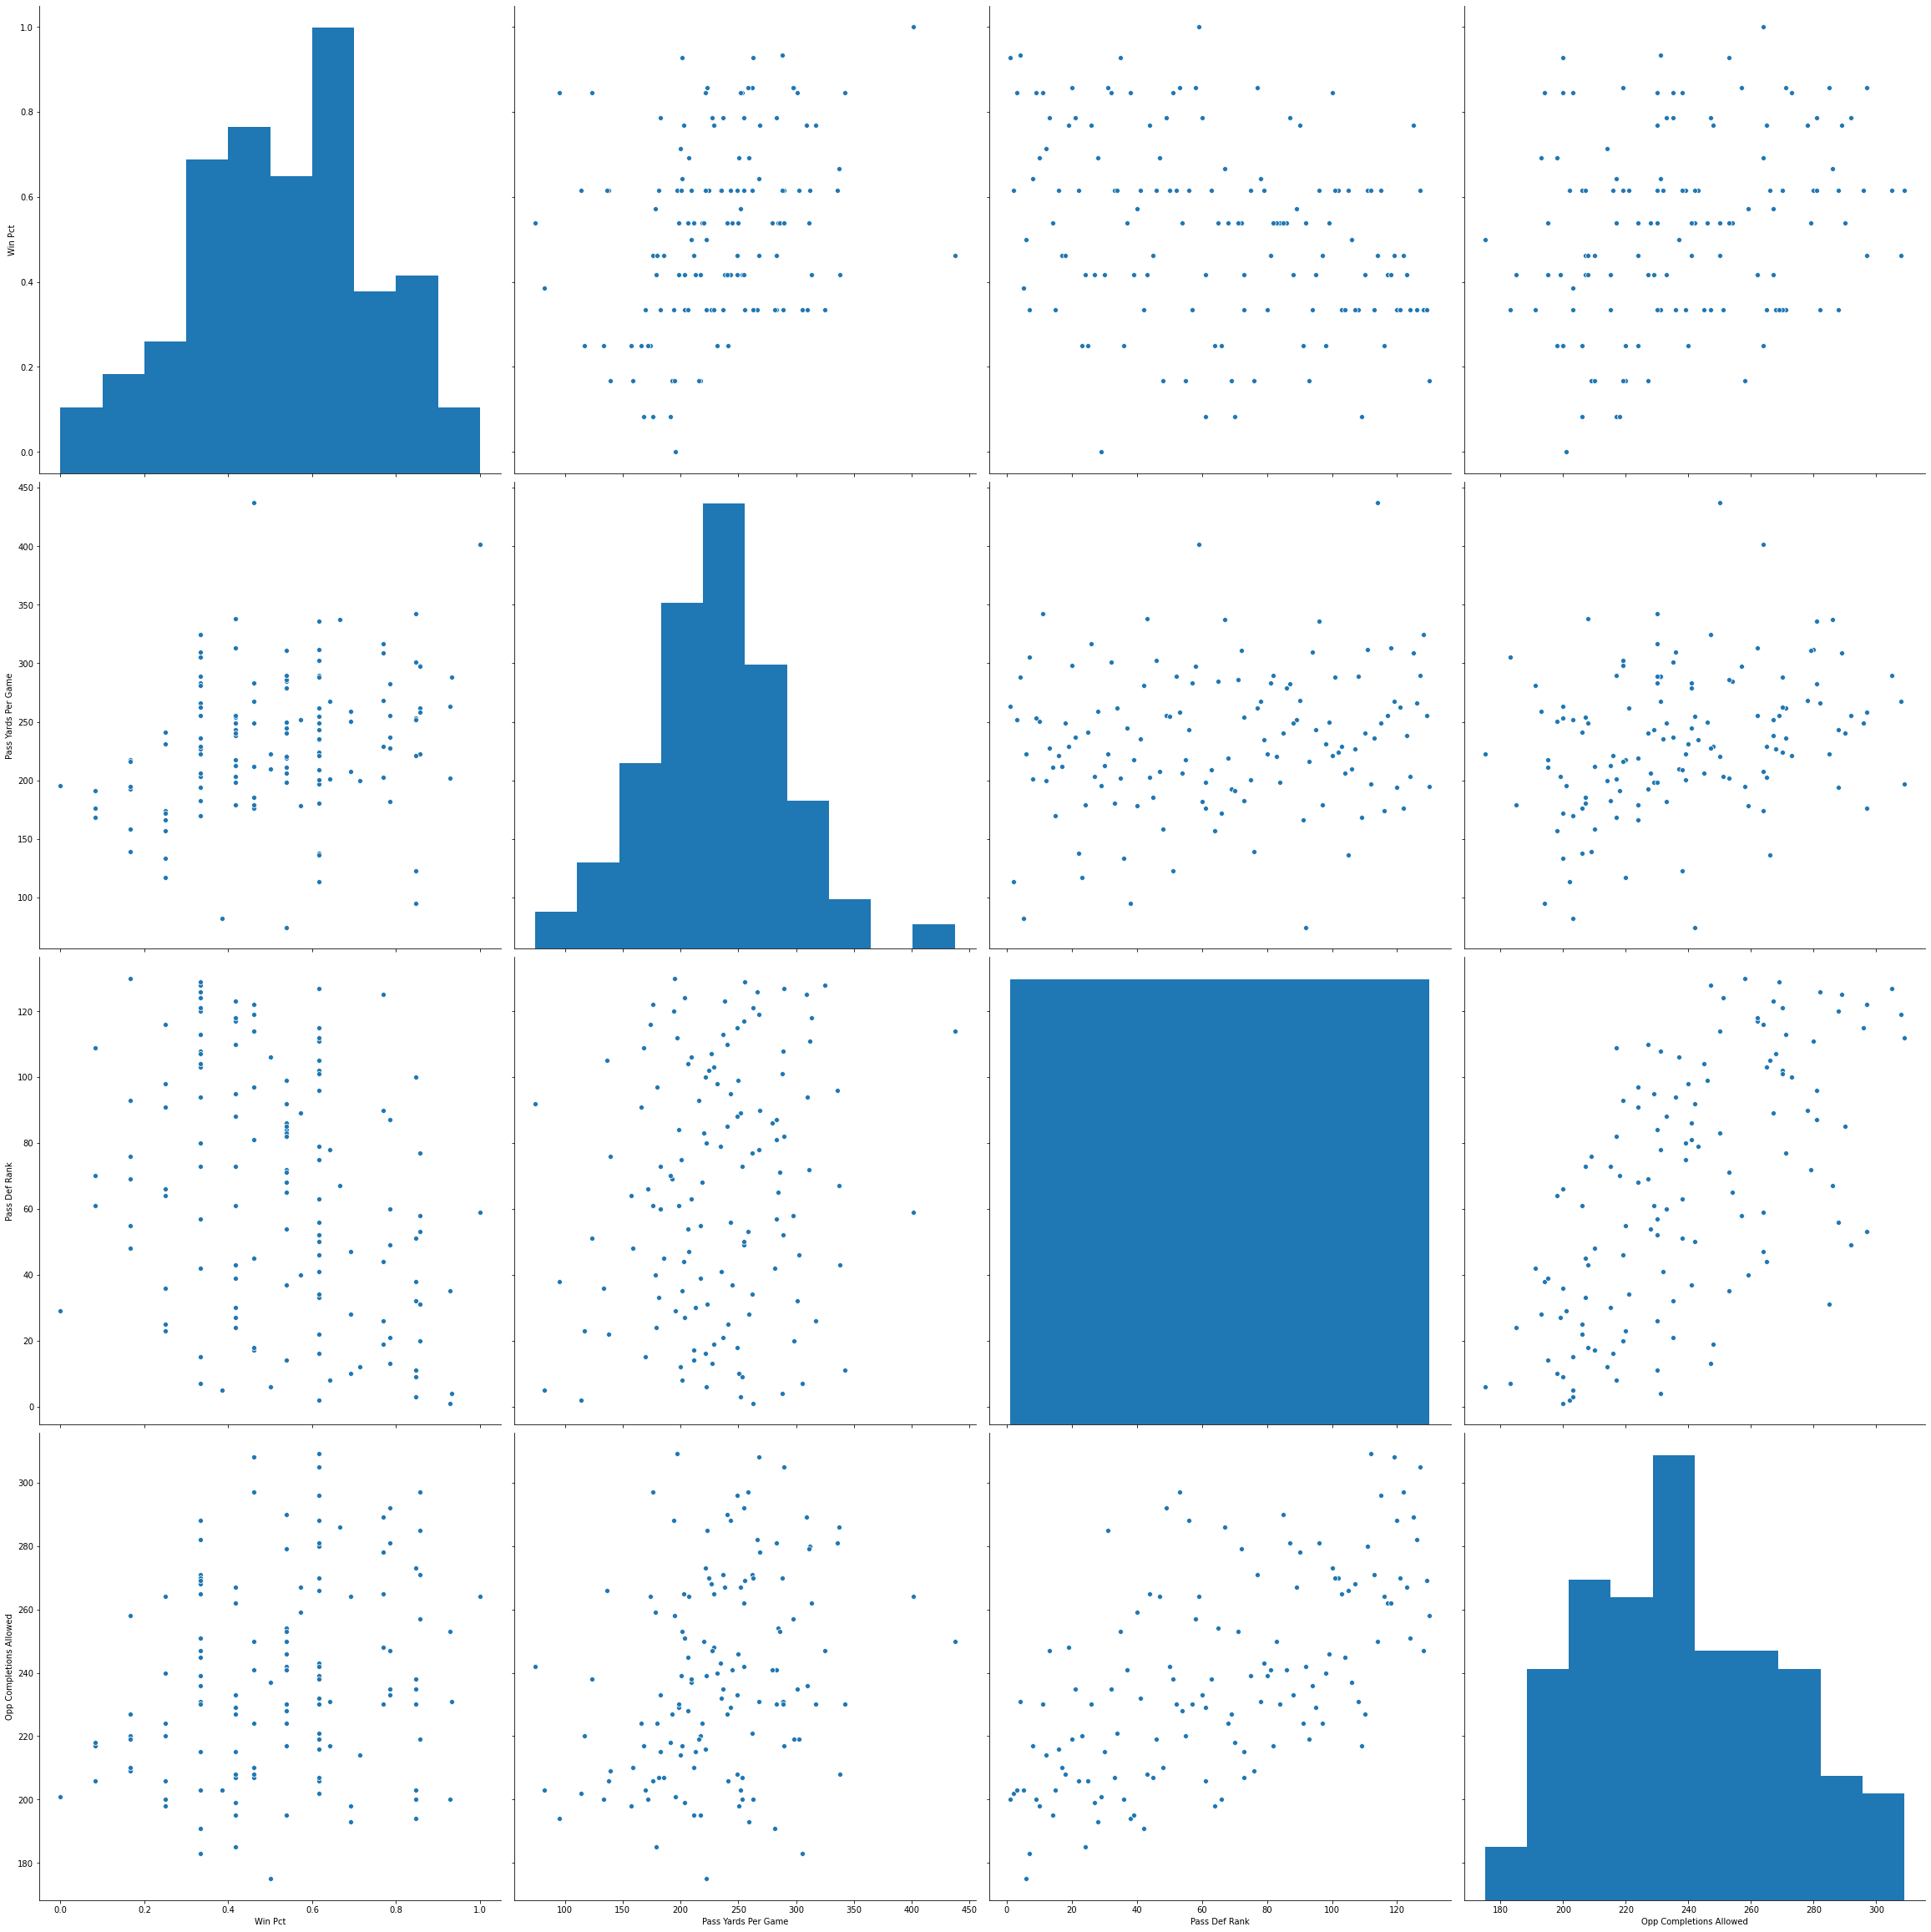

In [23]:
sns.pairplot(cfb[['Win Pct','Pass Yards Per Game','Pass Def Rank','Opp Completions Allowed']], height = 8)

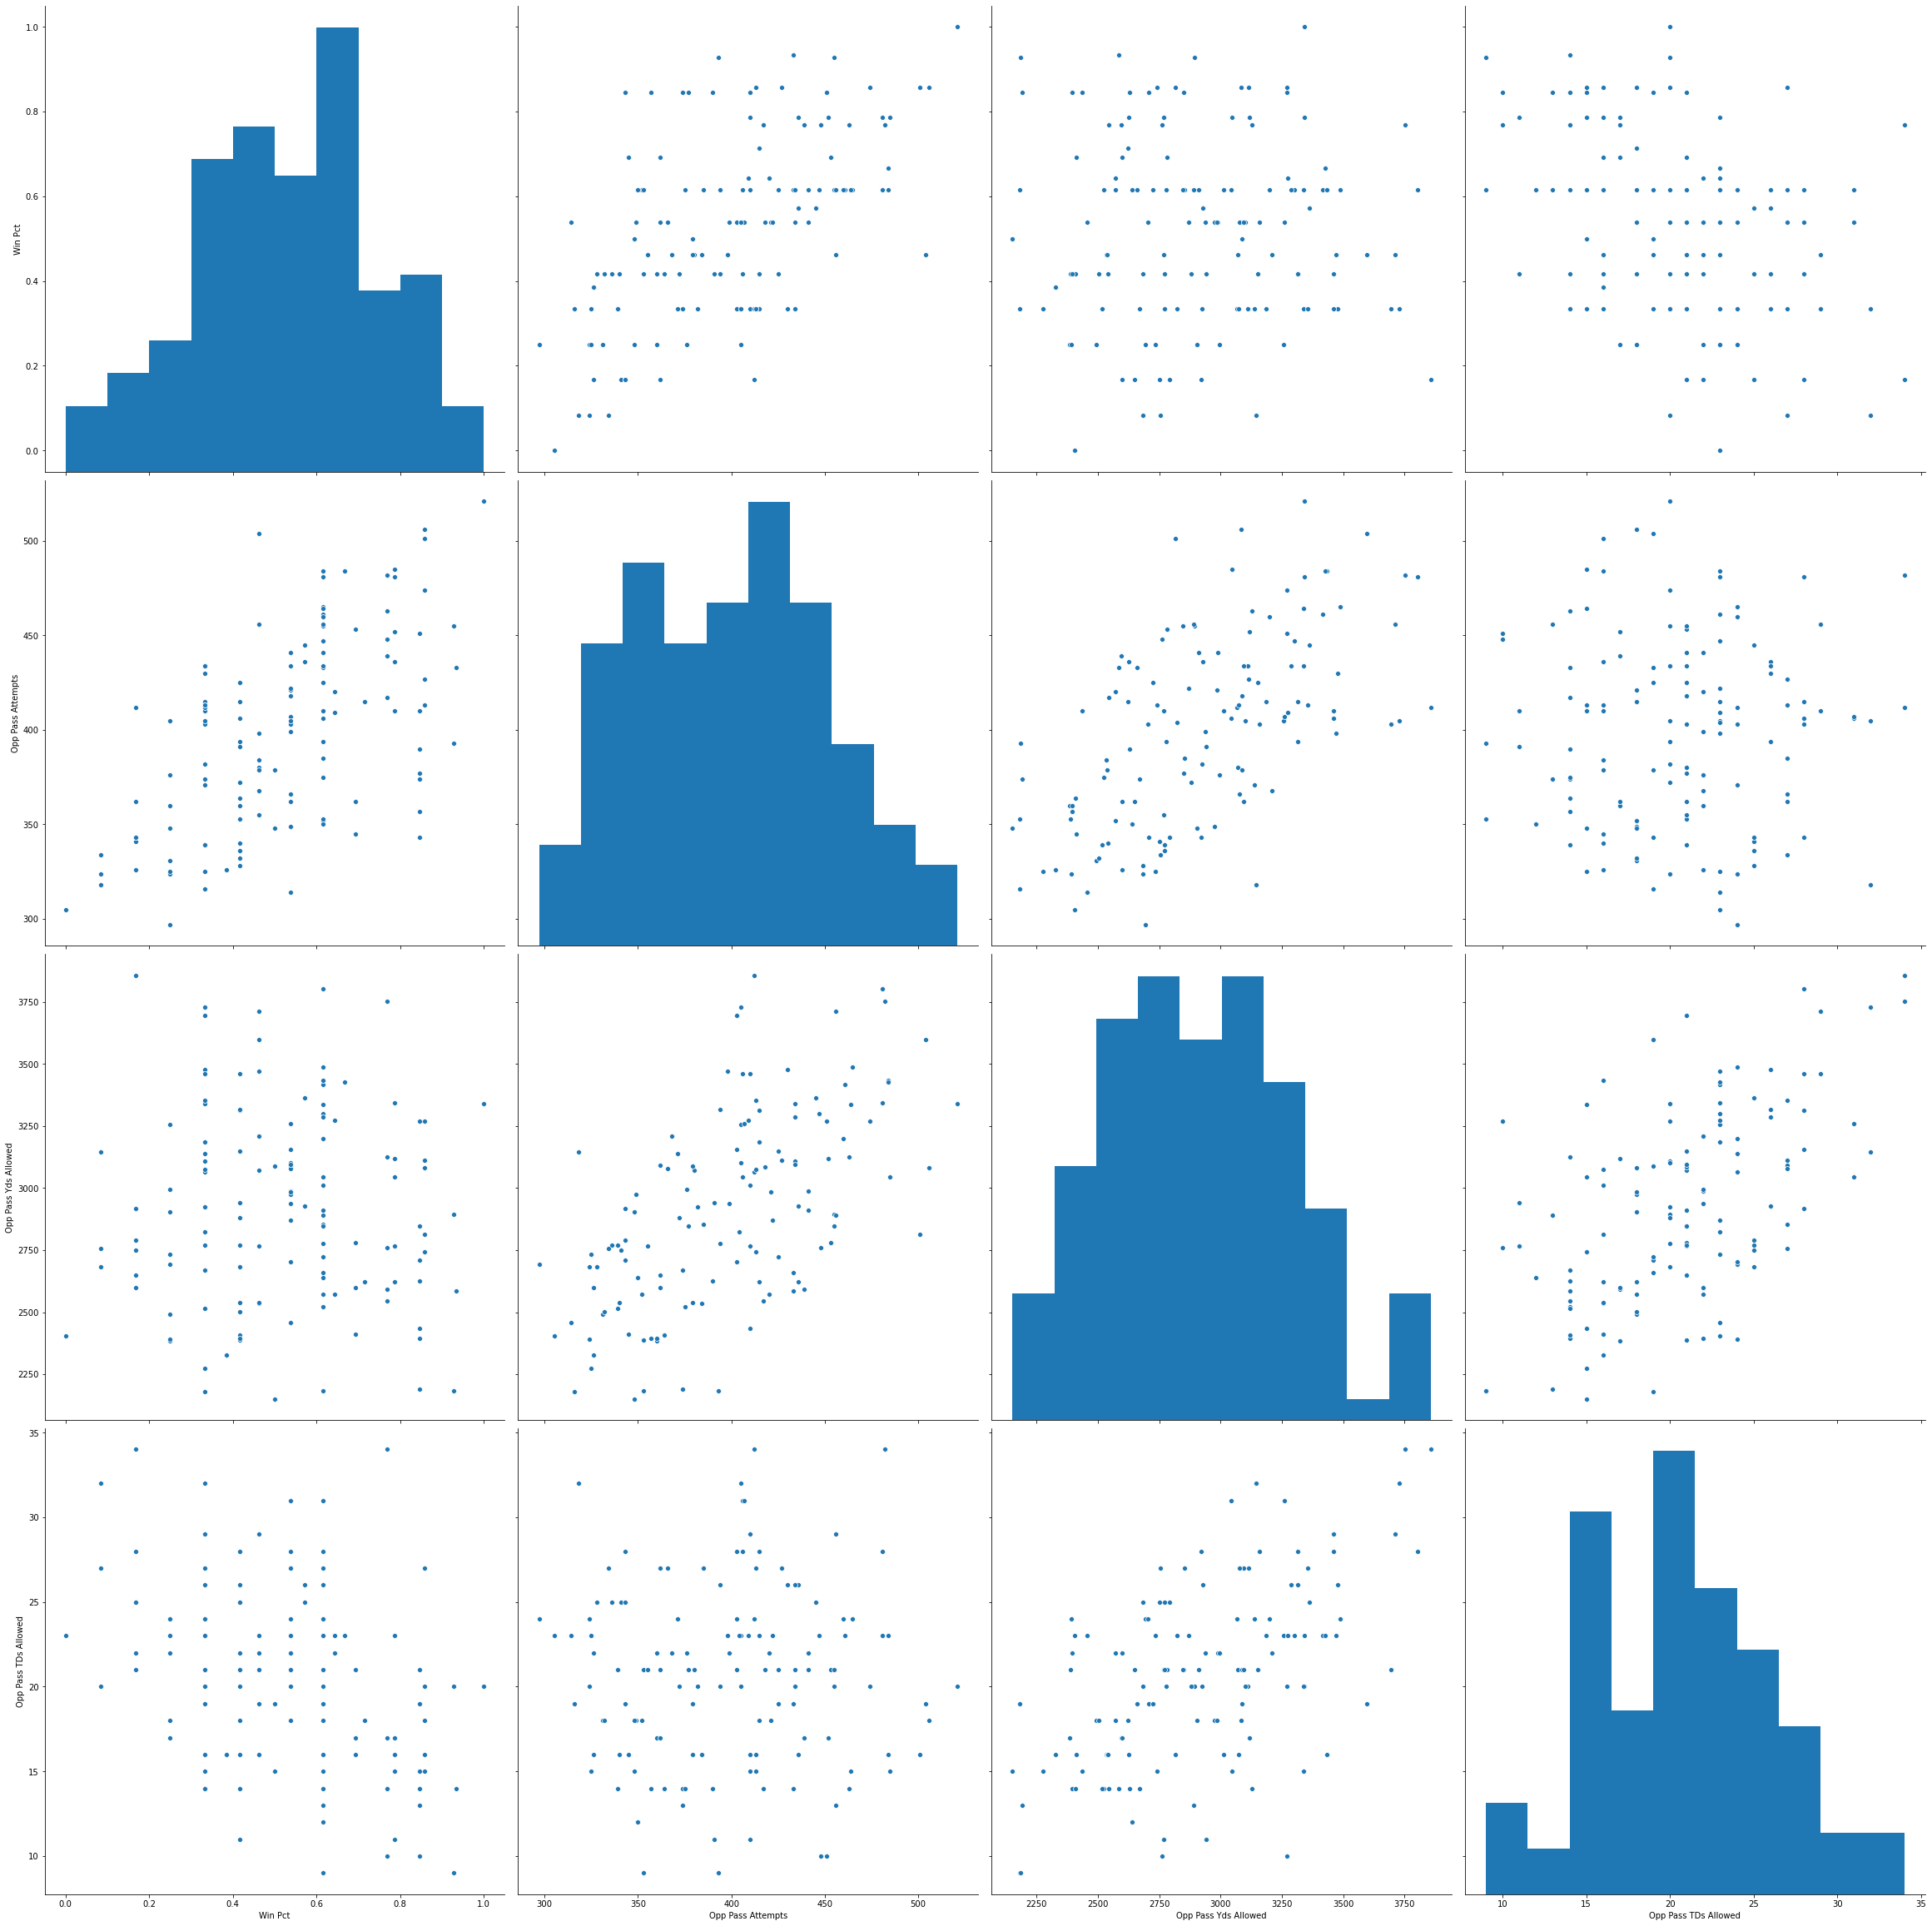

In [24]:
sns.pairplot(cfb[['Win Pct','Opp Pass Attempts','Opp Pass Yds Allowed','Opp Pass TDs Allowed']], height = 8)

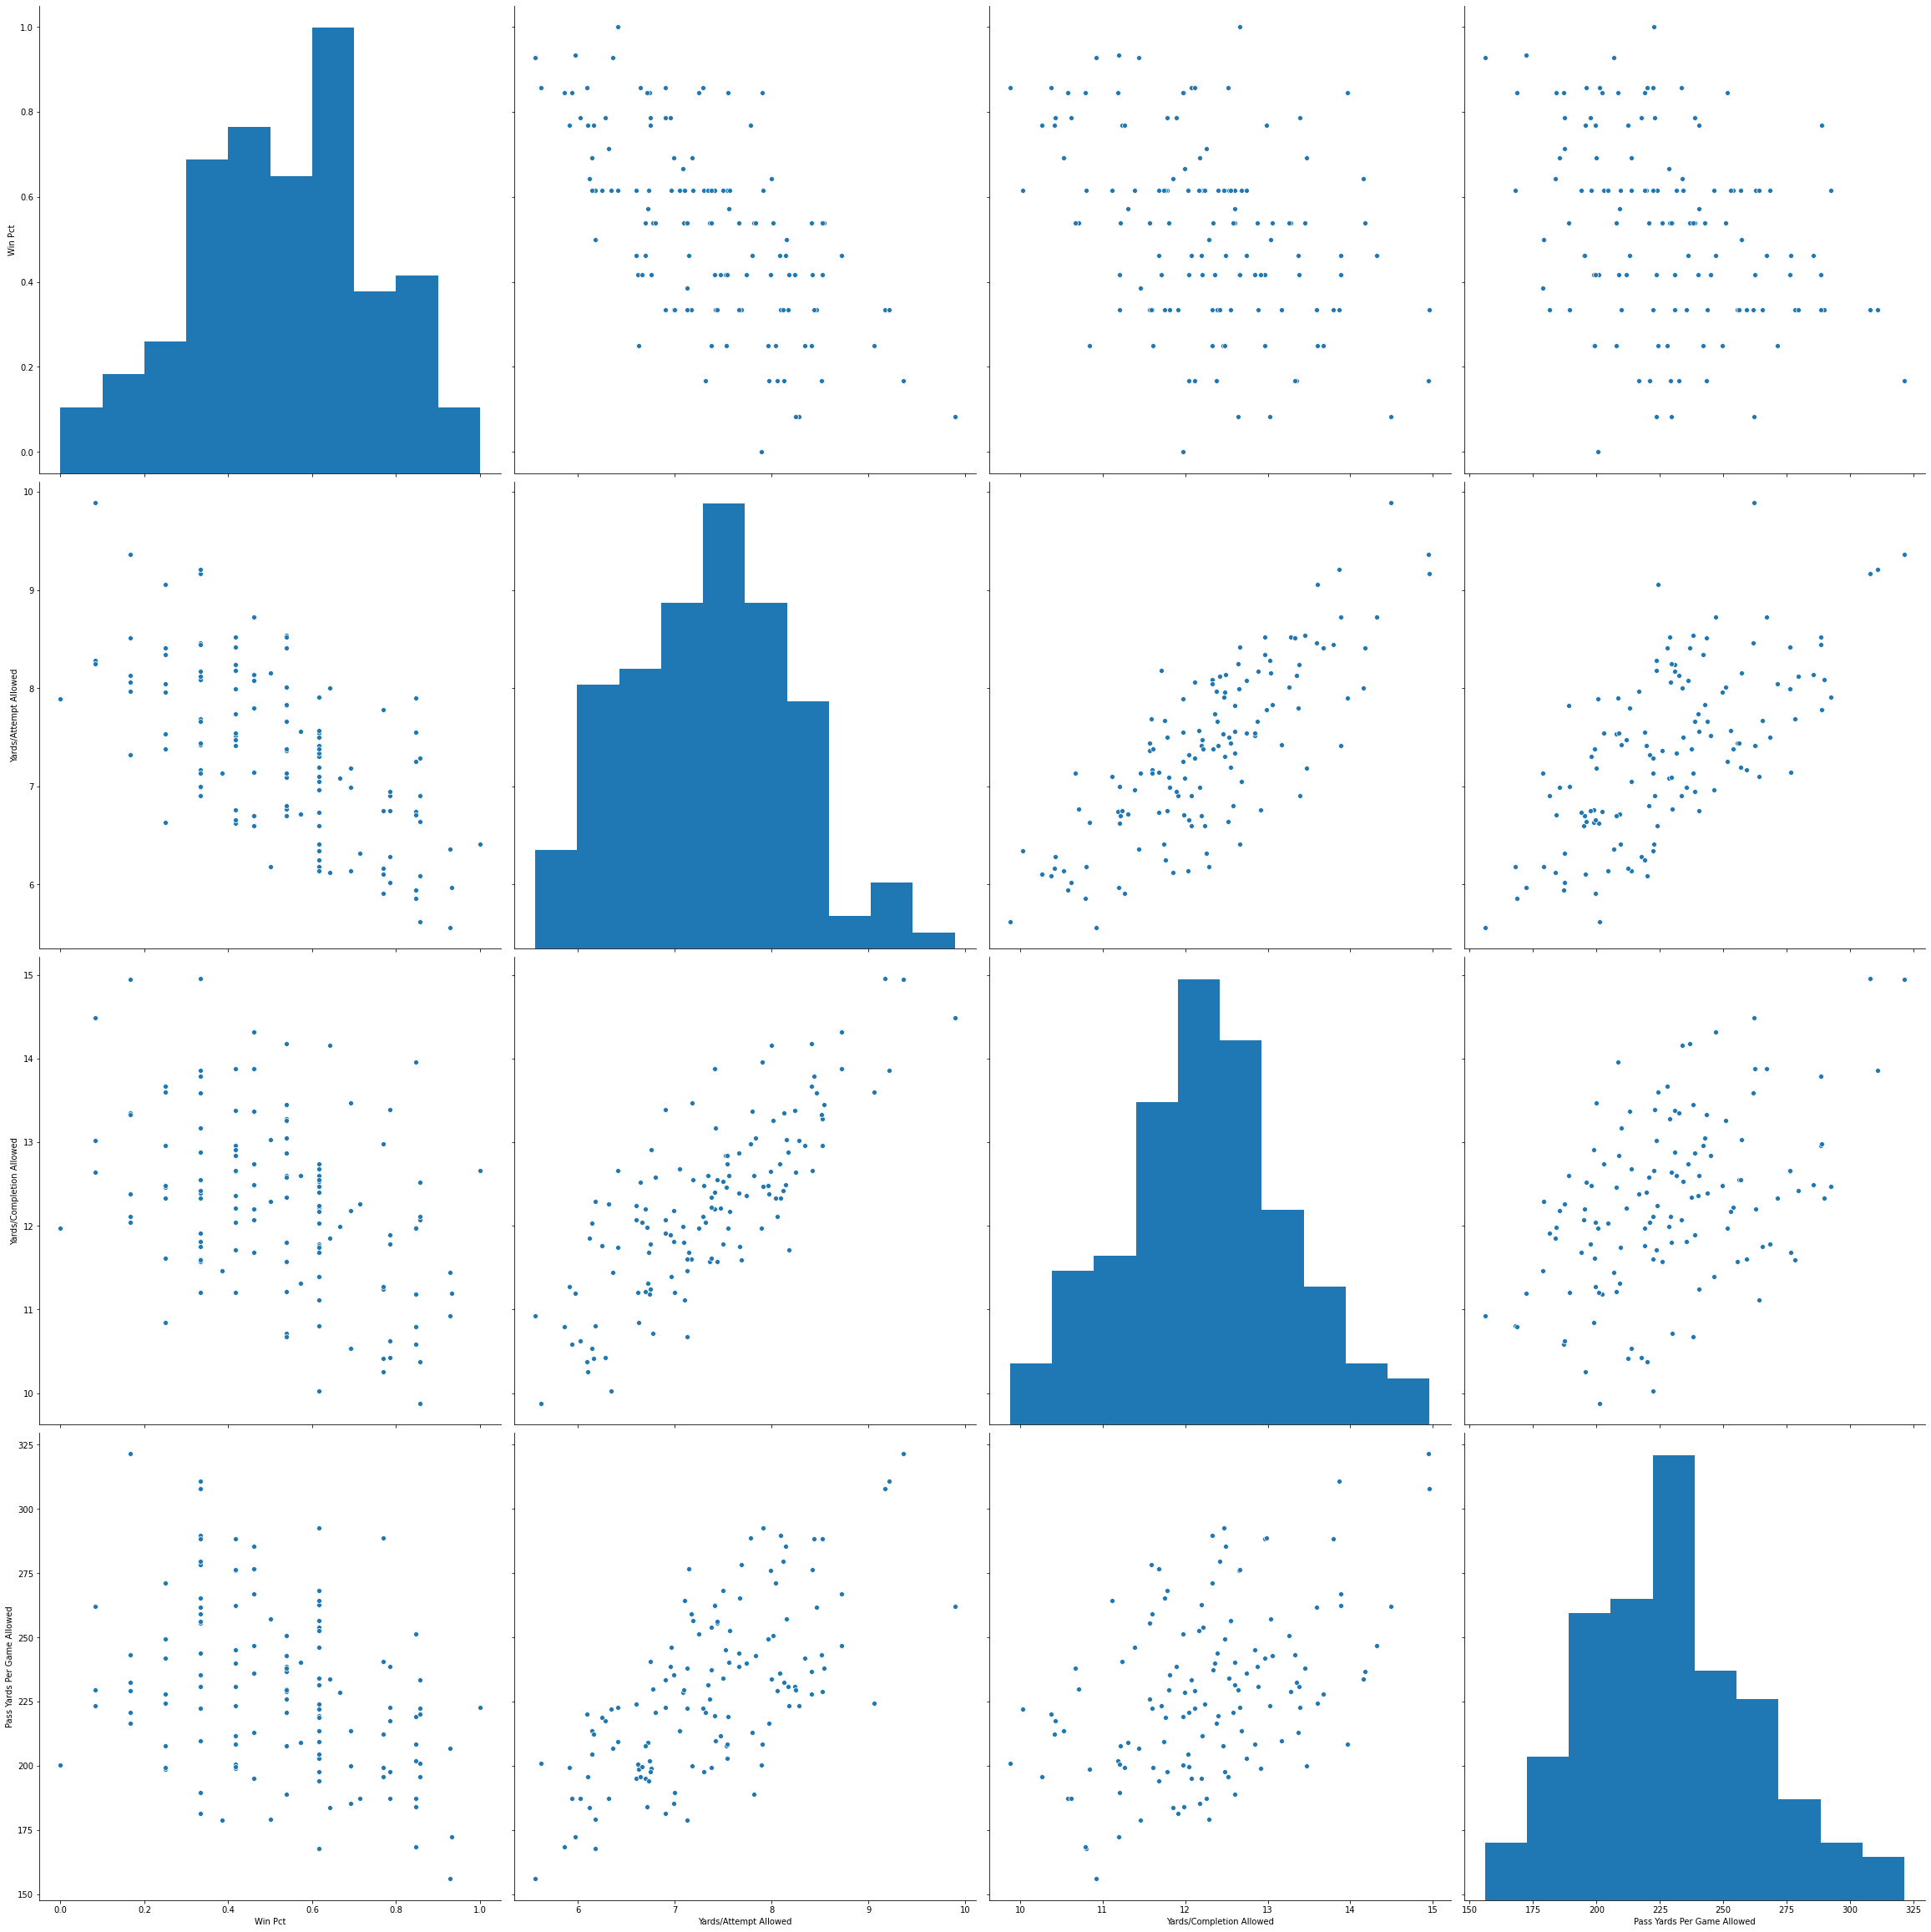

In [25]:
sns.pairplot(cfb[['Win Pct','Yards/Attempt Allowed','Yards/Completion Allowed','Pass Yards Per Game Allowed']], height = 8)

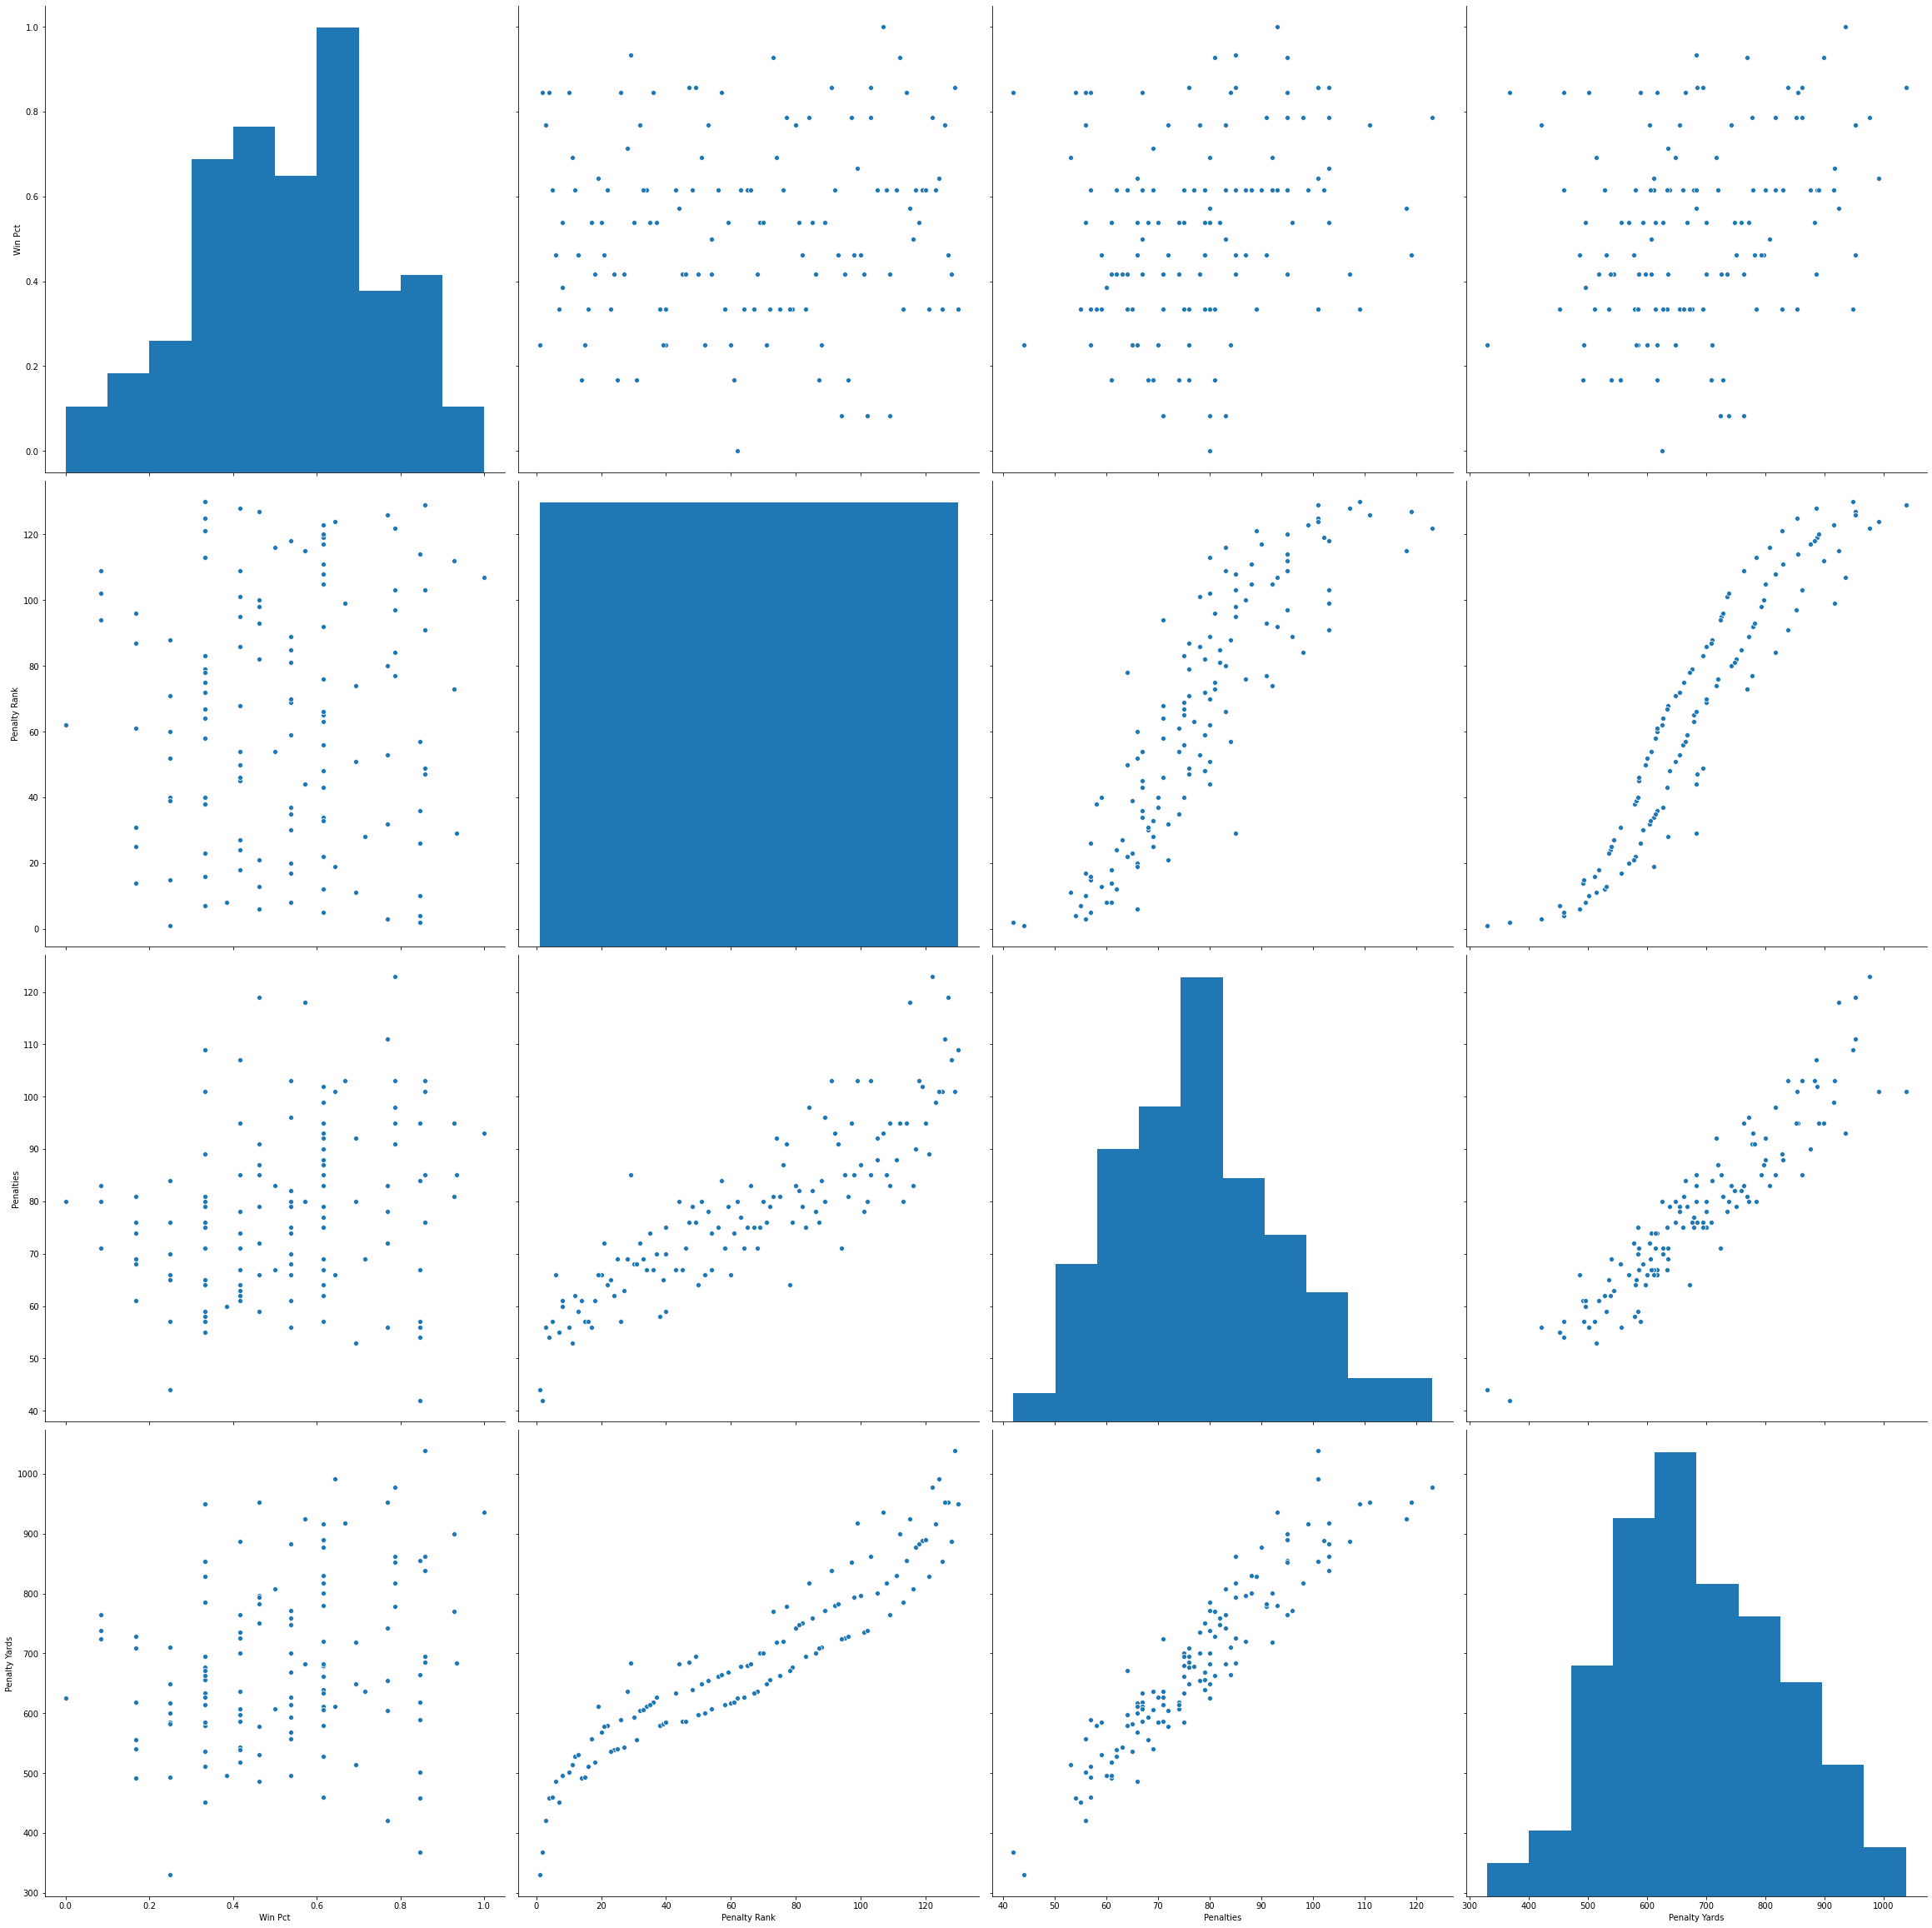

In [26]:
sns.pairplot(cfb[['Win Pct','Penalty Rank','Penalties','Penalty Yards']], height = 8)

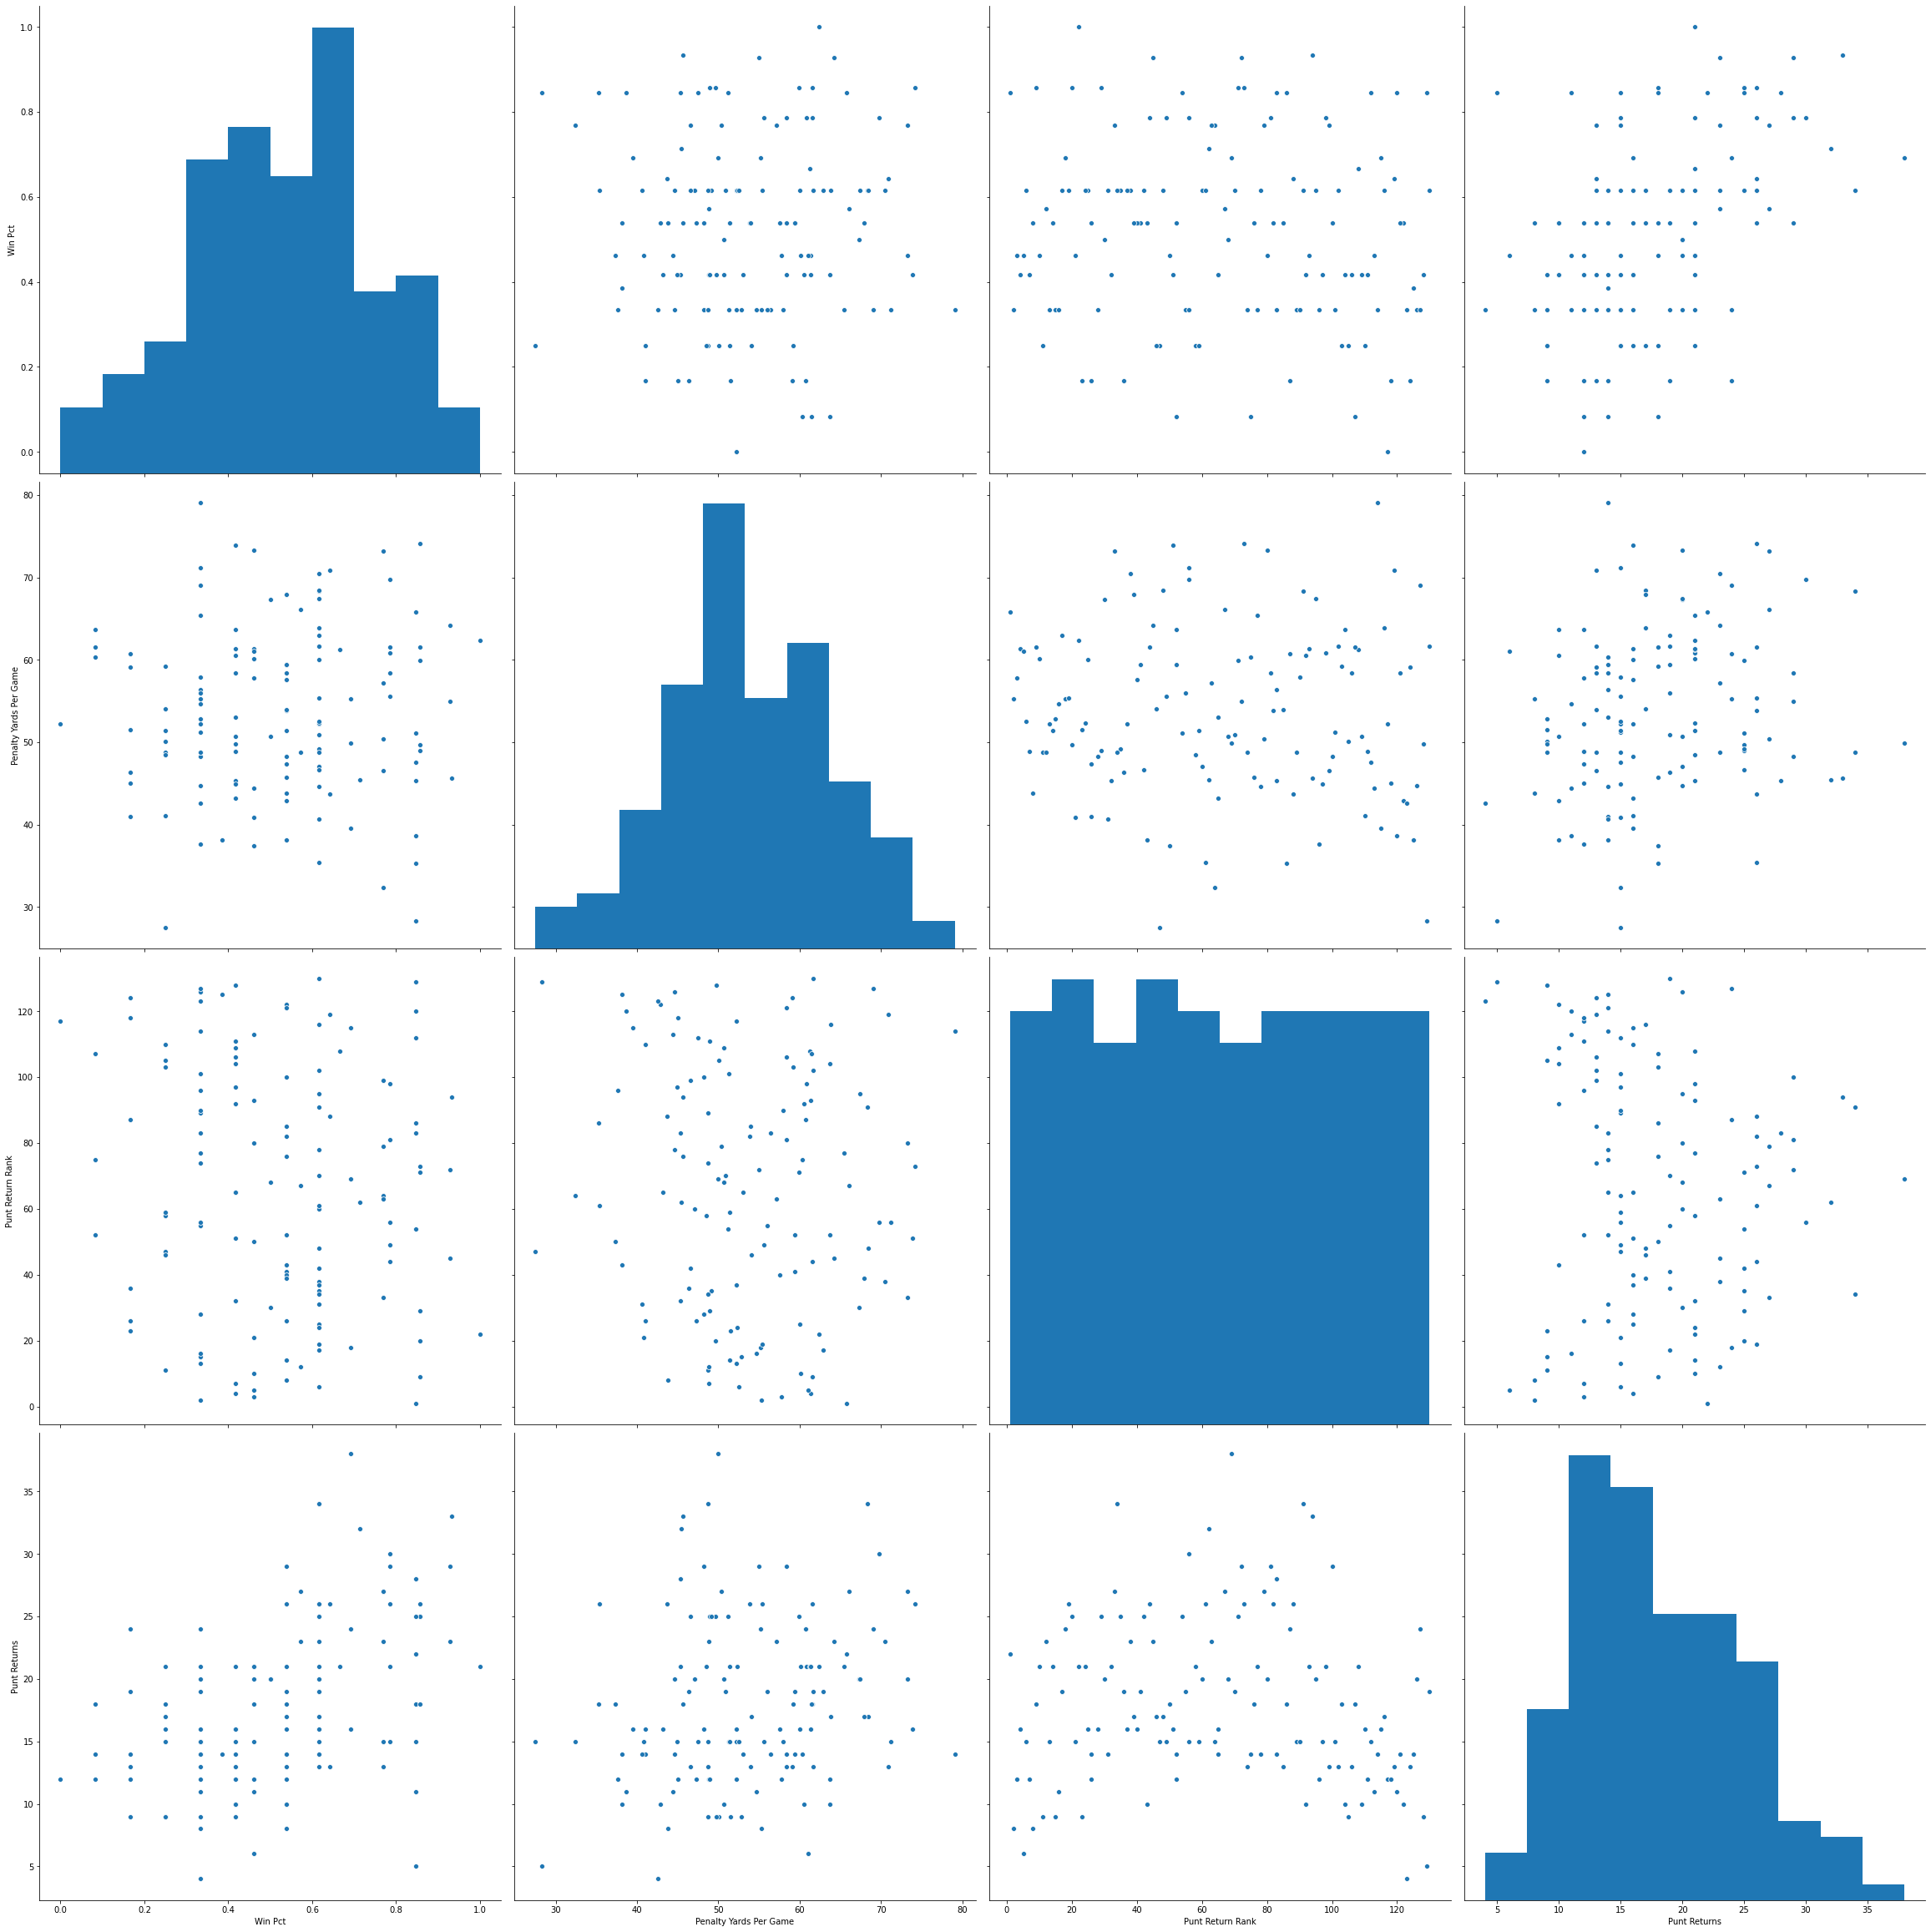

In [27]:
sns.pairplot(cfb[['Win Pct','Penalty Yards Per Game','Punt Return Rank','Punt Returns']], height = 8)

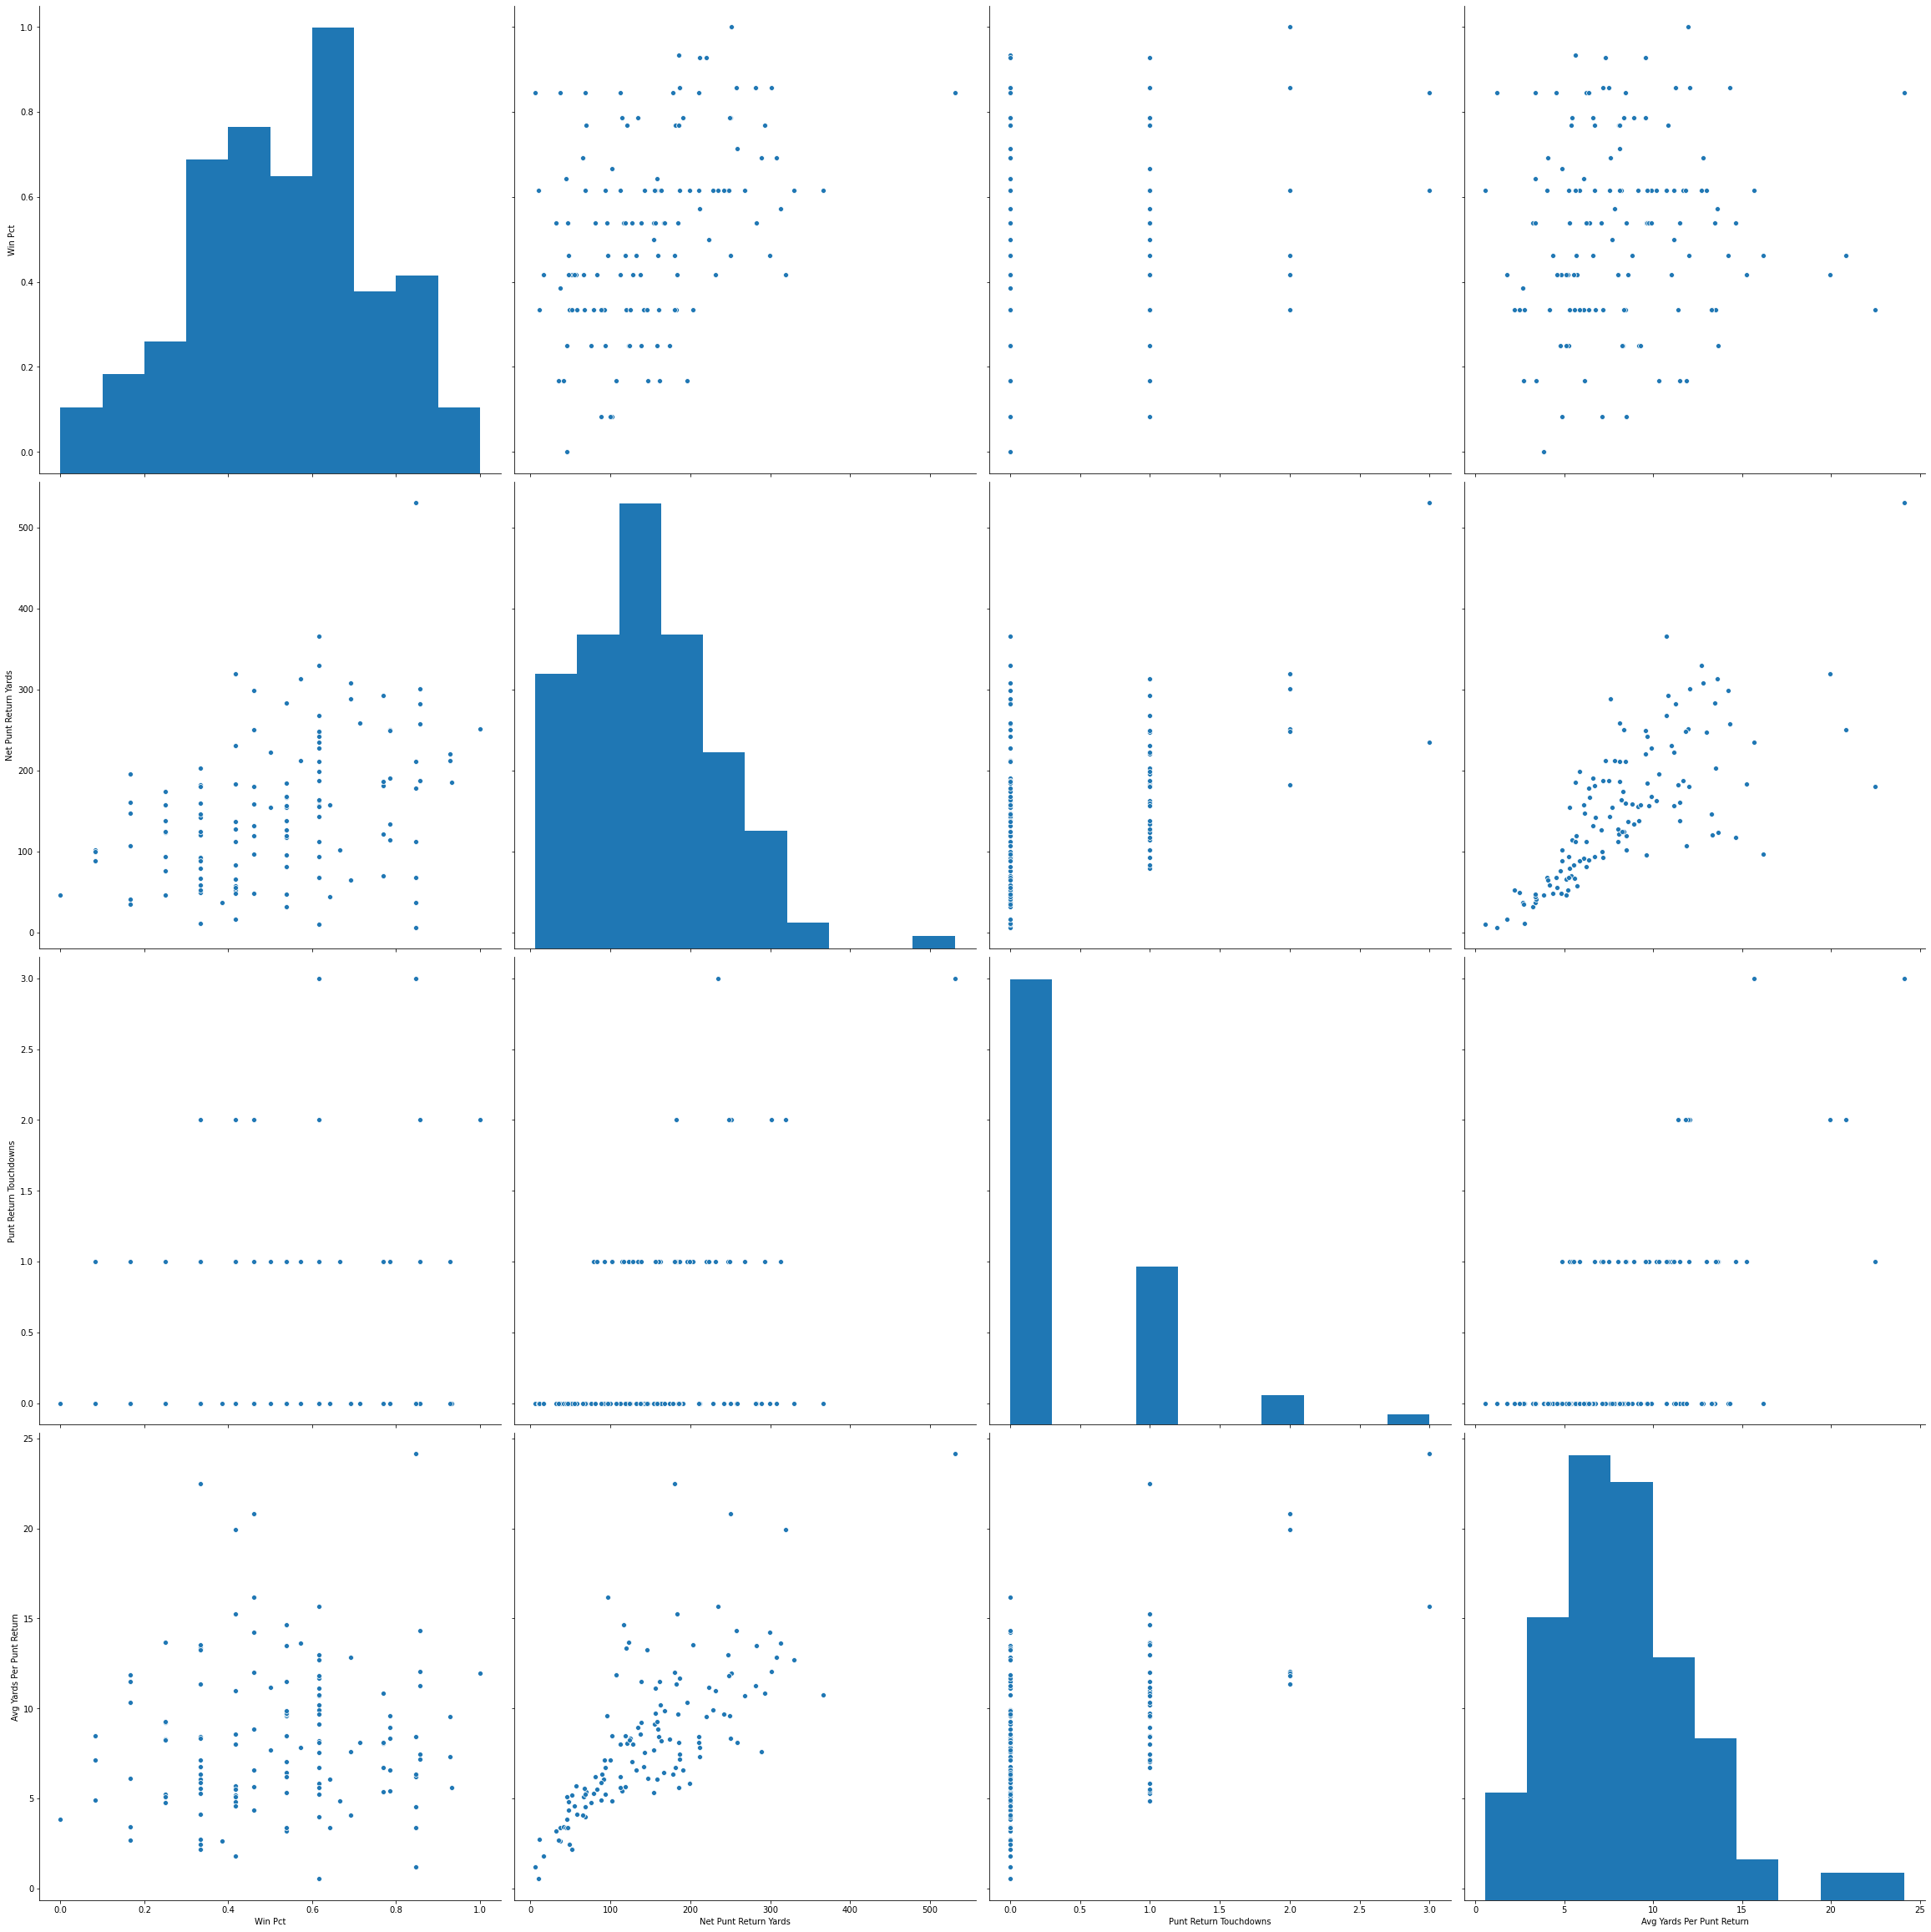

In [28]:
sns.pairplot(cfb[['Win Pct','Net Punt Return Yards','Punt Return Touchdowns','Avg Yards Per Punt Return']], height = 8)

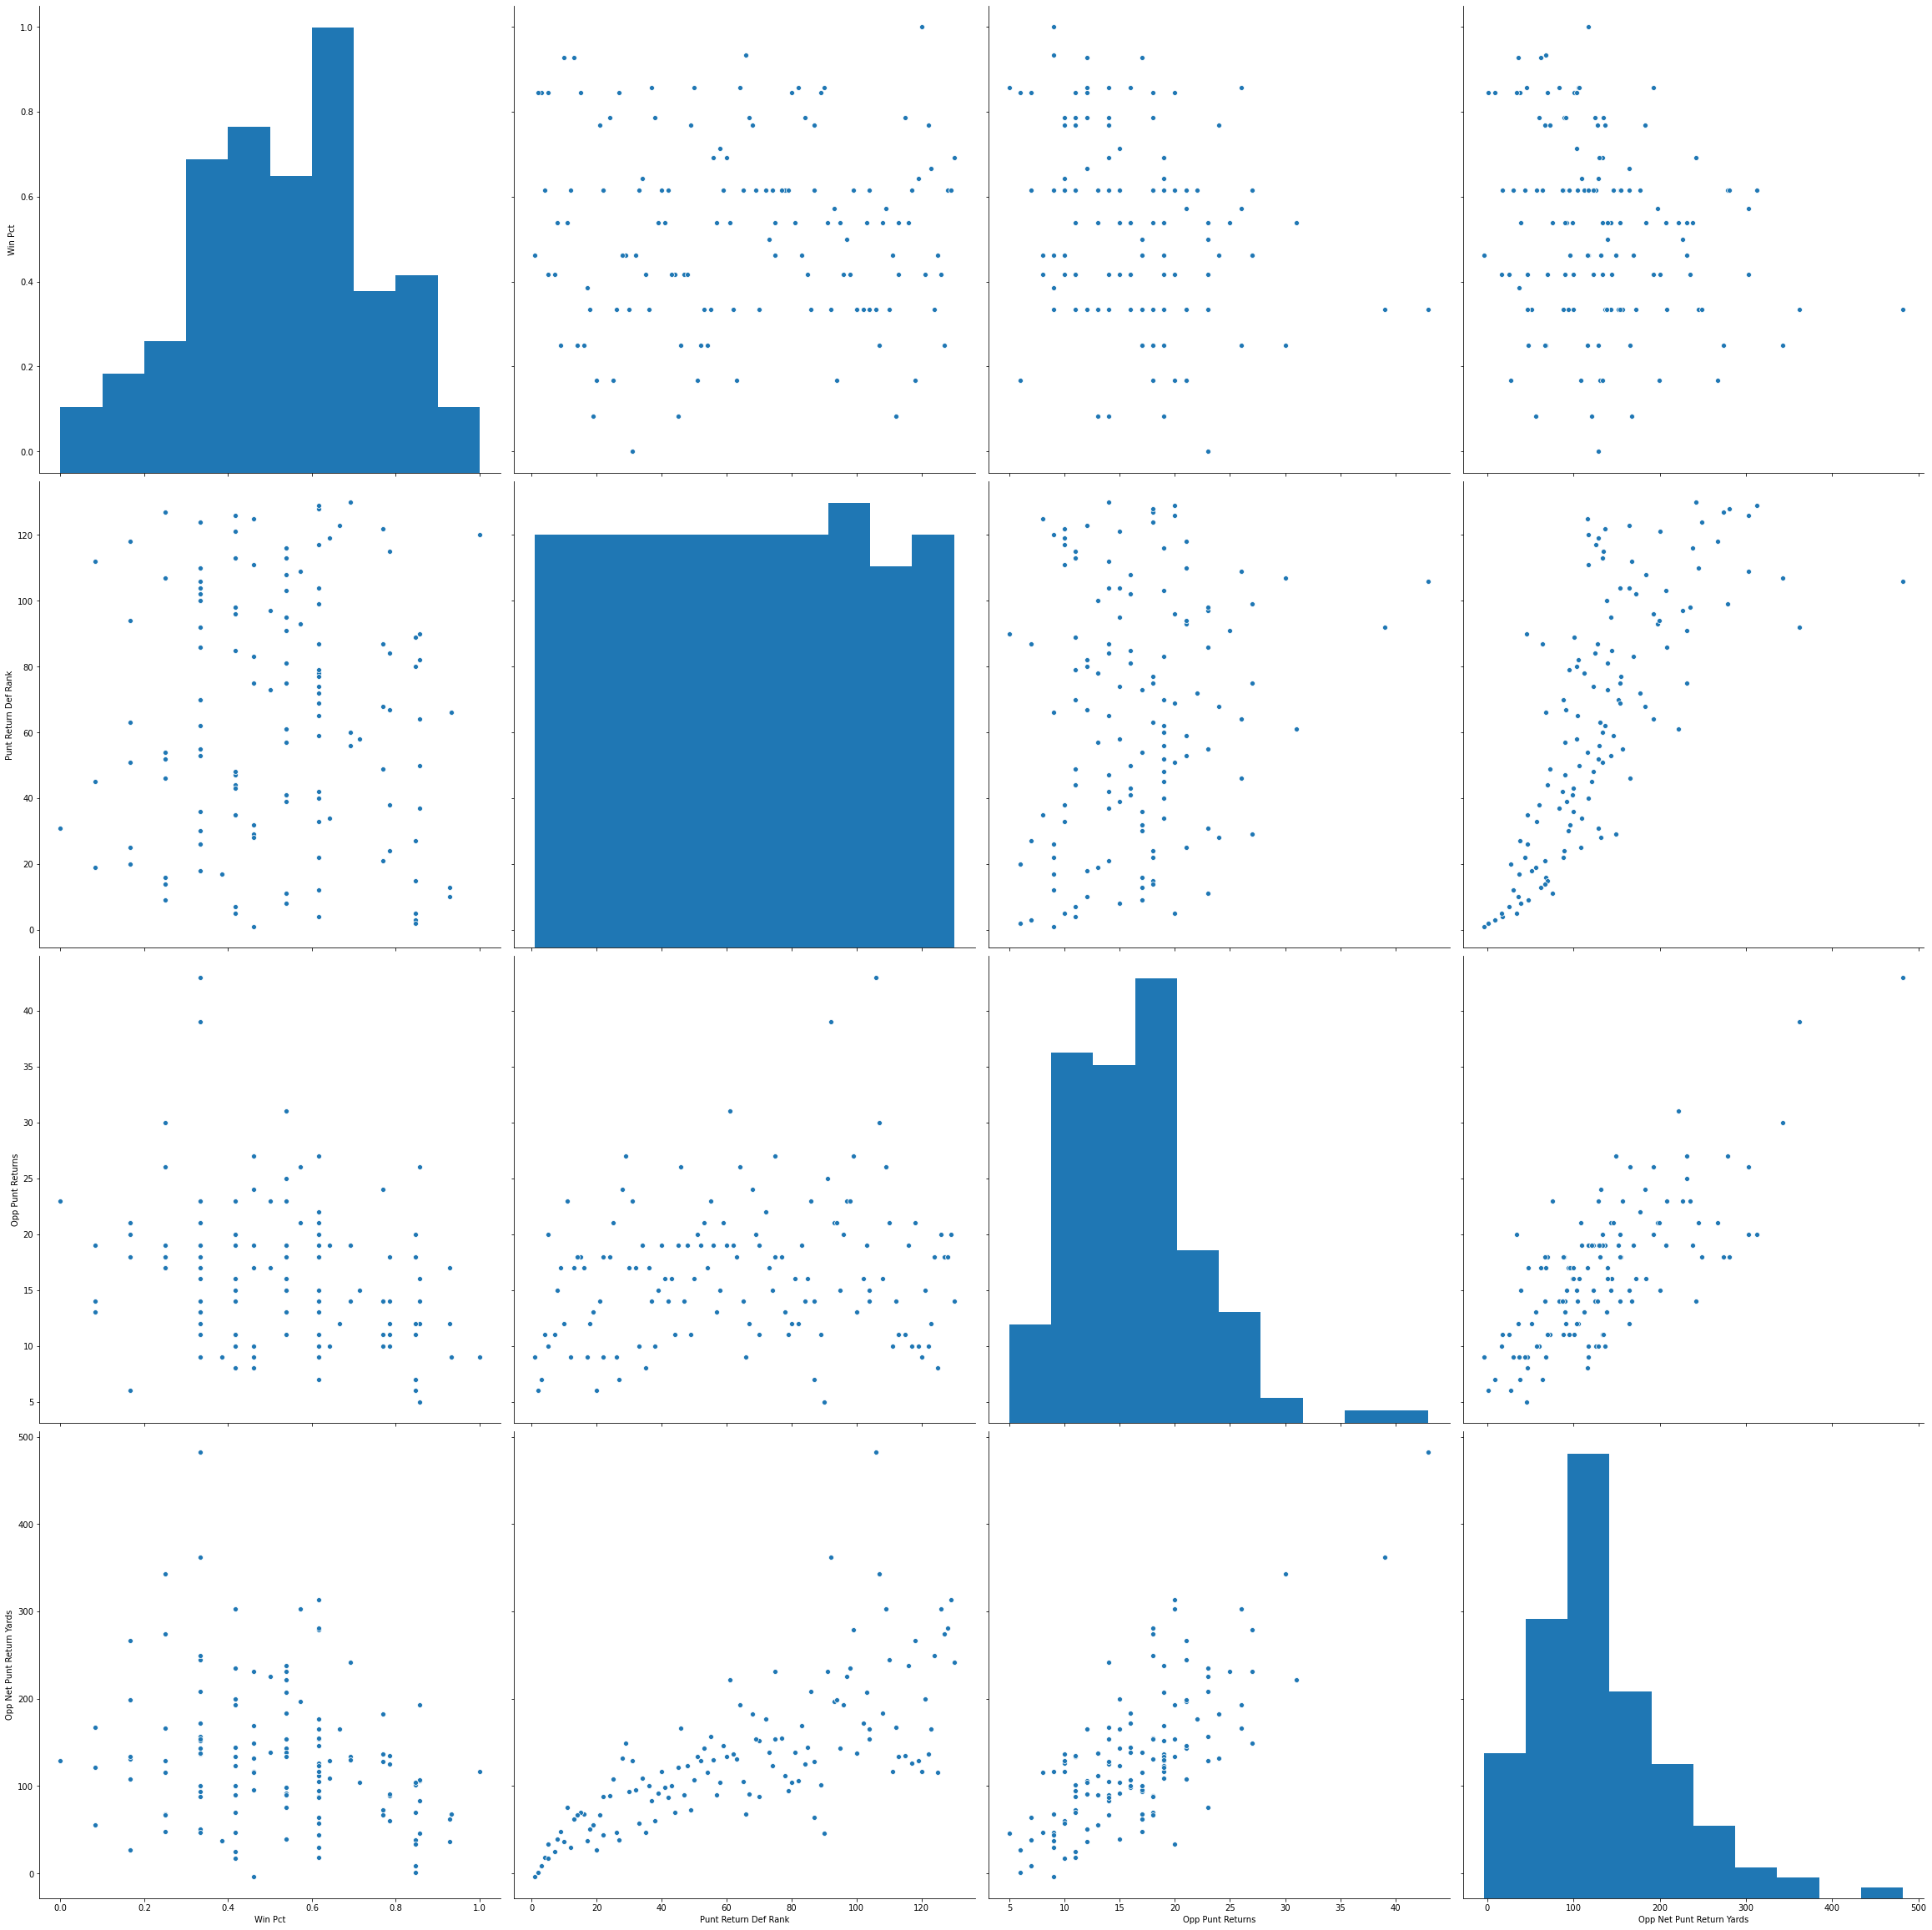

In [29]:
sns.pairplot(cfb[['Win Pct','Punt Return Def Rank','Opp Punt Returns','Opp Net Punt Return Yards']], height = 8)

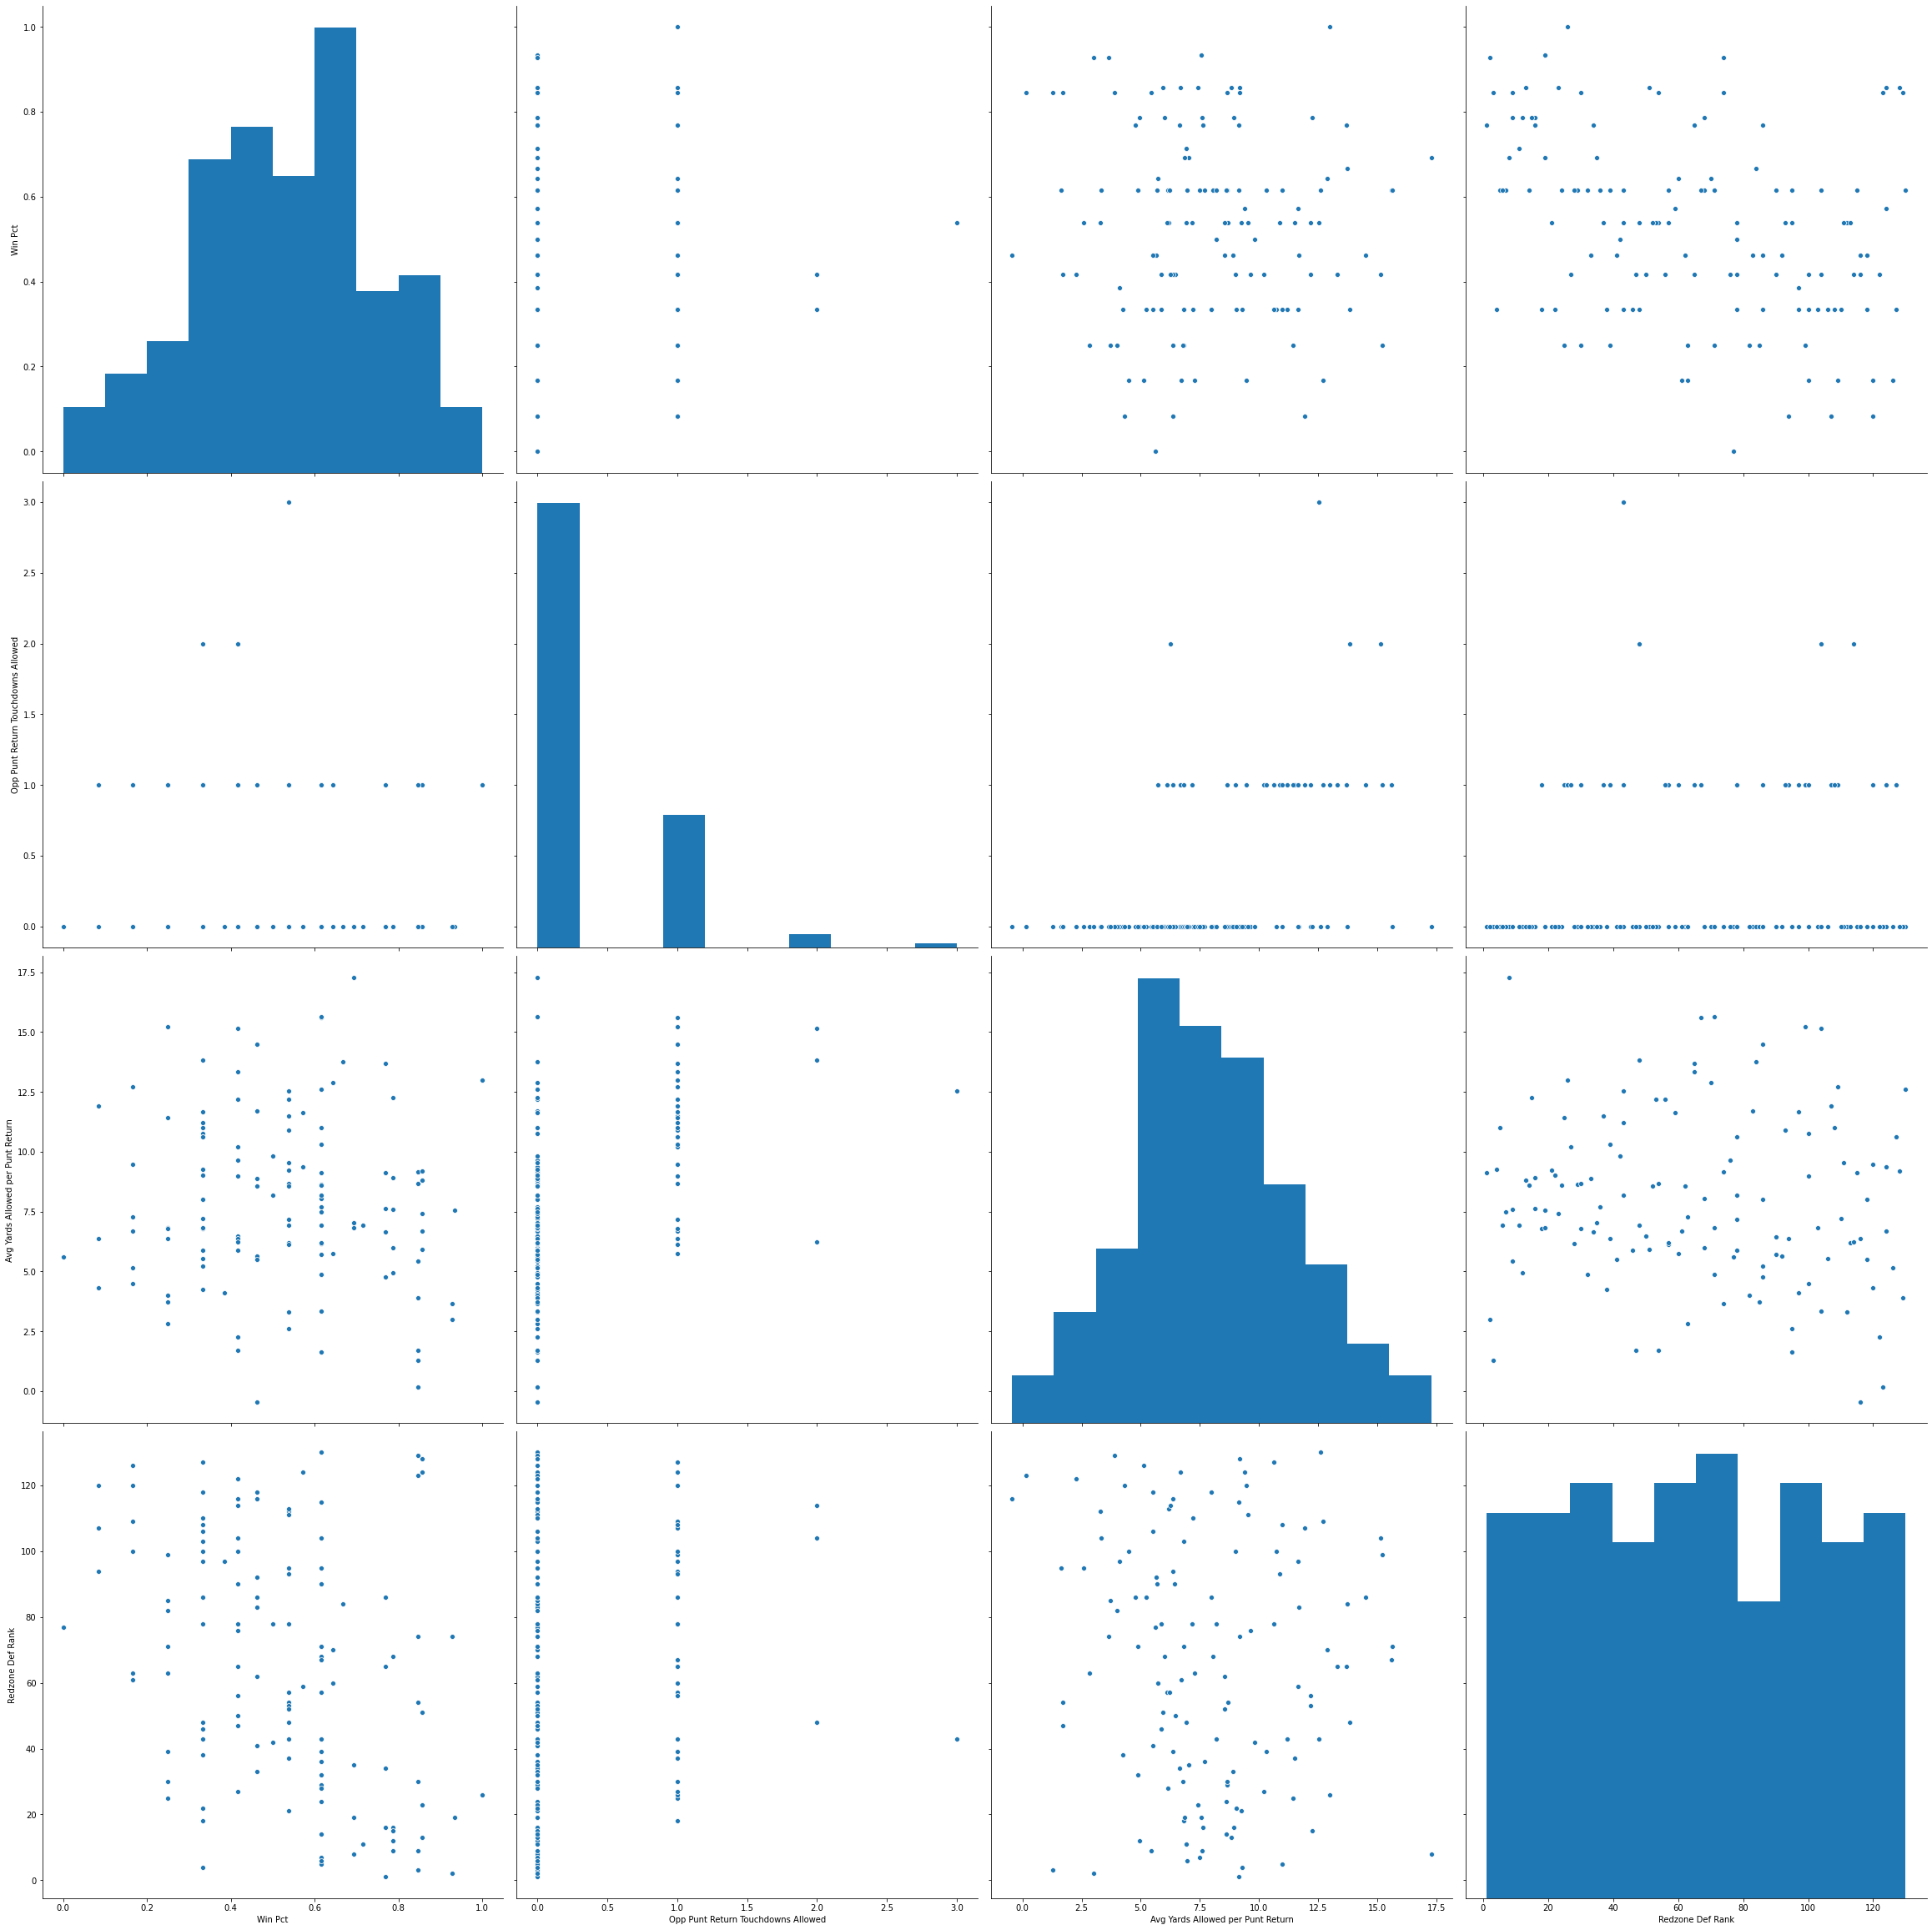

In [30]:
sns.pairplot(cfb[['Win Pct','Opp Punt Return Touchdowns Allowed','Avg Yards Allowed per Punt Return','Redzone Def Rank']], height = 8)

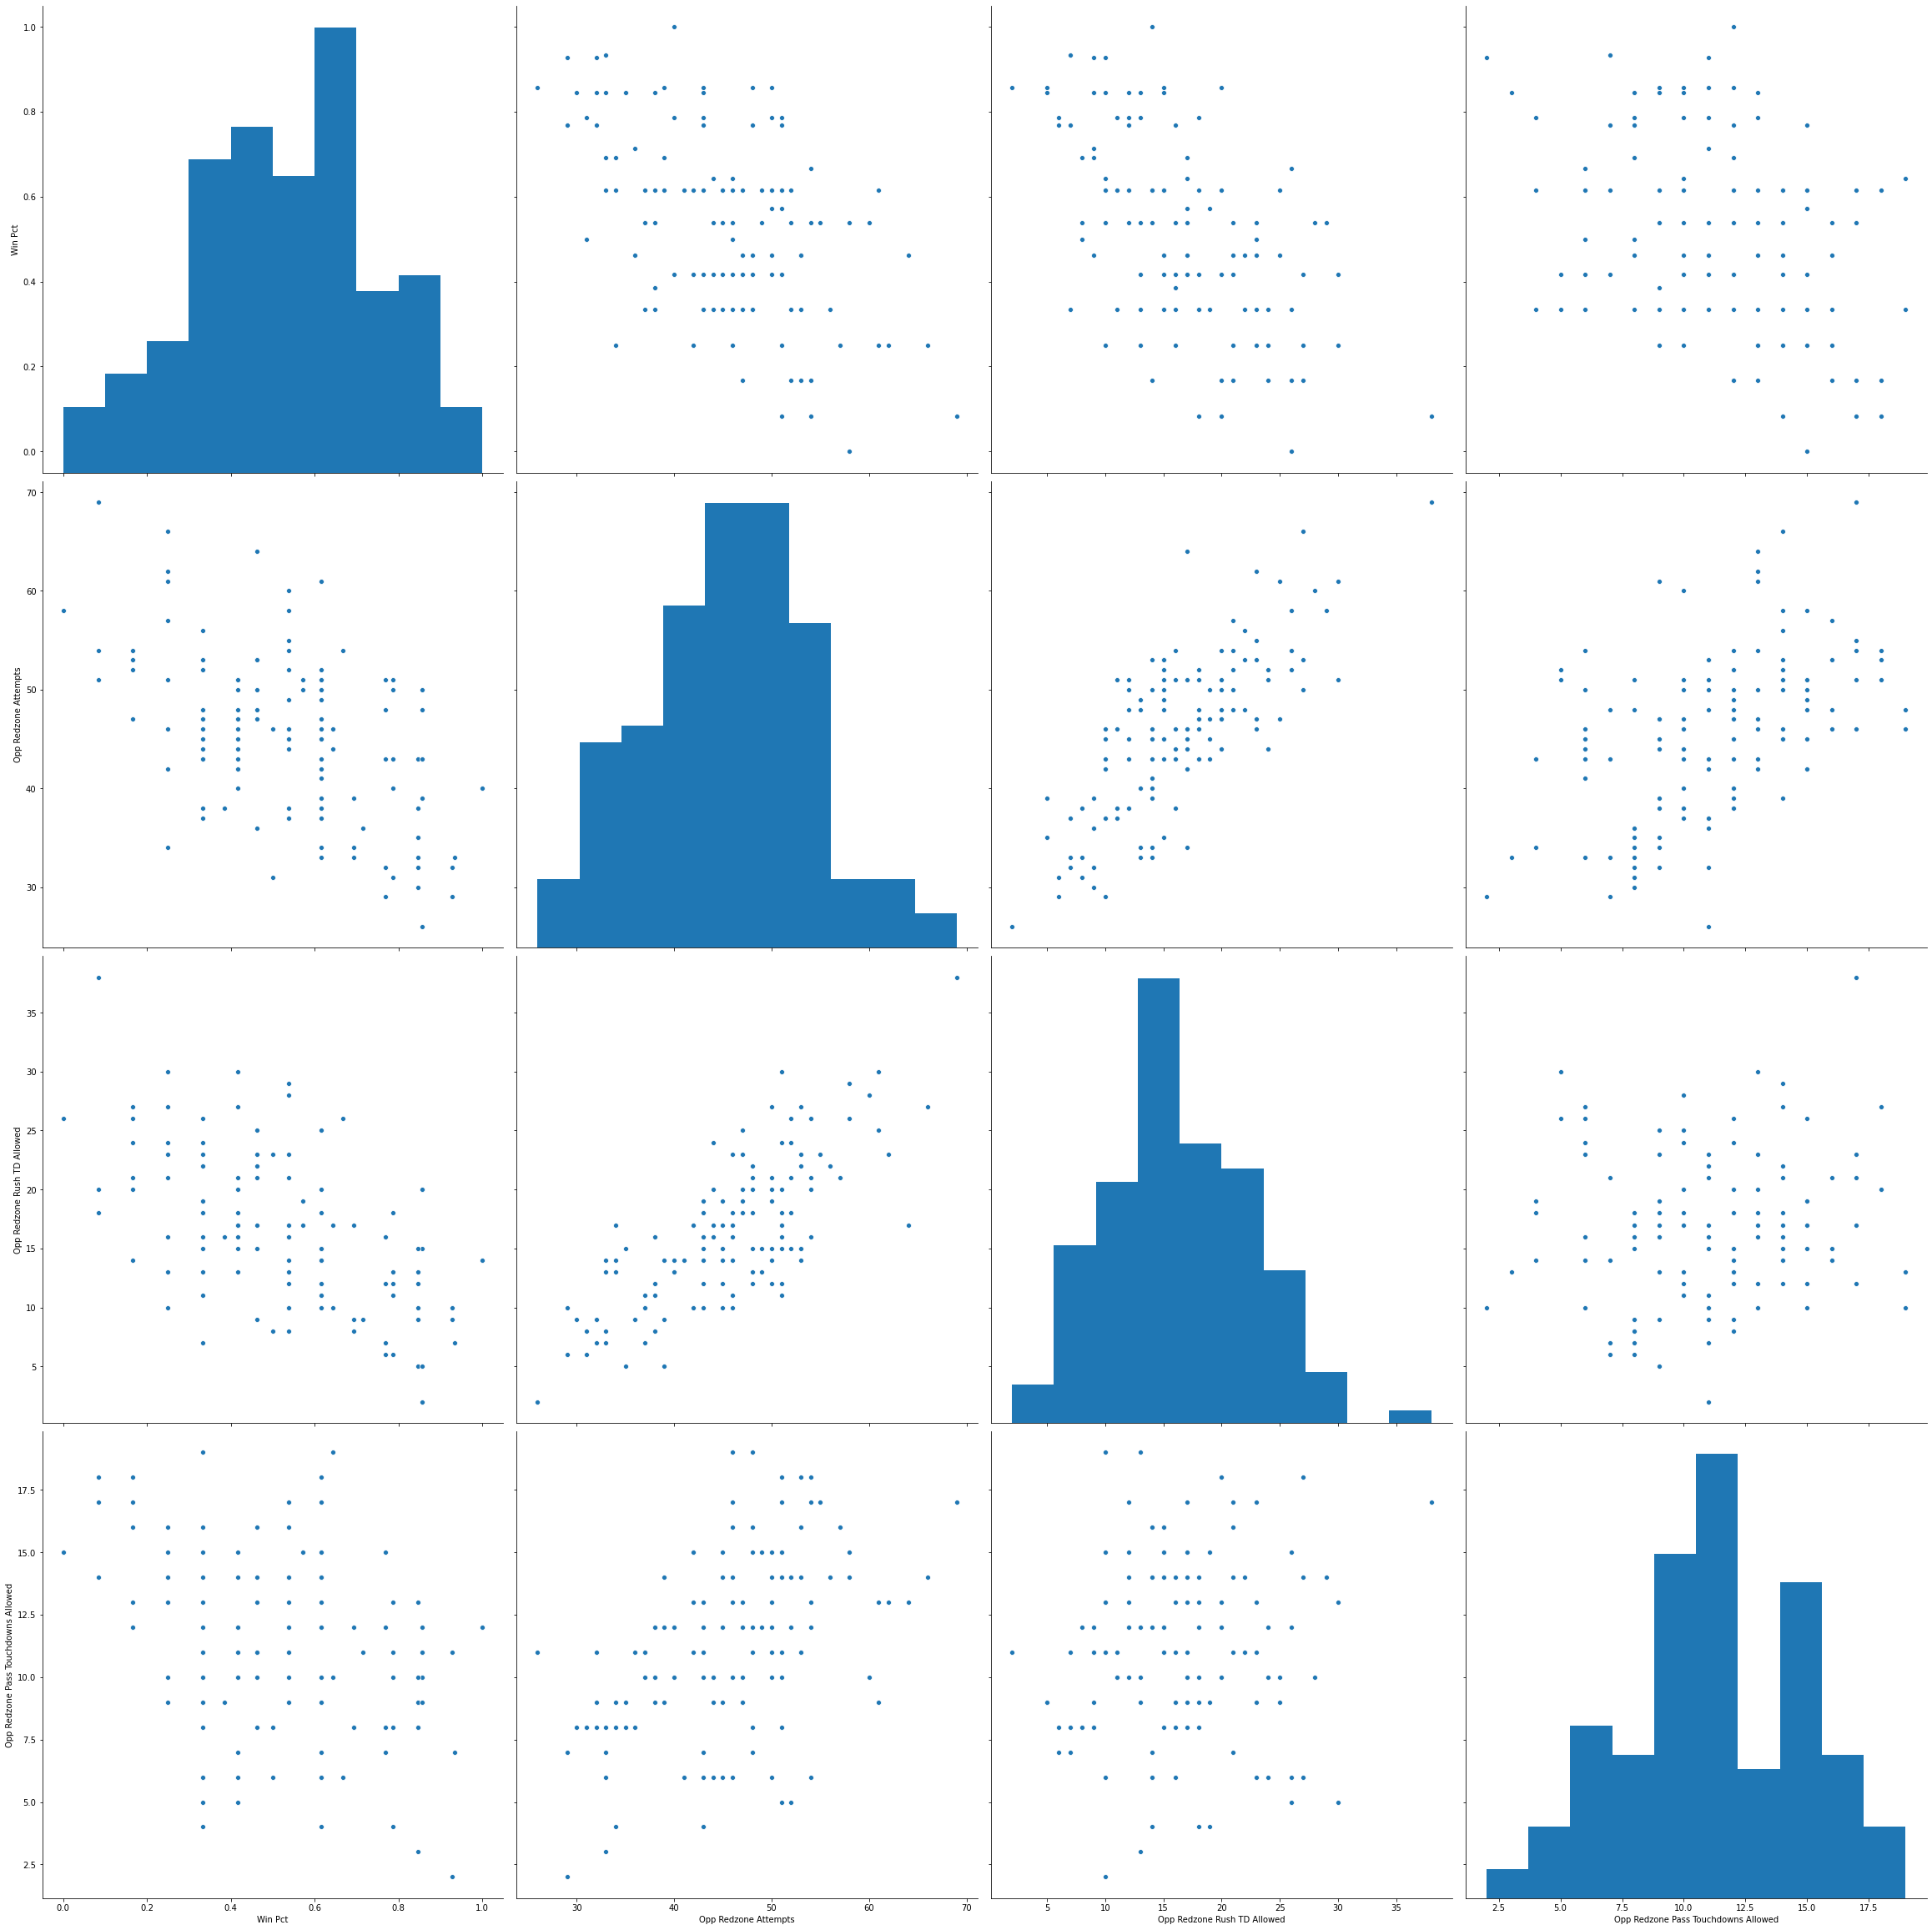

In [31]:
sns.pairplot(cfb[['Win Pct','Opp Redzone Attempts','Opp Redzone Rush TD Allowed','Opp Redzone Pass Touchdowns Allowed']], height = 8)

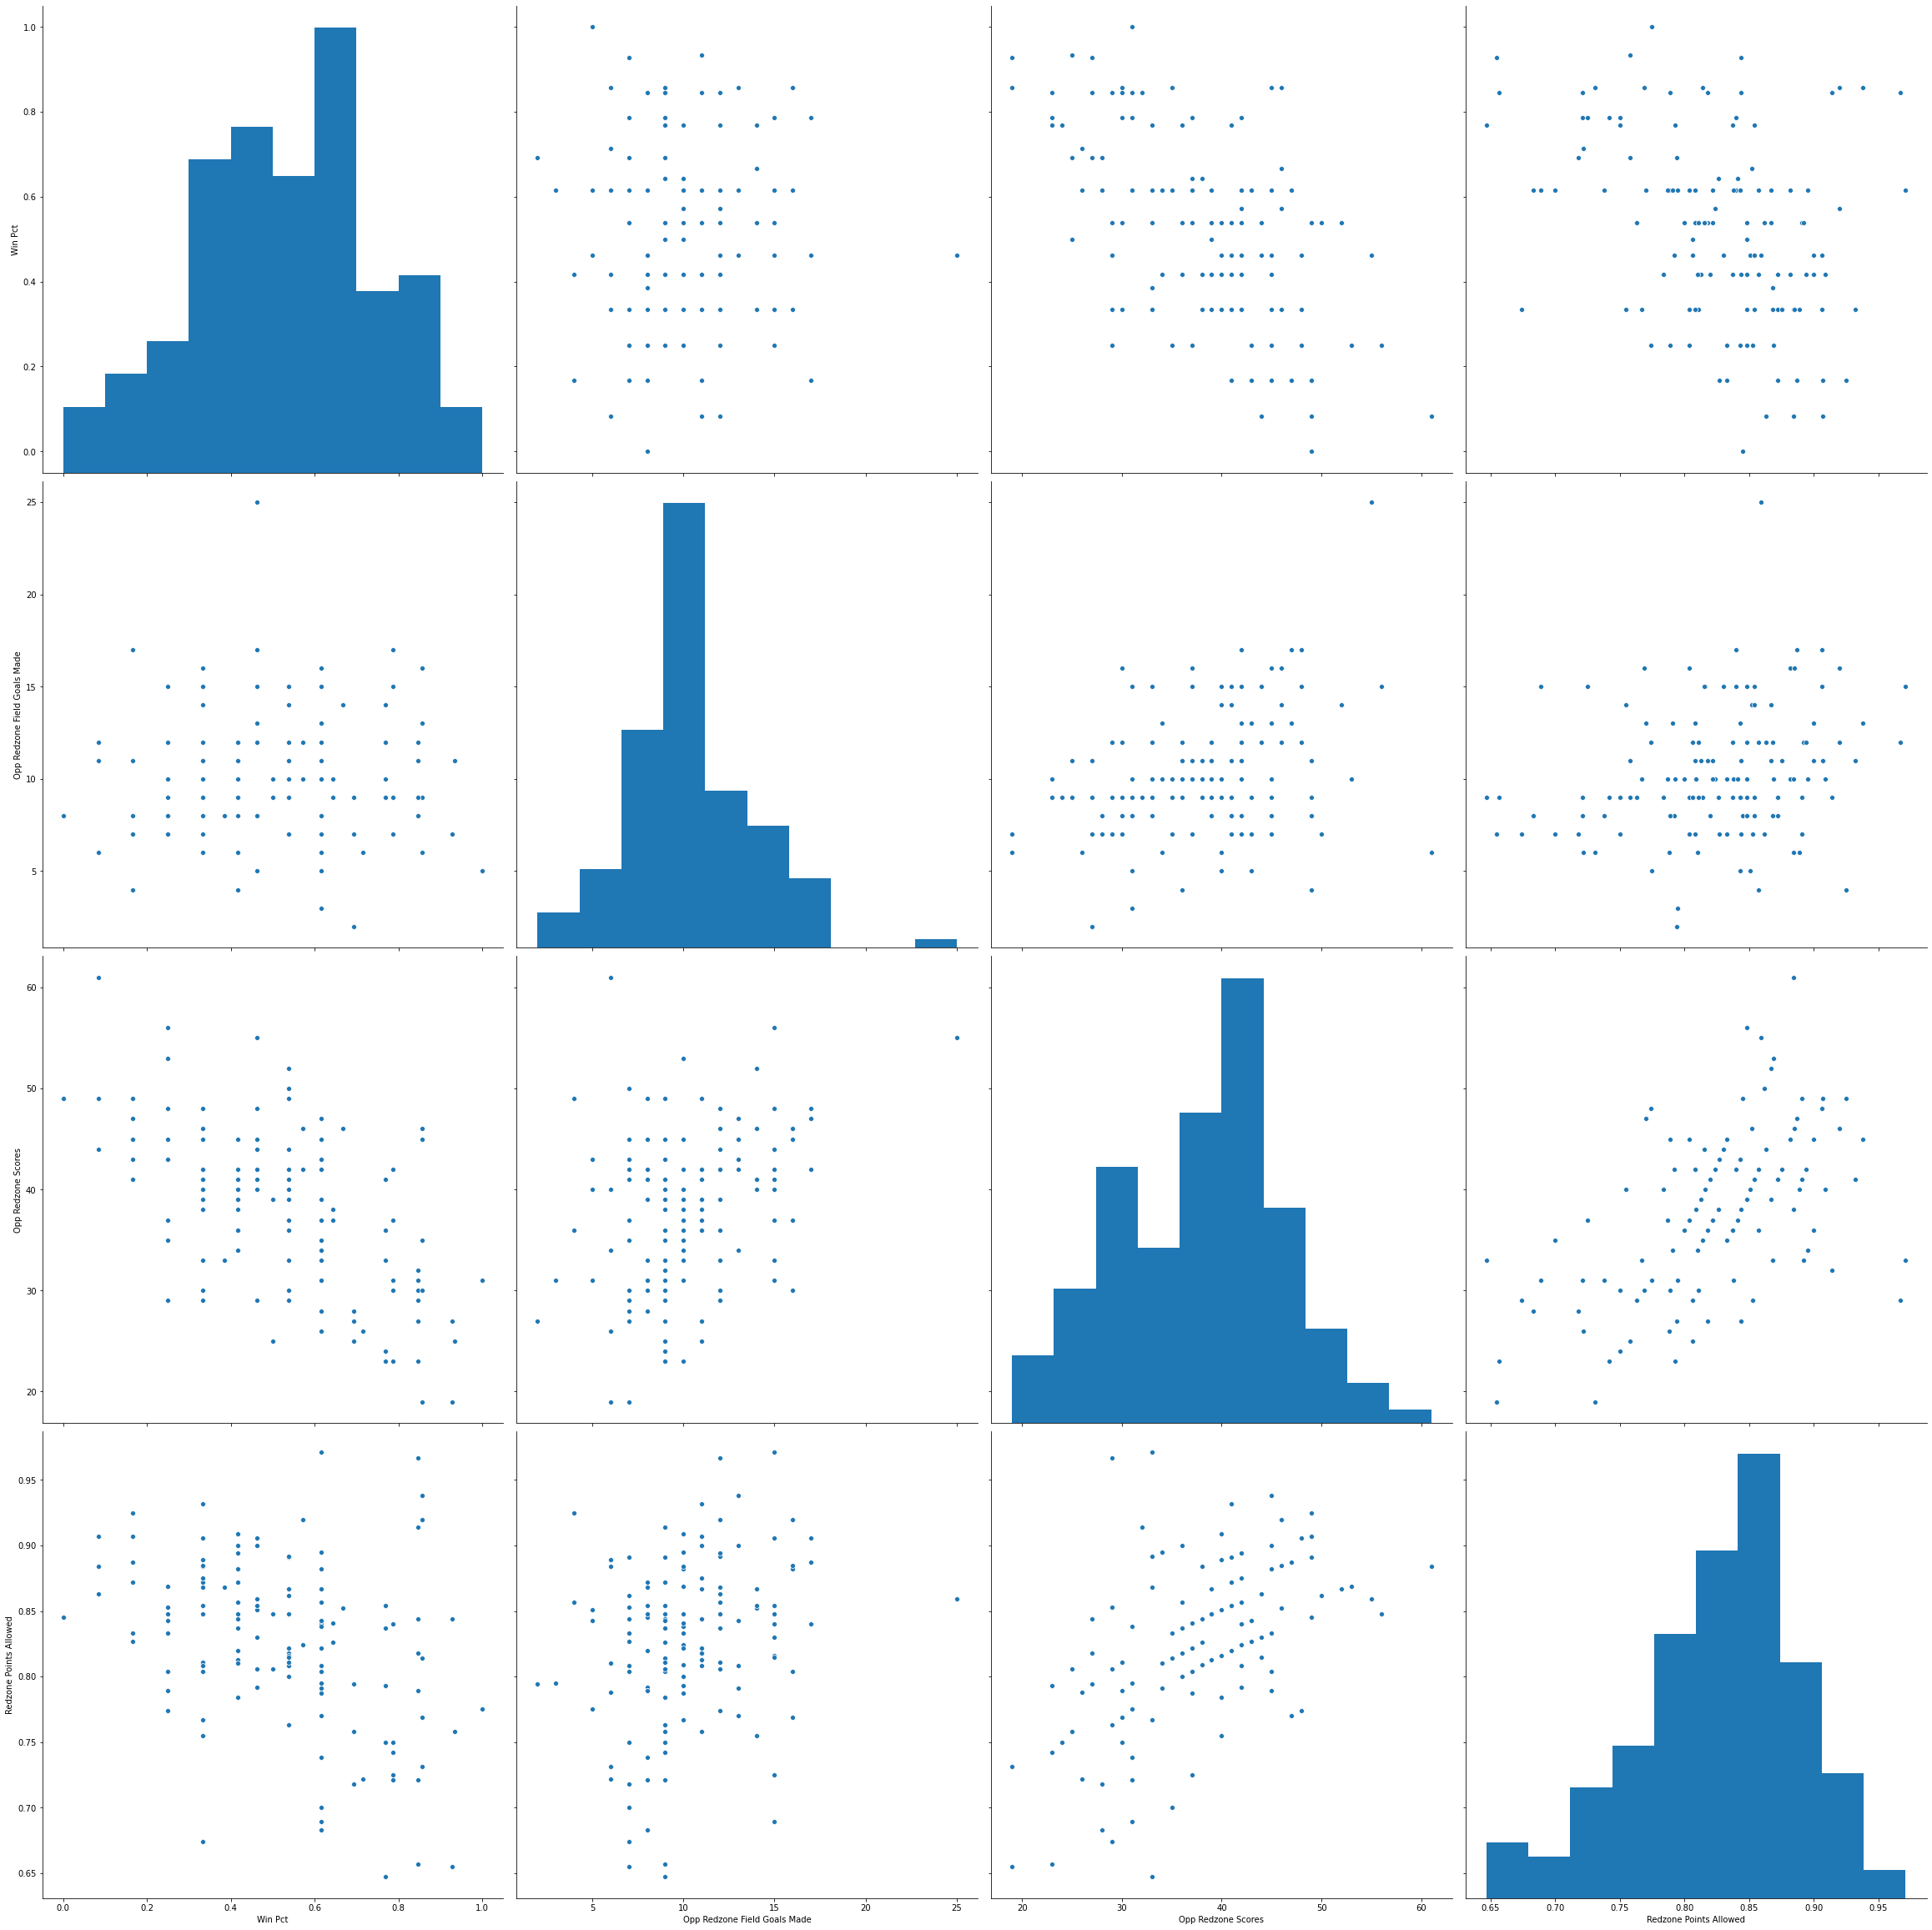

In [32]:
sns.pairplot(cfb[['Win Pct','Opp Redzone Field Goals Made','Opp Redzone Scores','Redzone Points Allowed']], height = 8)

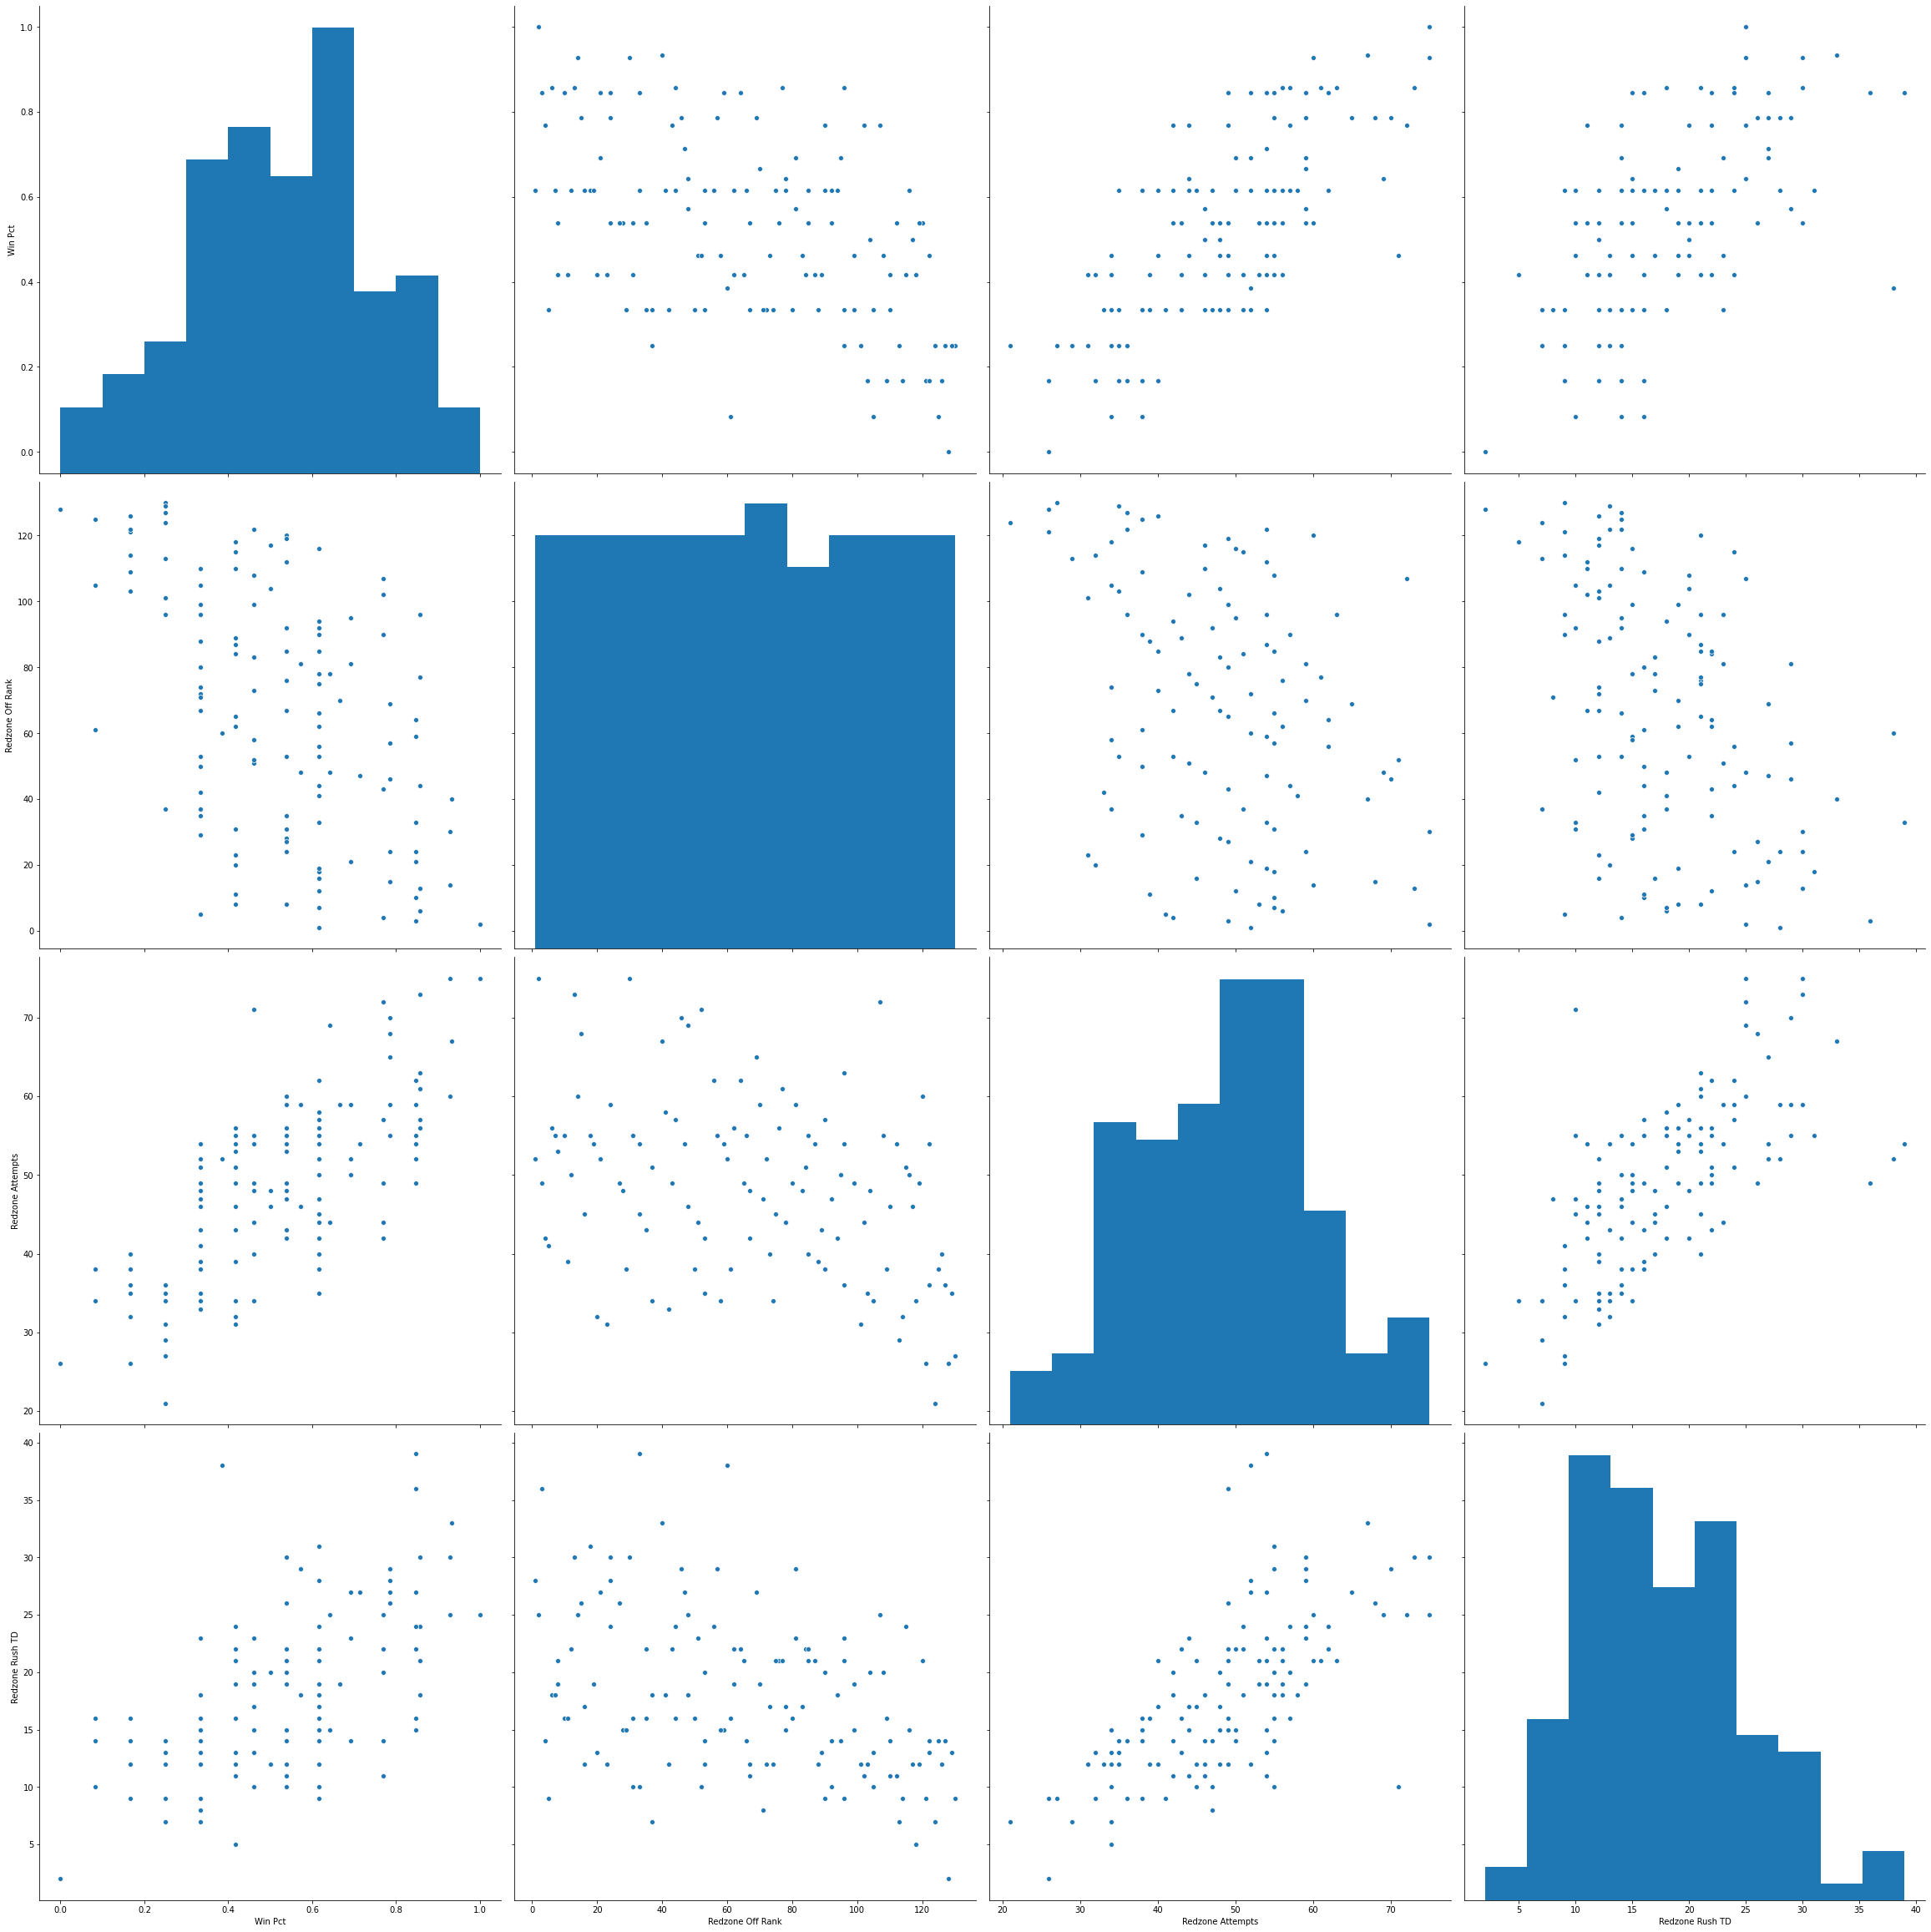

In [33]:
sns.pairplot(cfb[['Win Pct','Redzone Off Rank','Redzone Attempts','Redzone Rush TD']], height = 8)

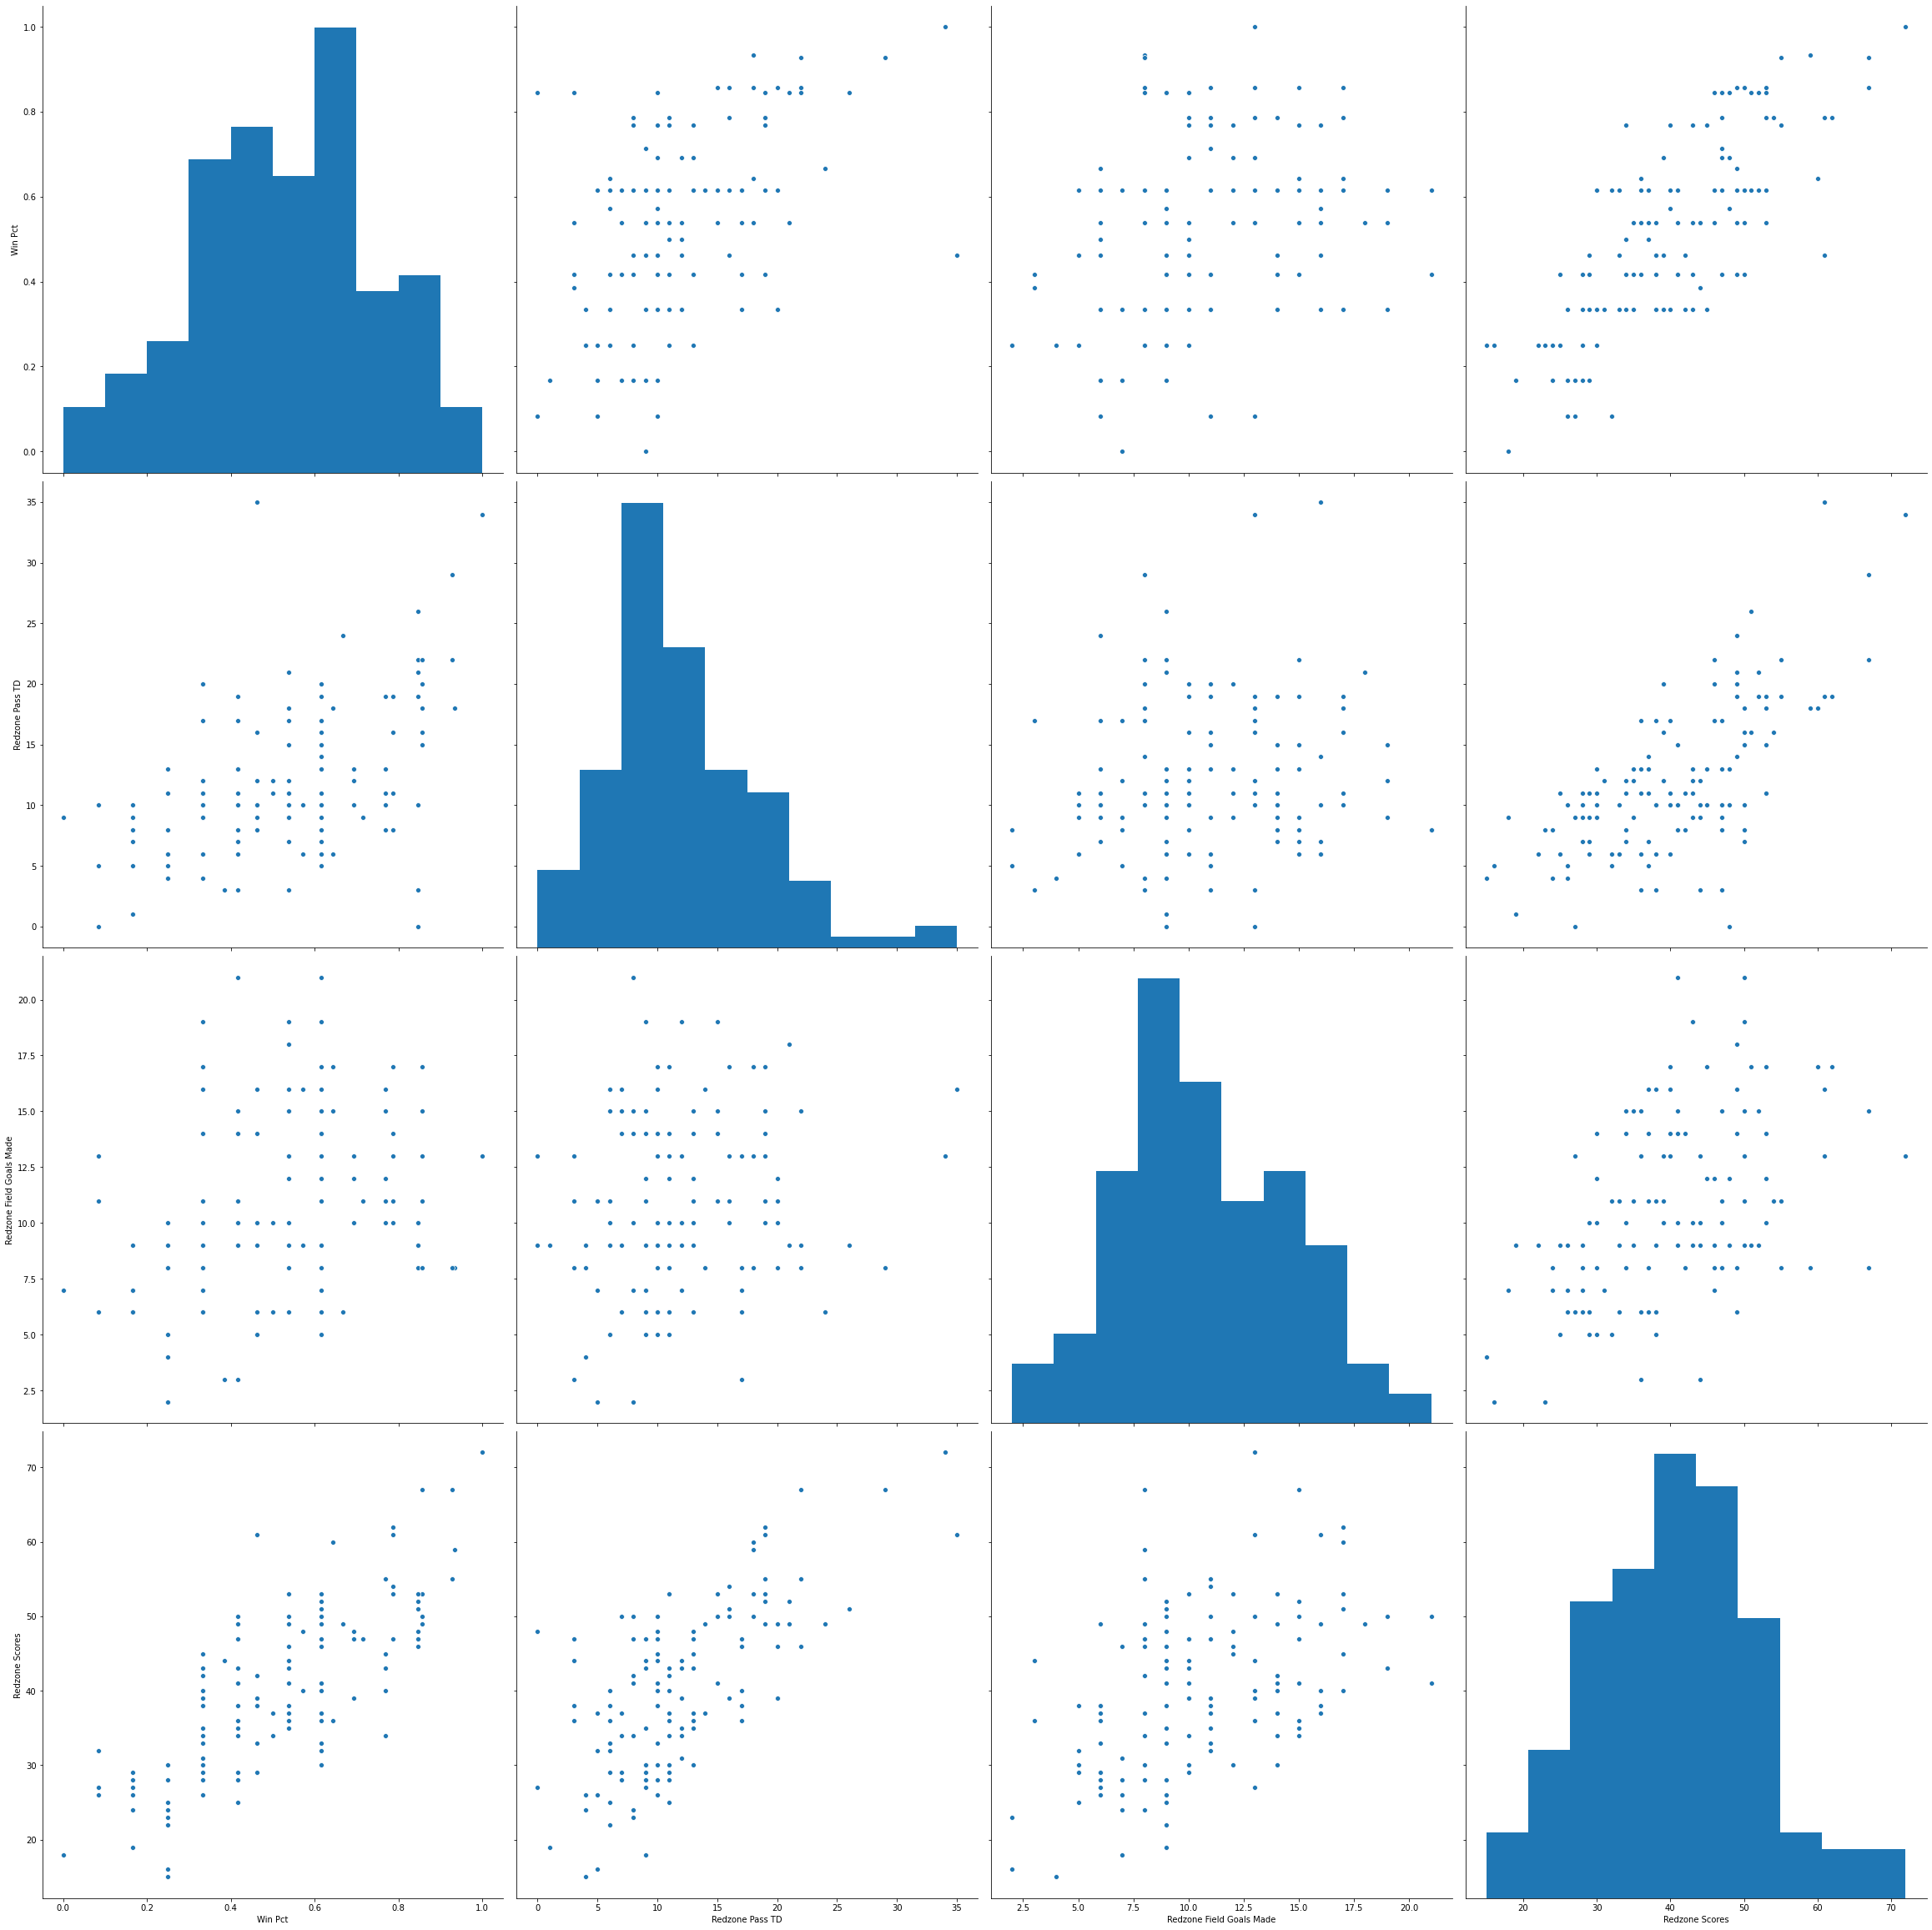

In [34]:
sns.pairplot(cfb[['Win Pct','Redzone Pass TD','Redzone Field Goals Made','Redzone Scores']], height = 8)

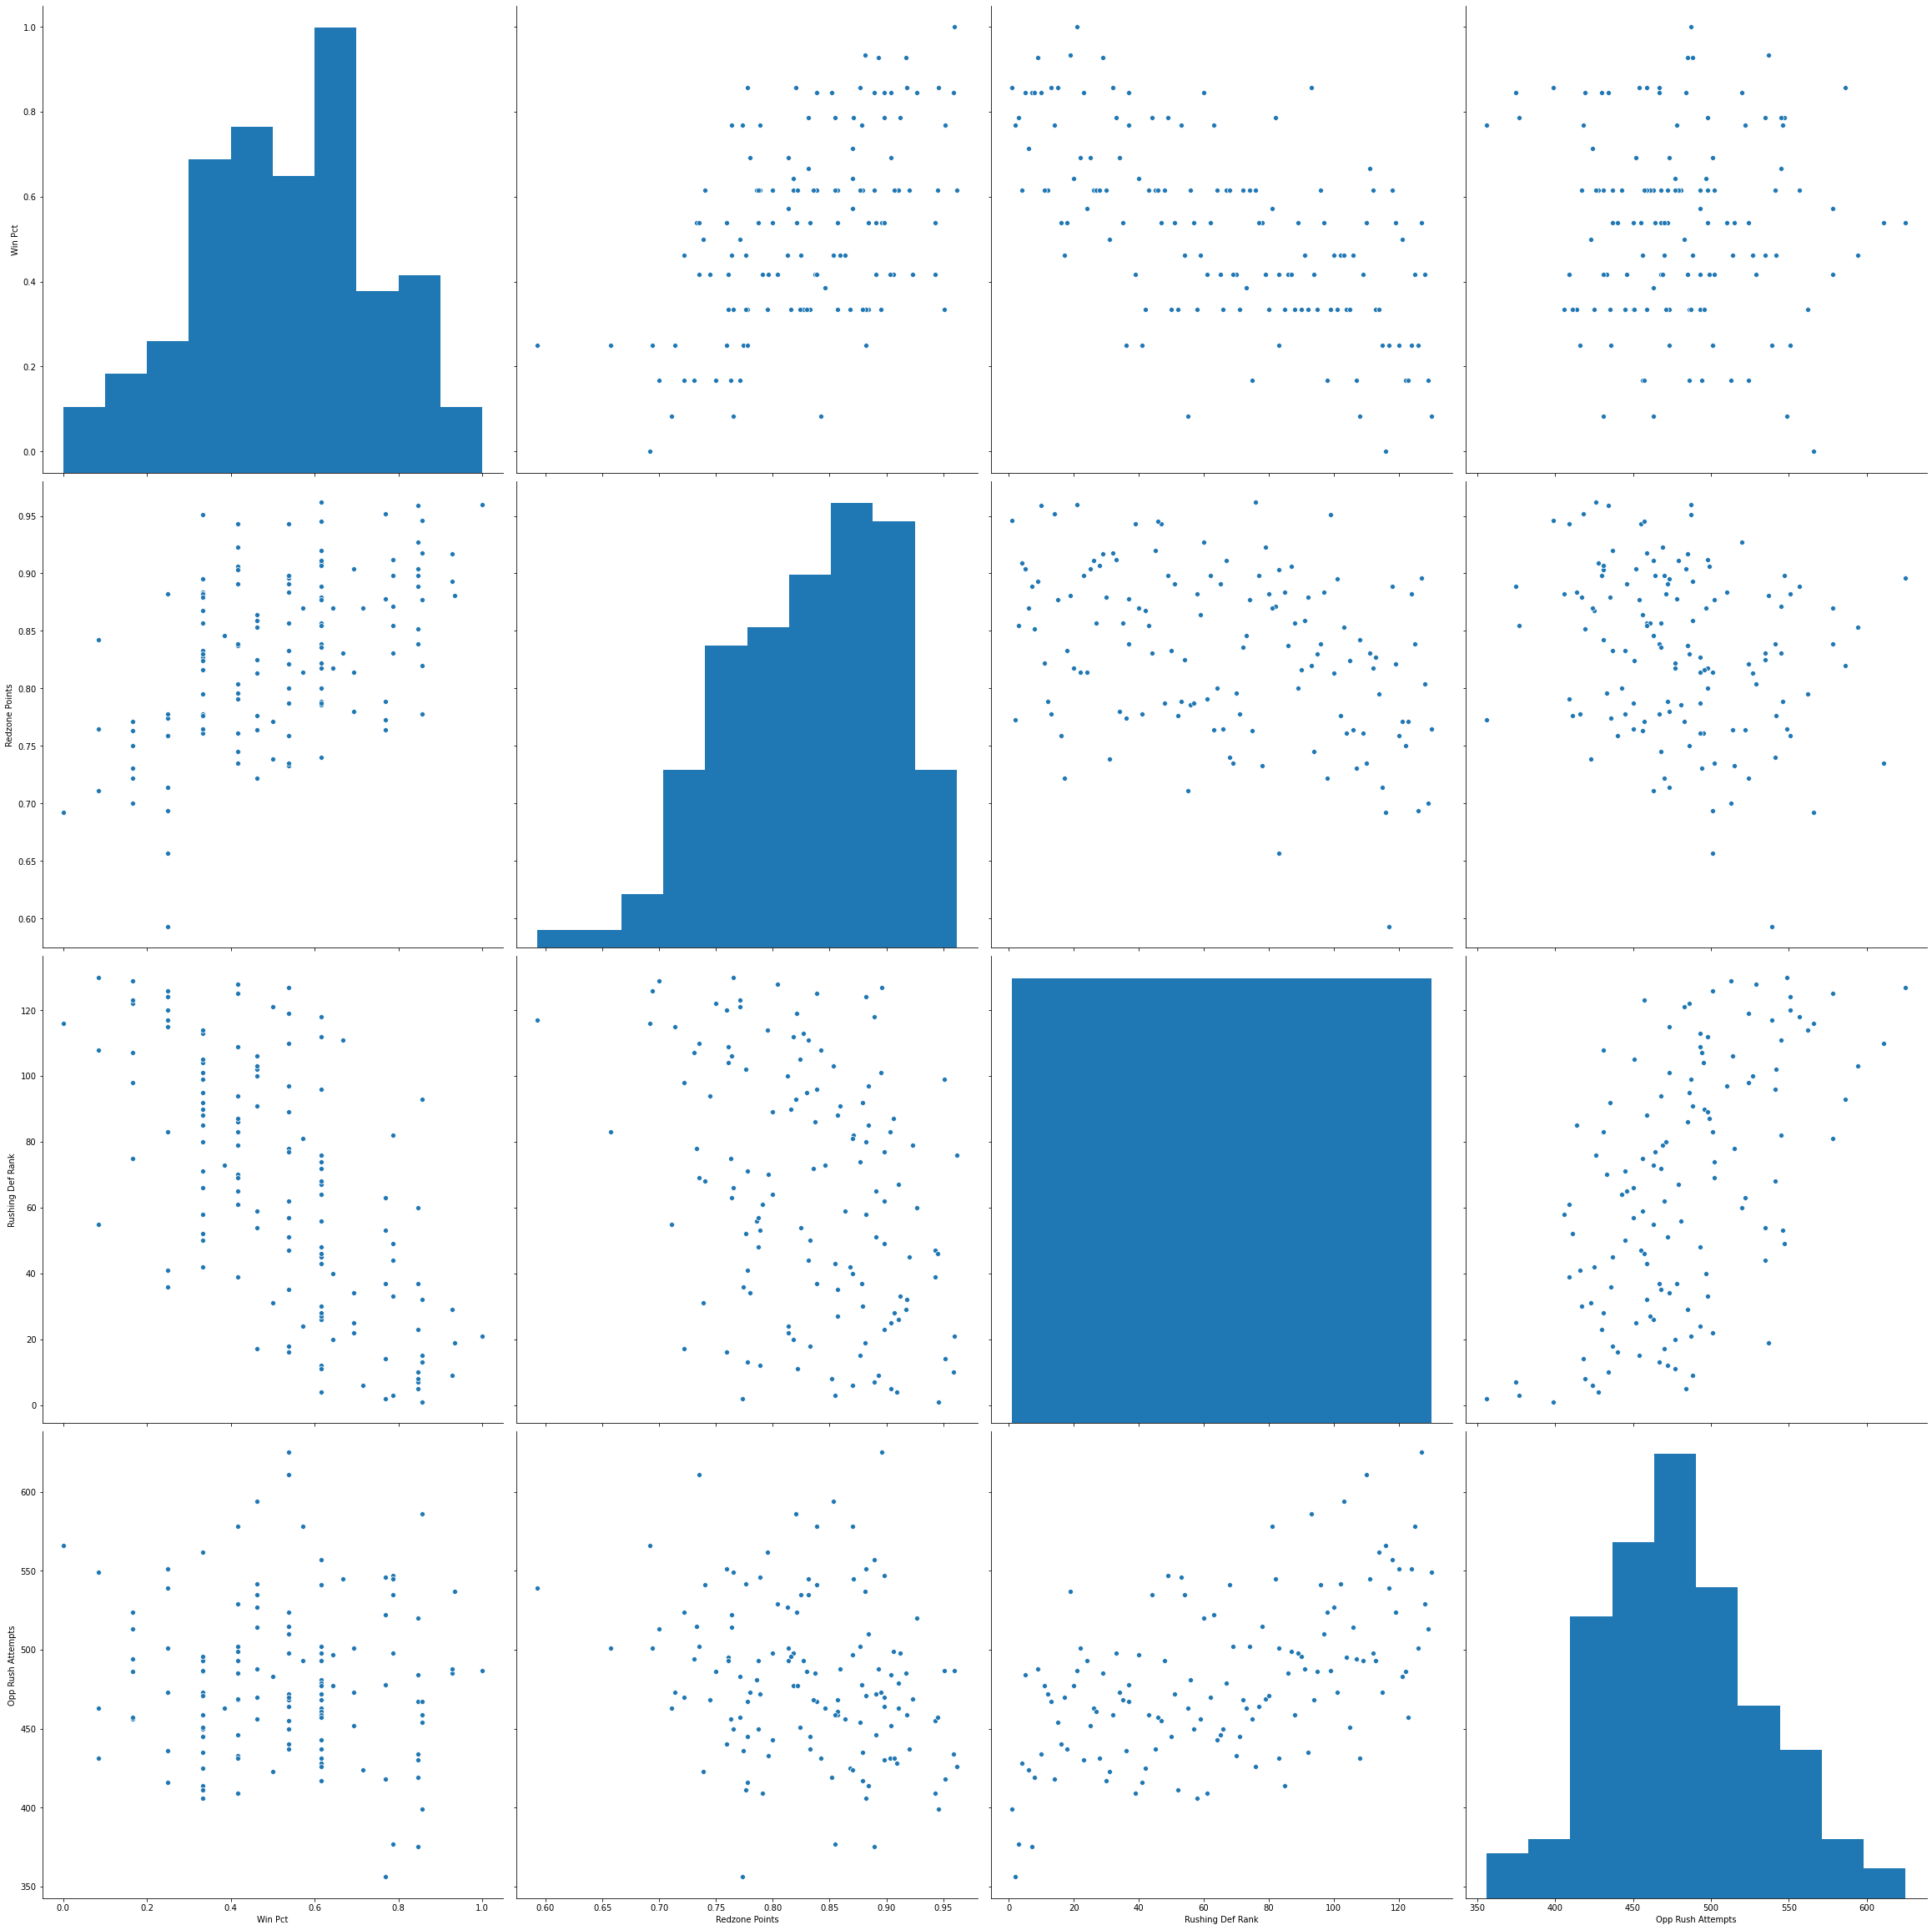

In [35]:
sns.pairplot(cfb[['Win Pct','Redzone Points','Rushing Def Rank','Opp Rush Attempts']], height = 8)

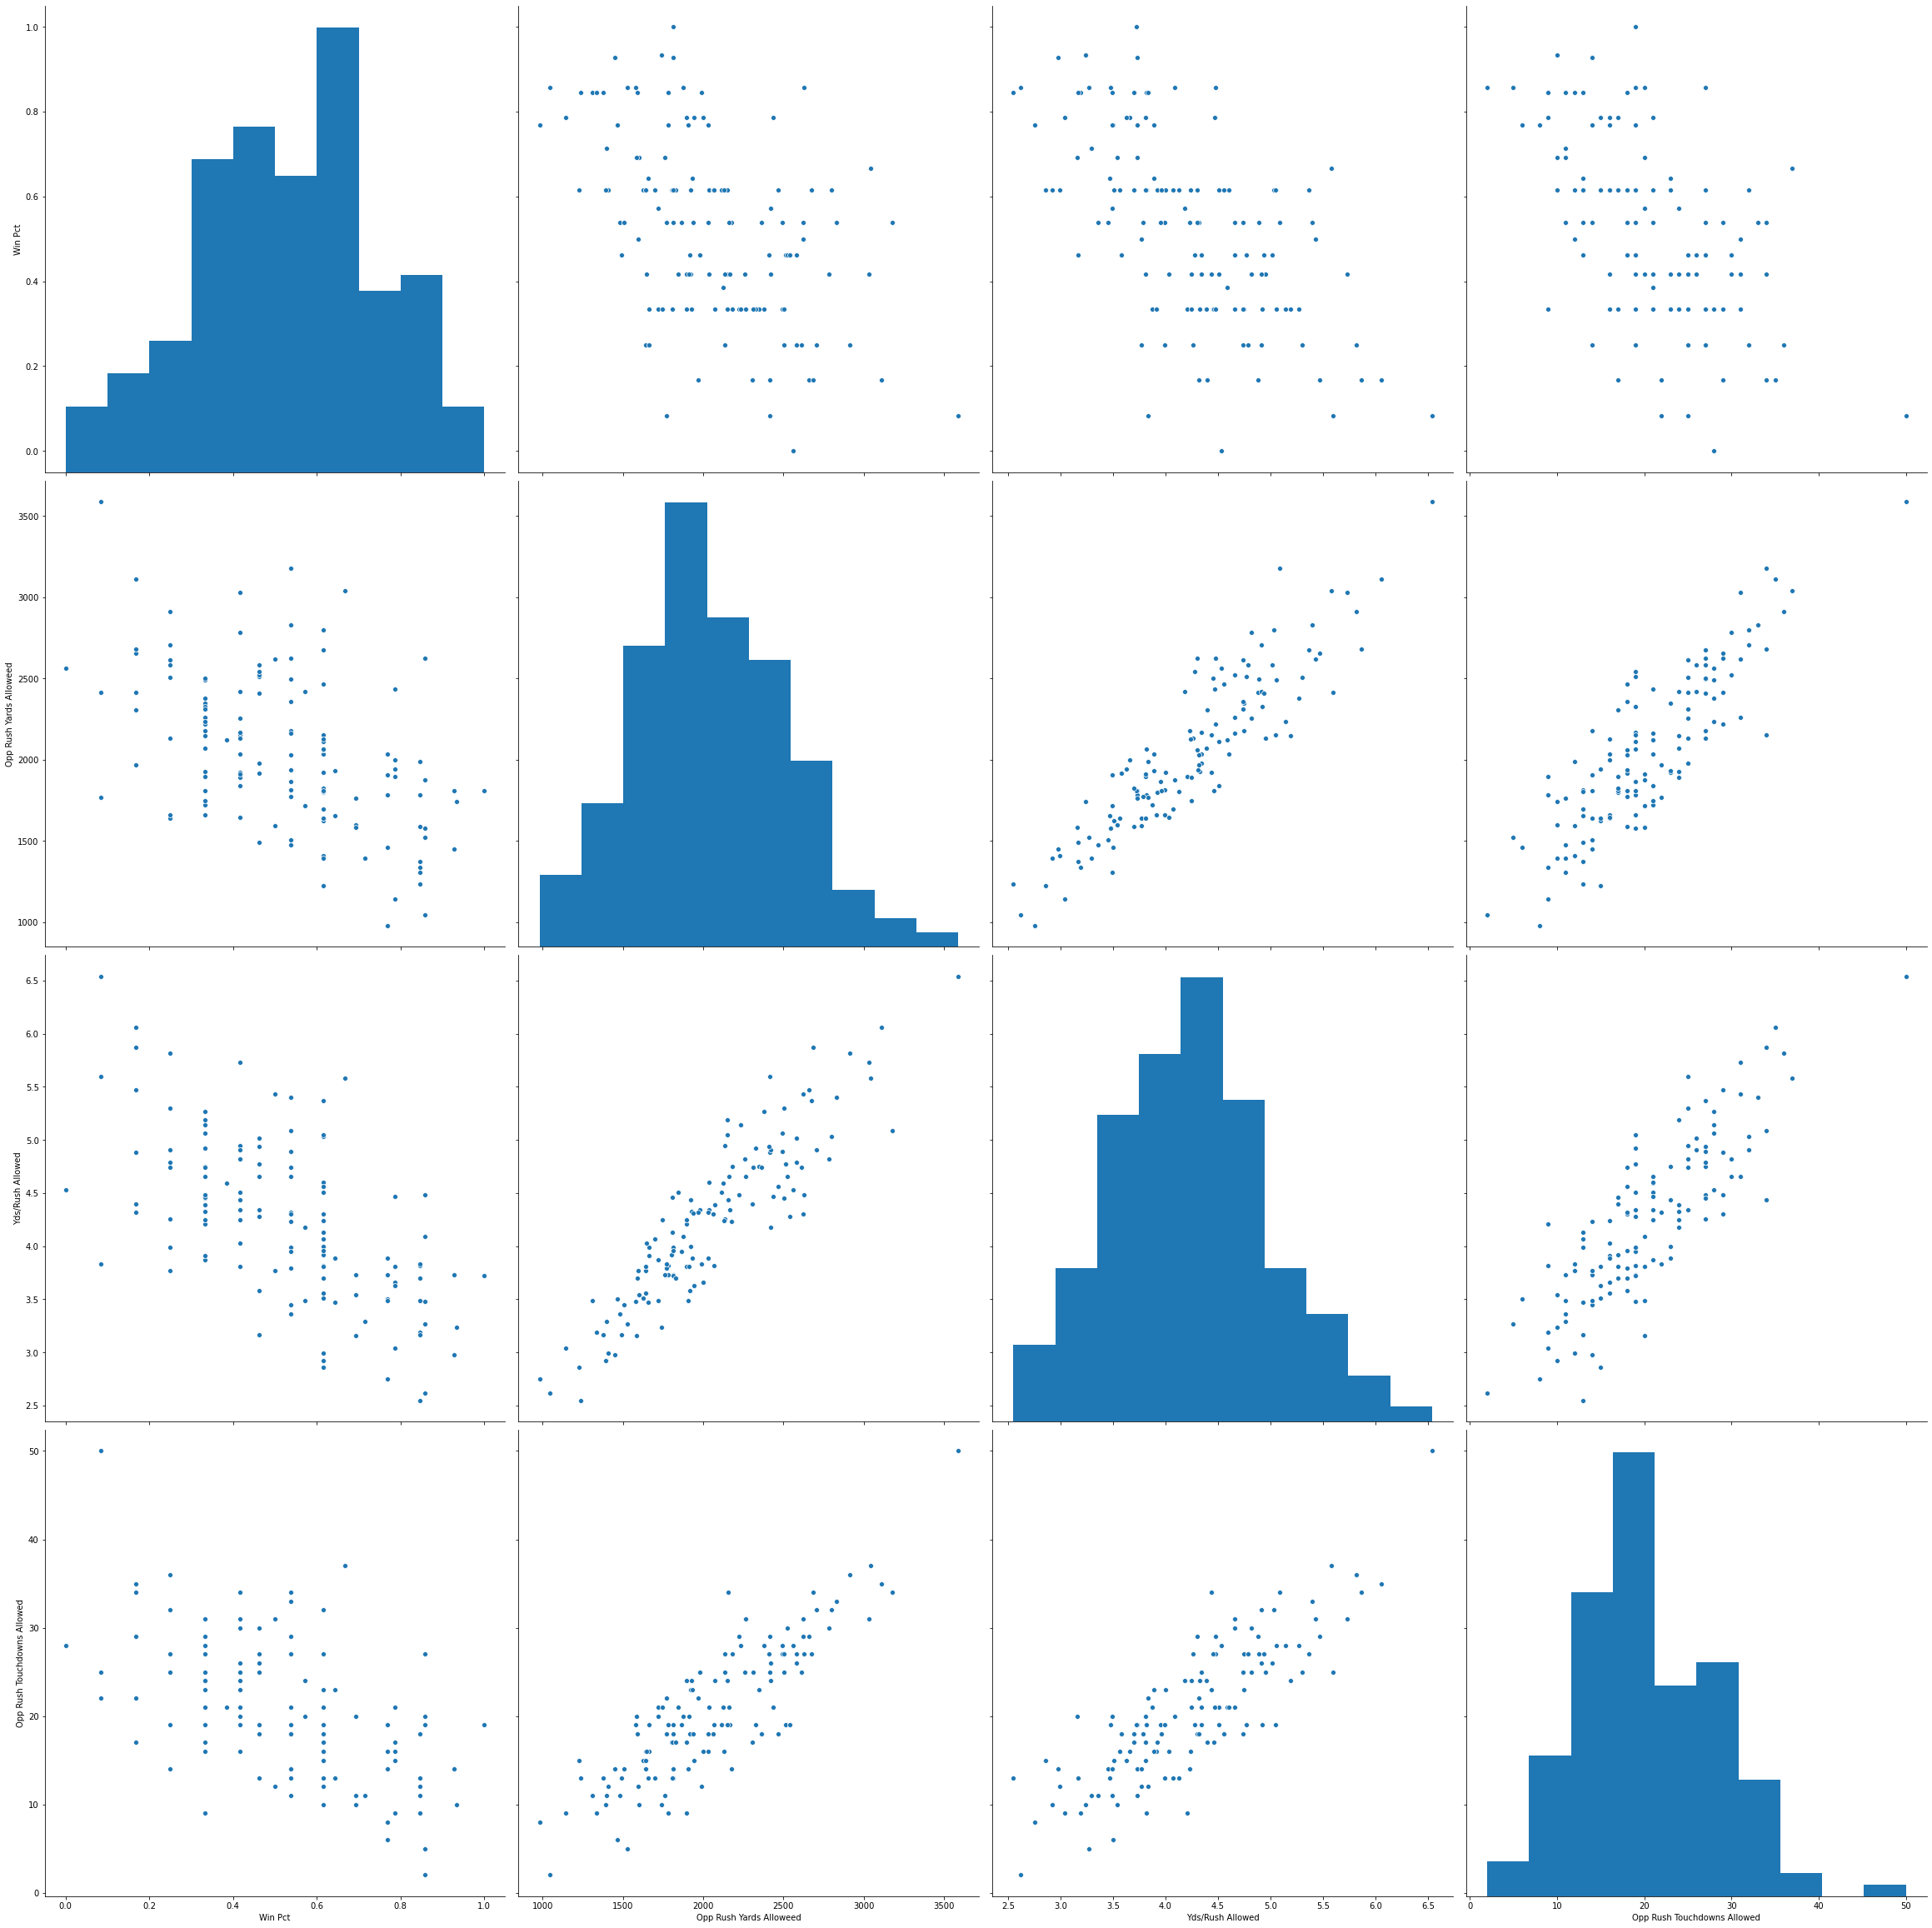

In [36]:
sns.pairplot(cfb[['Win Pct','Opp Rush Yards Alloweed','Yds/Rush Allowed','Opp Rush Touchdowns Allowed']], height = 8)

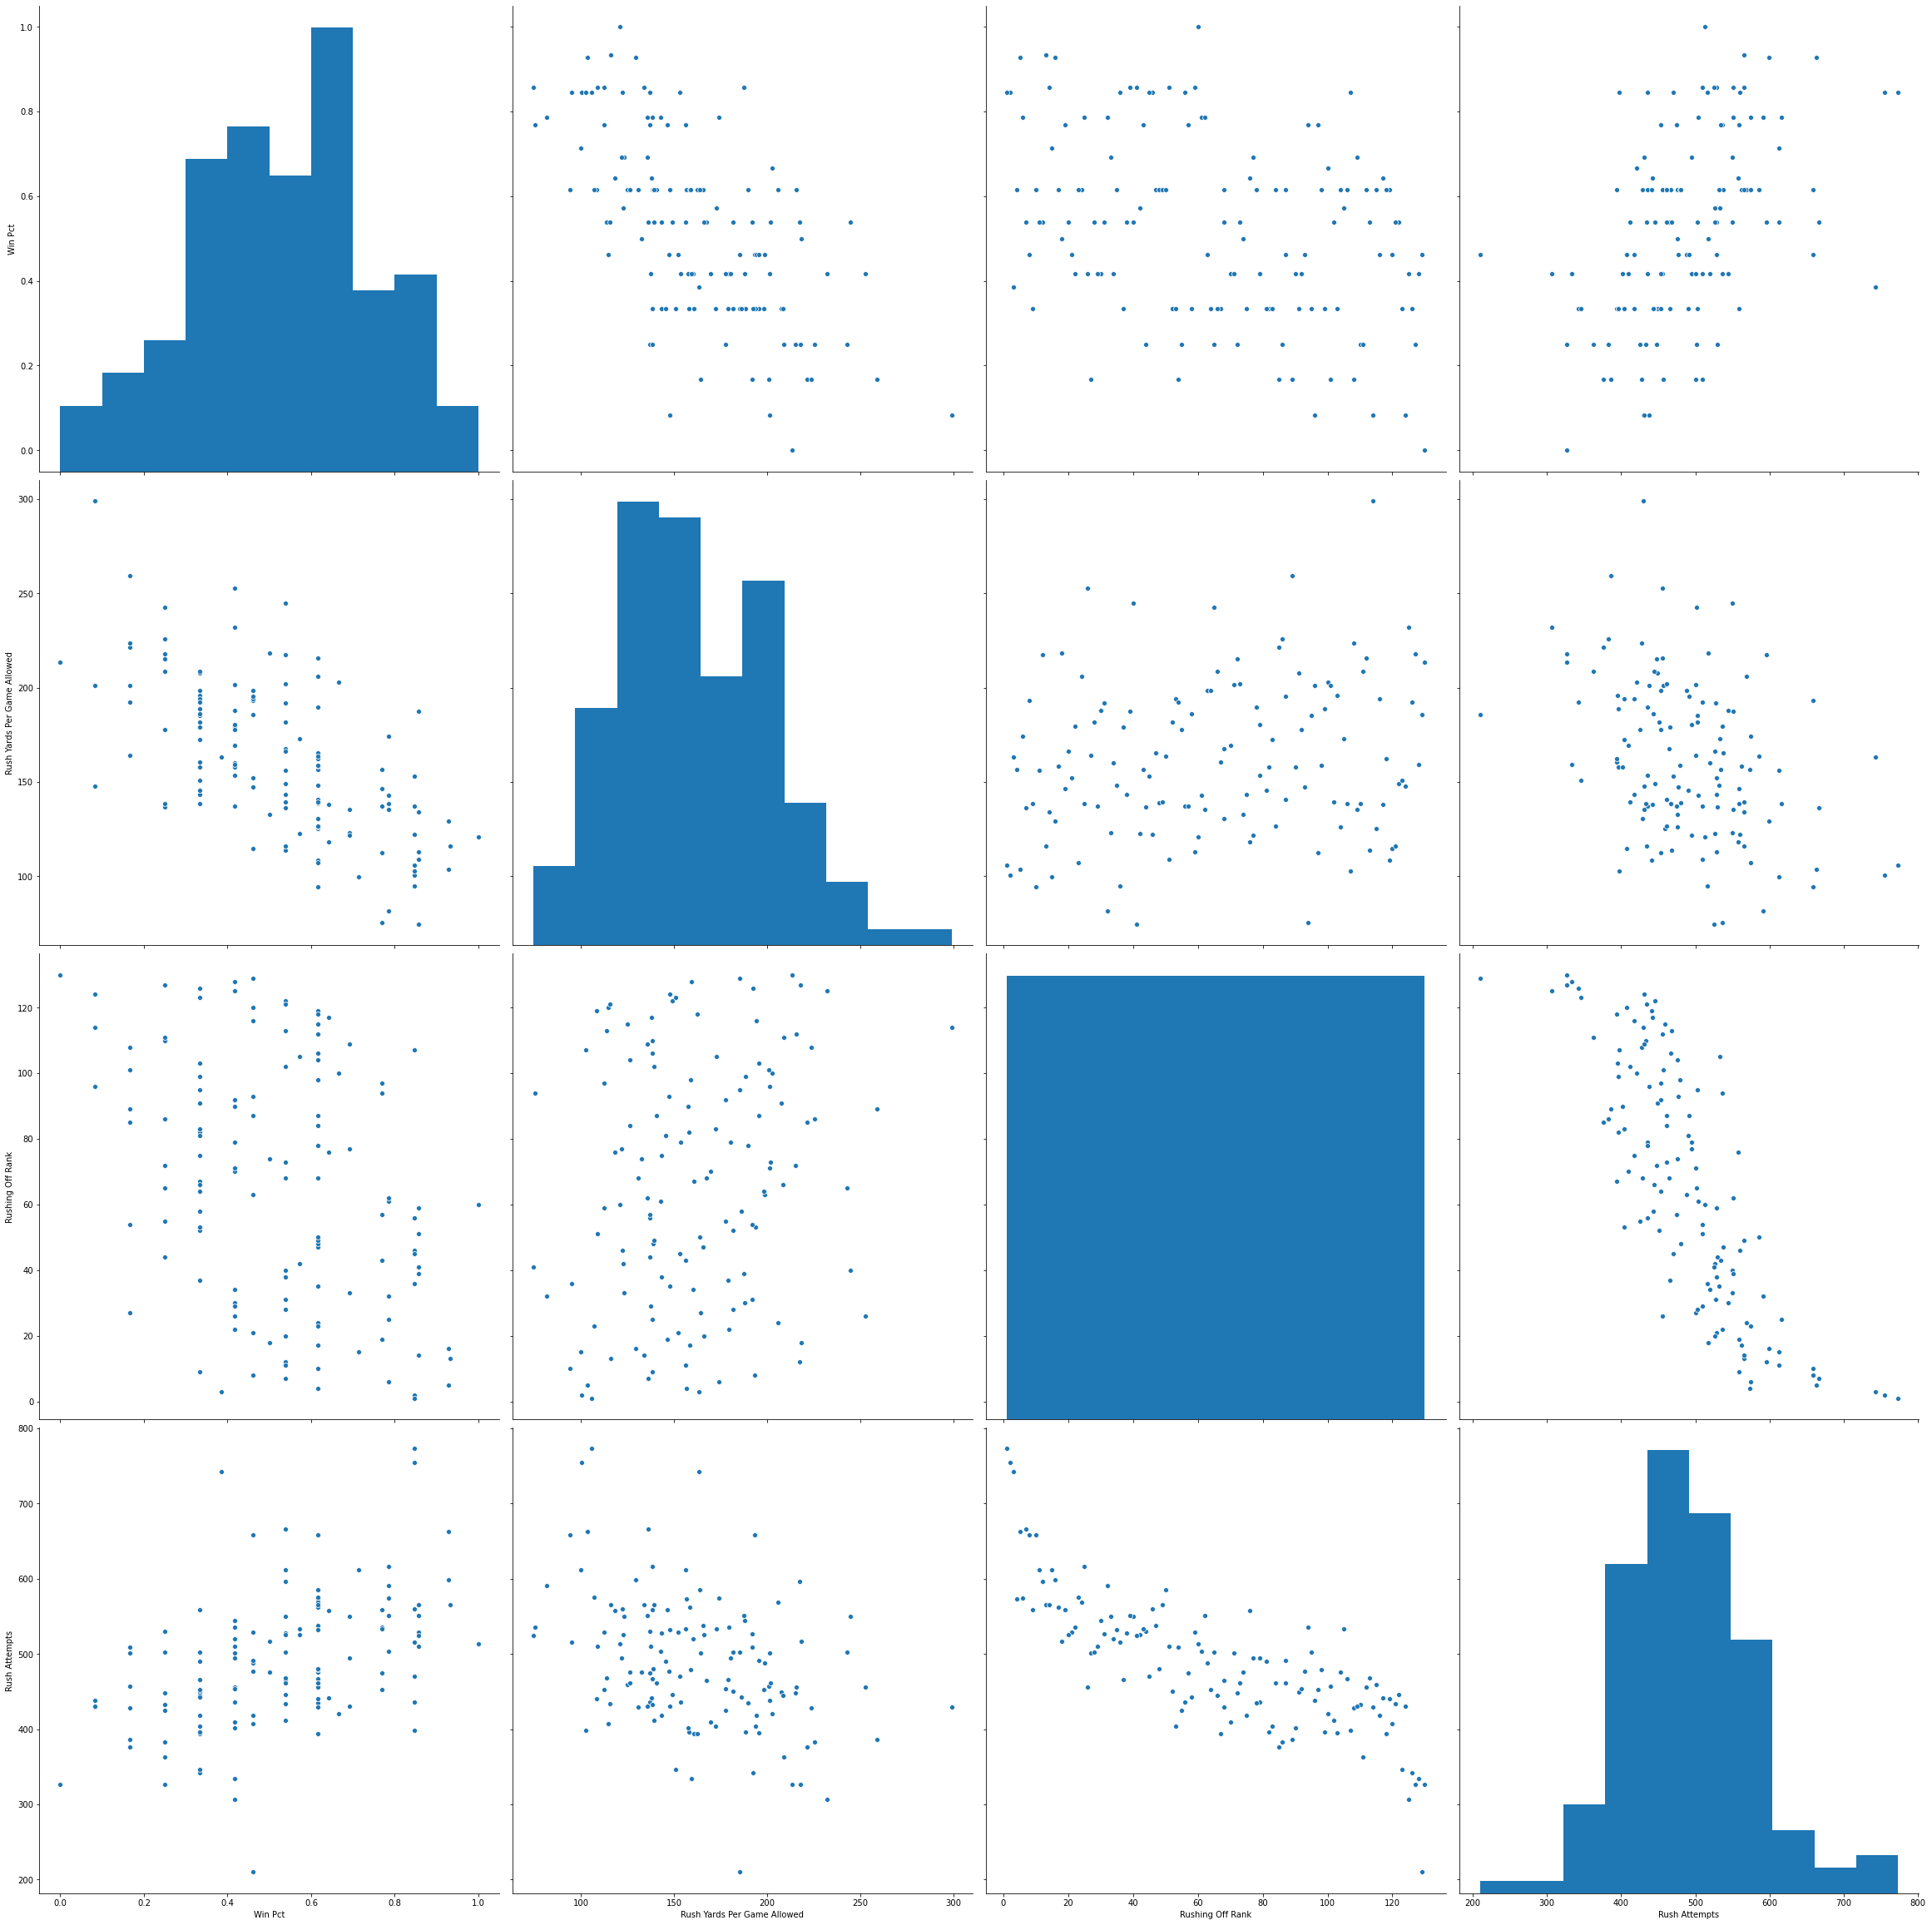

In [37]:
sns.pairplot(cfb[['Win Pct','Rush Yards Per Game Allowed','Rushing Off Rank','Rush Attempts']], height = 8)

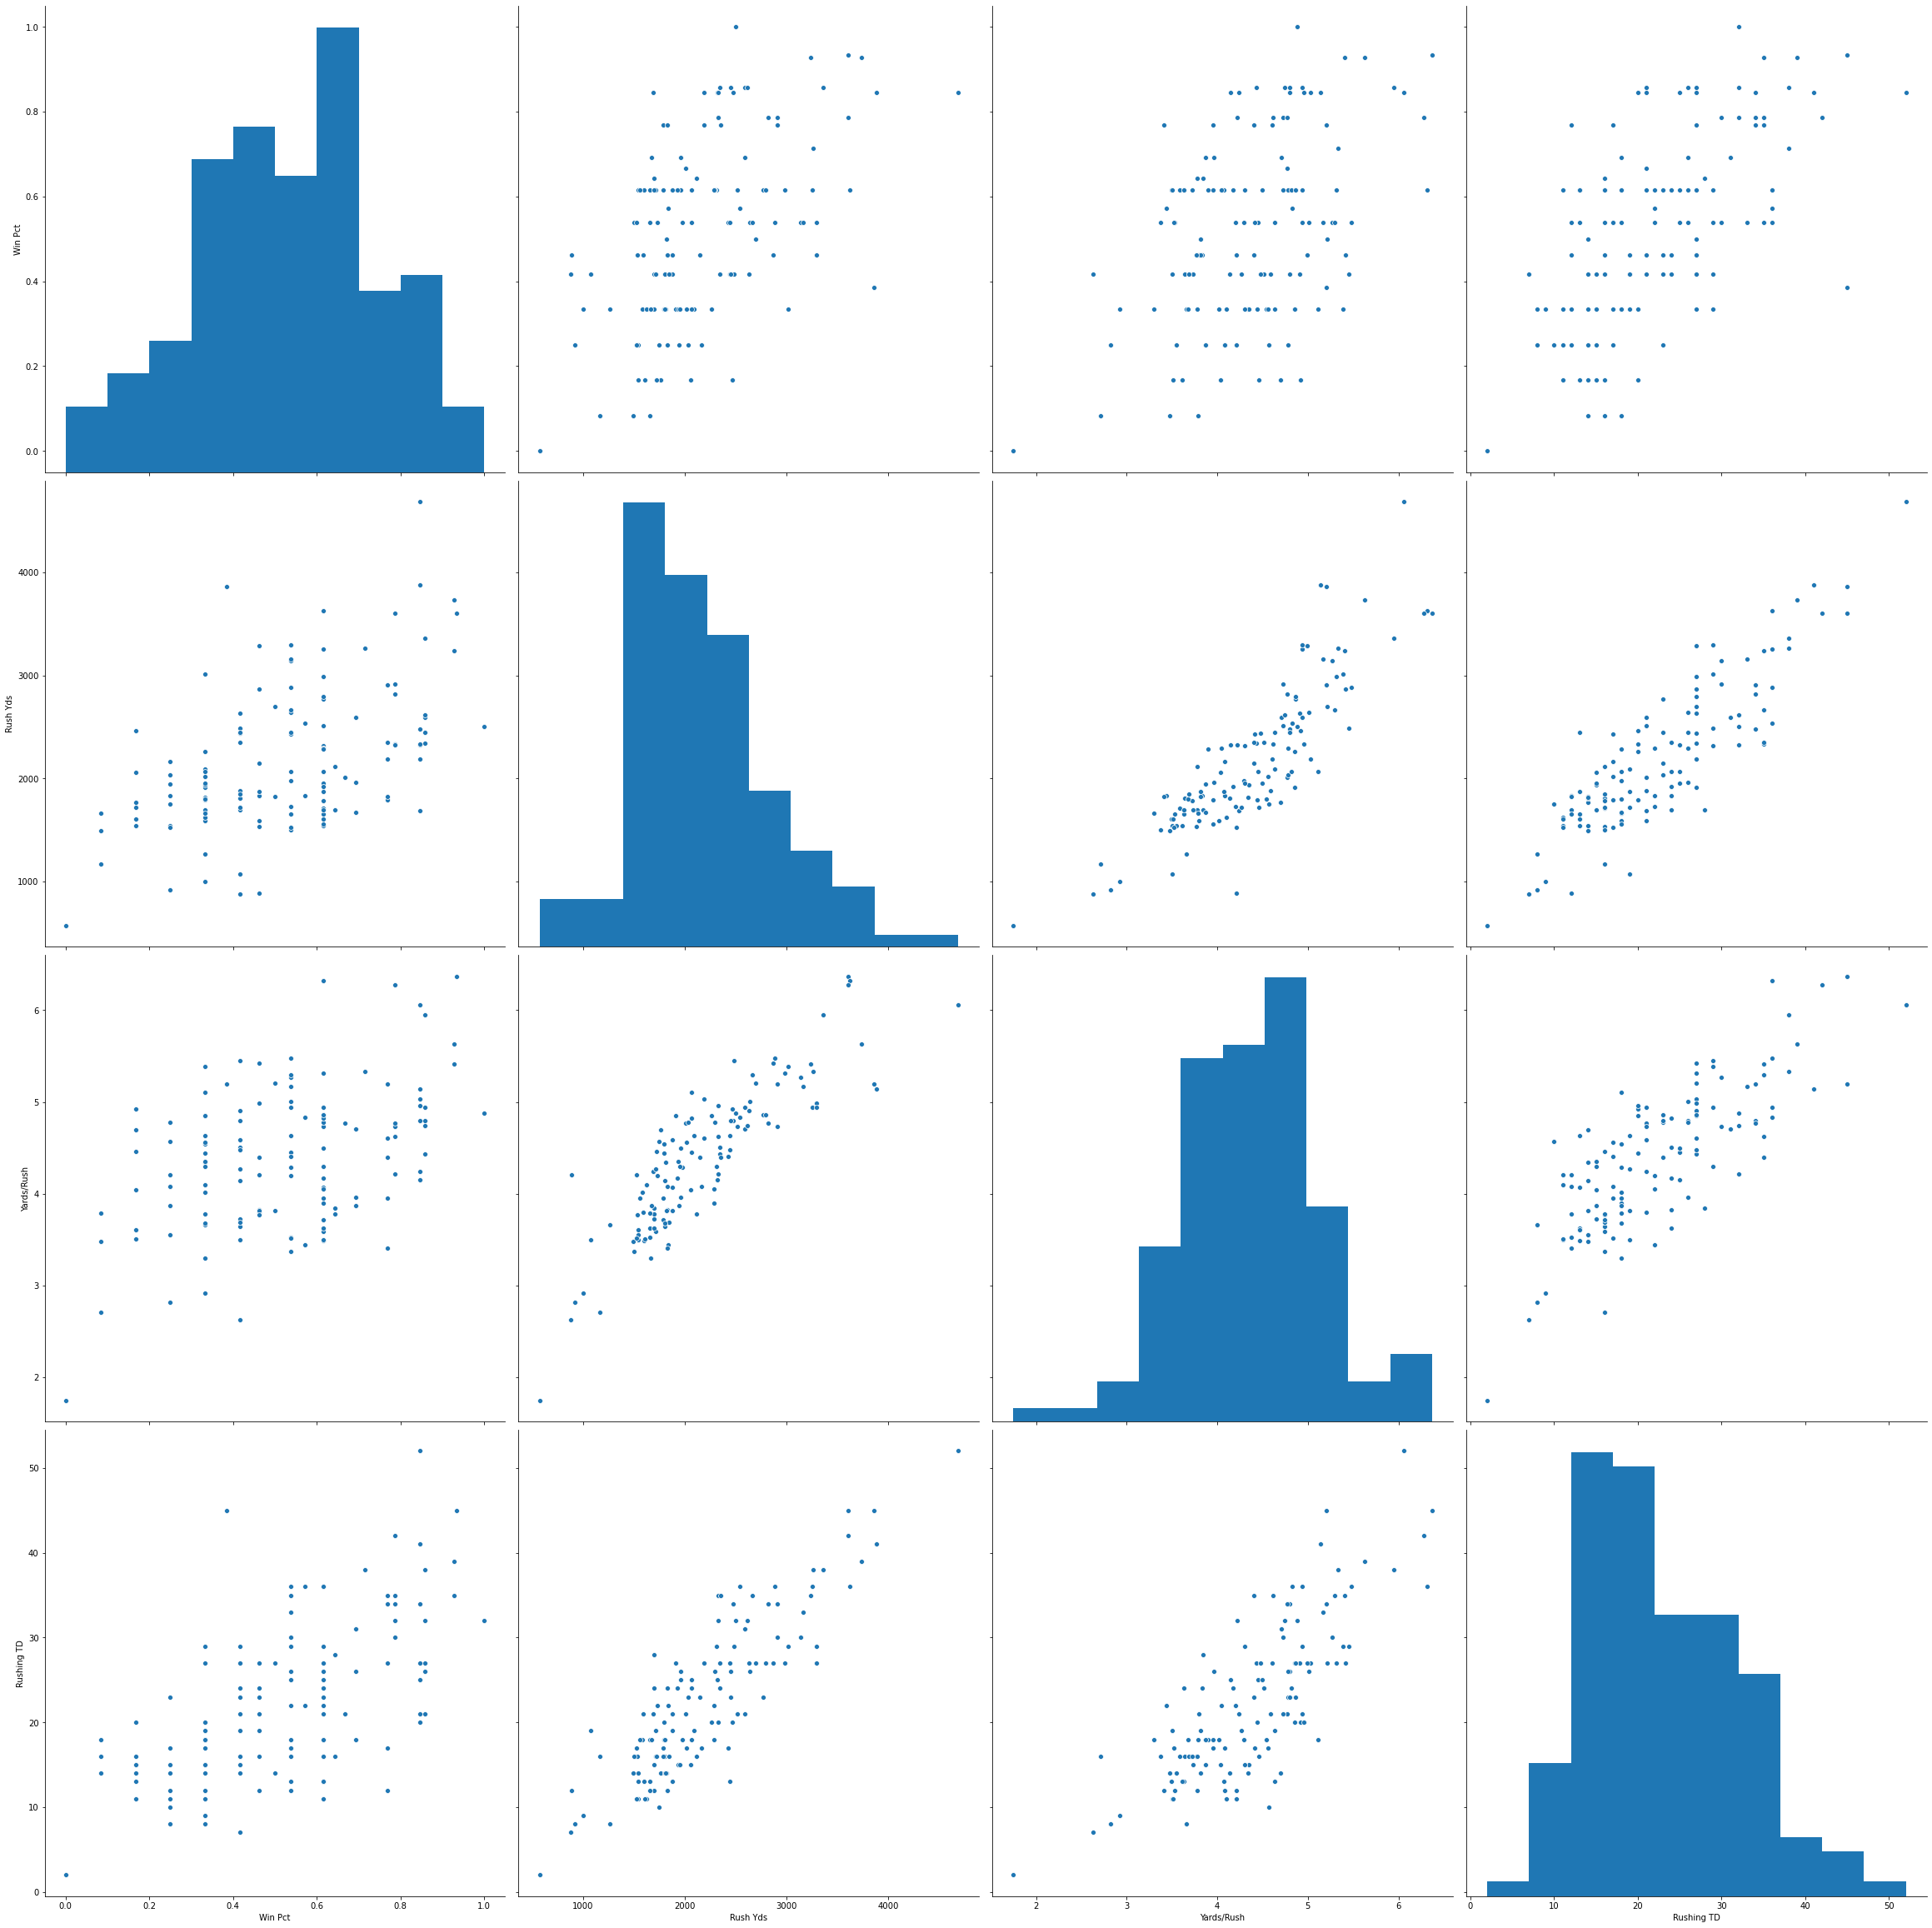

In [38]:
sns.pairplot(cfb[['Win Pct','Rush Yds','Yards/Rush','Rushing TD']], height = 8)

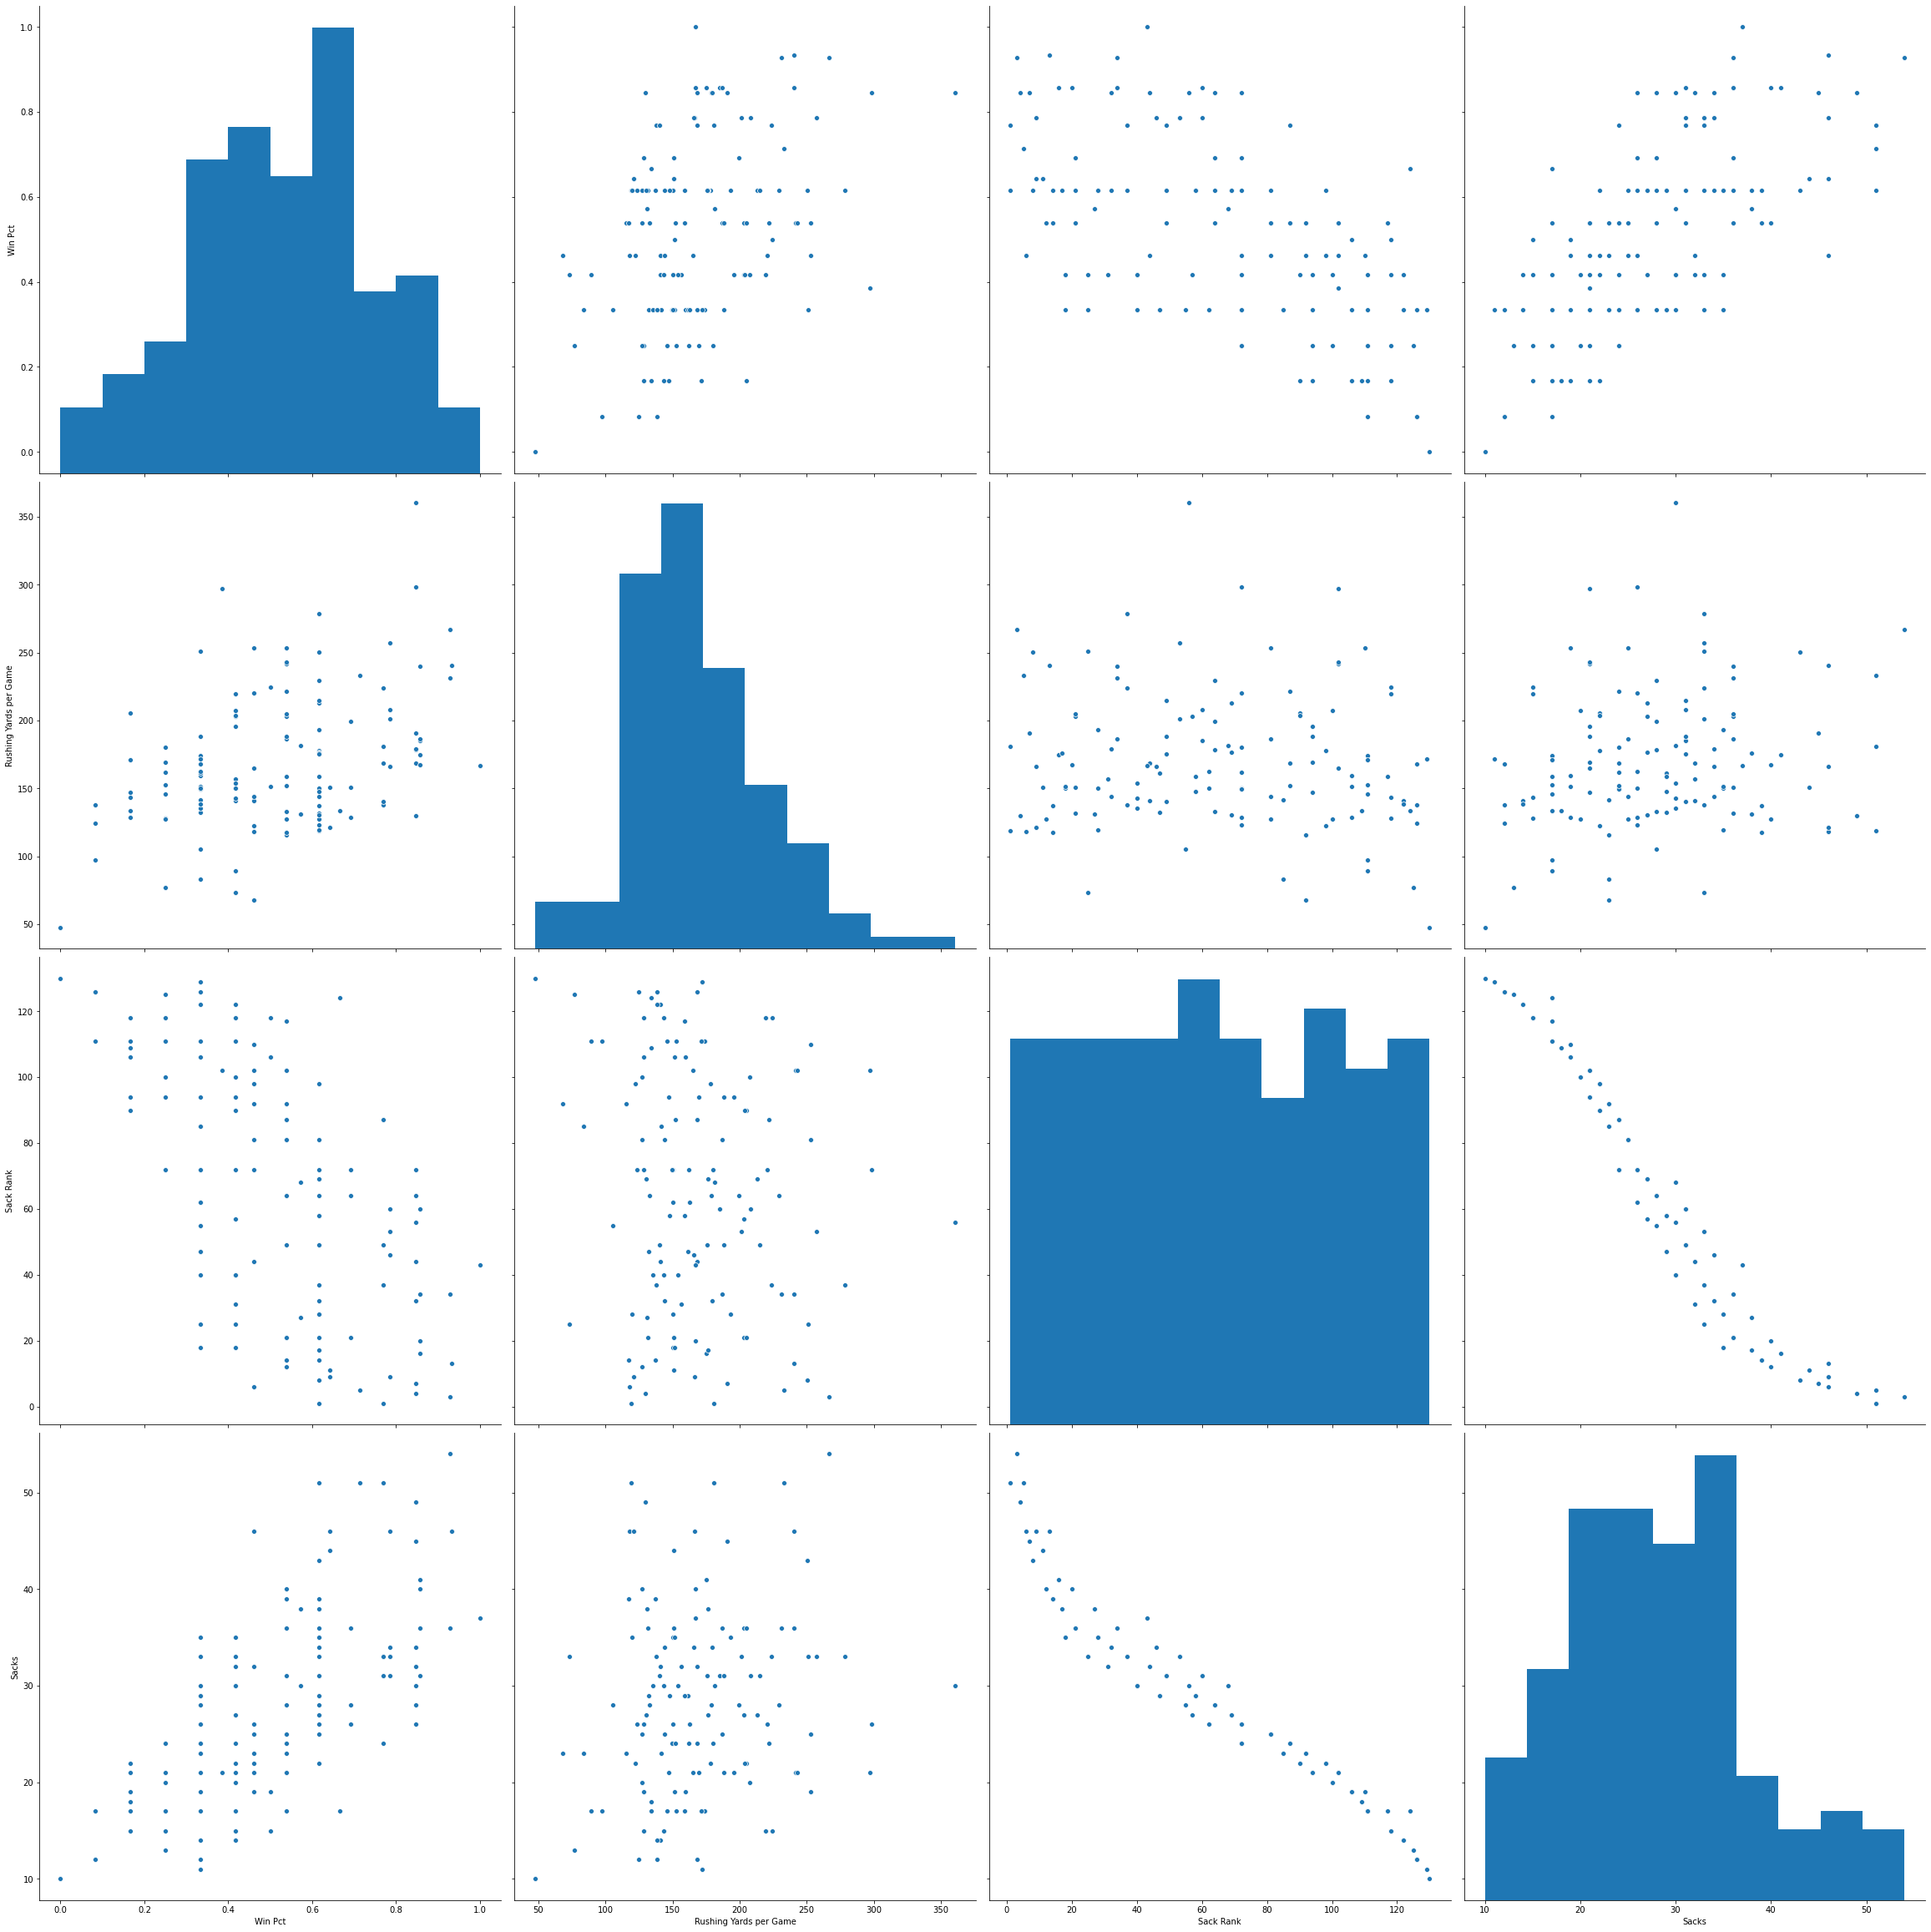

In [39]:
sns.pairplot(cfb[['Win Pct','Rushing Yards per Game','Sack Rank','Sacks']], height = 8)

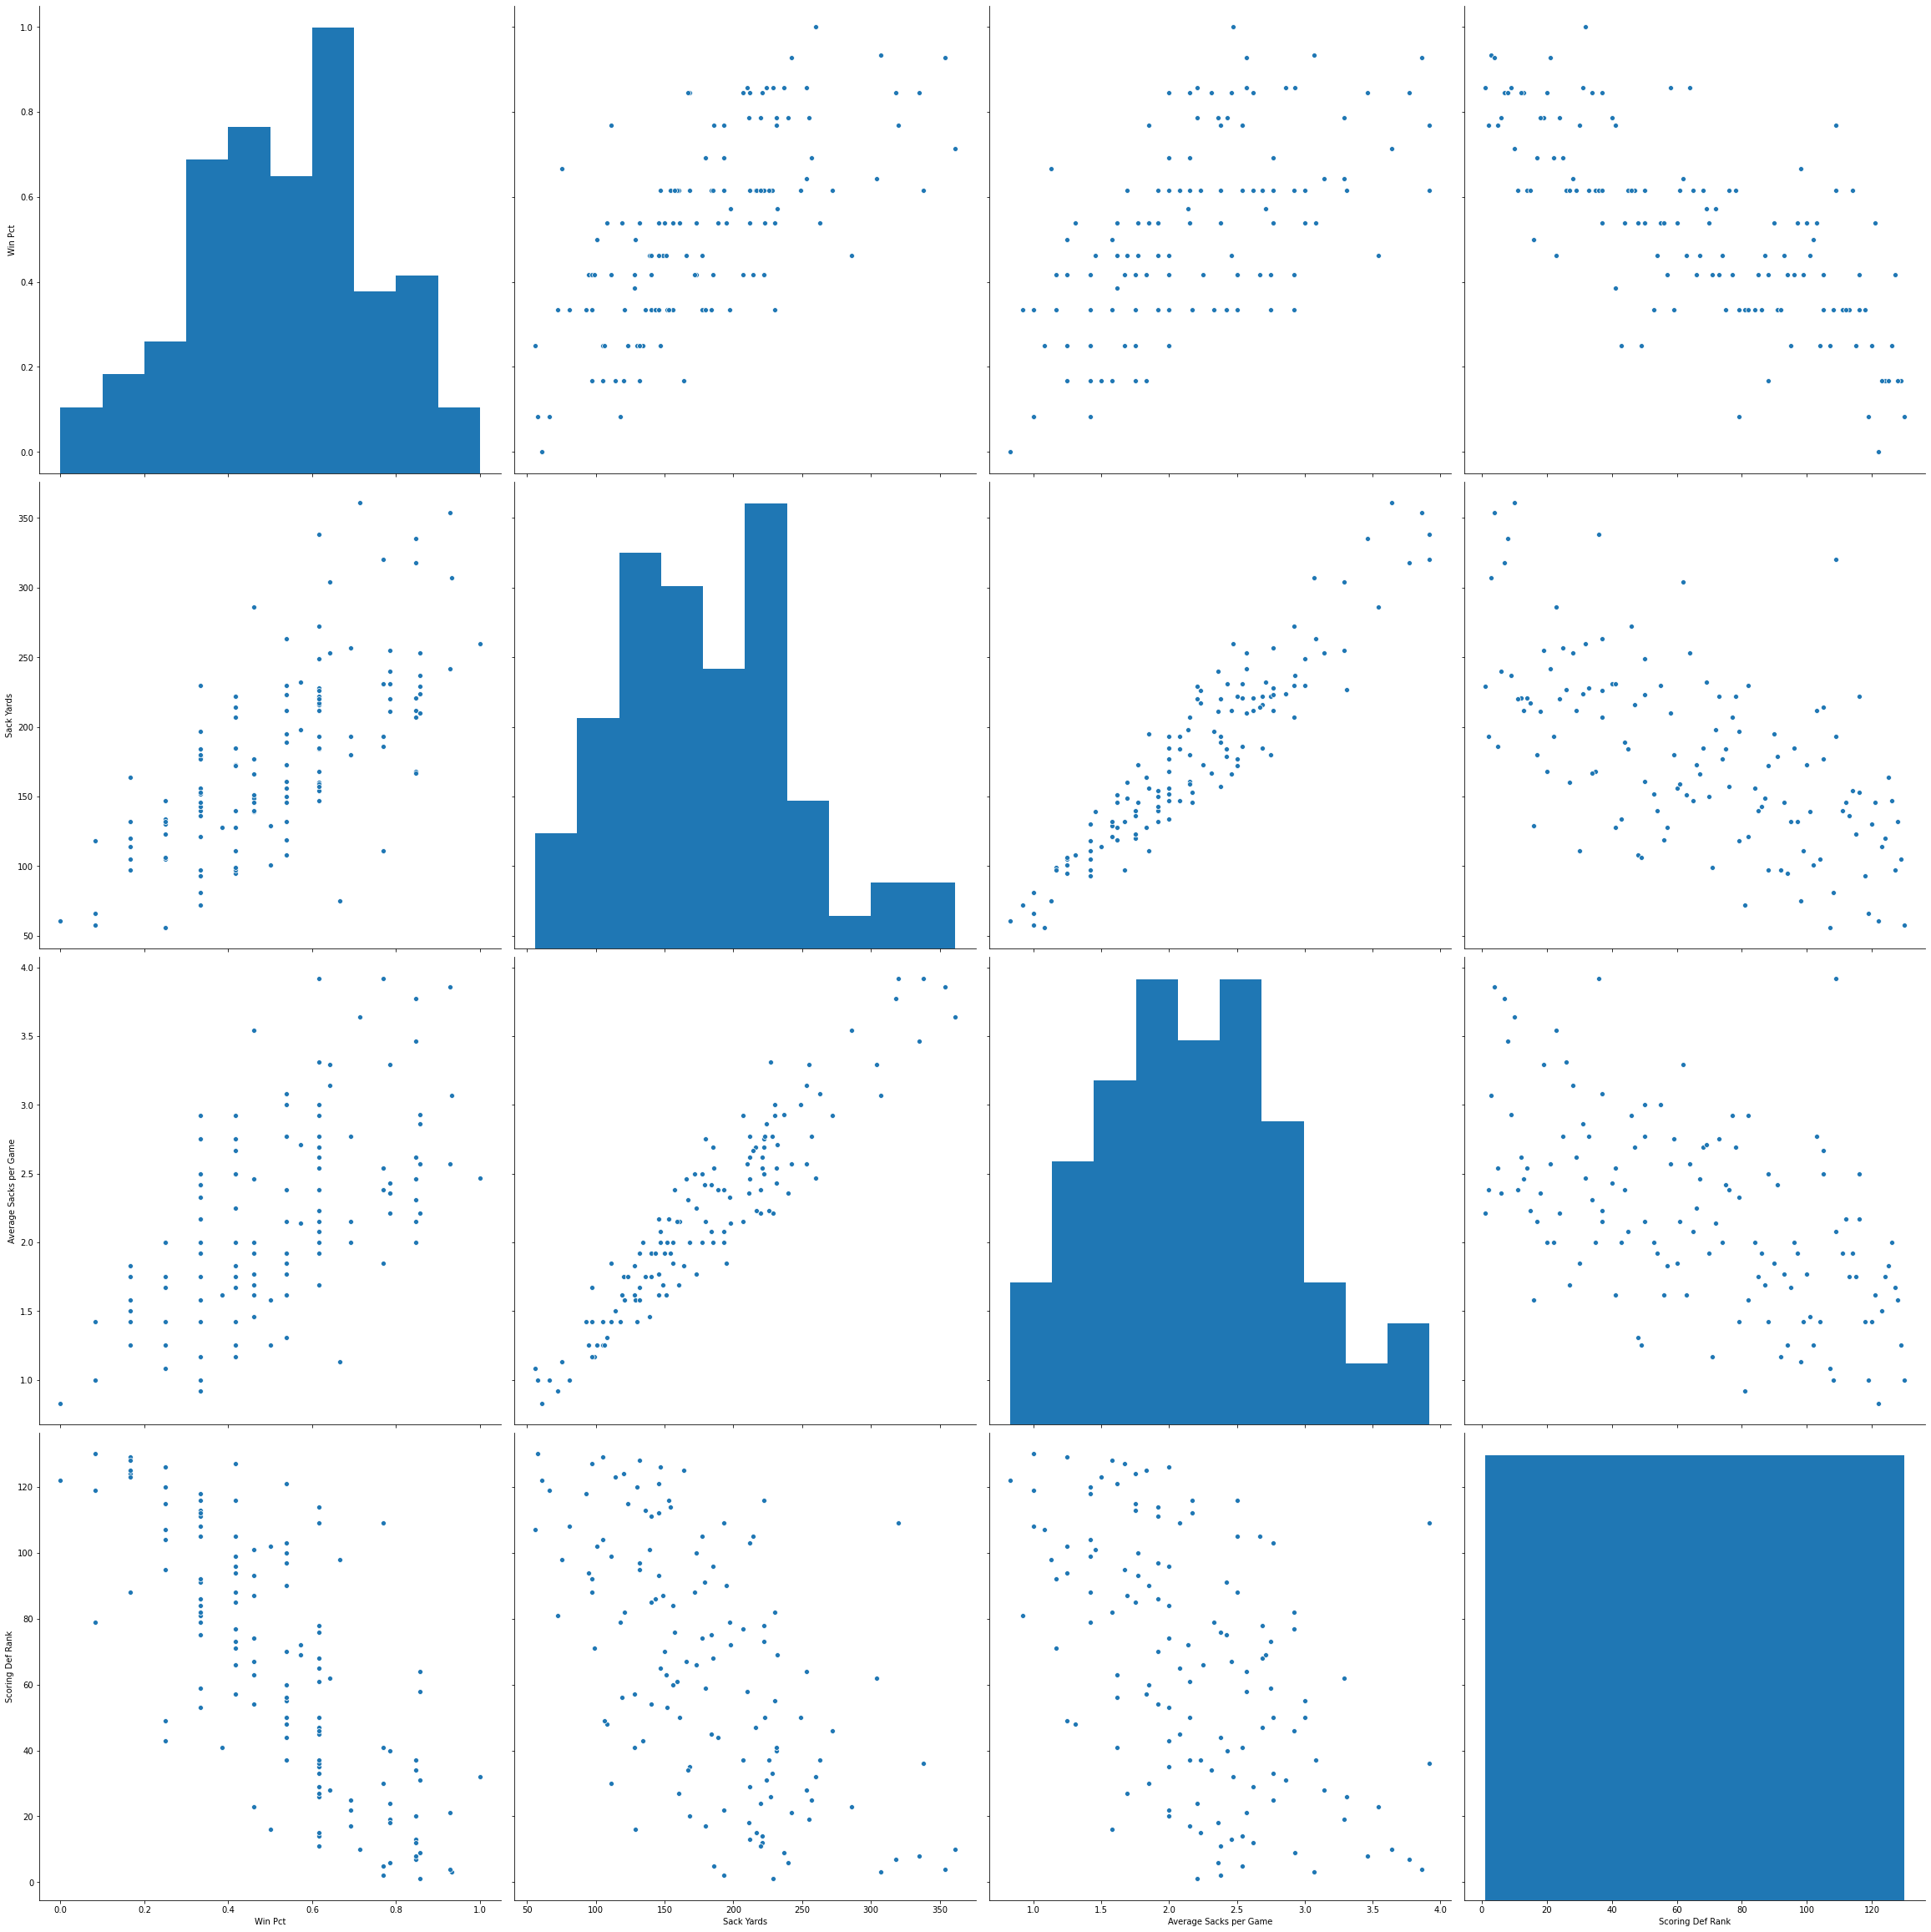

In [40]:
sns.pairplot(cfb[['Win Pct','Sack Yards','Average Sacks per Game','Scoring Def Rank']], height = 8)

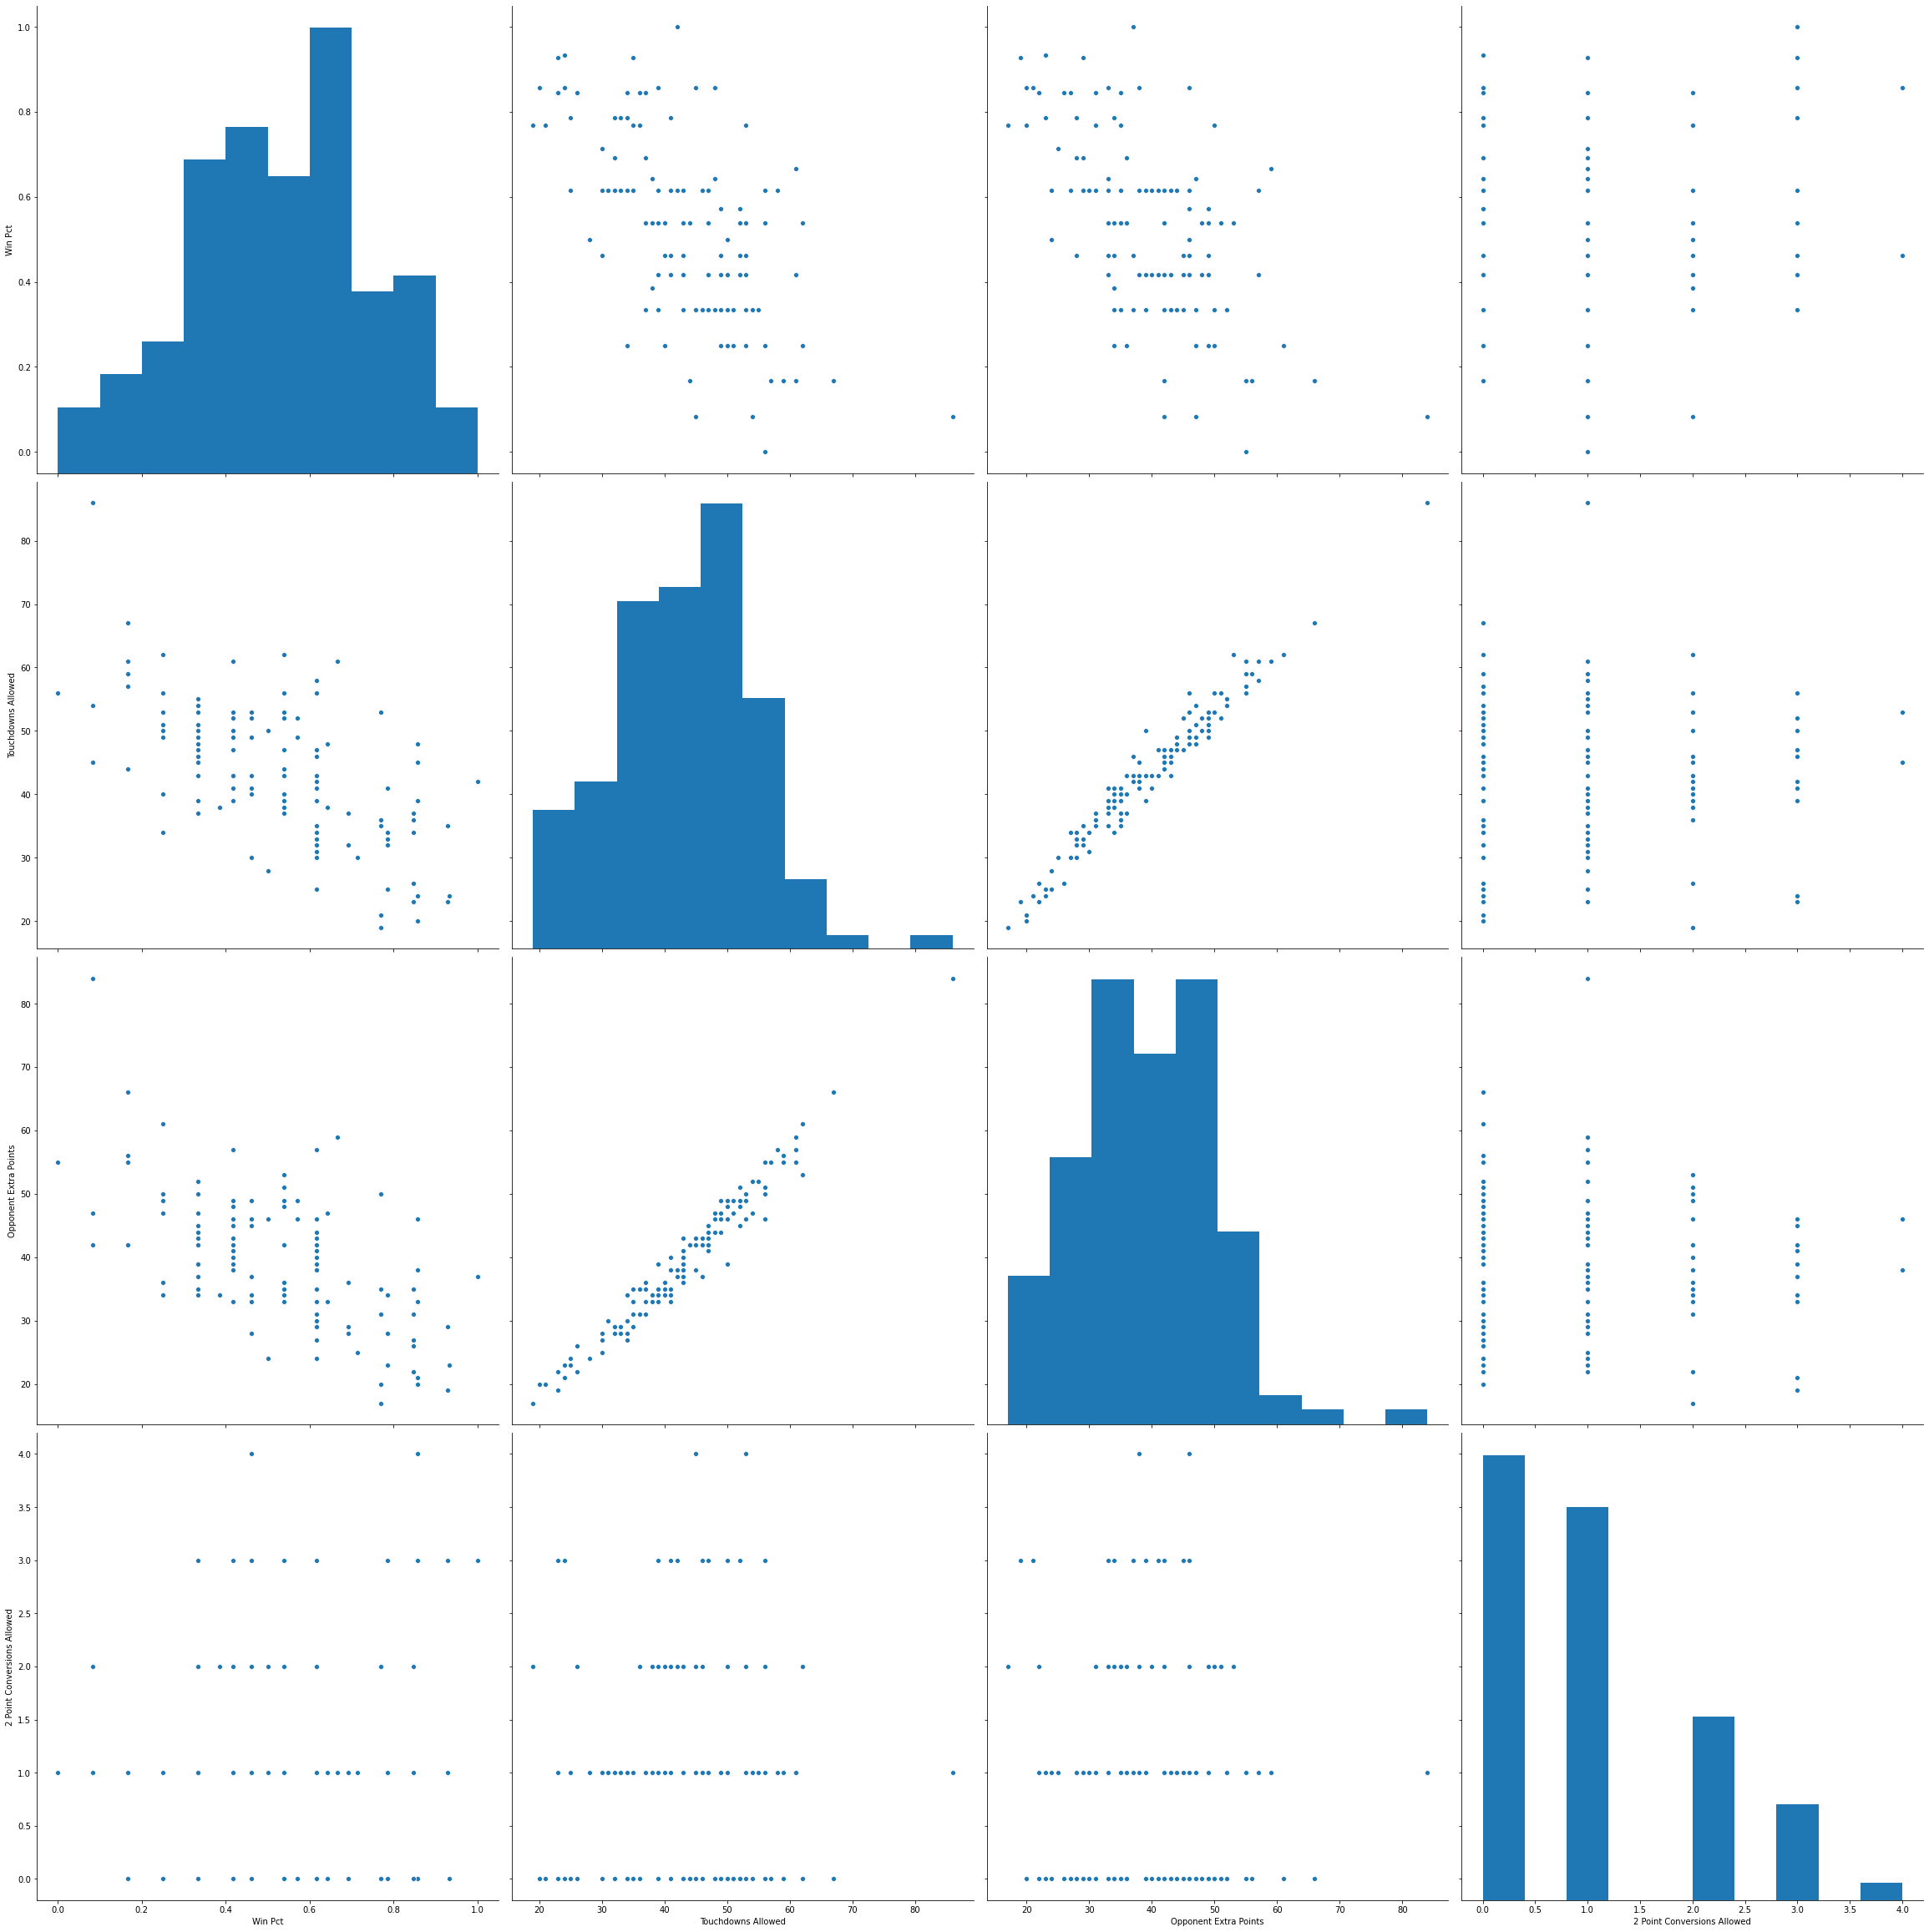

In [41]:
sns.pairplot(cfb[['Win Pct','Touchdowns Allowed','Opponent Extra Points','2 Point Conversions Allowed']], height = 8)

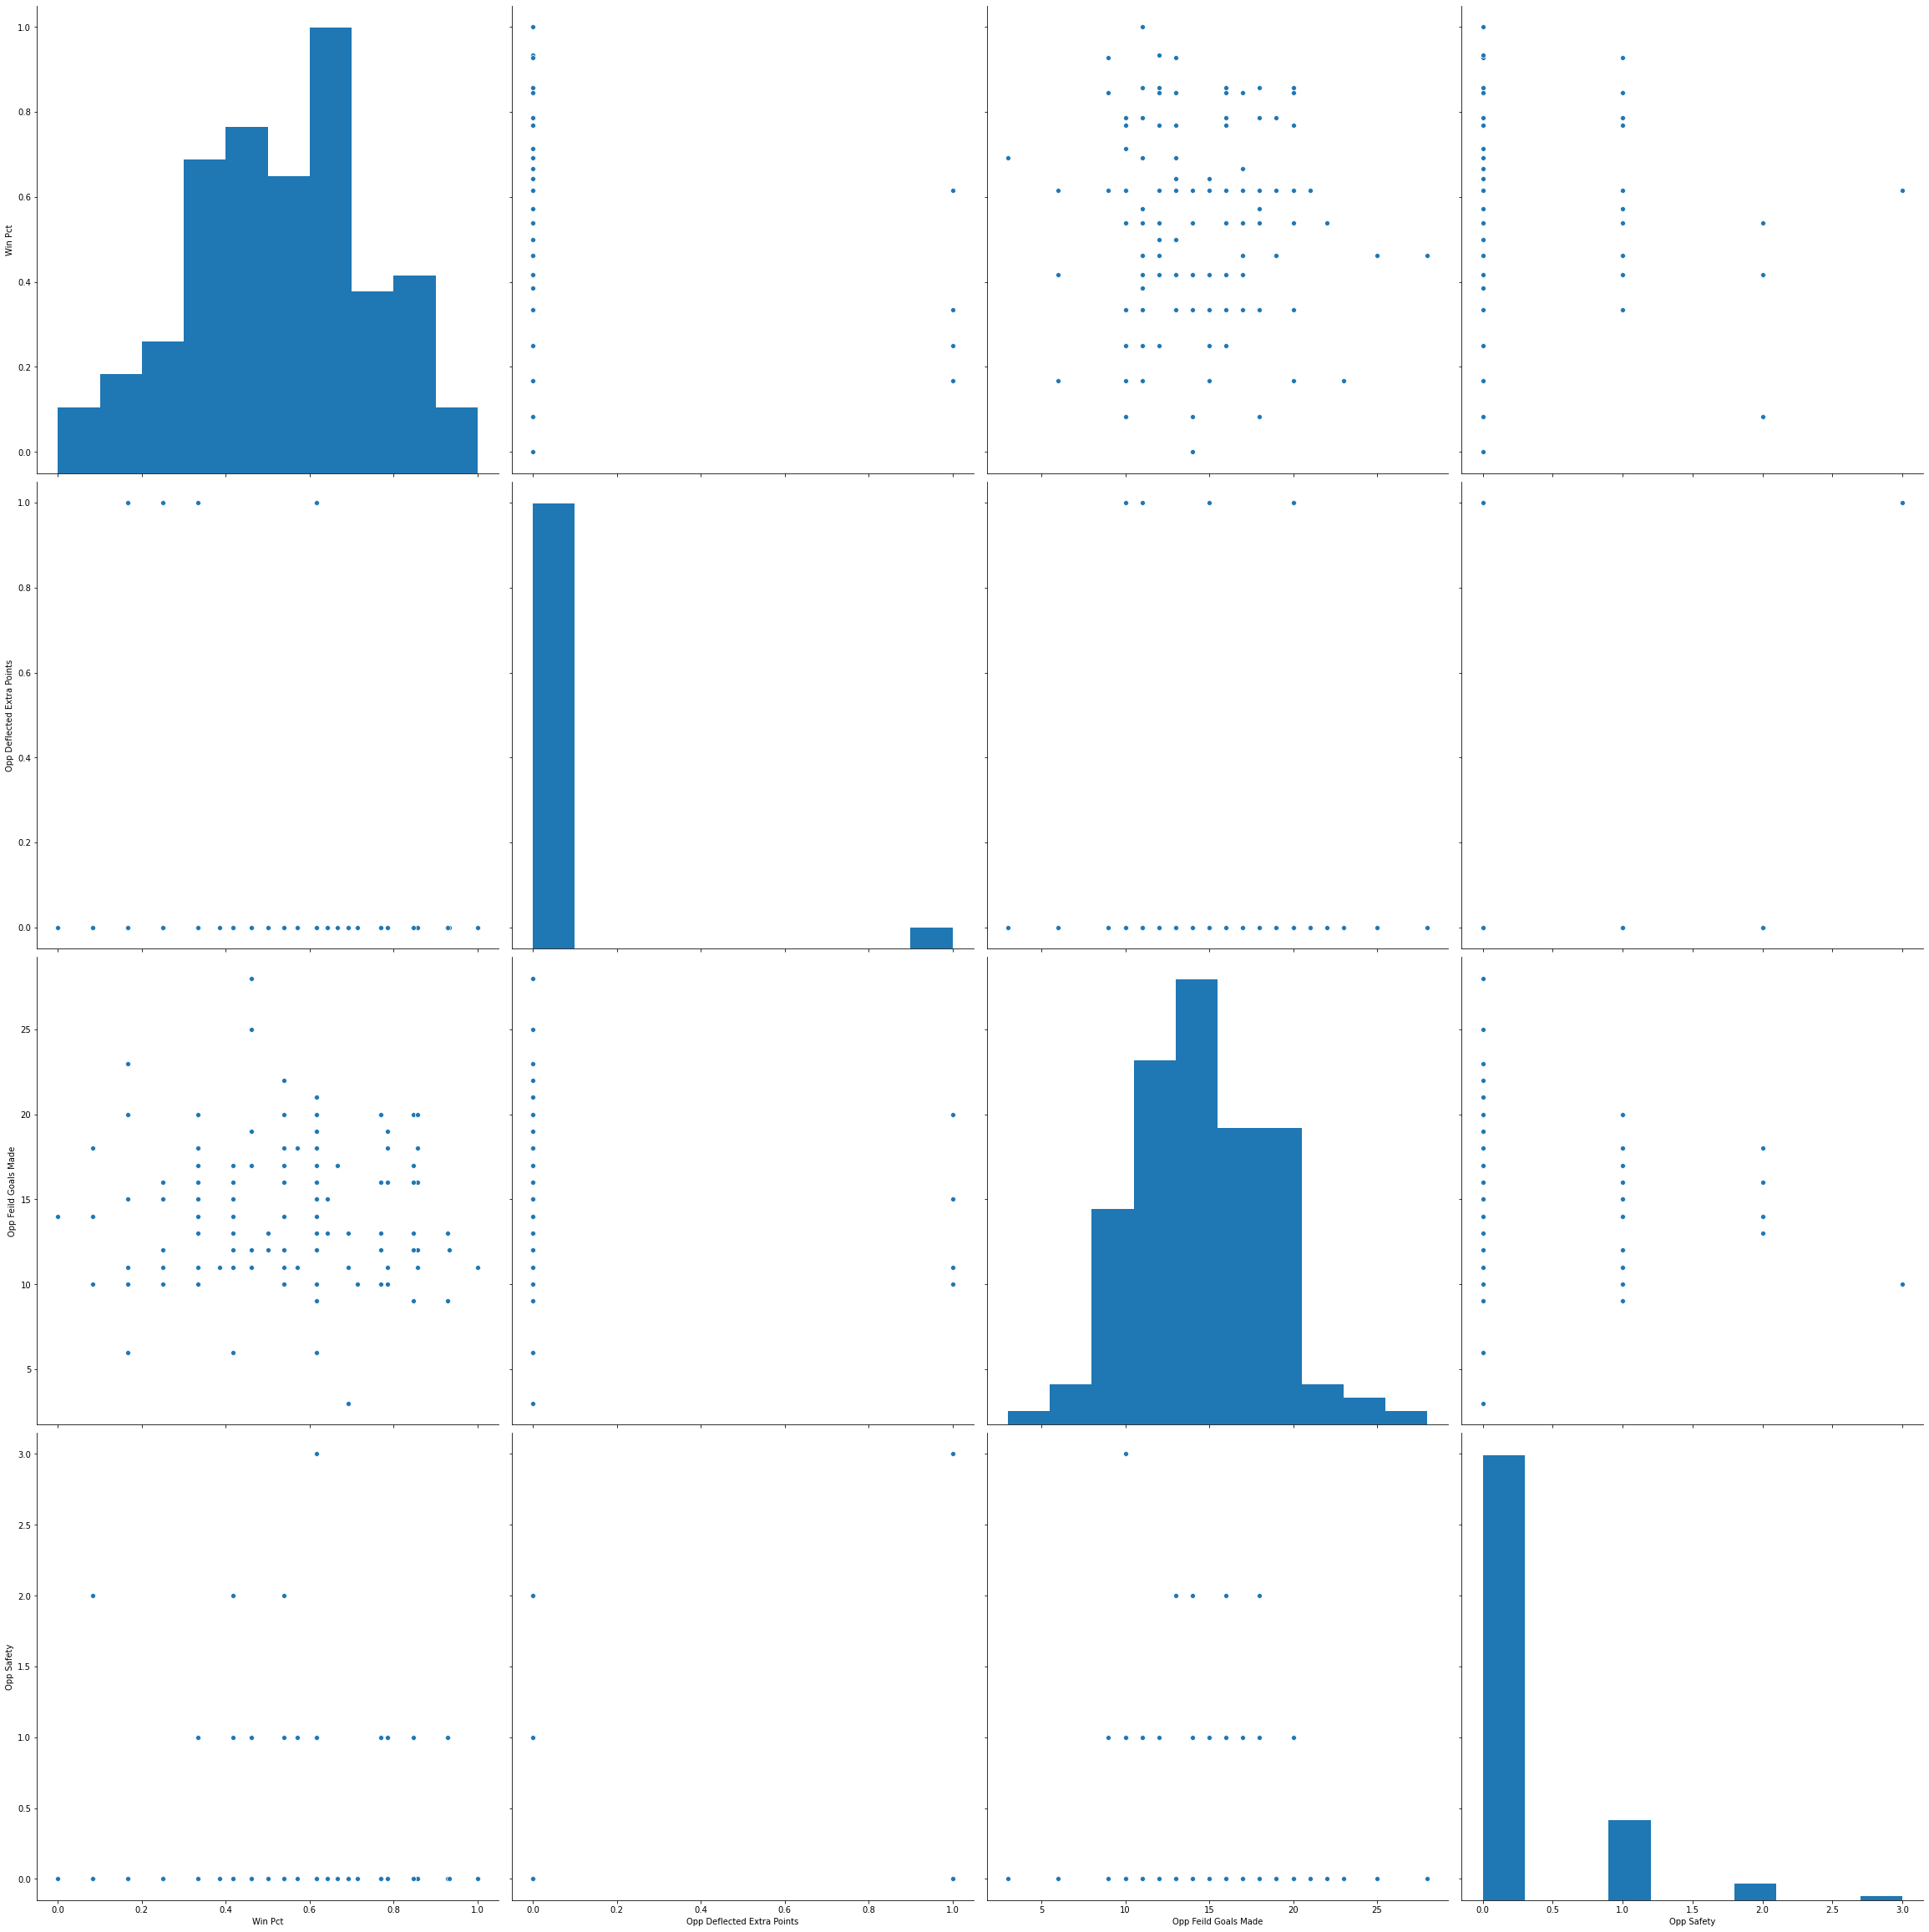

In [42]:
sns.pairplot(cfb[['Win Pct','Opp Deflected Extra Points','Opp Feild Goals Made','Opp Safety']], height = 8)

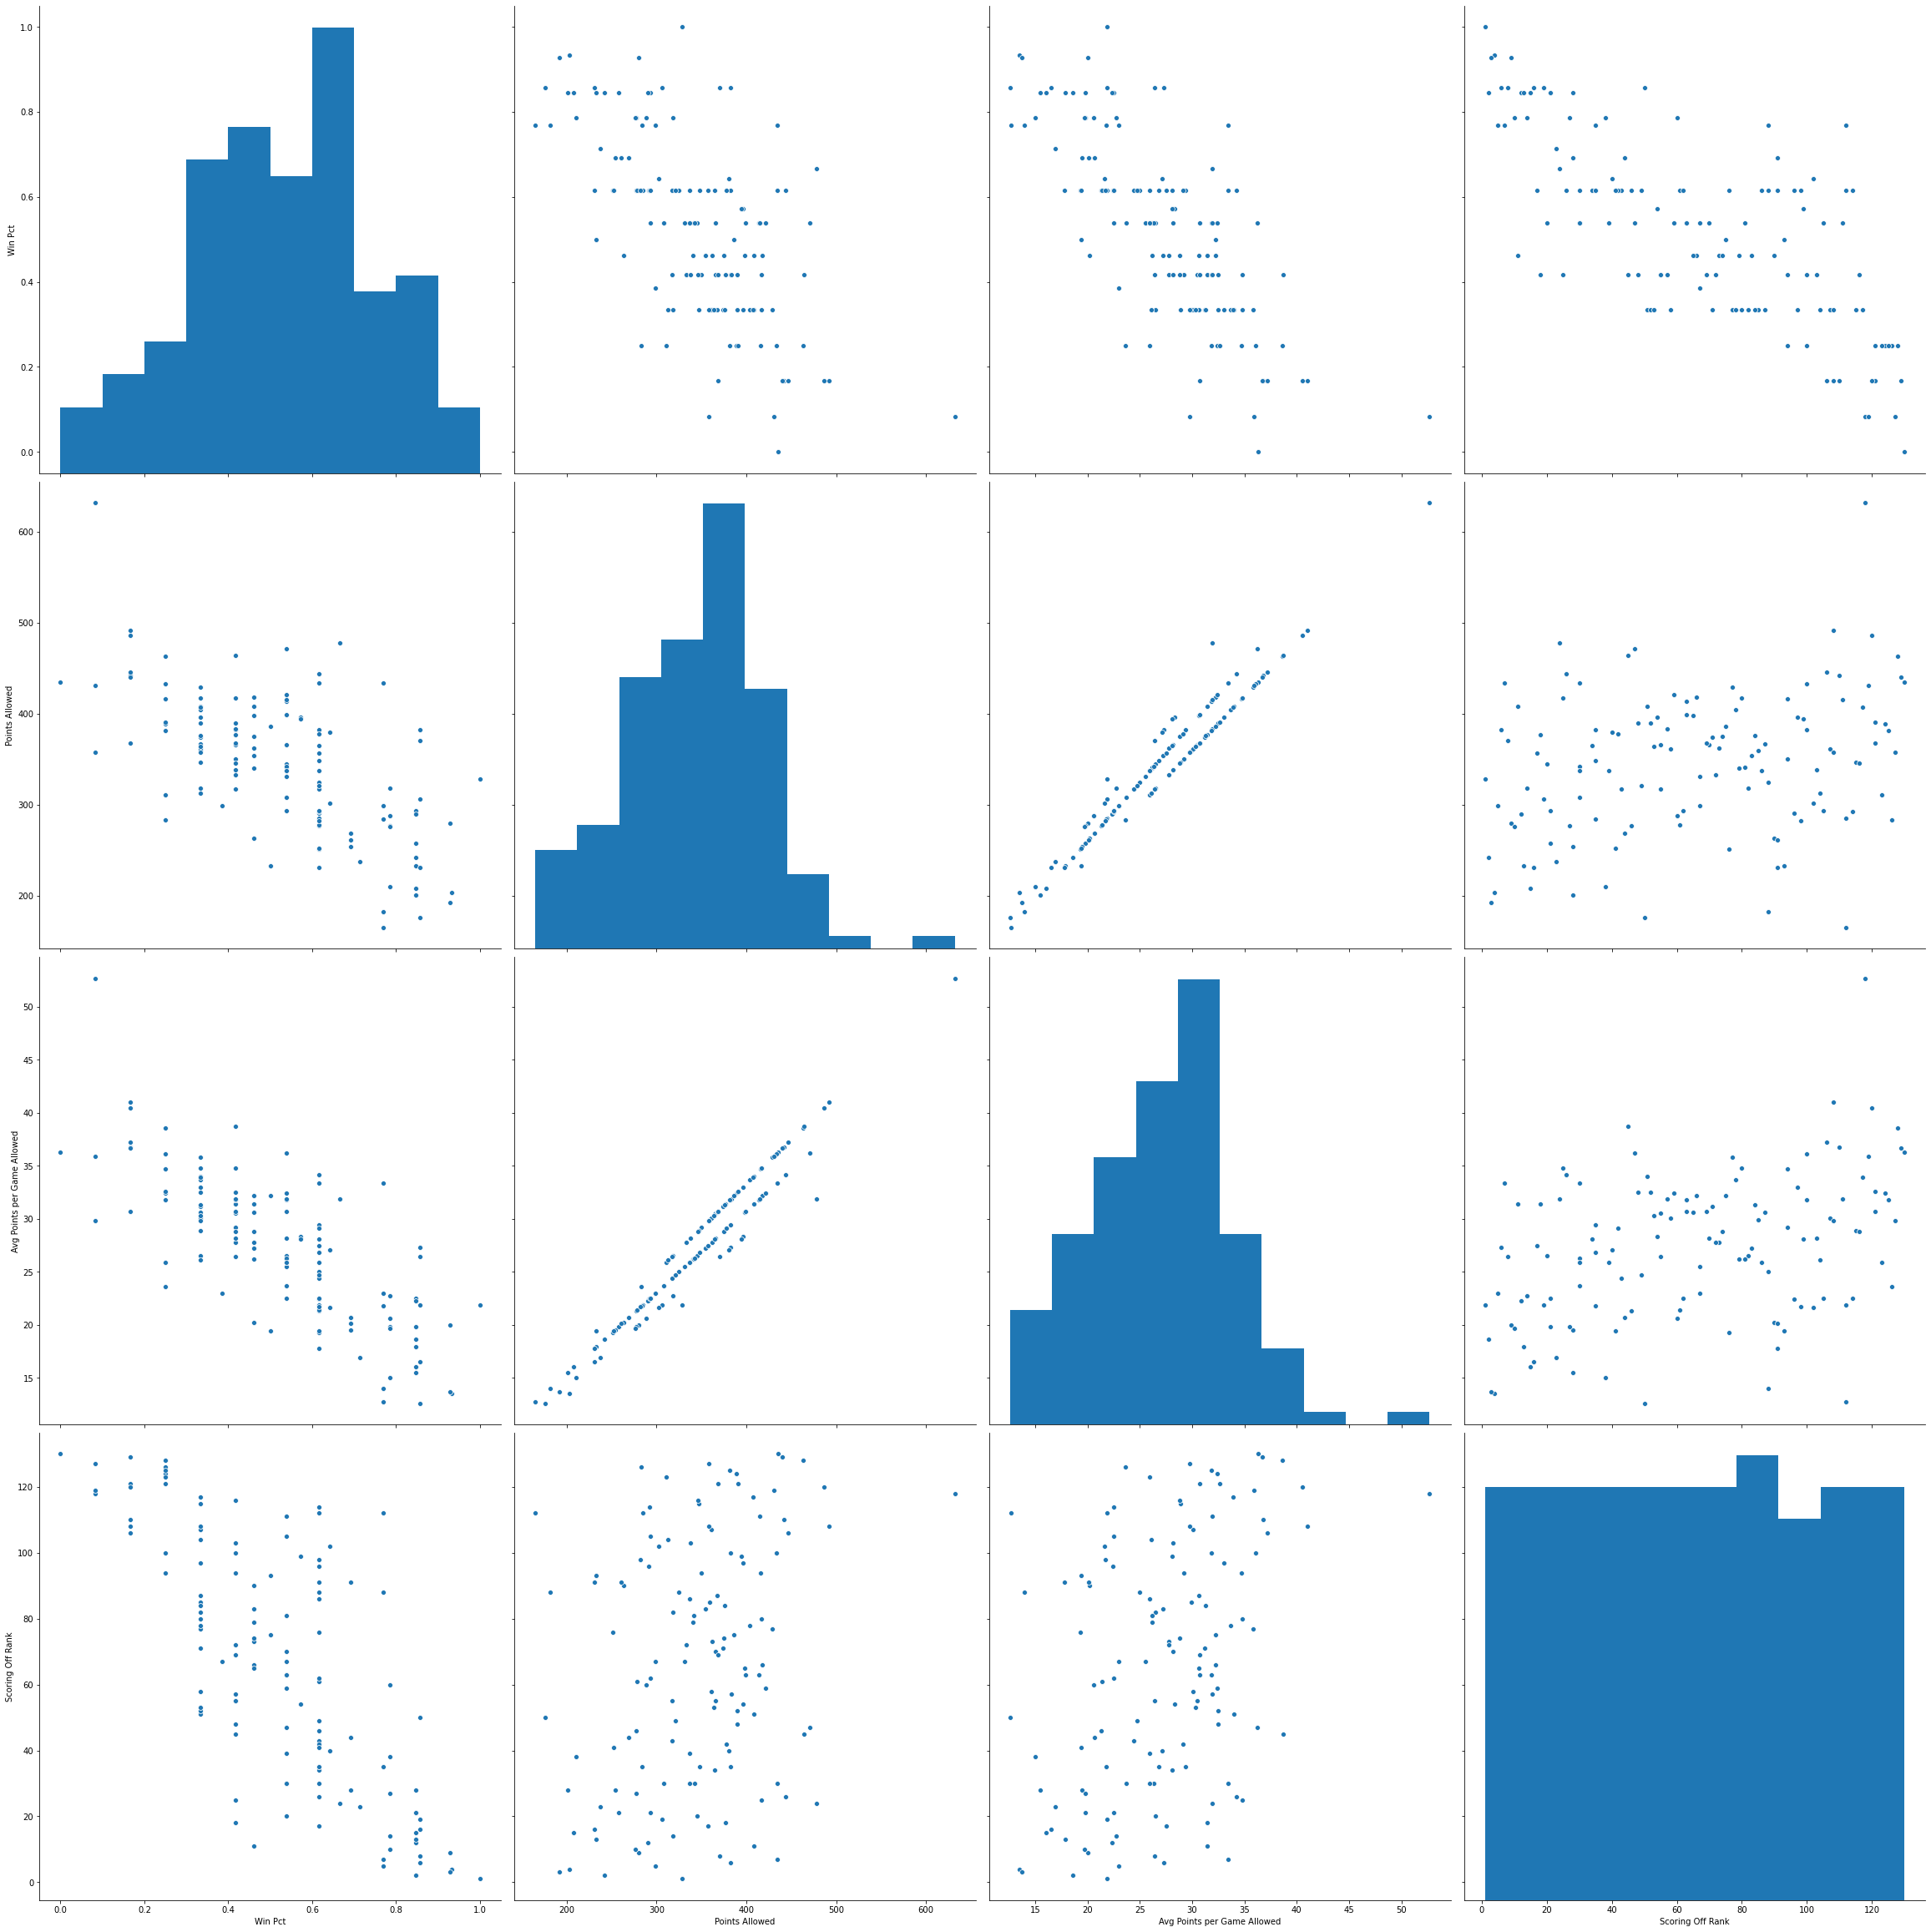

In [43]:
sns.pairplot(cfb[['Win Pct','Points Allowed','Avg Points per Game Allowed','Scoring Off Rank']], height = 8)

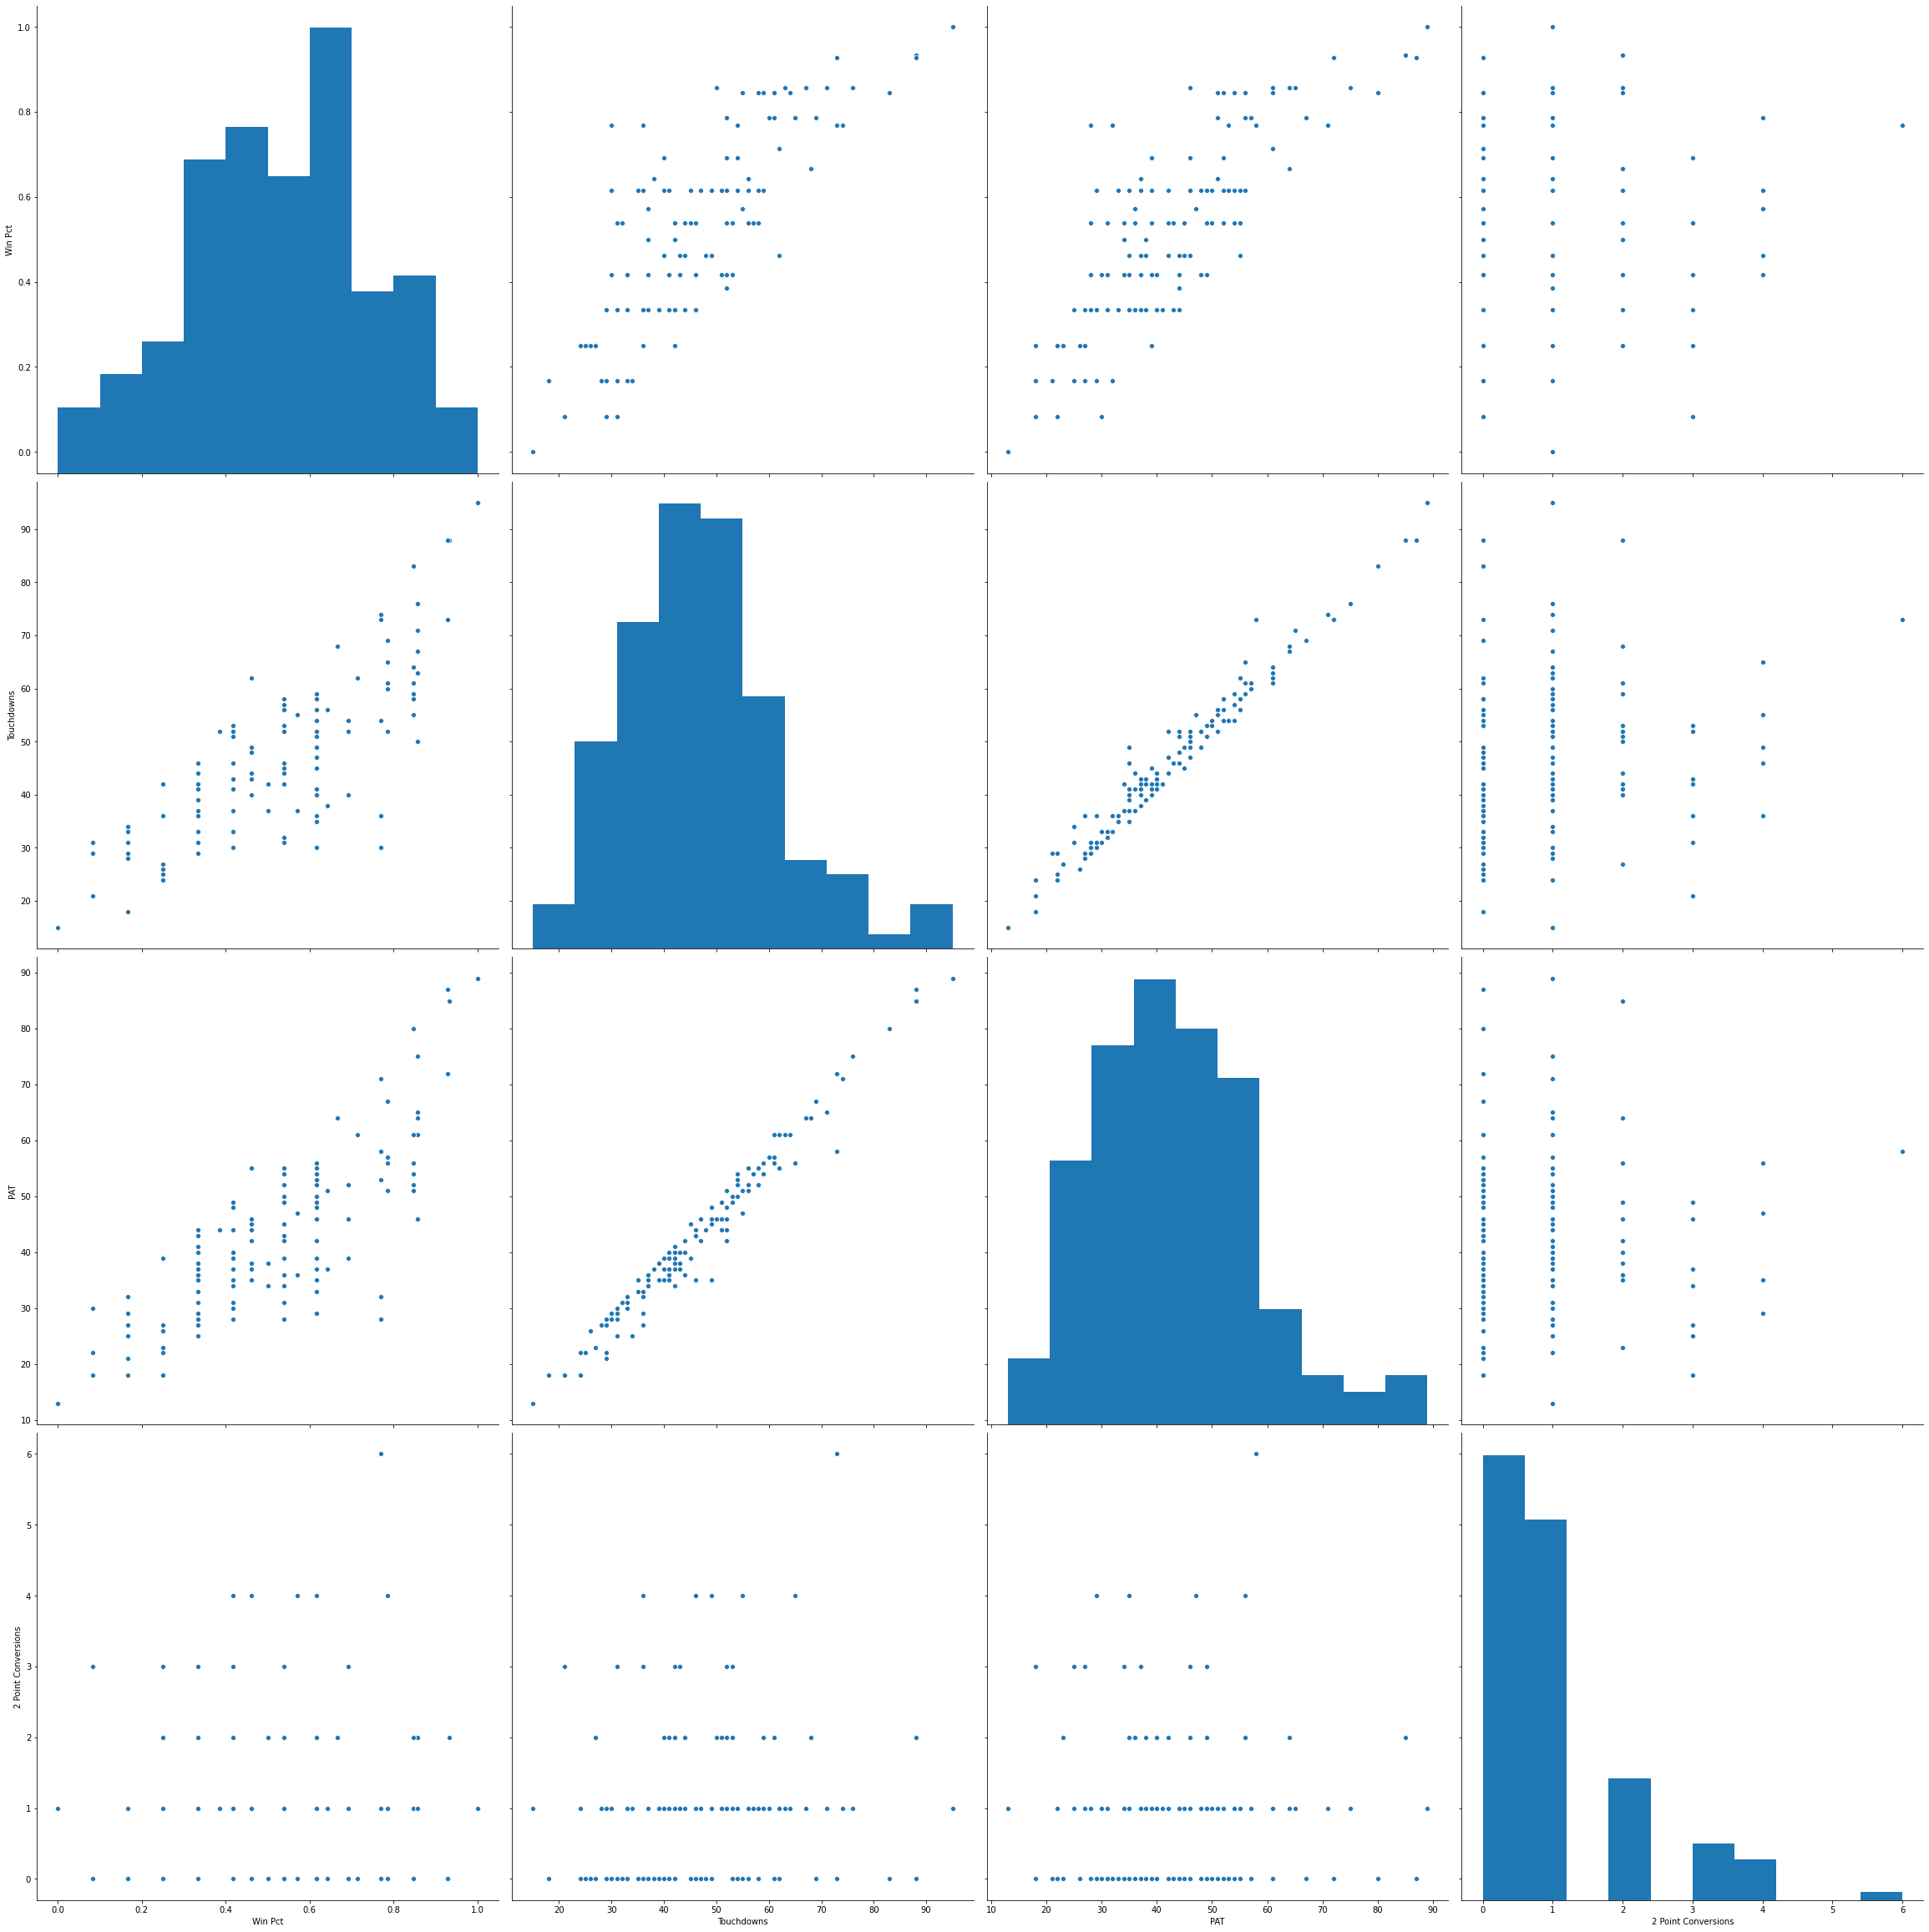

In [44]:
sns.pairplot(cfb[['Win Pct','Touchdowns','PAT','2 Point Conversions']], height = 8)

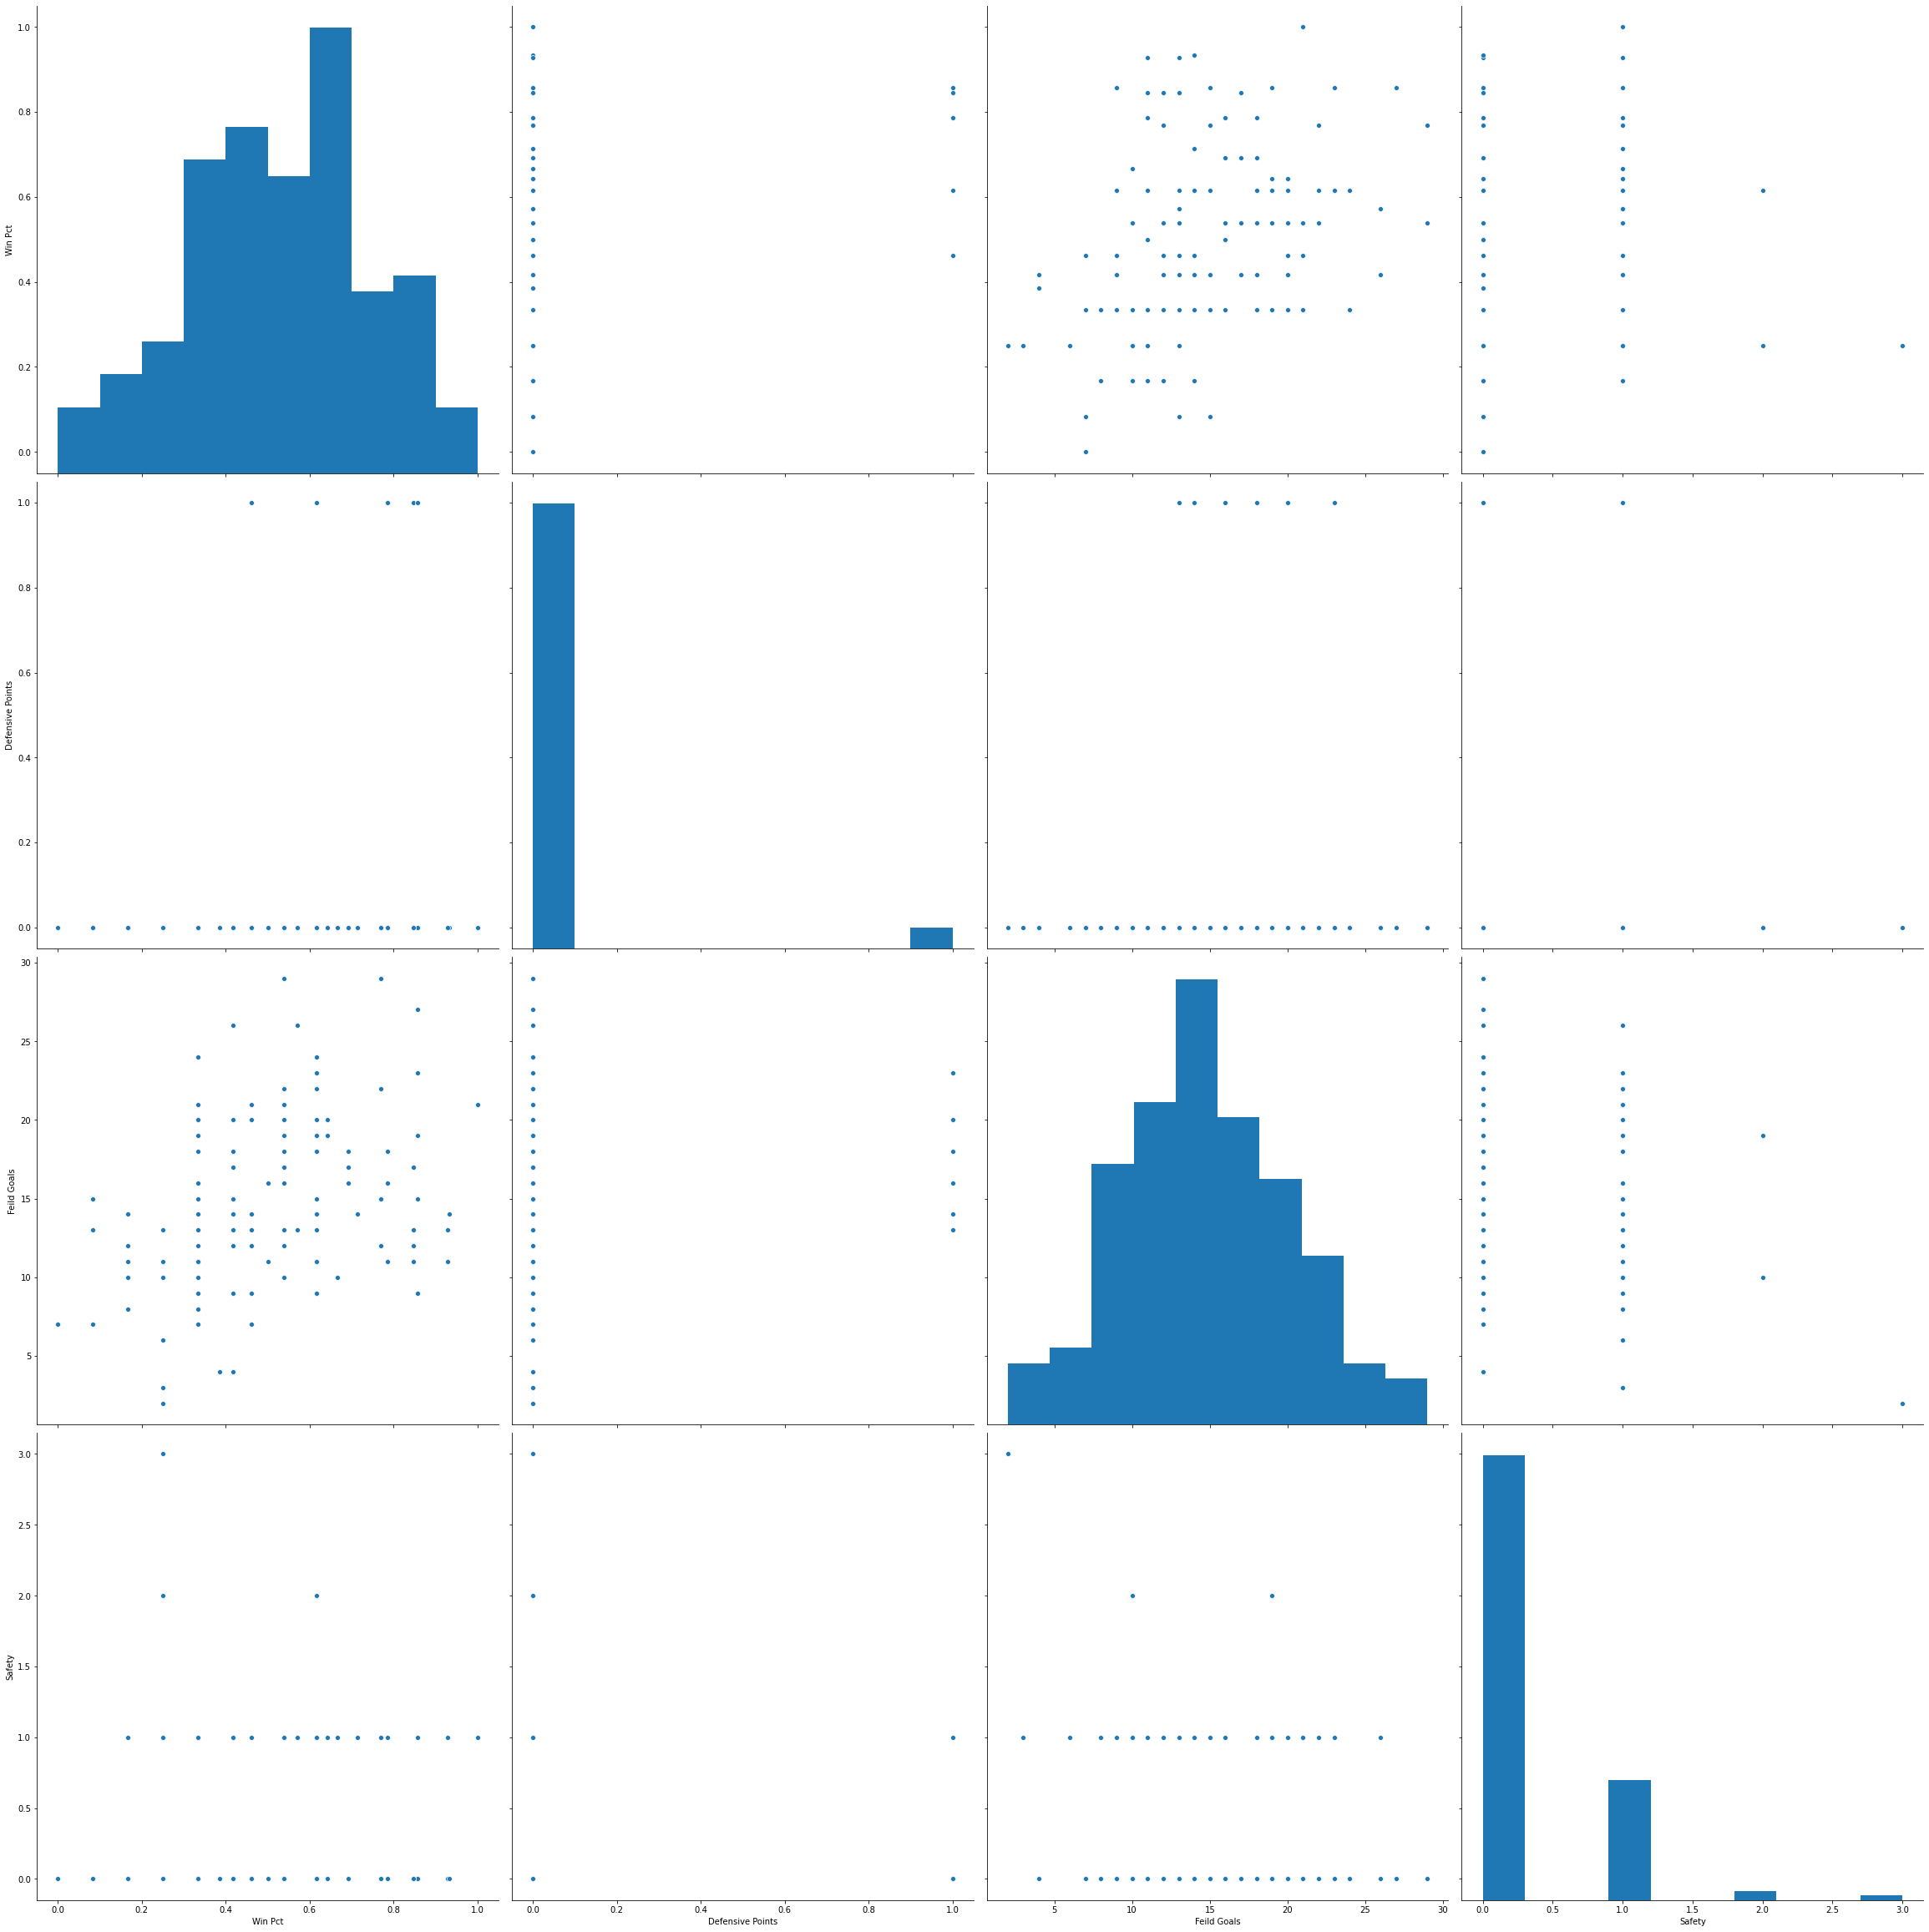

In [45]:
sns.pairplot(cfb[['Win Pct','Defensive Points','Feild Goals','Safety']], height = 8)

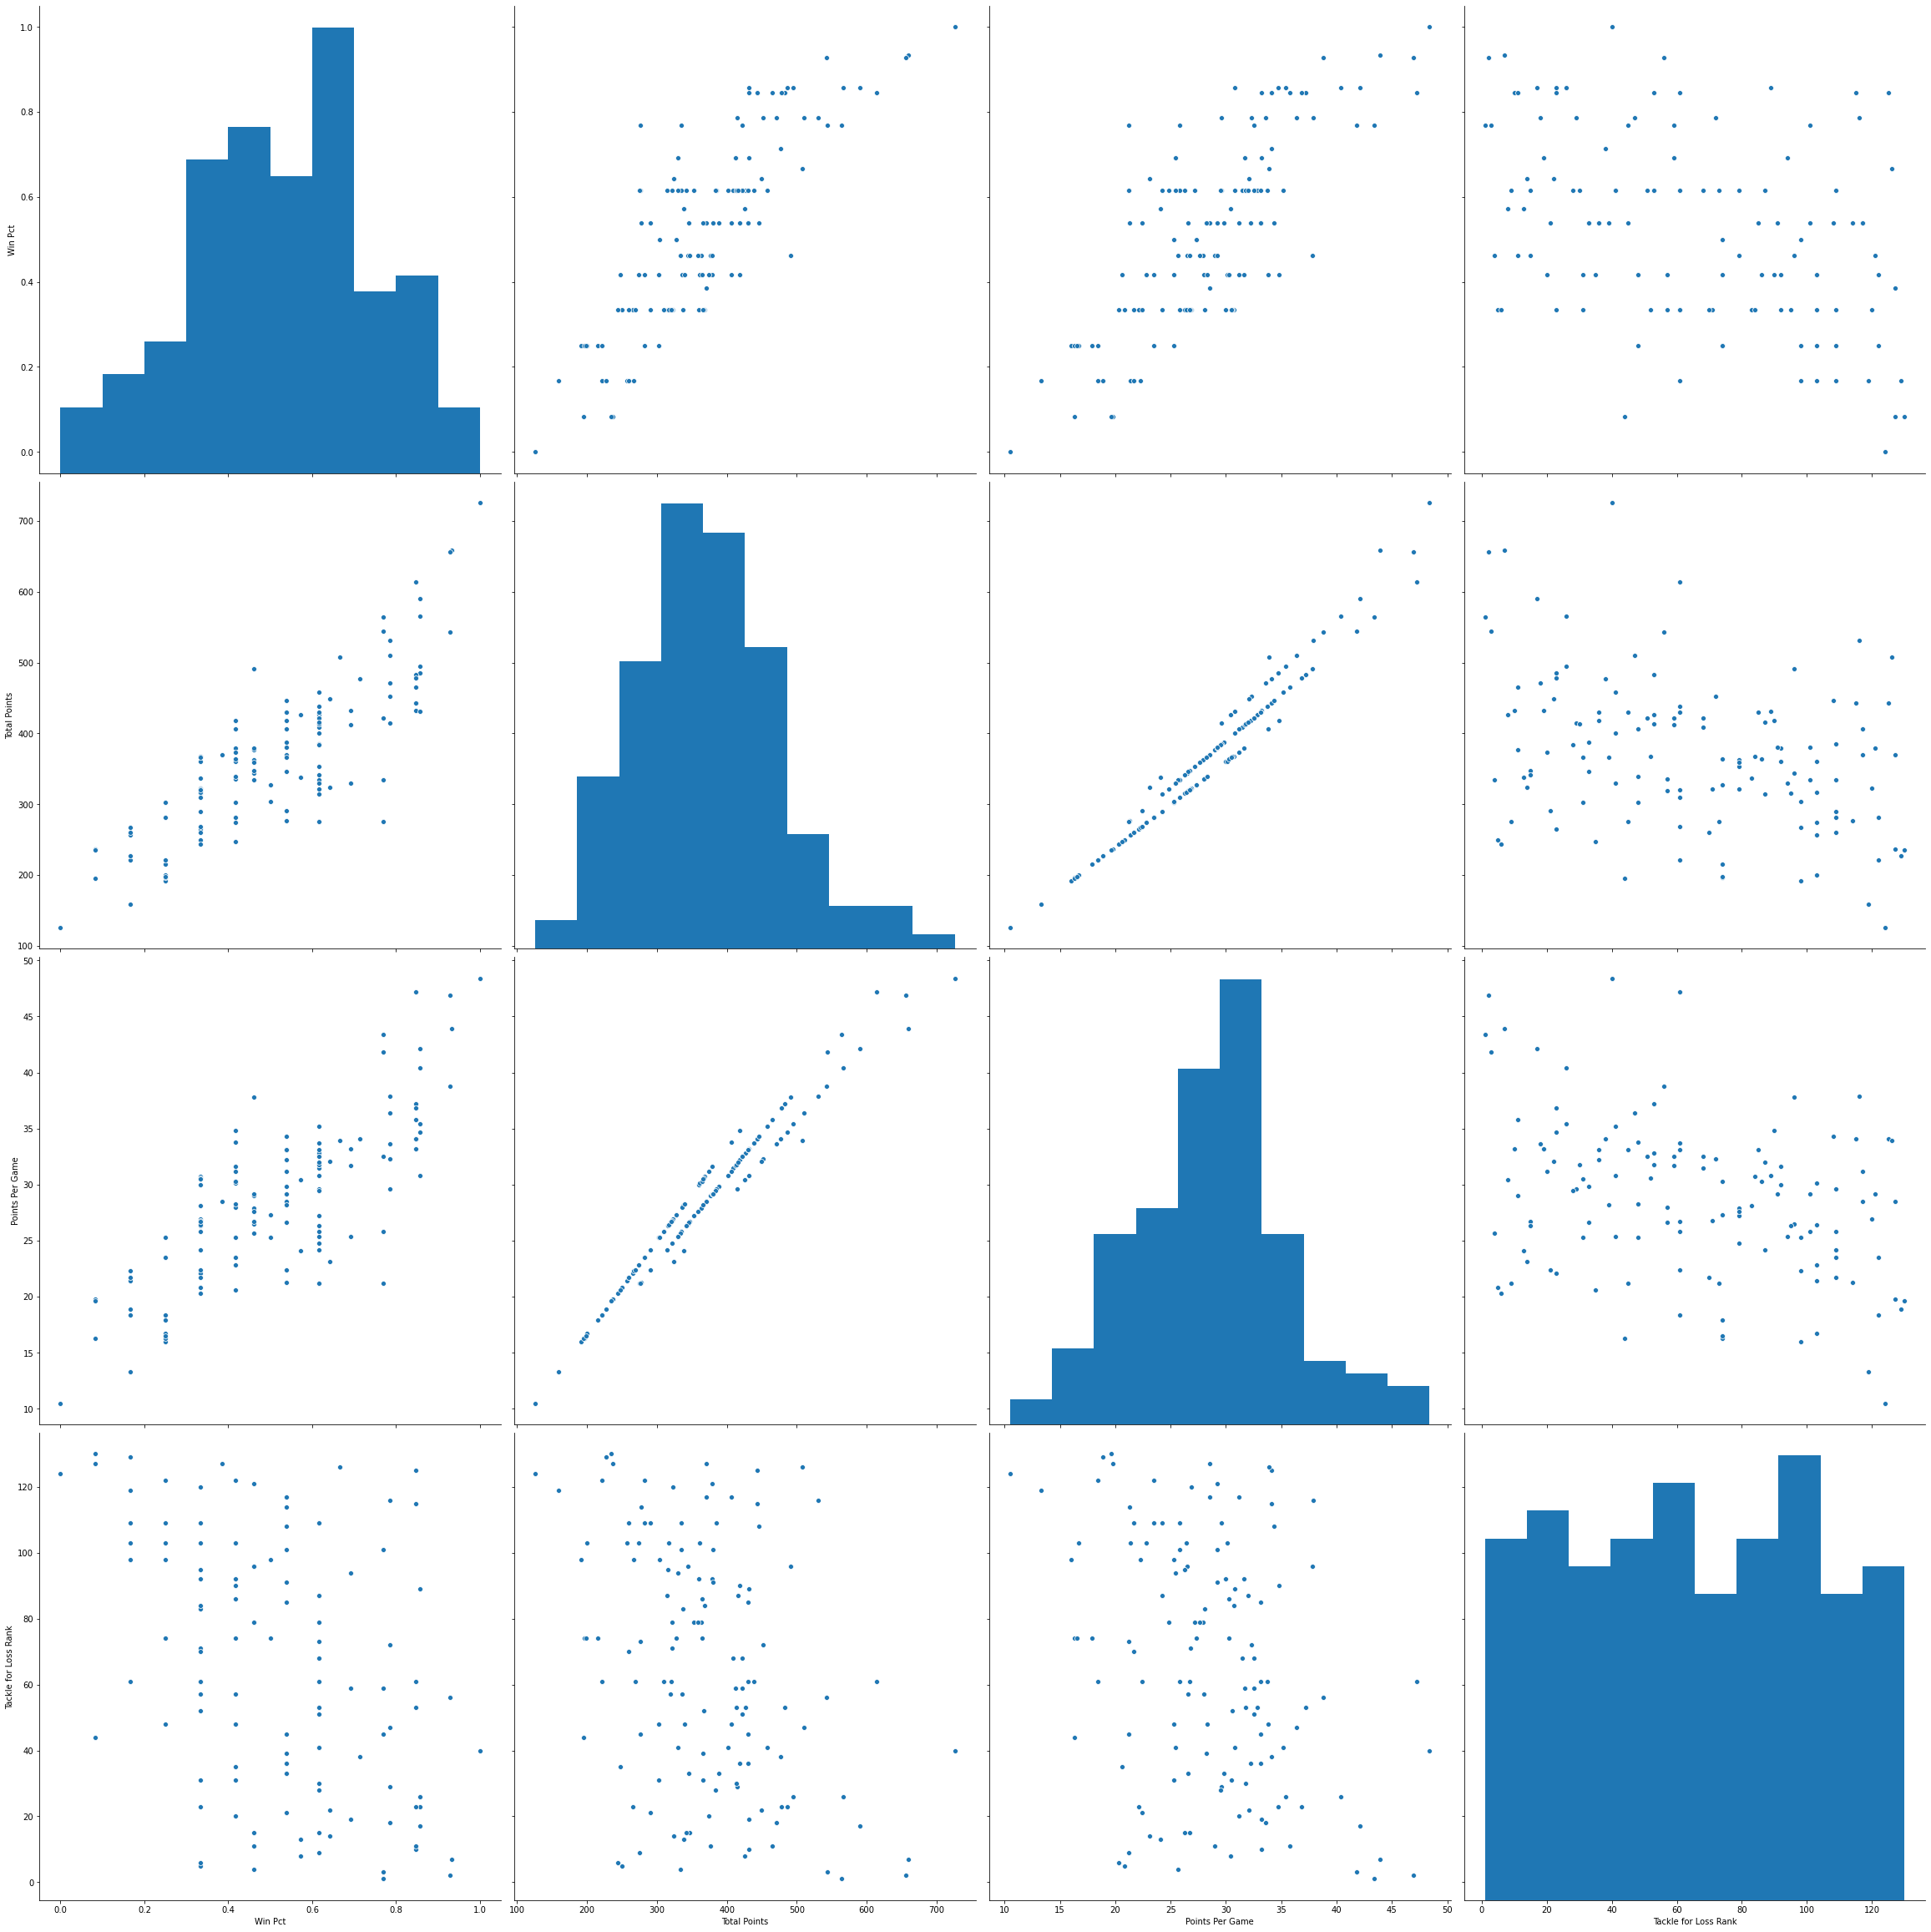

In [46]:
sns.pairplot(cfb[['Win Pct','Total Points','Points Per Game','Tackle for Loss Rank']], height = 8)

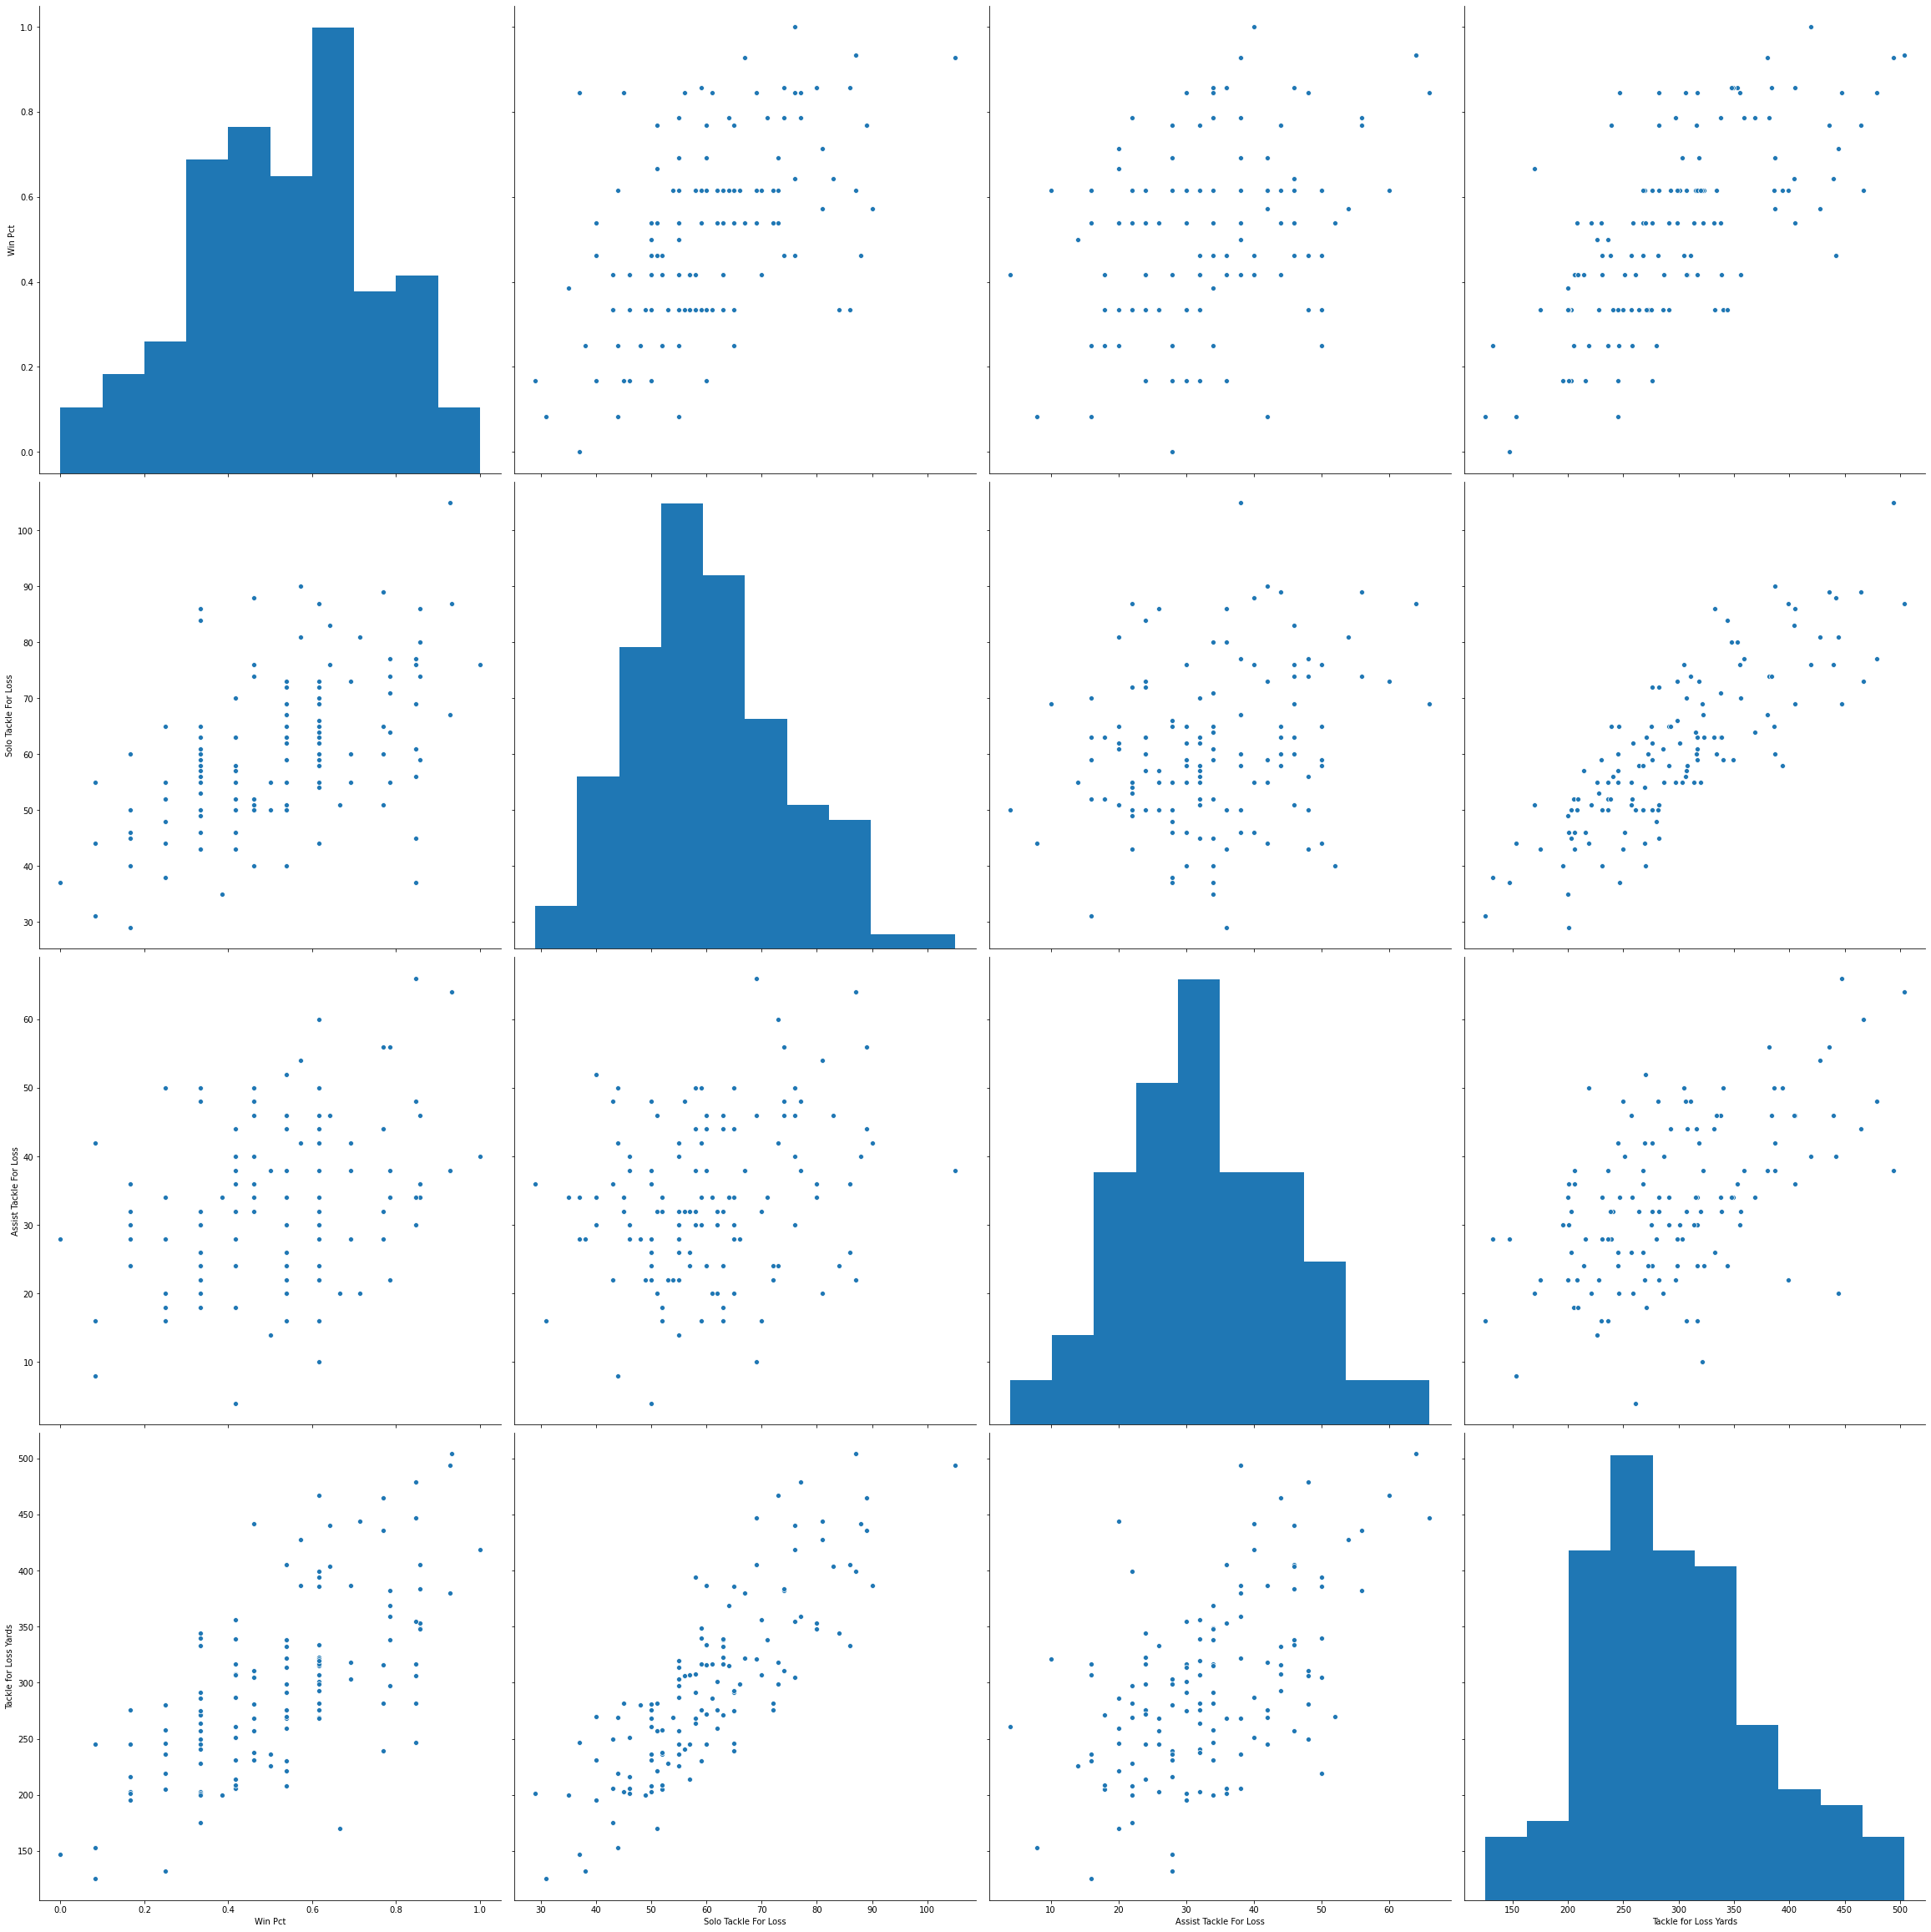

In [47]:
sns.pairplot(cfb[['Win Pct','Solo Tackle For Loss','Assist Tackle For Loss','Tackle for Loss Yards']], height = 8)

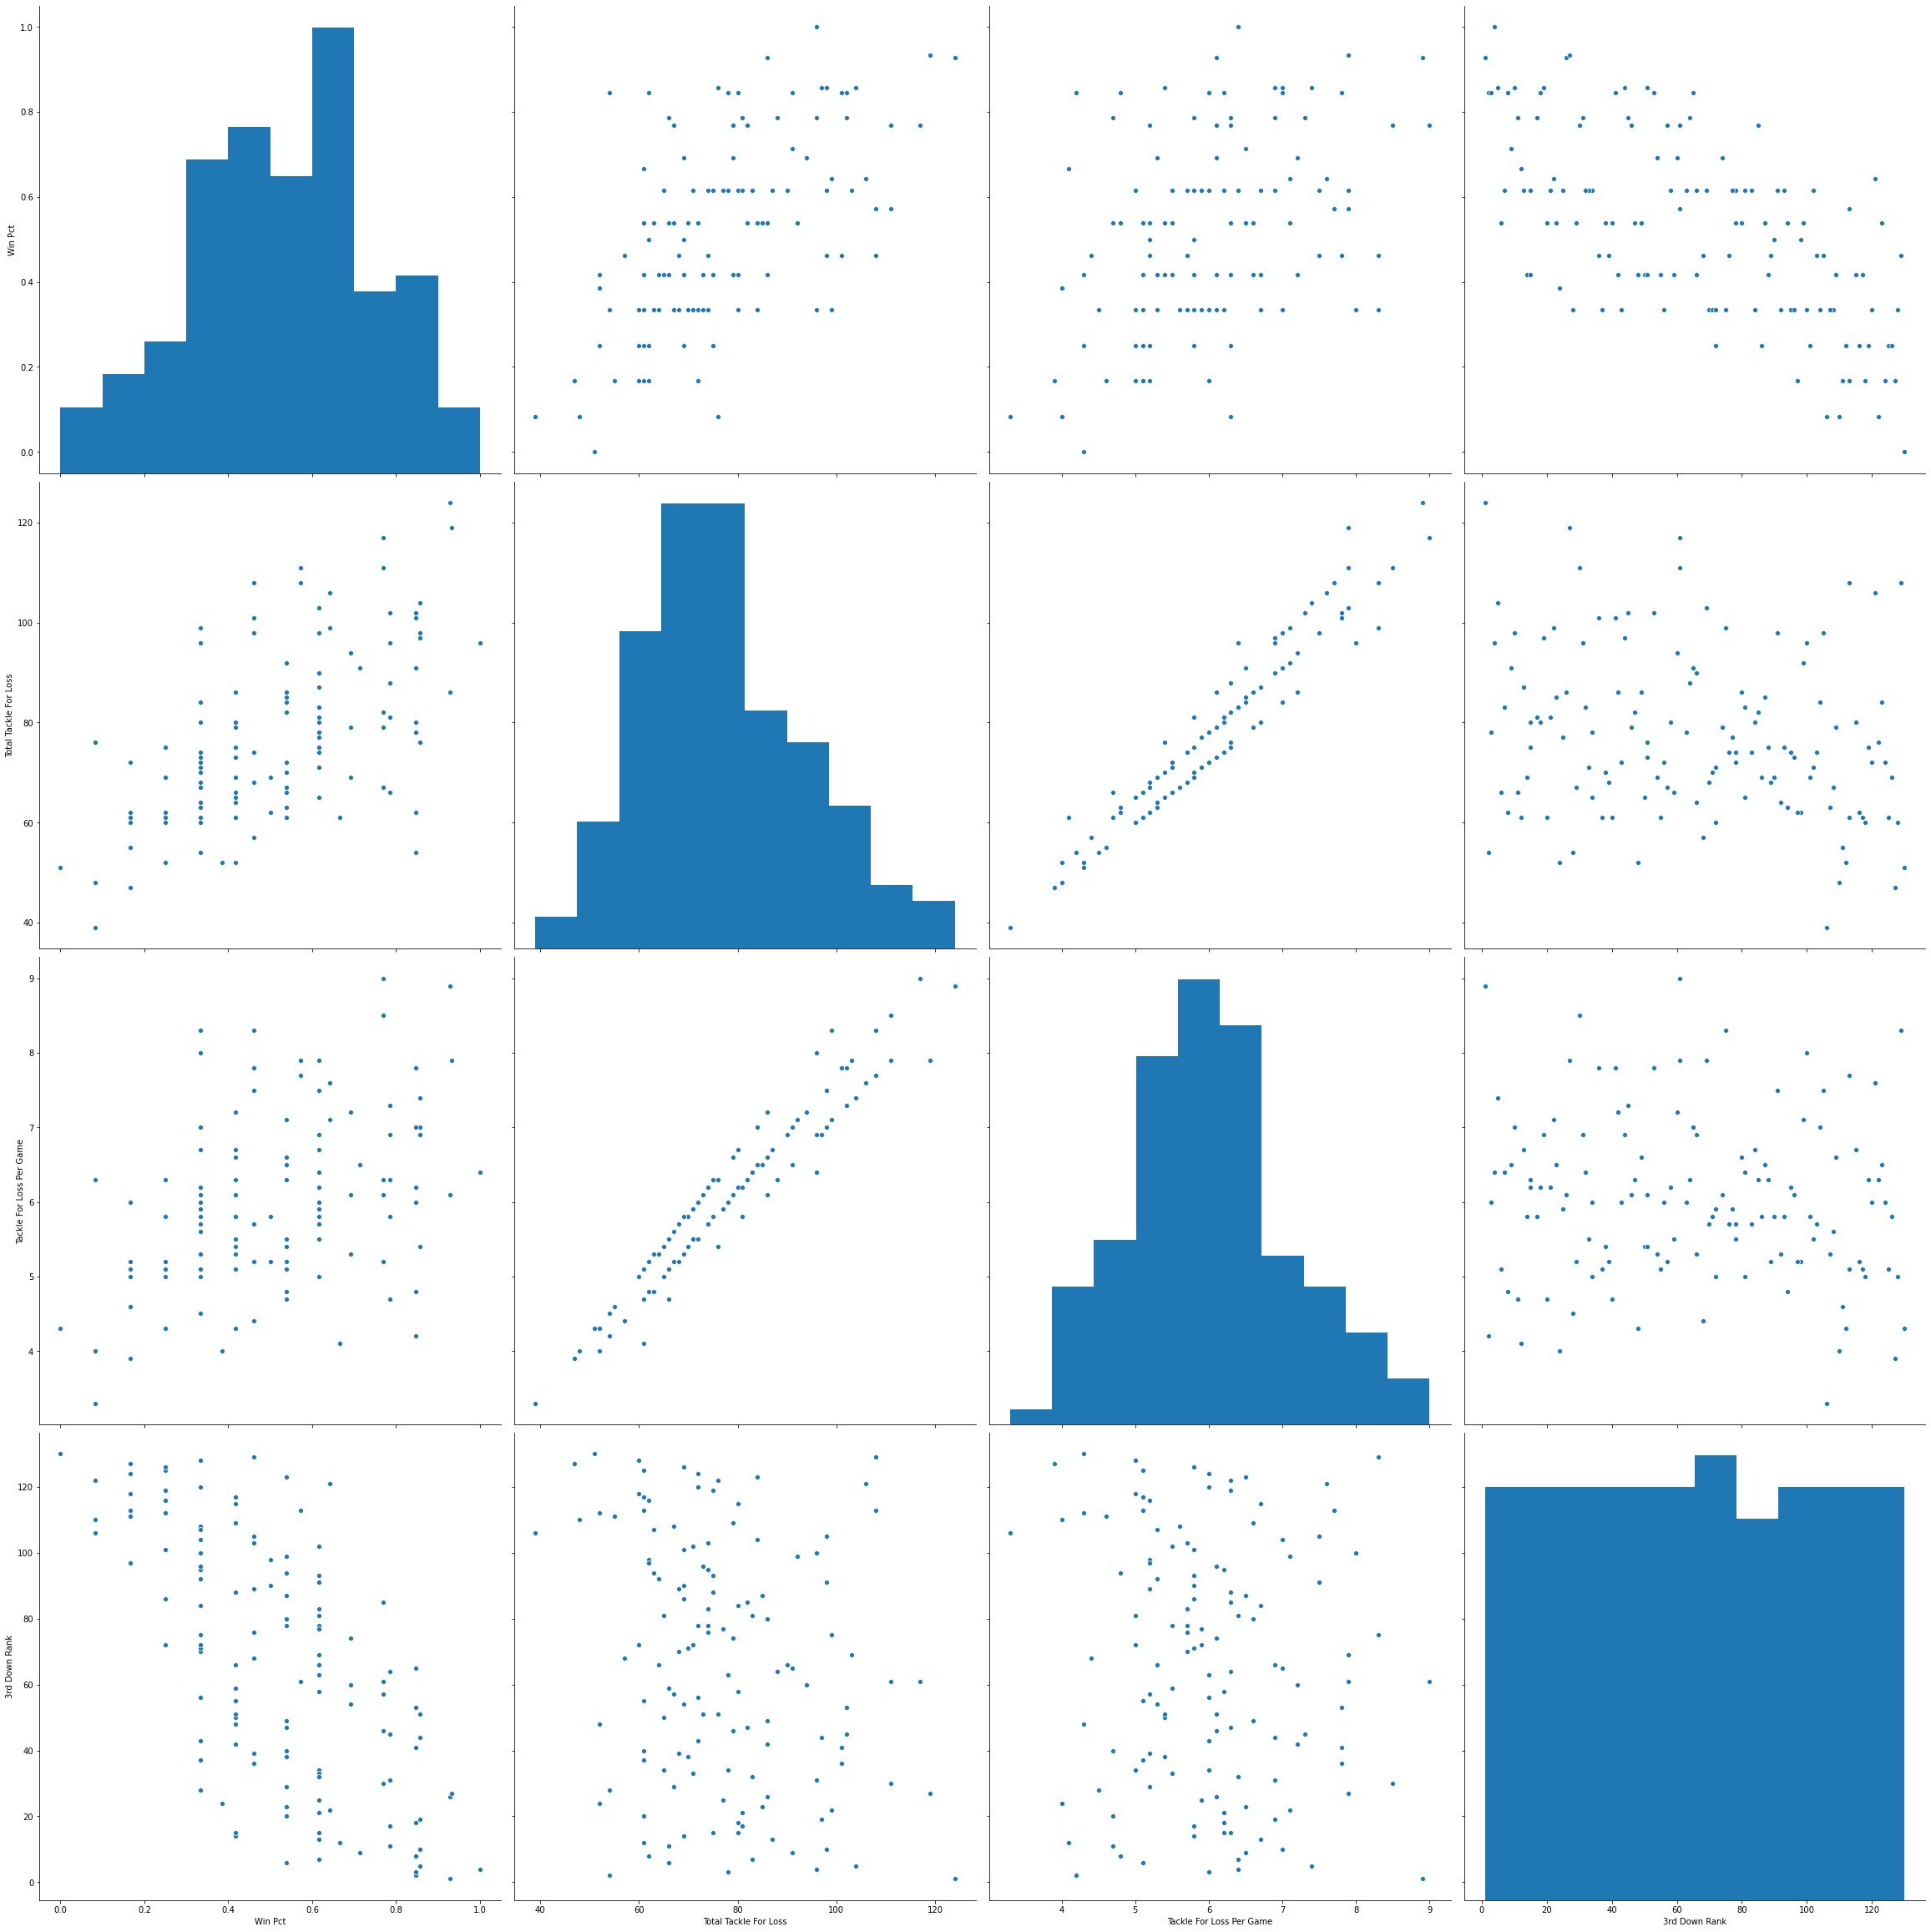

In [48]:
sns.pairplot(cfb[['Win Pct','Total Tackle For Loss','Tackle For Loss Per Game','3rd Down Rank']], height = 8)

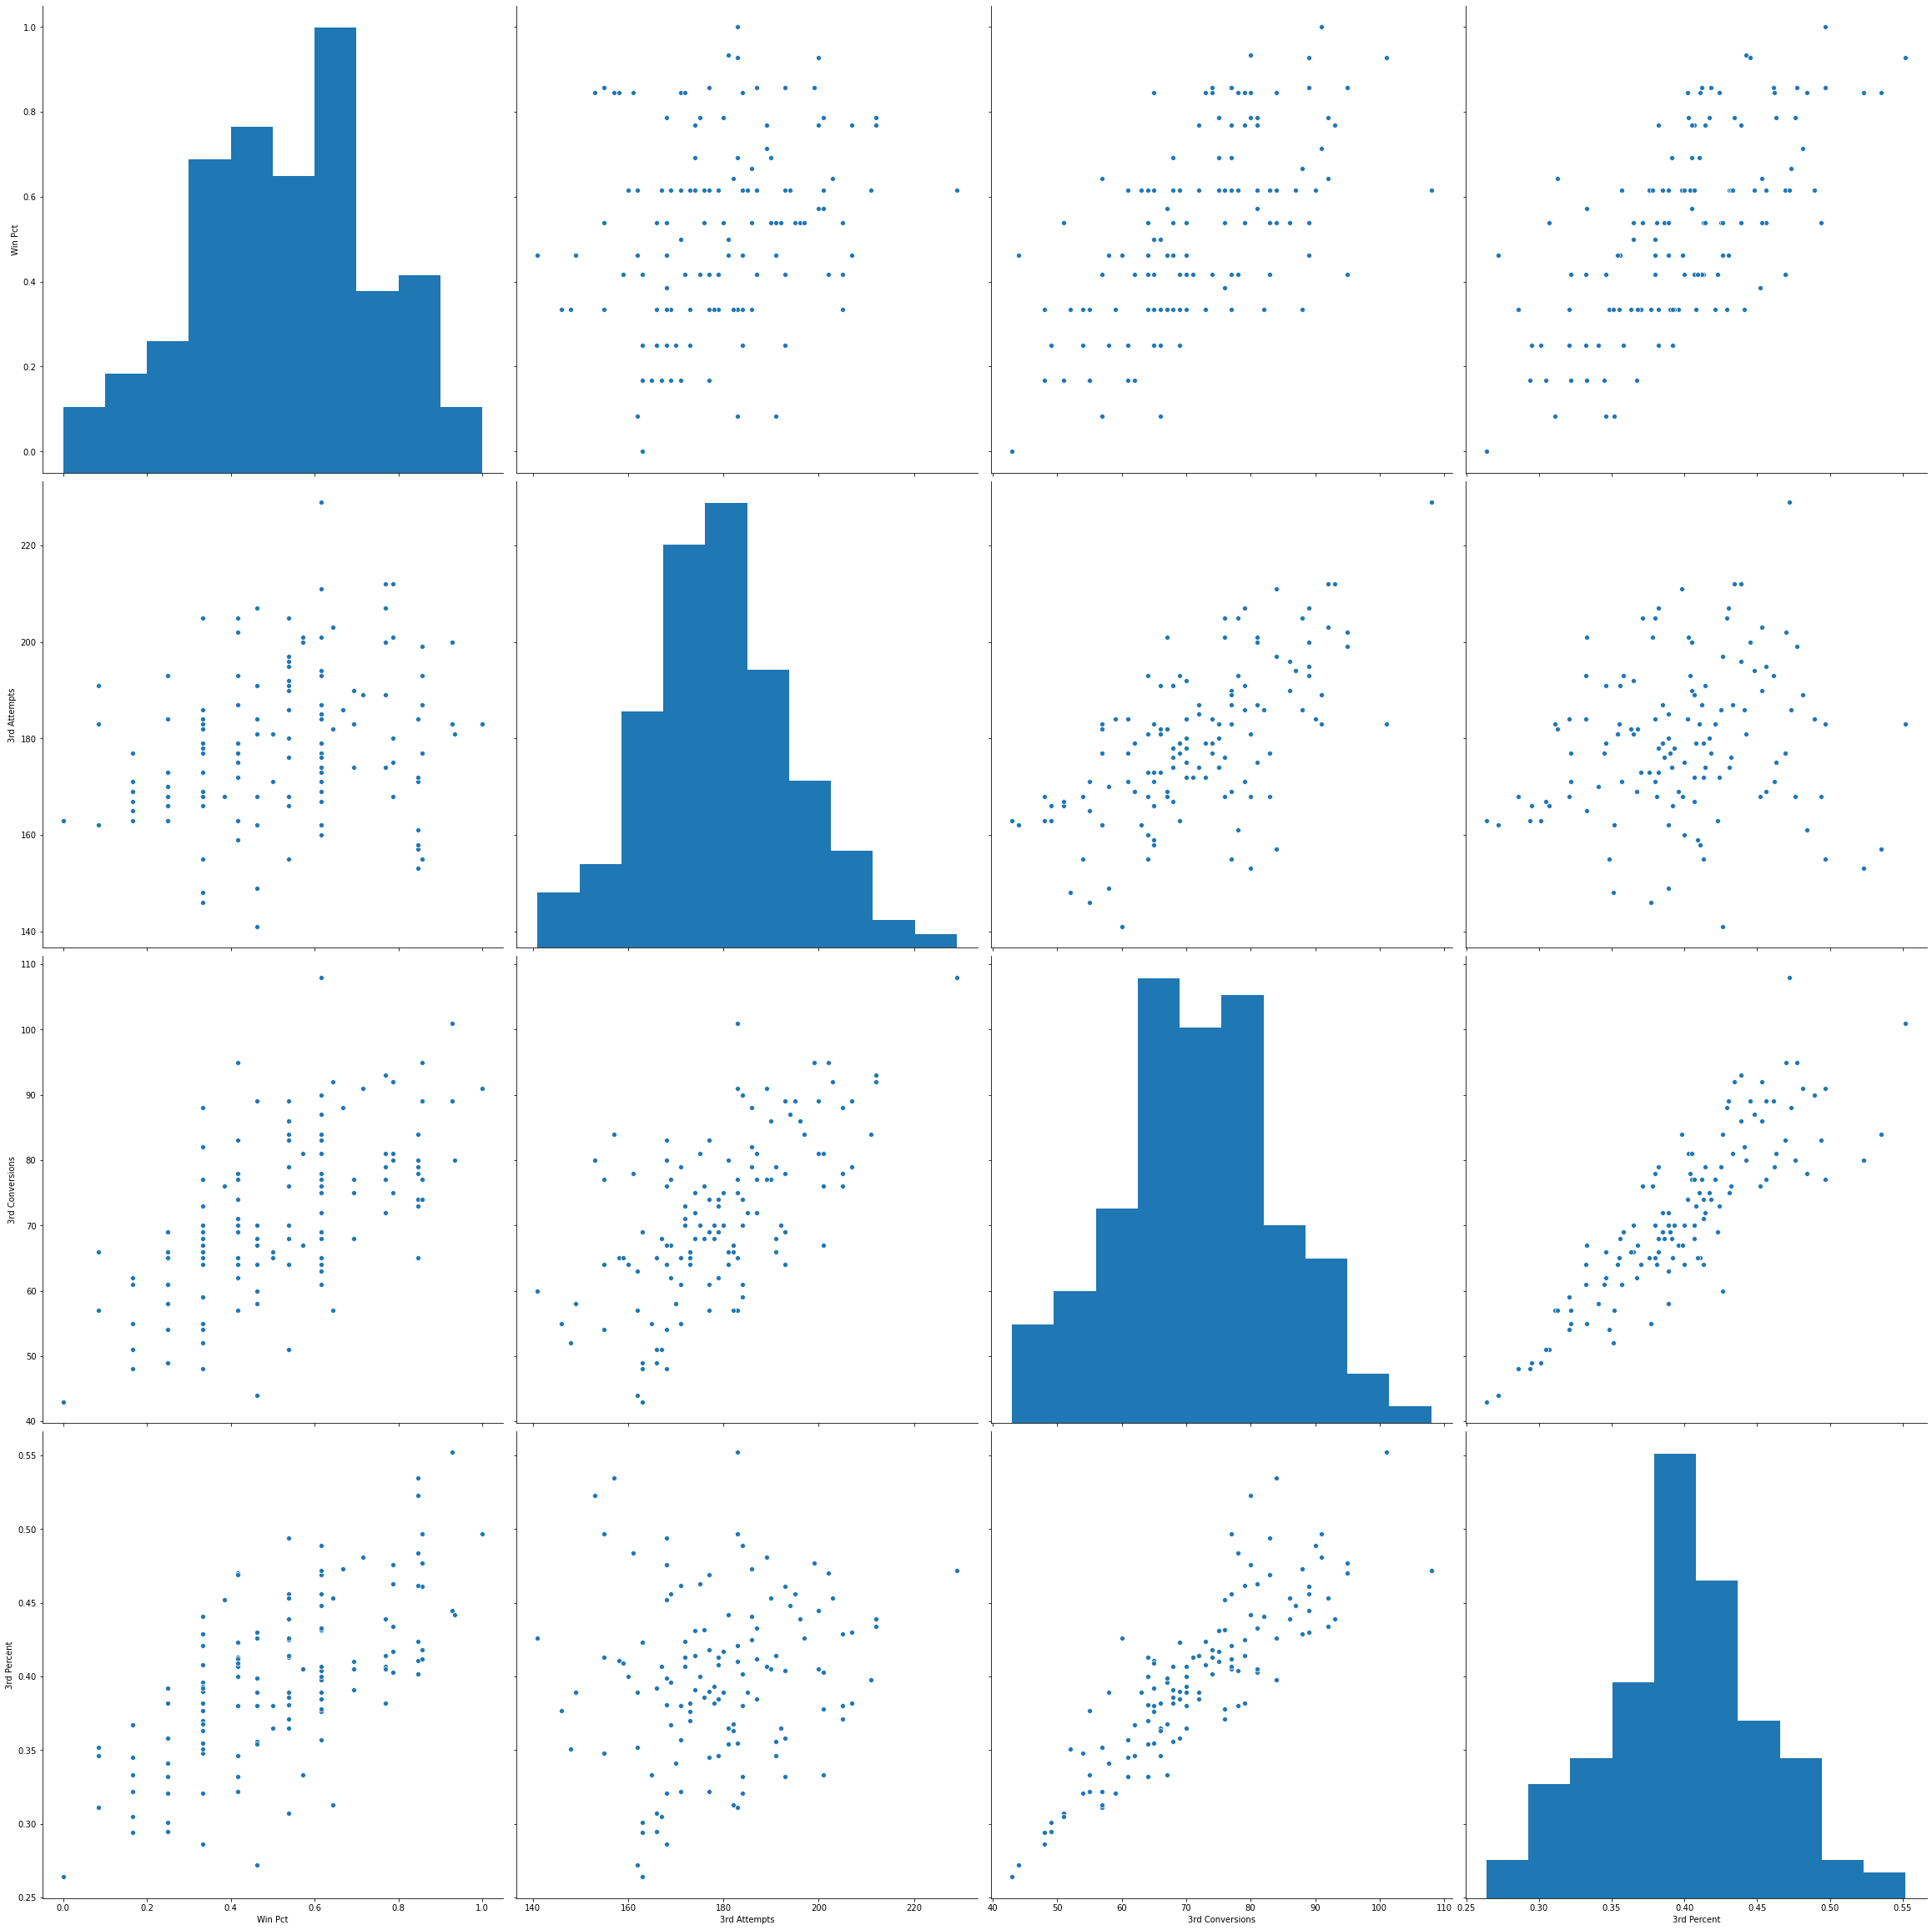

In [49]:
sns.pairplot(cfb[['Win Pct','3rd Attempts','3rd Conversions','3rd Percent']], height = 8)

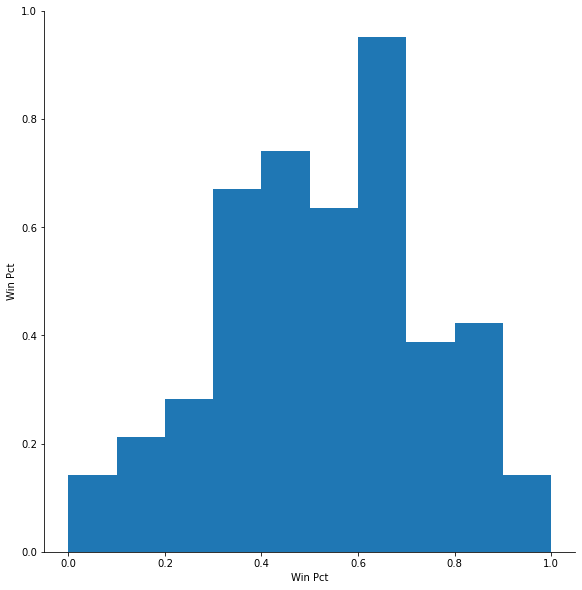

In [50]:
sns.pairplot(cfb[['Win Pct','Time of Possession','Average Time of Possession per Game']], height = 8)
# have to change these two categories to times

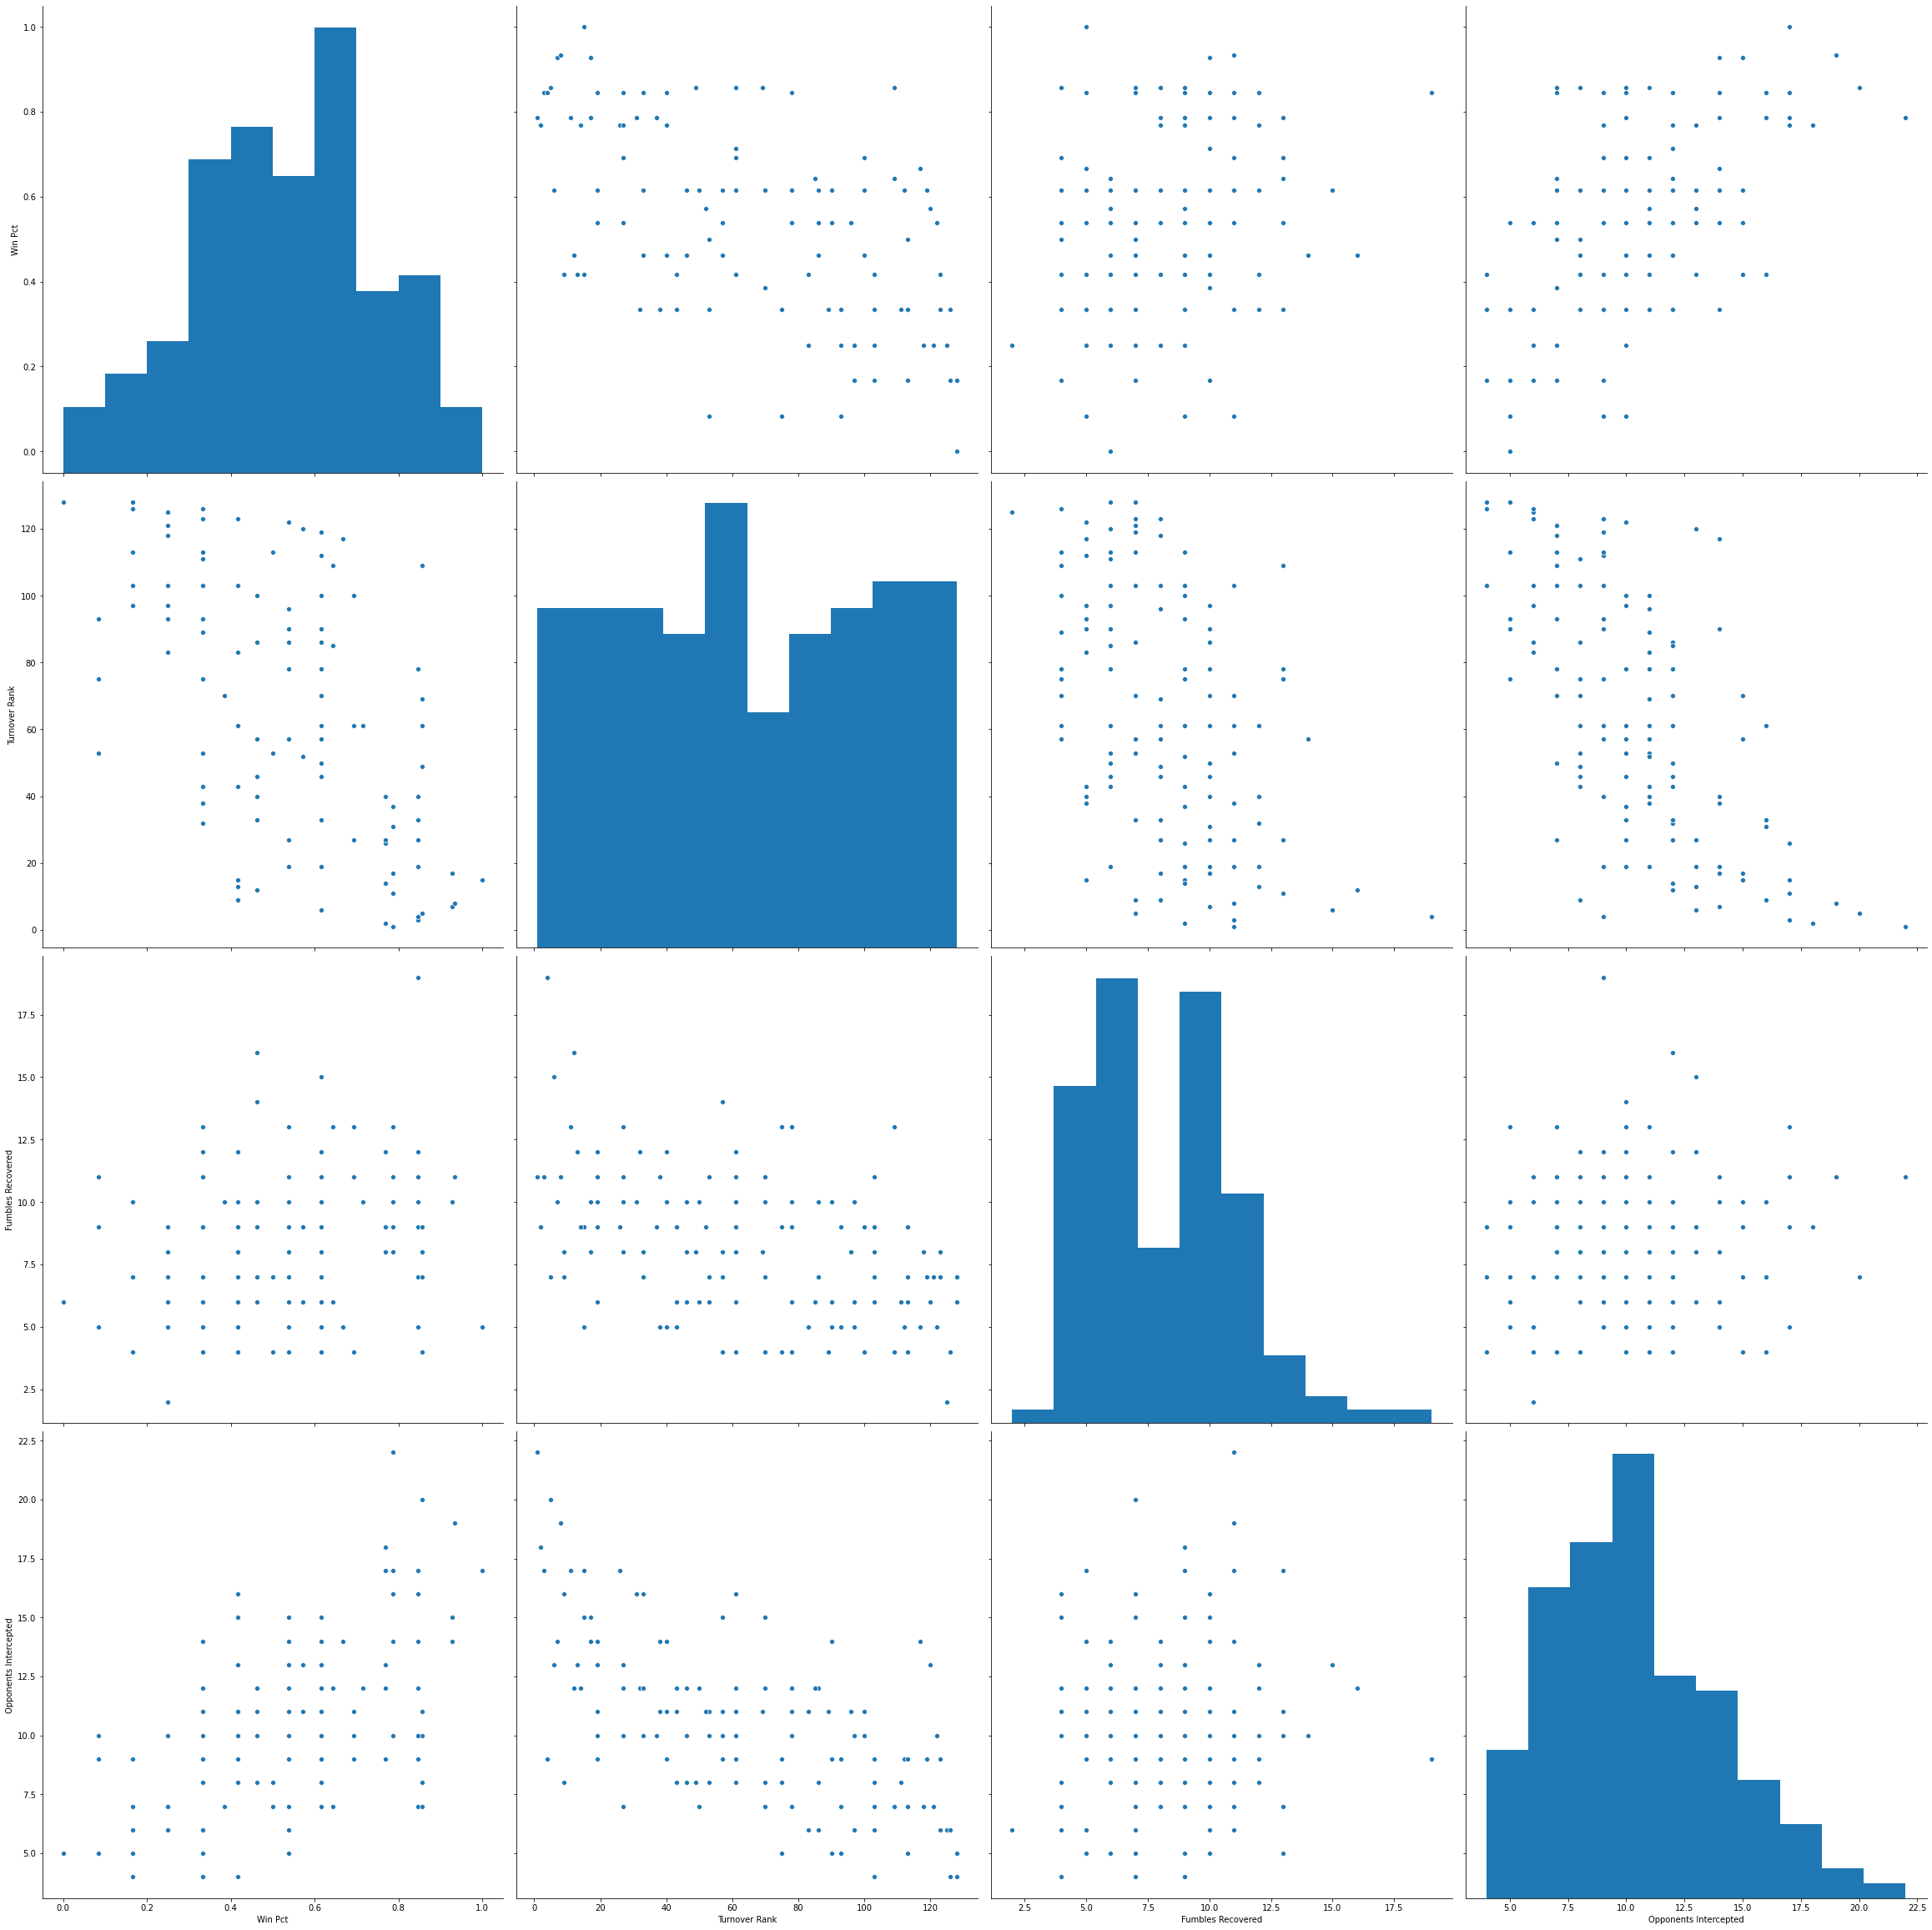

In [51]:
sns.pairplot(cfb[['Win Pct','Turnover Rank','Fumbles Recovered','Opponents Intercepted']], height = 8)

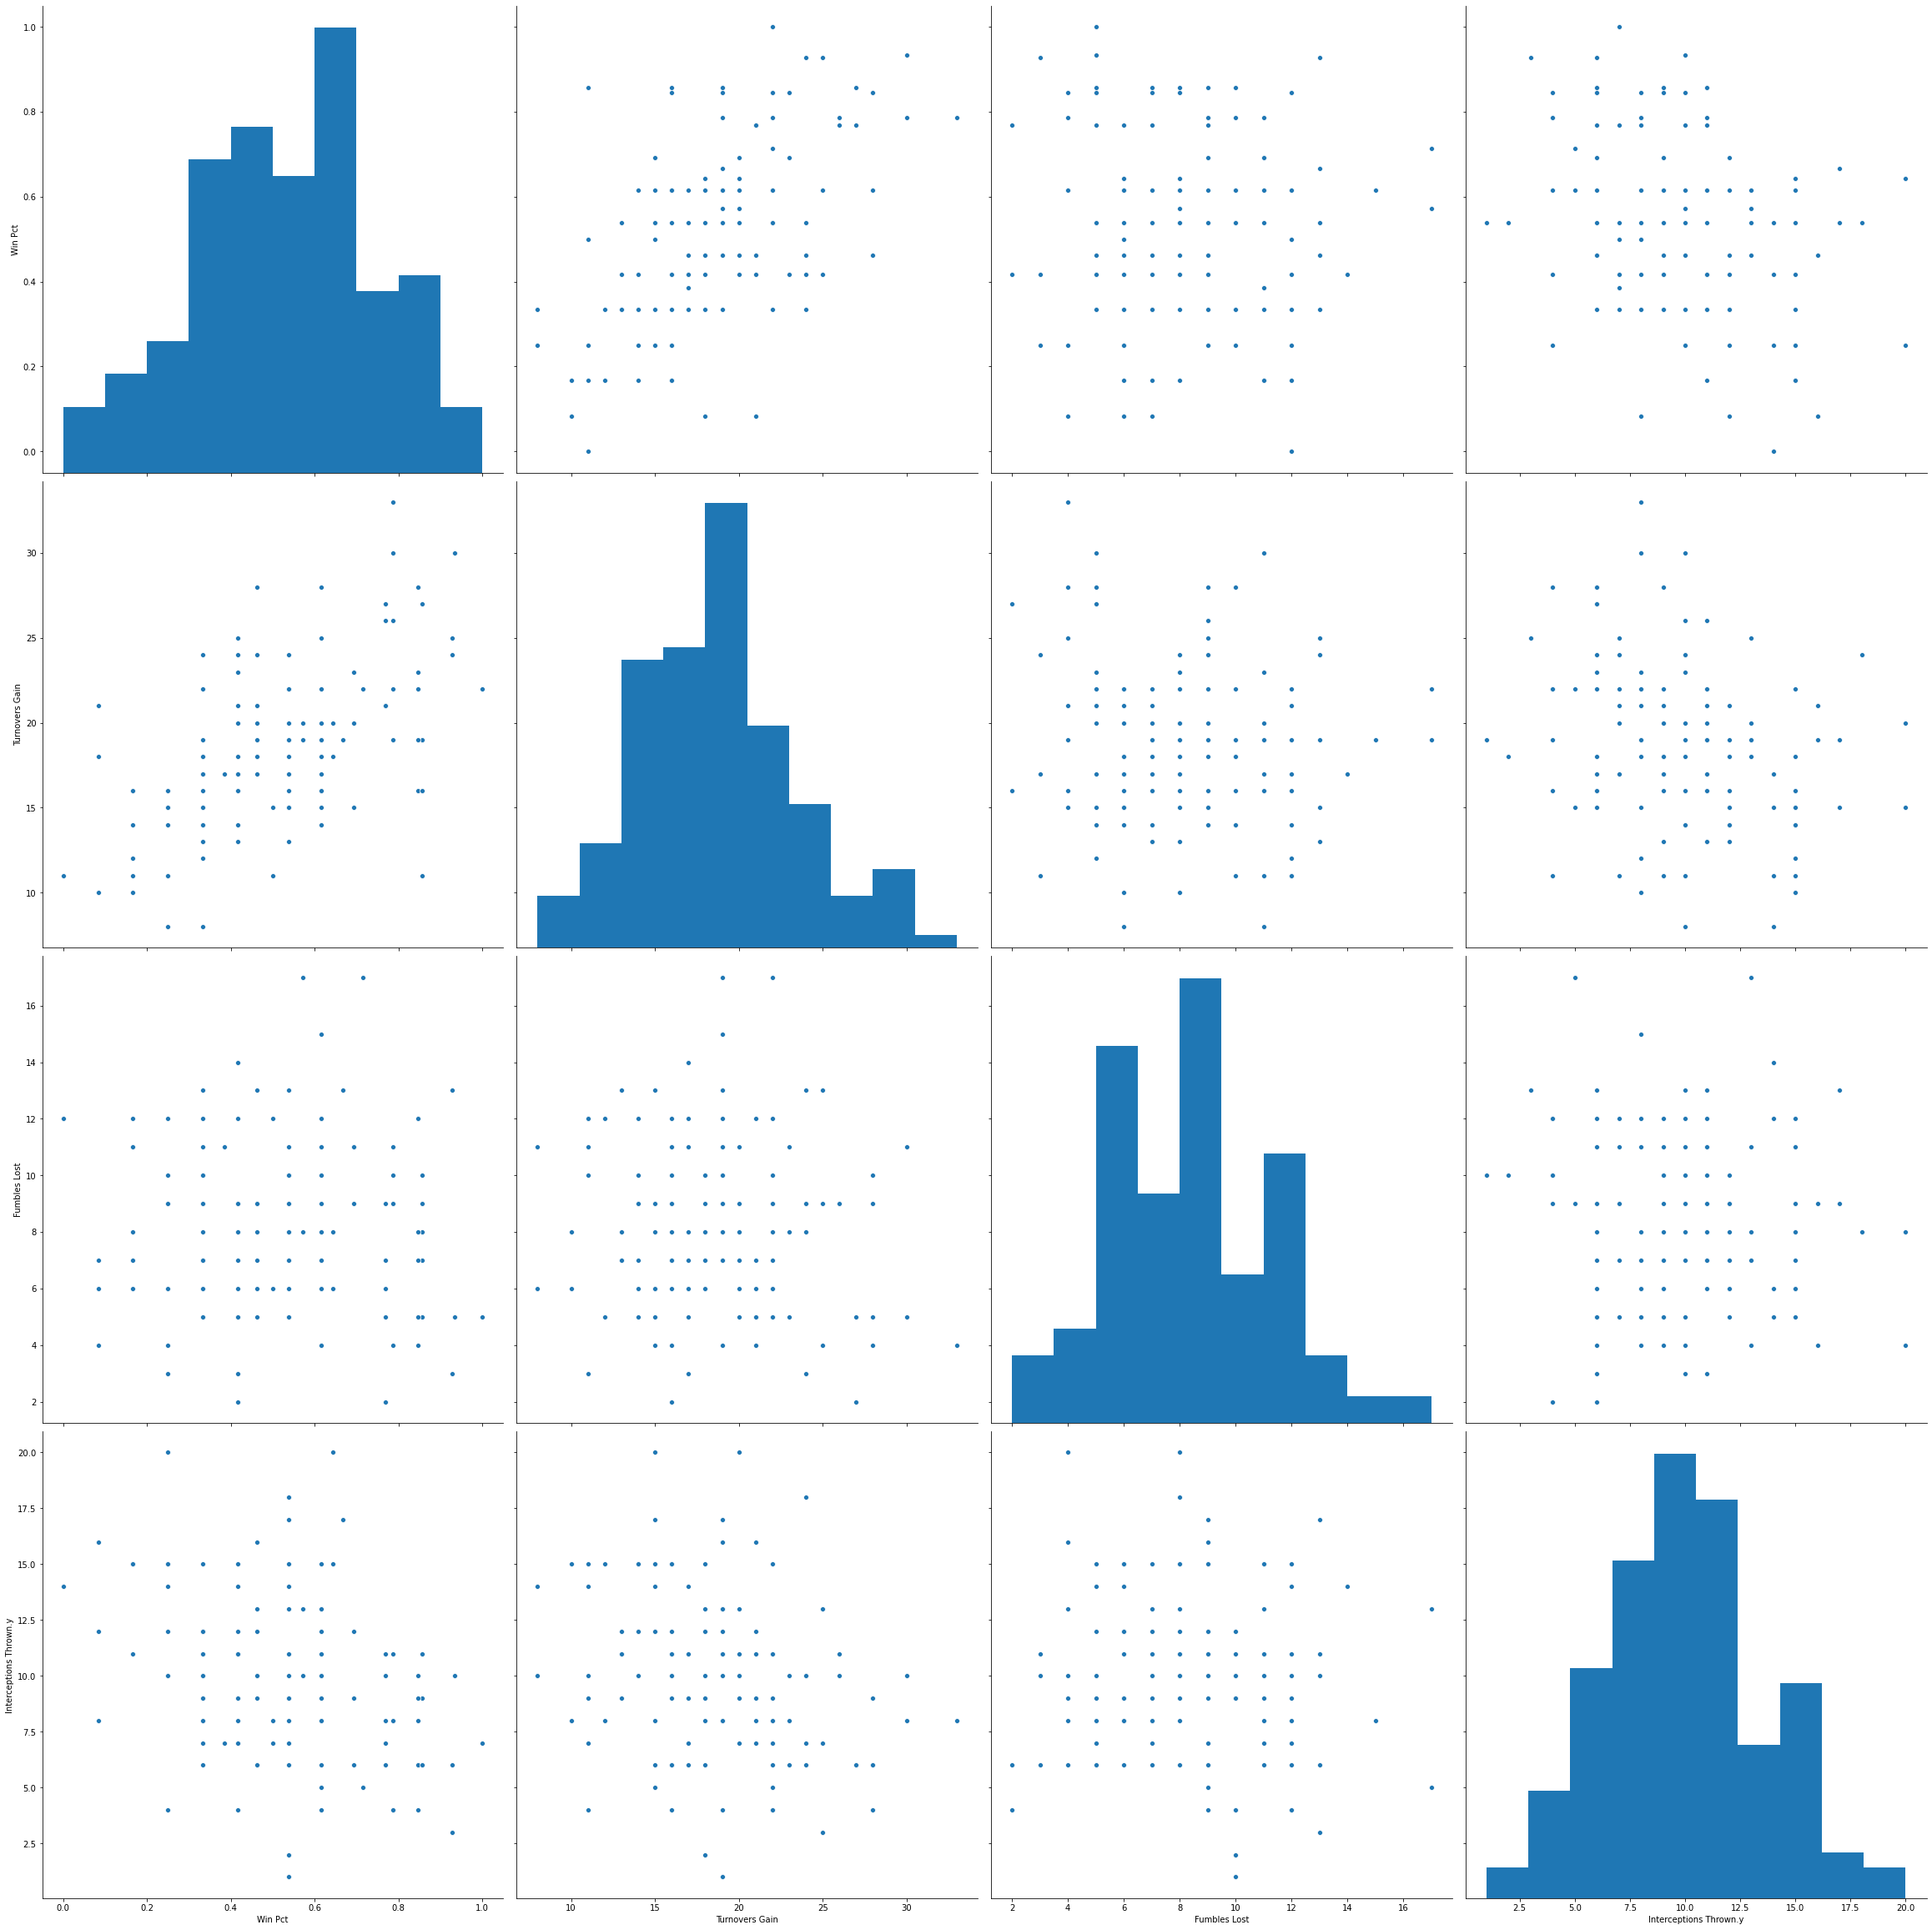

In [52]:
sns.pairplot(cfb[['Win Pct','Turnovers Gain','Fumbles Lost','Interceptions Thrown.y']], height = 8)

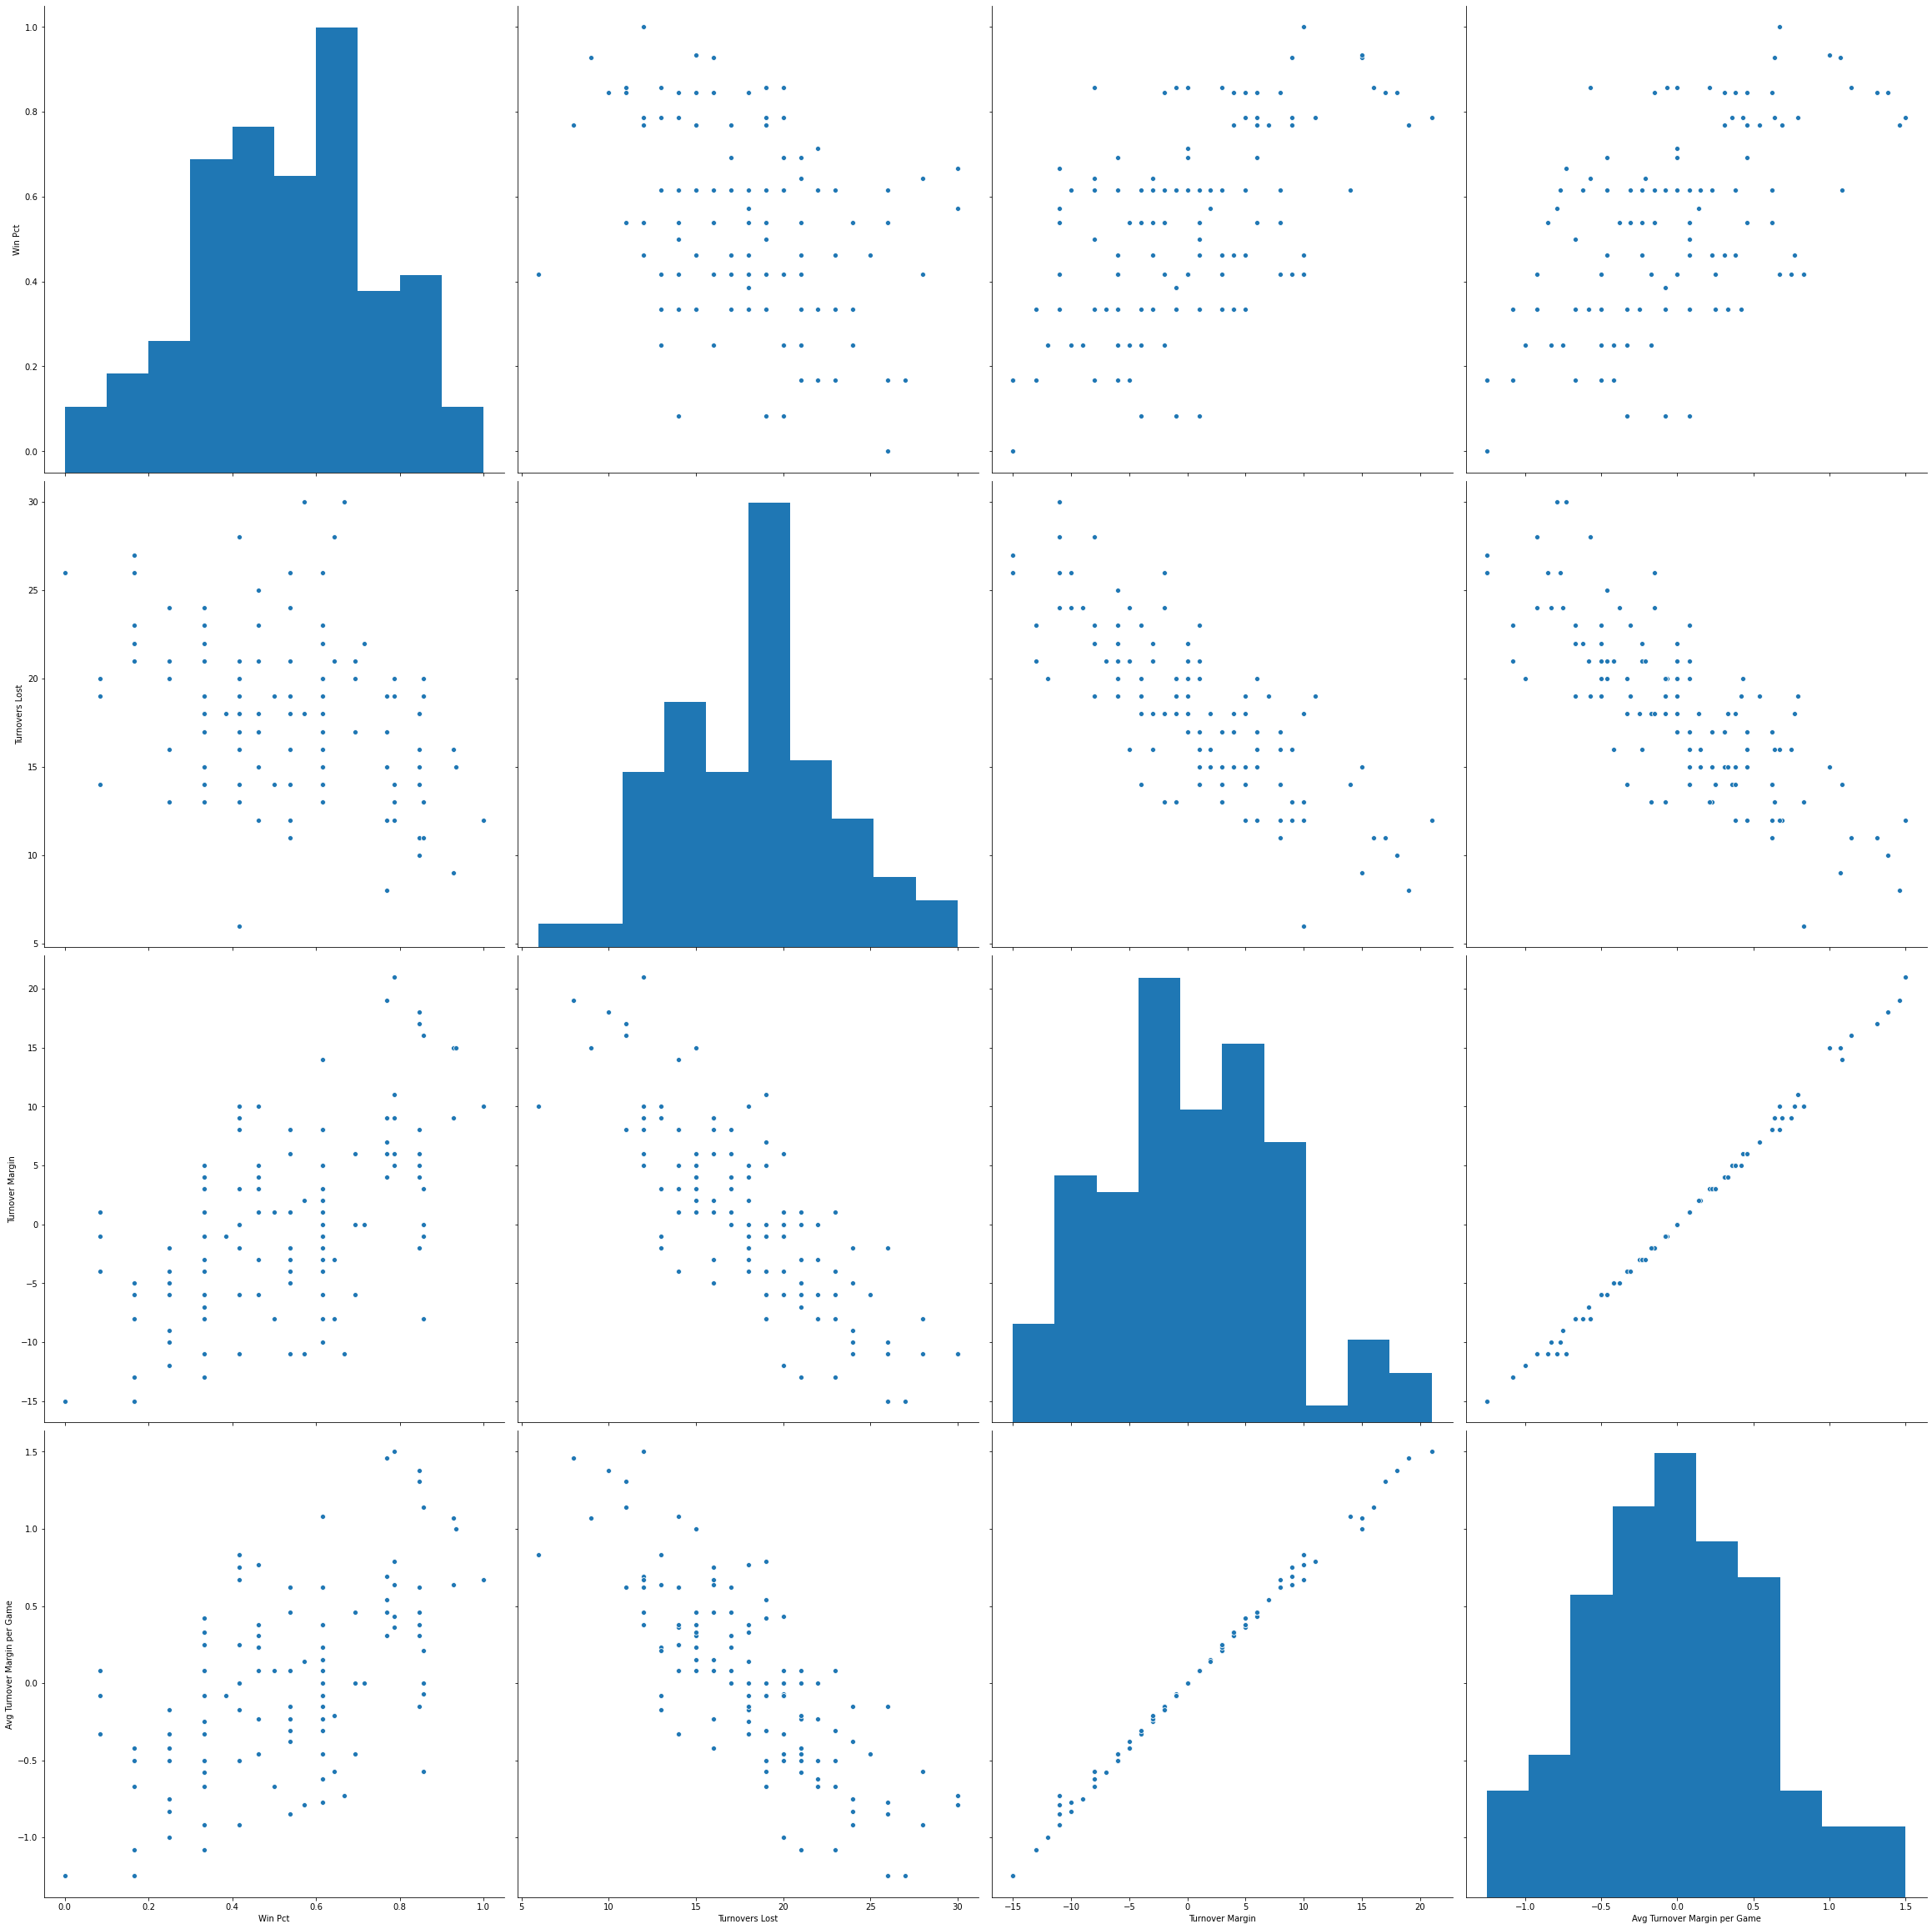

In [53]:
sns.pairplot(cfb[['Win Pct','Turnovers Lost','Turnover Margin','Avg Turnover Margin per Game']], height = 8)

In [54]:
cfb.rename({'Opp Rush Yards Alloweed': 'Opp Rush Yards Allowed'},inplace=True)

In [55]:
df = cfb.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18,20,21,23,27,32,35,39,44,49,
             50,52,53,54,55,56,59,62,70,71,80,81,83,84,85,86,87,88,89,91,92,93,95,96,
             97,98,100,101,103,106,107,108,109,110,111,116,117,118,119,120,123,125,126,
             130,131,133,135,136,138,139,142,143,147,148]].copy()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Team                                 130 non-null    object 
 1   Conference                           130 non-null    object 
 2   Win                                  130 non-null    int64  
 3   Loss                                 130 non-null    int64  
 4   Games                                130 non-null    int64  
 5   Win Pct                              130 non-null    float64
 6   Off Rank                             130 non-null    int64  
 7   Off Plays                            130 non-null    int64  
 8   Off Yards                            130 non-null    int64  
 9   Off Yards/Play                       130 non-null    float64
 10  Off TDs                              130 non-null    int64  
 11  Off Yards per Game              

In [57]:
df.describe()

Win        Loss       Games     Win Pct    Off Rank  \
count  130.000000  130.000000  130.000000  130.000000  130.000000   
mean     6.807692    5.976923   12.784615    0.522043   65.492308   
std      3.132961    2.504153    0.757235    0.217062   37.675326   
min      0.000000    0.000000   12.000000    0.000000    1.000000   
25%      4.000000    5.000000   12.000000    0.333333   33.250000   
50%      7.000000    6.000000   13.000000    0.538462   65.500000   
75%      8.750000    8.000000   13.000000    0.635989   97.750000   
max     15.000000   12.000000   15.000000    1.000000  130.000000   

         Off Plays    Off Yards  Off Yards/Play     Off TDs  \
count   130.000000   130.000000      130.000000  130.000000   
mean    885.953846  5167.538462        5.801385   44.307692   
std      76.366300   953.227688        0.723159   14.224036   
min     717.000000  2918.000000        4.020000   14.000000   
25%     841.000000  4580.250000        5.312500   34.000000   
50%     881.000000  5123.500000        5.815000   43.500000   
75%     936.500000  5712.750000        6.220000   52.000000   
max    1080.000000  8527.000000        7.960000   93.000000   

       Off Yards per Game    Def Rank  Yards/Play Allowed  Off TDs Allowed  \
count          130.000000  130.000000          130.000000       130.000000   
mean           402.531538   65.492308            5.655000        41.038462   
std             59.019327   37.681498            0.661819        10.506848   
min            243.200000    1.000000            4.130000        18.000000   
25%            367.375000   33.250000            5.220000        32.250000   
50%            405.650000   65.500000            5.650000        41.500000   
75%            438.825000   97.750000            6.102500        49.000000   
max            568.500000  130.000000            7.770000        82.000000   

       Total TDs Allowed  Yards Per Game Allowed  First Down Runs  \
count         130.000000              130.000000       130.000000   
mean           43.200000              390.243077       115.353846   
std            10.970998               57.427579        32.567131   
min            19.000000              259.700000        51.000000   
25%            36.000000              346.350000        92.250000   
50%            43.000000              391.900000       110.000000   
75%            50.000000              433.075000       130.000000   
max            86.000000              561.200000       228.000000   

       First Down Passes  First Downs  Opp First Down Penalties  4th Percent  \
count         130.000000   130.000000                130.000000   130.000000   
mean          130.192308   268.192308                 22.892308     0.523885   
std            36.515919    44.662576                  7.212442     0.122712   
min            38.000000   155.000000                  8.000000     0.167000   
25%           108.250000   239.500000                 18.000000     0.430500   
50%           128.000000   268.500000                 22.000000     0.530000   
75%           153.750000   295.000000                 28.000000     0.600000   
max           258.000000   418.000000                 51.000000     0.813000   

       Opp 4th Attempt  Kickoff Touchbacks  Kickoffs Returned  Pass Attempts  \
count       130.000000          130.000000         130.000000     130.000000   
mean         21.546154           31.992308          28.684615     397.884615   
std           5.773652           17.497506          10.979215      87.998735   
min          10.000000            3.000000           7.000000     104.000000   
25%          17.000000           16.250000          21.250000     339.750000   
50%          21.000000           30.500000          28.000000     402.000000   
75%          25.000000           43.000000          36.000000     454.000000   
max          36.000000          110.000000          75.000000     710.000000   

       Pass Completions   Pass Yards  Pass Yards/Attempt 

In [58]:
df.boxplot('Team','Win Pct',data=df)

TypeError: boxplot() got multiple values for argument 'data'